In [1]:
import pickle
import glob

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance as wasserstein_distance_func

import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import math

In [2]:
def get_cord_x_y_z_r(data):
    """
    :param data: x,y,z
    """
    x,y,z = data[:,0],data[:,1],data[:,2]
    r = np.sqrt(x**2+y**2)
    return x,y,z,r
def get_cord_only_in_radius(data,radius=90):
    x,y = data[:,0],data[:,1]
    r = np.sqrt(x**2+y**2)
    return data[r<radius]

In [3]:
import pickle
import glob

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance as wasserstein_distance_func

import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import math

In [4]:
def autocorr5(x):
    n = len(x)
    variance = x.var()
    x = x-x.mean()
    r = np.correlate(x, x, mode = 'full')[-n:]
    # assert np.allclose(r, np.array([(x[:n-k]*x[-(n-k):]).sum() for k in range(n)]))
    result = r/(variance*(np.arange(n, 0, -1)))
    # print(np.where(result < 0.2 )[0][0])
    result[result > 1]= 1
    result[result < -1]= -1
    return result

def get_poisson_interval(k, alpha=0.05):
    """
    uses chisquared info to get the 1-alpha poisson confidence
    interval for the rate of an event per time period given k observed
    events over that time period

    :param k: rate (time^-1) for which interval is computed
    :param alpha: one minus the confidence interval
    :return: a numpy array with low and high interval boundaries
    """
    a = alpha
    low, high = (stats.chi2.ppf(a/2, 2*k) / 2,
                 stats.chi2.ppf(1-a/2, 2*k + 2) / 2)
    if k == 0:
        low = 0.0
    return np.array([low, high])
#calculate standard error of the mean
def standard_error_of_the_mean(data):
    return np.std(data) / np.sqrt(np.size(data))
def get_cord_only_in_radius(data,radius=90):
    x,y = data[:,0],data[:,1]
    r = np.sqrt(x**2+y**2)
    return data[r<radius]
def get_cord_z_r(data):
    """
    :param data: x,y,z
    :return: r,z
    """
    x,y,z = data[:,0],data[:,1],data[:,2]
    r = np.sqrt(x**2+y**2)
    return z,r
def get_cord_x_y_z_r(data):
    """
    :param data: x,y,z
    """
    x,y,z = data[:,0],data[:,1],data[:,2]
    r = np.sqrt(x**2+y**2)
    return x,y,z,r

In [5]:
def get_taho_half(data,step_size):
    """

    :param data:
    :param step_size: in fs
    :return:
    """
    unserialized_data_0 = data
    estimate_auto_curelation= autocorr5(np.array(unserialized_data_0))
    x_2= np.linspace(0,(len(unserialized_data_0))
                     *step_size,len(unserialized_data_0))
    print((len(unserialized_data_0))
                     *step_size,len(unserialized_data_0))
    if np.isnan(np.array(estimate_auto_curelation)).any():
        taho = 0
    else:
        taho= (np.where(estimate_auto_curelation < 0.5 )[0][0]*step_size)
    return x_2,estimate_auto_curelation,taho


# def get_taho_half(data,n,step_for_auto_corr,dt,s=4):
#     unserialized_data_0 = data
#     estimate_auto_curelation= autocorr5(np.array(unserialized_data_0))
#     x_2= np.linspace(0,(len(unserialized_data_0))
#                      *step_for_auto_corr*dt*s**n,len(unserialized_data_0))
#     # taho= (np.where(estimate_auto_curelation < 0.5 )[0][0]*step_for_auto_corr*dt*4**n)
#     if np.isnan(np.array(estimate_auto_curelation)).any():
#         taho = 0
#     else:
#         taho= (np.where(estimate_auto_curelation < 0.5 )[0][0]*step_for_auto_corr*dt*s**n) #+1 to the index
#         # taho = (np.where(estimate_auto_curelation < 0.5)[0][0] * step_for_auto_corr * dt * 4 ** n)
#
#         # plt.plot(x_2,estimate_auto_curelation)
#         # plt.xlabel('time fsec', fontsize=18)
#         # plt.xscale("log")
#         # plt.ylabel('autocorelation', fontsize=16)
#         #
#         # plt.title("n="+str(n)+"di_alanin_half_time"+str(taho)+
#         #           f'({(len(unserialized_data_0) * 3 ** n * dt*step_for_auto_corr) * 1e-6:.3f} ns)')
#         #
#         # plt.show()
#
#     return x_2,taho,estimate_auto_curelation

In [6]:
import glob

# Define the base directory and the pattern
base_dir = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/"
pattern = "radius_v1_*_0_500.0_.pkl"

# Use glob to find all matching files
file_list = glob.glob(base_dir + pattern)

# Print the list of files
print(file_list)

['/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_87_0_500.0_.pkl', '/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_58_0_500.0_.pkl', '/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_83_0_500.0_.pkl', '/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_39_0_500.0_.pkl', '/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_78_0_500.0_.pkl', '/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_14_0_500.0_.pkl', '/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_114_0_500.0_.pkl', '/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_107_0_500.0_.pkl', '/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_93_0_500.0_.pkl', '/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_37_0_500.0_.pkl', '/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_43_0_500.0_.pkl', '/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_1_0_500.0_.pkl', '/cs/labs/ravehb/reshem/BD

In [7]:
# n_0_2000,n_0_6000,n_0_8000,n_1_6000,n_2_6000,n_3_6000,n_0_mean,n_1_mean,n_2_mean,n_3_mean,n_4_mean = [],[],[],[],[],[],[],[],[],[],[]
# ws_n0,ws_n1,ws_n2,ws_n3 = [],[],[],[]
# ws_n0_1000,ws_n0_2000,ws_n0_3000,ws_n0_4000,ws_n0_5000,ws_n0_6000,ws_n0_7000,ws_n0_8000 = [],[],[],[],[],[],[],[]
# ws_n0_9000 = []
# ws_n0_500 = []
#
# ws_n1_1000,ws_n2_1000,ws_n3_1000 = [],[],[]
# ws_n1_2000,ws_n2_2000,ws_n3_2000 = [],[],[]
# ws_n1_3000,ws_n2_3000,ws_n3_3000 = [],[],[]
# ws_n1_4000,ws_n2_4000,ws_n3_4000 = [],[],[]
# ws_n1_5000,ws_n2_5000,ws_n3_5000 = [],[],[]
# ws_n1_6000,ws_n2_6000,ws_n3_6000 = [],[],[]
# ws_n1_7000,ws_n2_7000,ws_n3_7000 = [],[],[]
#
# taho_n0_500,taho_n0_1000,taho_n0_2000,taho_n0_3000,taho_n0_4000,taho_n0_5000,taho_n0_6000,taho_n0_7000,taho_n0_8000,taho_n0_9000 = [],[],[],[],[],[],[],[],[],[]
#
# taho_n1,taho_n2,taho_n3 = [],[],[]
#
#
#
# file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_500.0_.pkl".format(run_num=120)
# with open(file_2, 'rb') as f:
#     x_n_00_500= pickle.load(f)
# for i in range (20,40):
#     # file_2 = "/cs/usr/reshem/Desktop/Link to MSBD_IMP/NPC_data_half_v6/radius_v1_1{run_num}_3_6000.0_.pkl".format(run_num=i)
#     # with open(file_2, 'rb') as f:
#     #     x_n_33_6000= pickle.load(f)
#     # file_2 = "/cs/usr/reshem/Desktop/Link to MSBD_IMP/NPC_data_half_v4/radius_v1_1{run_num}_2_6000.0_.pkl".format(run_num=i)
#     # with open(file_2, 'rb') as f:
#     #     x_n_22_6000= pickle.load(f)
#     # file_2 = "/cs/usr/reshem/Desktop/Link to MSBD_IMP/NPC_data_half_v4/radius_v1_1{run_num}_1_6000.0_.pkl".format(run_num=i)
#     # with open(file_2, 'rb') as f:
#     #     x_n_11_6000= pickle.load(f)
#     # file_2 = "/cs/usr/reshem/Desktop/Link to MSBD_IMP/NPC_data_half_v3/radius_v1_1{run_num}_0_6000.0_.pkl".format(run_num=i)
#     # with open(file_2, 'rb') as f:
#     #     x_n_00_6000= pickle.load(f)
#     # file_2 = "/cs/usr/reshem/Desktop/Link to MSBD_IMP/NPC_data_half_v6/radius_v1_{run_num}_0_9000.0_.pkl".format(run_num=i+1)
#     # with open(file_2, 'rb') as f:
#     #     x_n_00_9000= pickle.load(f)
#
#     file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_{dt}.0_.pkl".format(run_num=i+1,dt=6000)
#     with open(file_2, 'rb') as f:
#         x_n_00_6000= pickle.load(f)
#     file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_1_{dt}.0_.pkl".format(run_num=i+1,dt=6000)
#     with open(file_2, 'rb') as f:
#         x_n_11_6000= pickle.load(f)
#     file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_2_{dt}.0_.pkl".format(run_num=i+1,dt=6000)
#     with open(file_2, 'rb') as f:
#         x_n_22_6000= pickle.load(f)
#     file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_3_{dt}.0_.pkl".format(run_num=i+1,dt=6000)
#     with open(file_2, 'rb') as f:
#         x_n_33_6000= pickle.load(f)
#     # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_500.0_.pkl".format(run_num=i+1)
#     # with open(file_2, 'rb') as f:
#     #     x_n_00_500= pickle.load(f)
#     file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_8000.0_.pkl".format(run_num=i+1)
#     with open(file_2, 'rb') as f:
#         x_n_00_8000= pickle.load(f)
#     file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_1000.0_.pkl".format(run_num=i+1)
#     with open(file_2, 'rb') as f:
#         x_n_00_1000= pickle.load(f)
#     file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_2000.0_.pkl".format(run_num=i+1)
#     with open(file_2, 'rb') as f:
#         x_n_00_2000= pickle.load(f)
#     file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_3000.0_.pkl".format(run_num=i+1)
#     with open(file_2, 'rb') as f:
#         x_n_00_3000= pickle.load(f)
#     file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_4000.0_.pkl".format(run_num=i+1)
#     with open(file_2, 'rb') as f:
#         x_n_00_4000= pickle.load(f)
#     file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_5000.0_.pkl".format(run_num=i+1)
#     with open(file_2, 'rb') as f:
#         x_n_00_5000= pickle.load(f)
#     file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_6000.0_.pkl".format(run_num=i+1)
#     with open(file_2, 'rb') as f:
#         x_n_00_6000= pickle.load(f)
#     file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_7000.0_.pkl".format(run_num=i+1)
#     with open(file_2, 'rb') as f:
#         x_n_00_7000= pickle.load(f)
#     file_2 = file_list[i-20]
#     with open(file_2, 'rb') as f:
#         x_n_00_500= pickle.load(f)
#     file_2 = file_list[i+1-20]
#
#     with open(file_2, 'rb') as f:
#         x_n_00_500_v2= pickle.load(f)
#     file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_9000.0_.pkl".format(run_num=i+1)
#     with open(file_2, 'rb') as f:
#         x_n_00_9000= pickle.load(f)
#     # with open(file_2, 'rb') as f:
#     #     x_n_00_6000= pickle.load(f)
#     file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_1000.0_.pkl".format(run_num=i+2)
#     with open(file_2, 'rb') as f:
#         x_n_00_1000_v2= pickle.load(f)
#     # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_1_{dt}.0_.pkl".format(run_num=i+1,dt=1000)
#     # with open(file_2, 'rb') as f:
#     #     x_n_11_1000= pickle.load(f)
#     # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_2_{dt}.0_.pkl".format(run_num=i+1,dt=1000)
#     # with open(file_2, 'rb') as f:
#     #     x_n_22_1000= pickle.load(f)
#     # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_3_{dt}.0_.pkl".format(run_num=i+1,dt=1000)
#     # with open(file_2, 'rb') as f:
#     #     x_n_33_1000= pickle.load(f)
#
#
#     # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_1_{dt}.0_.pkl".format(run_num=i+1,dt=2000)
#     # with open(file_2, 'rb') as f:
#     #     x_n_11_2000= pickle.load(f)
#     # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_2_{dt}.0_.pkl".format(run_num=i+1,dt=2000)
#     # with open(file_2, 'rb') as f:
#     #     x_n_22_2000= pickle.load(f)
#     # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_3_{dt}.0_.pkl".format(run_num=i+1,dt=2000)
#     # with open(file_2, 'rb') as f:
#     #     x_n_33_2000= pickle.load(f)
#     #
#     # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_1_{dt}.0_.pkl".format(run_num=i+1,dt=3000)
#     # with open(file_2, 'rb') as f:
#     #     x_n_11_3000= pickle.load(f)
#     # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_2_{dt}.0_.pkl".format(run_num=i+1,dt=3000)
#     # with open(file_2, 'rb') as f:
#     #     x_n_22_3000= pickle.load(f)
#     # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_3_{dt}.0_.pkl".format(run_num=i+1,dt=3000)
#     # with open(file_2, 'rb') as f:
#     #     x_n_33_3000= pickle.load(f)
#
#     # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_1_{dt}.0_.pkl".format(run_num=i+1,dt=4000)
#     # with open(file_2, 'rb') as f:
#     #     x_n_11_4000= pickle.load(f)
#     # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_2_{dt}.0_.pkl".format(run_num=i+1,dt=4000)
#     # with open(file_2, 'rb') as f:
#     #     x_n_22_4000= pickle.load(f)
#     # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_3_{dt}.0_.pkl".format(run_num=i+1,dt=4000)
#     # with open(file_2, 'rb') as f:
#     #     x_n_33_4000= pickle.load(f)
#     #
#     # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_1_{dt}.0_.pkl".format(run_num=i+1,dt=5000)
#     # with open(file_2, 'rb') as f:
#     #     x_n_11_5000= pickle.load(f)
#     # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_2_{dt}.0_.pkl".format(run_num=i+1,dt=5000)
#     # with open(file_2, 'rb') as f:
#     #     x_n_22_5000= pickle.load(f)
#     # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_3_{dt}.0_.pkl".format(run_num=i+1,dt=5000)
#     # with open(file_2, 'rb') as f:
#     #     x_n_33_5000= pickle.load(f)
#     #
#     # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_1_{dt}.0_.pkl".format(run_num=i+1,dt=7000)
#     # with open(file_2, 'rb') as f:
#     #     x_n_11_7000= pickle.load(f)
#     # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_2_{dt}.0_.pkl".format(run_num=i+1,dt=7000)
#     # with open(file_2, 'rb') as f:
#     #     x_n_22_7000= pickle.load(f)
#     # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_3_{dt}.0_.pkl".format(run_num=i+1,dt=7000)
#     # with open(file_2, 'rb') as f:
#     #     x_n_33_7000= pickle.load(f)
#
#
#     for j in range (7):
#         print(i,j)
#         n=3
#         print("n",n)
#         dt=6000
#         len_of_optimizing_cycle =192
#         step_size = int(math.ceil((2000/dt)*len_of_optimizing_cycle/(4**n))) *dt * (4 ** n)
#         x_3_3_6000,estimate_auto_curelation_33_6000,taho_n3_val = get_taho_half(x_n_33_6000["fg_rg"][:,j],step_size=step_size)
#         taho_n3.append(taho_n3_val)
#         # n=0
#         # print("n",n)
#         # dt=6000
#         # step_size = int(math.ceil((2000/dt)*len_of_optimizing_cycle/(4**n))) *dt * (4 ** n)
#         # x_2_0_6000,estimate_auto_curelation_0_6000,taho_n0 = get_taho_half(x_n_00_6000["fg_rg"][:,j],step_size=step_size)
#         #
#         n=1
#         print("n",n)
#
#         dt=6000
#         step_size = int(math.ceil((2000/dt)*len_of_optimizing_cycle/(4**n))) *dt * (4 ** n)
#         x_2_1_6000,estimate_auto_curelation_1_6000,taho_n1_val = get_taho_half(x_n_11_6000["fg_rg"][:,j],step_size=step_size)
#         taho_n1.append(taho_n1_val)
#         #
#         n=2
#         dt=6000
#         step_size = int(math.ceil((2000/dt)*len_of_optimizing_cycle/(4**n))) *dt * (4 ** n)
#         x_2_2_6000,estimate_auto_curelation_2_6000,taho_n2_val = get_taho_half(x_n_22_6000["fg_rg"][:,j],step_size=step_size)
#         taho_n2.append(taho_n2_val)
#
#         n=0
#         print("n",n)
#         dt=500
#         step_size = int(math.ceil((2000/dt)*len_of_optimizing_cycle/(4**n))) *dt * (4 ** n)
#         x_2_3_6000,estimate_auto_curelation_3_6000,taho_n0_9 = get_taho_half(x_n_00_8000["fg_rg"][:,j],step_size=step_size)
#         taho_n0_500.append(taho_n0_9)
#
#         n=0
#         print("n",n)
#         dt=1000
#         step_size = int(math.ceil((2000/dt)*len_of_optimizing_cycle/(4**n))) *dt * (4 ** n)
#         x_2_3_6000,estimate_auto_curelation_3_6000,taho_n0_9 = get_taho_half(x_n_00_1000["fg_rg"][:,j],step_size=step_size)
#         taho_n0_1000.append(taho_n0_9)
#
#         n=0
#         print("n",n)
#         dt=2000
#         step_size = int(math.ceil((2000/dt)*len_of_optimizing_cycle/(4**n))) *dt * (4 ** n)
#         x_2_3_6000,estimate_auto_curelation_3_6000,taho_n0_9 = get_taho_half(x_n_00_2000["fg_rg"][:,j],step_size=step_size)
#         taho_n0_2000.append(taho_n0_9)
#
#
#         n=0
#         print("n",n)
#         dt=3000
#         step_size = int(math.ceil((2000/dt)*len_of_optimizing_cycle/(4**n))) *dt * (4 ** n)
#         x_2_3_6000,estimate_auto_curelation_3_6000,taho_n0_9 = get_taho_half(x_n_00_3000["fg_rg"][:,j],step_size=step_size)
#         taho_n0_3000.append(taho_n0_9)
#
#
#         n=0
#         print("n",n)
#         dt=4000
#         step_size = int(math.ceil((2000/dt)*len_of_optimizing_cycle/(4**n))) *dt * (4 ** n)
#         x_2_3_6000,estimate_auto_curelation_3_6000,taho_n0_9 = get_taho_half(x_n_00_4000["fg_rg"][:,j],step_size=step_size)
#         taho_n0_4000.append(taho_n0_9)
#
#         n=0
#         print("n",n)
#         dt=5000
#         step_size = int(math.ceil((2000/dt)*len_of_optimizing_cycle/(4**n))) *dt * (4 ** n)
#         x_2_3_6000,estimate_auto_curelation_3_6000,taho_n0_9 = get_taho_half(x_n_00_5000["fg_rg"][:,j],step_size=step_size)
#         taho_n0_5000.append(taho_n0_9)
#
#
#         n=0
#         print("n",n)
#         dt=6000
#         step_size = int(math.ceil((2000/dt)*len_of_optimizing_cycle/(4**n))) *dt * (4 ** n)
#         x_2_3_6000,estimate_auto_curelation_3_6000,taho_n0_9 = get_taho_half(x_n_00_6000["fg_rg"][:,j],step_size=step_size)
#         taho_n0_6000.append(taho_n0_9)
#
#
#
#         n=0
#         print("n",n)
#         dt=7000
#         step_size = int(math.ceil((2000/dt)*len_of_optimizing_cycle/(4**n))) *dt * (4 ** n)
#         x_2_3_6000,estimate_auto_curelation_3_6000,taho_n0_9 = get_taho_half(x_n_00_7000["fg_rg"][:,j],step_size=step_size)
#         taho_n0_7000.append(taho_n0_9)
#
#
#         n=0
#         print("n",n)
#         dt=8000
#         step_size = int(math.ceil((2000/dt)*len_of_optimizing_cycle/(4**n))) *dt * (4 ** n)
#         x_2_3_6000,estimate_auto_curelation_3_6000,taho_n0_9 = get_taho_half(x_n_00_8000["fg_rg"][:,j],step_size=step_size)
#         taho_n0_8000.append(taho_n0_9)
#
#
#         n=0
#         print("n",n)
#         dt=9000
#         step_size = int(math.ceil((2000/dt)*len_of_optimizing_cycle/(4**n))) *dt * (4 ** n)
#         x_2_3_6000,estimate_auto_curelation_3_6000,taho_n0_9 = get_taho_half(x_n_00_9000["fg_rg"][:,j],step_size=step_size)
#         taho_n0_9000.append(taho_n0_9)
#
#         # n=0
#         # print("n",n)
#         #
#         # dt=500
#         # step_size = int(math.ceil((2000/dt)*len_of_optimizing_cycle/(4**n))) *dt * (4 ** n)
#         # x_2_3_6000,estimate_auto_curelation_3_6000,taho_n0_9 = get_taho_half(x_n_00_8000["fg_rg"][:,j],step_size=step_size)
#
#         # n_0_6000.append(taho_n0)
#         # n_1_6000.append(taho_n1)
#         # n_2_6000.append(taho_n2)
#         # n_3_6000.append(taho_n3)
#         # n_0_8000.append(taho_n0_9)
#         n_0_mean.append(np.mean((x_n_00_6000["fg_rg"][:,j])))
#         n_1_mean.append(np.mean((x_n_11_6000["fg_rg"][:,j])))
#         n_2_mean.append(np.mean((x_n_22_6000["fg_rg"][:,j])))
#         n_3_mean.append(np.mean((x_n_33_6000["fg_rg"][:,j])))
#
#         a = wasserstein_distance_func(x_n_00_6000["fg_rg"][:,j],x_n_00_1000_v2["fg_rg"][:,j])
#         ws_n0.append(a)
#         a = wasserstein_distance_func(x_n_11_6000["fg_rg"][:,j],x_n_00_1000_v2["fg_rg"][:,j])
#         ws_n1.append(a)
#         a = wasserstein_distance_func(x_n_22_6000["fg_rg"][:,j],x_n_00_1000_v2["fg_rg"][:,j])
#         ws_n2.append(a)
#         a = wasserstein_distance_func(x_n_33_6000["fg_rg"][:,j],x_n_00_1000_v2["fg_rg"][:,j])
#         ws_n3.append(a)
#         a = wasserstein_distance_func(x_n_00_8000["fg_rg"][:,j],x_n_00_1000_v2["fg_rg"][:,j])
#         ws_n0_8000.append(a)
#         a = wasserstein_distance_func(x_n_00_1000["fg_rg"][:,j],x_n_00_1000_v2["fg_rg"][:,j])
#         ws_n0_1000.append(a)
#         a = wasserstein_distance_func(x_n_00_2000["fg_rg"][:,j],x_n_00_1000_v2["fg_rg"][:,j])
#         ws_n0_2000.append(a)
#         a = wasserstein_distance_func(x_n_00_3000["fg_rg"][:,j],x_n_00_1000_v2["fg_rg"][:,j])
#         ws_n0_3000.append(a)
#         a = wasserstein_distance_func(x_n_00_4000["fg_rg"][:,j],x_n_00_1000_v2["fg_rg"][:,j])
#         ws_n0_4000.append(a)
#         a = wasserstein_distance_func(x_n_00_5000["fg_rg"][:,j],x_n_00_1000_v2["fg_rg"][:,j])
#         ws_n0_5000.append(a)
#         a = wasserstein_distance_func(x_n_00_6000["fg_rg"][:,j],x_n_00_1000_v2["fg_rg"][:,j])
#         ws_n0_6000.append(a)
#         a = wasserstein_distance_func(x_n_00_7000["fg_rg"][:,j],x_n_00_1000_v2["fg_rg"][:,j])
#         ws_n0_7000.append(a)
#         a = wasserstein_distance_func(x_n_00_500_v2["fg_rg"][:,j],x_n_00_1000_v2["fg_rg"][:,j])
#         ws_n0_500.append(a)
#         a = wasserstein_distance_func(x_n_00_9000["fg_rg"][:,j],x_n_00_1000_v2["fg_rg"][:,j])
#         ws_n0_9000.append(a)
#
#         # a = wasserstein_distance_func(x_n_11_1000["fg_rg"][:,j],x_n_00_500["fg_rg"][:,j])
#         # ws_n1_1000.append(a)
#         # a = wasserstein_distance_func(x_n_22_1000["fg_rg"][:,j],x_n_00_500["fg_rg"][:,j])
#         # ws_n2_1000.append(a)
#         # a = wasserstein_distance_func(x_n_33_1000["fg_rg"][:,j],x_n_00_500["fg_rg"][:,j])
#         # ws_n3_1000.append(a)
#
#         # a = wasserstein_distance_func(x_n_11_2000["fg_rg"][:,j],x_n_00_500["fg_rg"][:,j])
#         # ws_n1_2000.append(a)
#         # a = wasserstein_distance_func(x_n_22_2000["fg_rg"][:,j],x_n_00_500["fg_rg"][:,j])
#         # ws_n2_2000.append(a)
#         # a = wasserstein_distance_func(x_n_33_2000["fg_rg"][:,j],x_n_00_500["fg_rg"][:,j])
#         # ws_n3_2000.append(a)
#         #
#         #
#         # a = wasserstein_distance_func(x_n_11_3000["fg_rg"][:,j],x_n_00_500["fg_rg"][:,j])
#         # ws_n1_3000.append(a)
#         # a = wasserstein_distance_func(x_n_22_3000["fg_rg"][:,j],x_n_00_500["fg_rg"][:,j])
#         # ws_n2_3000.append(a)
#         # a = wasserstein_distance_func(x_n_33_3000["fg_rg"][:,j],x_n_00_500["fg_rg"][:,j])
#         # ws_n3_3000.append(a)
#
#         # a = wasserstein_distance_func(x_n_11_4000["fg_rg"][:,j],x_n_00_500["fg_rg"][:,j])
#         # ws_n1_4000.append(a)
#         # a = wasserstein_distance_func(x_n_22_4000["fg_rg"][:,j],x_n_00_500["fg_rg"][:,j])
#         # ws_n2_4000.append(a)
#         # a = wasserstein_distance_func(x_n_33_4000["fg_rg"][:,j],x_n_00_500["fg_rg"][:,j])
#         # ws_n3_4000.append(a)
#         #
#         # a = wasserstein_distance_func(x_n_11_5000["fg_rg"][:,j],x_n_00_500["fg_rg"][:,j])
#         # ws_n1_5000.append(a)
#         # a = wasserstein_distance_func(x_n_22_5000["fg_rg"][:,j],x_n_00_500["fg_rg"][:,j])
#         # ws_n2_5000.append(a)
#         # a = wasserstein_distance_func(x_n_33_5000["fg_rg"][:,j],x_n_00_500["fg_rg"][:,j])
#         # ws_n3_5000.append(a)
#         #
#         # a = wasserstein_distance_func(x_n_11_7000["fg_rg"][:,j],x_n_00_500["fg_rg"][:,j])
#         # ws_n1_7000.append(a)
#         # a = wasserstein_distance_func(x_n_22_7000["fg_rg"][:,j],x_n_00_500["fg_rg"][:,j])
#         # ws_n2_7000.append(a)
#         # a = wasserstein_distance_func(x_n_33_7000["fg_rg"][:,j],x_n_00_500["fg_rg"][:,j])
#         # ws_n3_7000.append(a)
#
#         # print(np.mean(ws_n0_8000),np.std(ws_n0_8000))
#         # print(np.mean(ws_n0),np.std(ws_n0))
#         # print(np.mean(ws_n1),np.std(ws_n1))
#         # print(np.mean(ws_n2),np.std(ws_n2))
#         # print(np.mean(ws_n3),np.std(ws_n3))
#
#
#
#         # plt.plot(x_2_0_6000,estimate_auto_curelation_0_6000, label = "6000 n=0")
#         # plt.plot(x_2_1_6000,estimate_auto_curelation_1_6000, label = "6000 n=1")
#         # plt.plot(x_2_2_6000,estimate_auto_curelation_2_6000, label = "6000 n=2")
#         # plt.plot(x_3_3_6000,estimate_auto_curelation_33_6000, label = "6000 n=3")
#         # plt.plot(x_2_3_6000,estimate_auto_curelation_3_6000, label = "6000 n=0 9000")
#         # plt.legend()
#         # plt.title("Autocorrelation of the first rg of the i = {}th fg".format(i))
#         # plt.xlabel("time fs")
#         # plt.ylabel("Autocorrelation")
#         # plt.xscale('log')
#         # plt.show()
# #take ws for n=1 n=2 n=3 for all dts
#
# #save all the lists as a pickle file
#
#
#


In [8]:
# list_of_lists_to_save = [ws_n0,ws_n1,ws_n2,ws_n3,ws_n0_1000,ws_n0_2000,ws_n0_3000,ws_n0_4000,ws_n0_5000,ws_n0_6000,ws_n0_7000,ws_n0_8000,ws_n0_9000]+[taho_n0_500,taho_n0_1000,taho_n0_2000,taho_n0_3000,taho_n0_4000,taho_n0_5000,taho_n0_6000,taho_n0_7000,taho_n0_8000,taho_n0_9000]+[taho_n1,taho_n2,taho_n3]
# with open("ws_taho_lists_npc_06_11_24.pkl", 'wb') as f:
#     pickle.dump(list_of_lists_to_save, f)

In [9]:
#open the pickle file
with open("ws_taho_lists_npc_06_11_24.pkl", 'rb') as f:
    ws_n0,ws_n1,ws_n2,ws_n3,ws_n0_1000,ws_n0_2000,ws_n0_3000,ws_n0_4000,ws_n0_5000,ws_n0_6000,ws_n0_7000,ws_n0_8000,ws_n0_9000,taho_n0_500,taho_n0_1000,taho_n0_2000,taho_n0_3000,taho_n0_4000,taho_n0_5000,taho_n0_6000,taho_n0_7000,taho_n0_8000,taho_n0_9000,taho_n1,taho_n2,taho_n3 = pickle.load(f)


ws_n0 0.9250568728734584 0.5266236649559454
ws_n1 0.868252143134032 0.47503000082978203
ws_n2 0.895371447447534 0.5150567714725167
ws_n3 0.9590959584958436 0.505457044281506
ws_n0_1000 0.8647867872471715 0.5025857923501196
ws_n0_2000 0.8598704262453278 0.4934672941204406
ws_n0_3000 0.9236091401426543 0.5061007214018647
ws_n0_4000 0.9045426049869487 0.45598999608739144
ws_n0_5000 0.8778295370179289 0.498898076510984
ws_n0_6000 0.9250568728734584 0.5266236649559454
ws_n0_7000 1.1744109558203135 0.5406212354710076


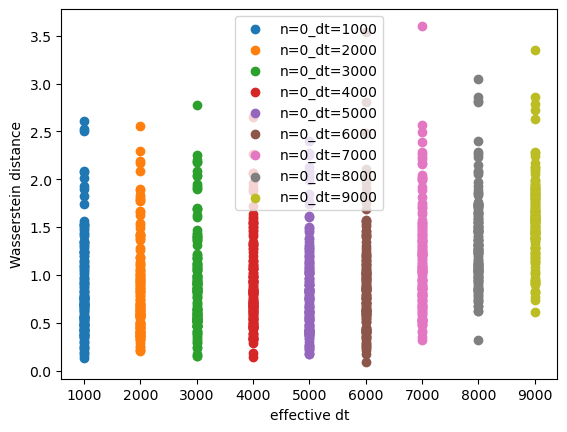

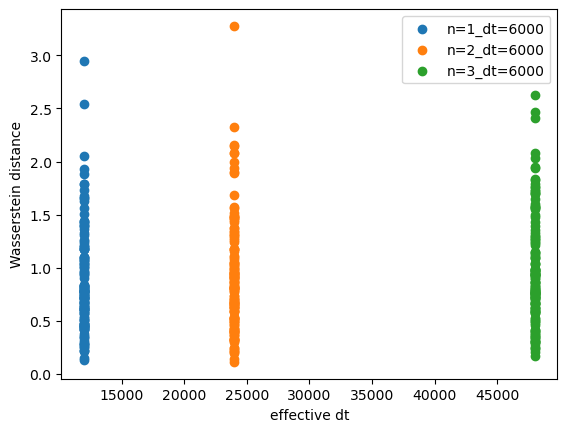

In [10]:
#print the mens and std of ws with strings saying what they are
plt.rcdefaults()
print("ws_n0",np.mean(ws_n0),np.std(ws_n0))
print("ws_n1",np.mean(ws_n1),np.std(ws_n1))
print("ws_n2",np.mean(ws_n2),np.std(ws_n2))
print("ws_n3",np.mean(ws_n3),np.std(ws_n3))
print("ws_n0_1000",np.mean(ws_n0_1000),np.std(ws_n0_1000))
print("ws_n0_2000",np.mean(ws_n0_2000),np.std(ws_n0_2000))
print("ws_n0_3000",np.mean(ws_n0_3000),np.std(ws_n0_3000))
print("ws_n0_4000",np.mean(ws_n0_4000),np.std(ws_n0_4000))
print("ws_n0_5000",np.mean(ws_n0_5000),np.std(ws_n0_5000))
print("ws_n0_6000",np.mean(ws_n0_6000),np.std(ws_n0_6000))
print("ws_n0_7000",np.mean(ws_n0_7000),np.std(ws_n0_7000))


#plot ws as a scatter plot as a function of the dt (the number after the 0 in the file name) not the mean but the dots in the lists
#eg. in the plot for x =1000 and the y values are ws_n0_1000\
# plt.scatter([500]*len(ws_n0_500),ws_n0_500,label="n=0_dt=500")
plt.scatter([1000]*len(ws_n0_1000),ws_n0_1000,label="n=0_dt=1000")
plt.scatter([2000]*len(ws_n0_2000),ws_n0_2000,label="n=0_dt=2000")
plt.scatter([3000]*len(ws_n0_3000),ws_n0_3000,label="n=0_dt=3000")
plt.scatter([4000]*len(ws_n0_4000),ws_n0_4000,label="n=0_dt=4000")
plt.scatter([5000]*len(ws_n0_5000),ws_n0_5000,label="n=0_dt=5000")
plt.scatter([6000]*len(ws_n0_6000),ws_n0_6000,label="n=0_dt=6000")
plt.scatter([7000]*len(ws_n0_7000),ws_n0_7000,label="n=0_dt=7000")
plt.scatter([8000]*len(ws_n0_8000),ws_n0_8000,label="n=0_dt=8000")
plt.scatter([9000]*len(ws_n0_9000),ws_n0_9000,label="n=0_dt=9000")
plt.legend()
plt.xlabel("effective dt")
plt.ylabel("Wasserstein distance")
plt.show()

plt.scatter([12000]*len(ws_n1),ws_n1,label="n=1_dt=6000")
plt.scatter([24000]*len(ws_n2),ws_n2,label="n=2_dt=6000")
plt.scatter([48000]*len(ws_n3),ws_n3,label="n=3_dt=6000")
plt.legend()
plt.xlabel("effective dt")
plt.ylabel("Wasserstein distance")
plt.show()


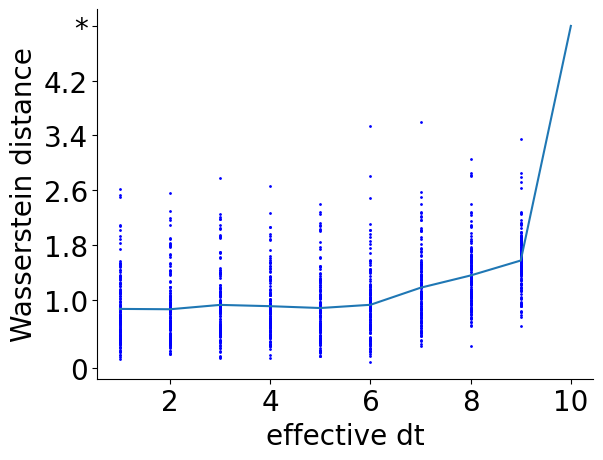

In [83]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)# Calculate the mean and standard deviation
means = [np.mean(arr) for arr in [ws_n0_1000, ws_n0_2000, ws_n0_3000, ws_n0_4000, ws_n0_5000, ws_n0_6000, ws_n0_7000, ws_n0_8000,ws_n0_9000,5]]
# stds = [np.std(arr) for arr in [ws_n0_1000, ws_n0_2000, ws_n0_3000, ws_n0_4000, ws_n0_5000, ws_n0_6000, ws_n0_7000, ws_n0_8000]]
dt_values = [1, 2, 3, 4, 5, 6, 7, 8,9,10]
ax.plot(dt_values, means,"-")
ax.scatter([1]*len(ws_n0_1000),ws_n0_1000,label="n=0_dt=1000",color="blue",s=1)
ax.scatter([2]*len(ws_n0_2000),ws_n0_2000,label="n=0_dt=2000",color="blue",s=1)
ax.scatter([3]*len(ws_n0_3000),ws_n0_3000,label="n=0_dt=3000",color="blue",s=1)
ax.scatter([4]*len(ws_n0_4000),ws_n0_4000,label="n=0_dt=4000",color="blue",s=1)
ax.scatter([5]*len(ws_n0_5000),ws_n0_5000,label="n=0_dt=5000",color="blue",s=1)
ax.scatter([6]*len(ws_n0_6000),ws_n0_6000,label="n=0_dt=6000",color="blue",s=1)
ax.scatter([7]*len(ws_n0_7000),ws_n0_7000,label="n=0_dt=7000",color="blue",s=1)
ax.scatter([8]*len(ws_n0_8000),ws_n0_8000,label="n=0_dt=8000",color="blue",s=1)
ax.scatter([9]*len(ws_n0_9000),ws_n0_9000,label="n=0_dt=9000",color="blue",s=1)


ytick_locs = [0] + [round(i, 2) for i in np.linspace(1, 5, 6)]
ytick_labels = ['*' if loc == 5 else str(loc) for loc in ytick_locs]
ax.set_yticks(ytick_locs)
ax.set_yticklabels(ytick_labels)
plt.tick_params(axis='both', which='major', labelsize=20)



# Plot for n=0
plt.xlabel("effective dt",fontsize=20)
plt.ylabel("Wasserstein distance",fontsize=20)
plt.show()

# Calculate the mean and standard deviation for n=1, n=2, n=3
# means_n1 = np.mean(ws_n1)
# std_n1 = np.std(ws_n1)
#
# means_n2 = np.mean(ws_n2)
# std_n2 = np.std(ws_n2)
#
# means_n3 = np.mean(ws_n3)
# std_n3 = np.std(ws_n3)
#
# # Plot for n=1, n=2, n=3
#
# plt.legend()
# plt.xlabel("effective dt")
# plt.ylabel("Wasserstein distance")
#
#save pickle
# dift_for_fig_1_a = {"ws_n0_1000":ws_n0_1000,"ws_n0_2000":ws_n0_2000,"ws_n0_3000":ws_n0_3000,"ws_n0_4000":ws_n0_4000,"ws_n0_5000":ws_n0_5000,"ws_n0_6000":ws_n0_6000,"ws_n0_7000":ws_n0_7000,"ws_n0_8000":ws_n0_8000,"ws_n0_9000":ws_n0_9000,"ws_n0_500":ws_n0_500}
# with open("ws_fig_5_npc.pkl", 'wb') as f:
#     pickle.dump(dift_for_fig_1_a, f)
#     print("saved")

# plt.show()

In [84]:

ws_n1_1000,ws_n2_1000,ws_n3_1000 = [],[],[]
ws_n1_2000,ws_n2_2000,ws_n3_2000 = [],[],[]
ws_n1_3000,ws_n2_3000,ws_n3_3000 = [],[],[]
ws_n1_4000,ws_n2_4000,ws_n3_4000 = [],[],[]
ws_n1_5000,ws_n2_5000,ws_n3_5000 = [],[],[]
ws_n1_6000,ws_n2_6000,ws_n3_6000 = [],[],[]
ws_n1_7000,ws_n2_7000,ws_n3_7000 = [],[],[]




for i in range (20,40):
    file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_1_1000.0_.pkl".format(run_num=i+1)
    with open(file_2, 'rb') as f:
        x_n_11_1000= pickle.load(f)
    file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_2_1000.0_.pkl".format(run_num=i+1)
    with open(file_2, 'rb') as f:
        x_n_22_1000= pickle.load(f)
    file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_3_1000.0_.pkl".format(run_num=i+1)
    with open(file_2, 'rb') as f:
        x_n_33_1000= pickle.load(f)
    file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_1_2000.0_.pkl".format(run_num=i+1)
    with open(file_2, 'rb') as f:
        x_n_11_2000= pickle.load(f)
    file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_2_2000.0_.pkl".format(run_num=i+1)
    with open(file_2, 'rb') as f:
        x_n_22_2000= pickle.load(f)
    file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_3_2000.0_.pkl".format(run_num=i+1)
    with open(file_2, 'rb') as f:
        x_n_33_2000= pickle.load(f)
    file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_1_3000.0_.pkl".format(run_num=i+1)
    with open(file_2, 'rb') as f:
        x_n_11_3000= pickle.load(f)
    file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_2_3000.0_.pkl".format(run_num=i+1)
    with open(file_2, 'rb') as f:
        x_n_22_3000= pickle.load(f)
    file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_3_3000.0_.pkl".format(run_num=i+1)
    with open(file_2, 'rb') as f:
        x_n_33_3000= pickle.load(f)
    file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_1_4000.0_.pkl".format(run_num=i+1)
    with open(file_2, 'rb') as f:
        x_n_11_4000= pickle.load(f)
    file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_2_4000.0_.pkl".format(run_num=i+1)
    with open(file_2, 'rb') as f:
        x_n_22_4000= pickle.load(f)
    file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_1_5000.0_.pkl".format(run_num=i+1)
    with open(file_2, 'rb') as f:
        x_n_11_5000= pickle.load(f)
    file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_2_5000.0_.pkl".format(run_num=i+1)
    with open(file_2, 'rb') as f:
        x_n_22_5000= pickle.load(f)
    file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_1000.0_.pkl".format(run_num=i+2)
    with open(file_2, 'rb') as f:
        x_n_00_1000_v2= pickle.load(f)
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v8/radius_v1_{run_num}_3_5000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_33_5000= pickle.load(f)
    for j in range (7):
        a = wasserstein_distance_func(x_n_11_1000["fg_rg"][:,j],x_n_00_1000_v2["fg_rg"][:,j])
        ws_n1_1000.append(a)
        a = wasserstein_distance_func(x_n_22_1000["fg_rg"][:,j],x_n_00_1000_v2["fg_rg"][:,j])
        ws_n2_1000.append(a)
        a = wasserstein_distance_func(x_n_33_1000["fg_rg"][:,j],x_n_00_1000_v2["fg_rg"][:,j])
        ws_n3_1000.append(a)
        a = wasserstein_distance_func(x_n_11_2000["fg_rg"][:,j],x_n_00_1000_v2["fg_rg"][:,j])
        ws_n1_2000.append(a)
        a = wasserstein_distance_func(x_n_22_2000["fg_rg"][:,j],x_n_00_1000_v2["fg_rg"][:,j])
        ws_n2_2000.append(a)
        a = wasserstein_distance_func(x_n_33_2000["fg_rg"][:,j],x_n_00_1000_v2["fg_rg"][:,j])
        ws_n3_2000.append(a)
        a = wasserstein_distance_func(x_n_11_3000["fg_rg"][:,j],x_n_00_1000_v2["fg_rg"][:,j])
        ws_n1_3000.append(a)
        a = wasserstein_distance_func(x_n_22_3000["fg_rg"][:,j],x_n_00_1000_v2["fg_rg"][:,j])
        ws_n2_3000.append(a)
        a = wasserstein_distance_func(x_n_33_3000["fg_rg"][:,j],x_n_00_1000_v2["fg_rg"][:,j])
        ws_n3_3000.append(a)
        a = wasserstein_distance_func(x_n_11_4000["fg_rg"][:,j],x_n_00_1000_v2["fg_rg"][:,j])
        ws_n1_4000.append(a)
        a = wasserstein_distance_func(x_n_22_4000["fg_rg"][:,j],x_n_00_1000_v2["fg_rg"][:,j])
        ws_n2_4000.append(a)
        # a = wasserstein_distance_func(x_n_33_4000["fg_rg"][:,j],x_n_00_1000_v2["fg_rg"][:,j])
        # ws_n3_4000.append(a)
        a = wasserstein_distance_func(x_n_11_5000["fg_rg"][:,j],x_n_00_1000_v2["fg_rg"][:,j])
        ws_n1_5000.append(a)
        a = wasserstein_distance_func(x_n_22_5000["fg_rg"][:,j],x_n_00_1000_v2["fg_rg"][:,j])
        ws_n2_5000.append(a)
        # a = wasserstein_distance_func(x_n_33_5000["fg_rg"][:,j],x_n_00_1000_v2["fg_rg"][:,j])
        # ws_n3_5000.append(a)





In [13]:
for i in range (20,40):
    file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_1000.0_.pkl".format(run_num=i+2)
    with open(file_2, 'rb') as f:
        x_n_00_1000_v2= pickle.load(f)
    file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v8/radius_v1_{run_num}_3_5000.0_.pkl".format(run_num=i+1)
    with open(file_2, 'rb') as f:
        x_n_33_5000= pickle.load(f)
    for j in range (7):
        a = wasserstein_distance_func(x_n_33_5000["fg_rg"][:,j],x_n_00_1000_v2["fg_rg"][:,j])
        ws_n3_5000.append(a)

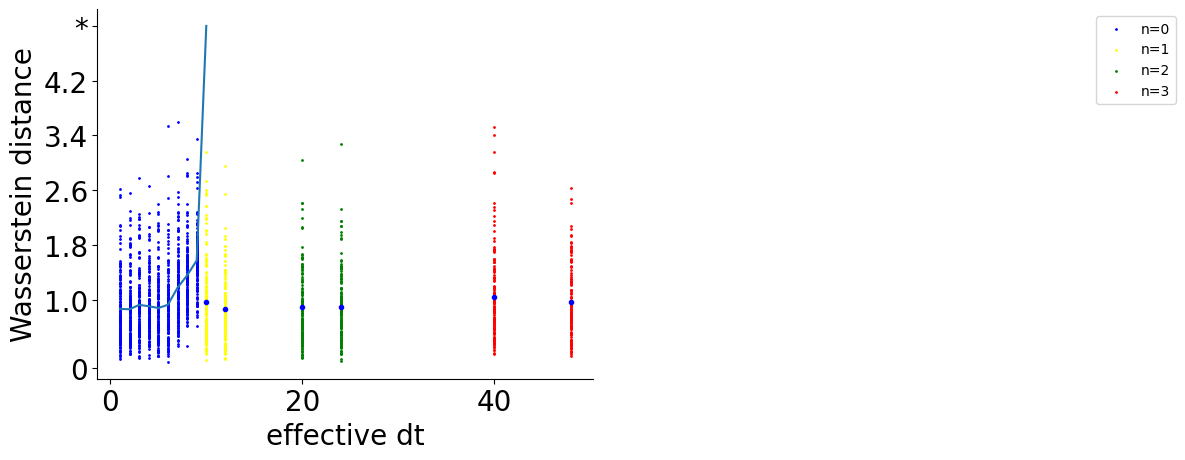

In [14]:
# |# Calculate the mean and standard deviation
#
# plt.plot(dt_values, means,"-")
# plt.scatter([1000]*len(ws_n0_1000),ws_n0_1000,label="n=0_dt=1000",color="blue",s=1)
# plt.scatter([1000]*len(ws_n0_1000),ws_n0_1000,label="n=0_dt=1000",color="blue",s=1)
# plt.scatter([2000]*len(ws_n0_2000),ws_n0_2000,label="n=0_dt=2000",color="blue",s=1)
# plt.scatter([3000]*len(ws_n0_3000),ws_n0_3000,label="n=0_dt=3000",color="blue",s=1)
# plt.scatter([4000]*len(ws_n0_4000),ws_n0_4000,label="n=0_dt=4000",color="blue",s=1)
# plt.scatter([5000]*len(ws_n0_5000),ws_n0_5000,label="n=0_dt=5000",color="blue",s=1)
# plt.scatter([6000]*len(ws_n0_6000),ws_n0_6000,label="n=0_dt=6000",color="blue",s=1)
# plt.scatter([7000]*len(ws_n0_7000),ws_n0_7000,label="n=0_dt=7000",color="blue",s=1)
# plt.scatter([8000]*len(ws_n0_8000),ws_n0_8000,label="n=0_dt=8000",color="blue",s=1)
# plt.scatter([9000]*len(ws_n0_9000),ws_n0_9000,label="n=0_dt=9000",color="blue",s=1)
#
# plt.scatter([12000]*len(ws_n1),ws_n1,label="n=1_dt=6000",color="yellow",s=1)
# plt.scatter([24000]*len(ws_n2),ws_n2,label="n=2_dt=6000",color="green",s=1)
# plt.scatter([48000]*len(ws_n3),ws_n3,label="n=3_dt=6000",color="red",s=1)
#
# # Plot for n=0
# plt.xlabel("effective dt")
# plt.ylabel("Wasserstein distance")
# plt.show()



fig, ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)# Calculate the mean and standard deviation
means = [np.mean(arr) for arr in [ws_n0_1000, ws_n0_2000, ws_n0_3000, ws_n0_4000, ws_n0_5000, ws_n0_6000, ws_n0_7000, ws_n0_8000,ws_n0_9000,5]]
means_n1 = [np.mean(arr) for arr in [ws_n1]]
means_n2 = [np.mean(arr) for arr in [ws_n2]]
means_n3 = [np.mean(arr) for arr in [ws_n3]]
means_6000 = [np.mean(arr) for arr in [ws_n0_6000]]
# means_500 = [np.mean(arr) for arr in [ws_n0_500]]
means_1000 = [np.mean(arr) for arr in [ws_n0_1000]]
means_9000 = [np.mean(arr) for arr in [ws_n0_9000]]
# stds = [np.std(arr) for arr in [ws_n0_1000, ws_n0_2000, ws_n0_3000, ws_n0_4000, ws_n0_5000, ws_n0_6000, ws_n0_7000, ws_n0_8000]]
dt_values = [1, 2, 3, 4, 5, 6, 7, 8,9,10]
ax.plot(dt_values, means,"-")
dt_values_n1 = [12]
ax.plot(dt_values_n1, means_n1,".",color="blue")
dt_values_n2 = [24]
ax.plot(dt_values_n2, means_n2,".",color="blue")
dt_values_n3 = [48]
ax.plot(dt_values_n3, means_n3,".",color="blue")
ax.scatter([1]*len(ws_n0_1000),ws_n0_1000,color="blue",s=1)
ax.scatter([2]*len(ws_n0_2000),ws_n0_2000,color="blue",s=1)
ax.scatter([3]*len(ws_n0_3000),ws_n0_3000,color="blue",s=1)
ax.scatter([4]*len(ws_n0_4000),ws_n0_4000,color="blue",s=1)
ax.scatter([5]*len(ws_n0_5000),ws_n0_5000,color="blue",s=1)
ax.scatter([6]*len(ws_n0_6000),ws_n0_6000,color="blue",s=1)
ax.scatter([7]*len(ws_n0_7000),ws_n0_7000,color="blue",s=1)
ax.scatter([8]*len(ws_n0_8000),ws_n0_8000,color="blue",s=1)
ax.scatter([9]*len(ws_n0_9000),ws_n0_9000,label="n=0",color="blue",s=1)

plt.scatter([12]*len(ws_n1),ws_n1,label="n=1",color="yellow",s=1)
plt.scatter([10]*len(ws_n1_5000),ws_n1_5000,color="yellow",s=1)
dt_values_n1 = [10]
ax.plot(dt_values_n1, np.mean(ws_n1_5000),".",color="blue")

plt.scatter([24]*len(ws_n2),ws_n2,label="n=2",color="green",s=1)
plt.scatter([20]*len(ws_n2_5000),ws_n2_5000,color="green",s=1)
dt_values_n1 = [20]
ax.plot(dt_values_n1, np.mean(ws_n2_5000),".",color="blue")

plt.scatter([48]*len(ws_n3),ws_n3,label="n=3",color="red",s=1)
plt.scatter([40]*len(ws_n3_5000),ws_n3_5000,color="red",s=1)
dt_values_n1 = [40]
ax.plot(dt_values_n1, np.mean(ws_n3_5000),".",color="blue")

ytick_locs = [0] + [round(i, 2) for i in np.linspace(1, 5, 6)]
ytick_labels = ['*' if loc == 5 else str(loc) for loc in ytick_locs]
ax.set_yticks(ytick_locs)
ax.set_yticklabels(ytick_labels)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.legend()
# Plot for n=0
plt.xlabel("effective dt",fontsize=20)
plt.ylabel("Wasserstein distance",fontsize=20)
plt.legend(loc='upper left', bbox_to_anchor=(2, 1))

plt.show()
# dift_for_fig_1_b= {"ws_n0_1000":ws_n0_1000,"ws_n0_2000":ws_n0_2000,"ws_n0_3000":ws_n0_3000,"ws_n0_4000":ws_n0_4000,"ws_n0_5000":ws_n0_5000,"ws_n0_6000":ws_n0_6000,"ws_n0_7000":ws_n0_7000,"ws_n0_8000":ws_n0_8000,"ws_n0_9000":ws_n0_9000,"ws_n0_500":ws_n0_500,"ws_n1_6000":ws_n1,"ws_n2_6000":ws_n2,"ws_n3_6000":ws_n3,"ws_n1_5000":ws_n1_5000,"ws_n2_5000":ws_n2_5000,"ws_n3_5000":ws_n3_5000}
# with open("ws_fig_5_npc_dift_for_fig_1_b.pkl", 'wb') as f:
#     pickle.dump(dift_for_fig_1_b, f)
#     print("saved")

In [15]:

def calculate_sem(data):
    """
    Calculate the Standard Error of the Mean (SEM) for a given dataset.

    Parameters:
    data (list or numpy array): The dataset for which the SEM is to be calculated.

    Returns:
    float: The calculated SEM.
    """
    # Convert the input data to a NumPy array if it isn't one already
    data = np.array(data)

    # Calculate the sample standard deviation
    std_dev = np.std(data, ddof=1)

    # Calculate the sample size
    n = len(data)

    # Calculate the SEM
    sem = std_dev / np.sqrt(n)

    return sem

/tmp/ipykernel_1705044/967443626.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Blues')


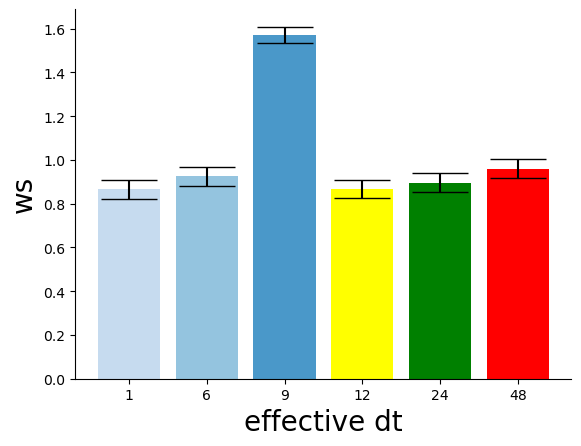

In [16]:
# Replace 'x_values' and 'y_values' with your actual data points
# 'error_values' should represent the error for each bar
colors = [1, 1.5, 2.5, 3.5]
cmap = plt.cm.get_cmap('Blues')
# Normalize the error values
norm = plt.Normalize(min(colors), max(colors))
# Create the bar plot with colored bars

x_values = ['1', '6', '9', '12', '24', '48']  # Example category labels
y_values = [means_1000[0], means_6000[0], means_9000[0], means_n1[0],  means_n2[0], means_n3[0]]         # Example data
# print(y_values)
# Calculate the standard deviation of the sample

error_values = [calculate_sem(ws_n0_1000),calculate_sem(ws_n0_6000),calculate_sem(ws_n0_9000),
                calculate_sem(ws_n1),calculate_sem(ws_n2),calculate_sem(ws_n3)]  # Example error values

# Define bar color for each bar individually if needed
colors = [cmap(0.25),cmap(0.4),cmap(0.6), 'yellow','green', 'red']

# Create the bar graph
plt.bar(x_values, y_values, color=colors, yerr=error_values, capsize=20)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)# Calculate the mean and standard deviation
# Add titles and labels
# plt.title('Example Bar Graph with Error Bars')
plt.xlabel('effective dt',fontsize=20)
plt.ylabel('ws',fontsize=20)

# Show the graph
plt.show()

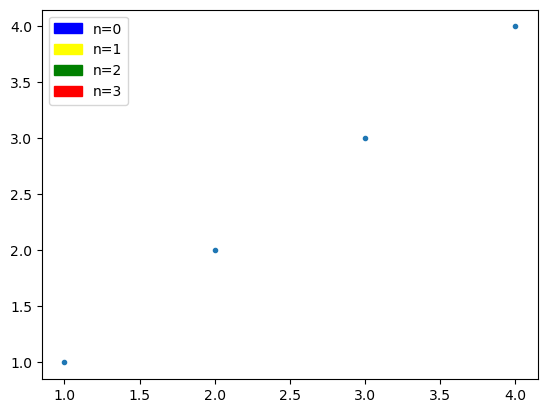

In [17]:
# add manual legend to a plot with blue, yellow, green, red
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

# Create some data
x = [1, 2, 3, 4]
y = [1, 2, 3, 4]

# Create a plot
plt.plot(x, y, '.',label='Line 1')

# Add a legend
plt.legend()

# Create a legend
blue_patch = mpatches.Patch(color='blue', label='n=0')
yellow_patch = mpatches.Patch(color='yellow', label='n=1')
green_patch = mpatches.Patch(color='green', label='n=2')
red_patch = mpatches.Patch(color='red', label='n=3')
plt.legend(handles=[blue_patch, yellow_patch, green_patch, red_patch])

# Show the plot
plt.show()


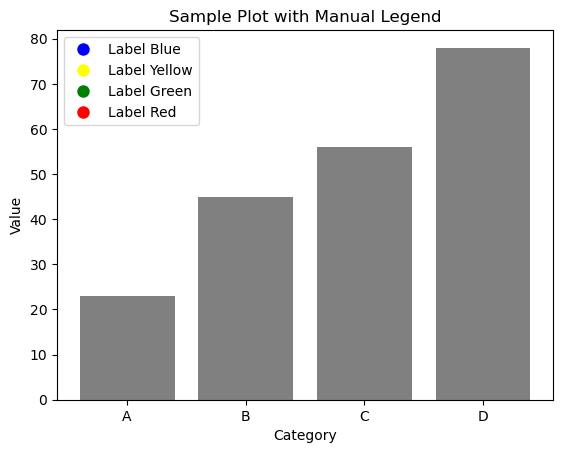

In [18]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Sample plot (could be any kind of plot)
categories = ['A', 'B', 'C', 'D']
values = [23, 45, 56, 78]
plt.bar(categories, values, color='grey')  # Example plot

# Define custom colors and labels for the legend
colors = ['blue', 'yellow', 'green', 'red']
labels = ['Label Blue', 'Label Yellow', 'Label Green', 'Label Red']

# Create custom handles
custom_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=c, markersize=10, label=l)
                  for c, l in zip(colors, labels)]

# Add the custom legend to the plot
plt.legend(handles=custom_handles)

# Optional: Add titles and labels for clarity
plt.title("Sample Plot with Manual Legend")
plt.xlabel("Category")
plt.ylabel("Value")

plt.show()


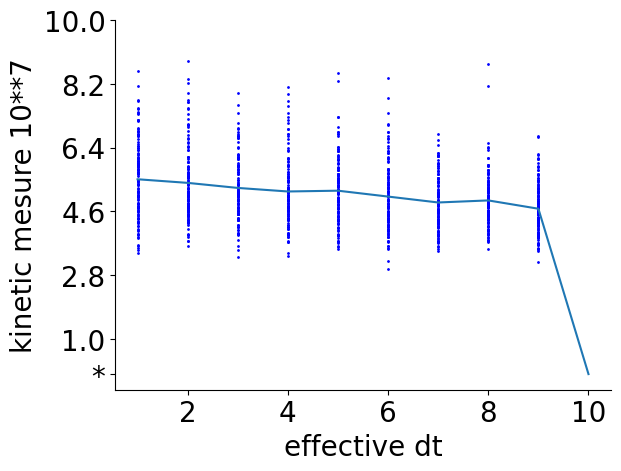

In [19]:

fig, ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)# Calculate the mean and standard deviation
means = [np.mean(arr) for arr in [taho_n0_1000,taho_n0_2000, taho_n0_3000, taho_n0_4000, taho_n0_5000, taho_n0_6000, taho_n0_7000, taho_n0_8000, taho_n0_9000,0]]
# means_n1 = [np.mean(arr) for arr in [ws_n1]]
# means_n2 = [np.mean(arr) for arr in [ws_n2]]
# means_n3 = [np.mean(arr) for arr in [ws_n3]]
# stds = [np.std(arr) for arr in [ws_n0_1000, ws_n0_2000, ws_n0_3000, ws_n0_4000, ws_n0_5000, ws_n0_6000, ws_n0_7000, ws_n0_8000]]
dt_values = [1, 2, 3, 4, 5, 6, 7, 8,9,10]
result = [x / 10**7 for x in means]
ax.plot(dt_values, result,"-")
# dt_values_n1 = [12]
# ax.plot(dt_values_n1, means_n1,"-",color="yellow")
# dt_values_n2 = [24]
# ax.plot(dt_values_n2, means_n2,"-",color="green")
# dt_values_n3 = [48]
# ax.plot(dt_values_n3, means_n3,"-",color="red")

# ax.scatter([0.5]*len(taho_n0_500),taho_n0_500,label="n=0_dt=500",color="blue",s=1)
result = [x / 10**7 for x in taho_n0_1000]
ax.scatter([1]*len(taho_n0_1000),result,label="n=0_dt=1000",color="blue",s=1)
result = [x / 10**7 for x in taho_n0_2000]
ax.scatter([2]*len(taho_n0_2000),result,label="n=0_dt=2000",color="blue",s=1)
result = [x / 10**7 for x in taho_n0_3000]
ax.scatter([3]*len(taho_n0_3000),result,label="n=0_dt=3000",color="blue",s=1)
result = [x / 10**7 for x in taho_n0_4000]
ax.scatter([4]*len(taho_n0_4000),result,label="n=0_dt=4000",color="blue",s=1)
result = [x / 10**7 for x in taho_n0_5000]
ax.scatter([5]*len(taho_n0_5000),result,label="n=0_dt=5000",color="blue",s=1)
result = [x / 10**7 for x in taho_n0_6000]
ax.scatter([6]*len(taho_n0_6000),result,label="n=0_dt=6000",color="blue",s=1)
result = [x / 10**7 for x in taho_n0_7000]
ax.scatter([7]*len(taho_n0_7000),result,label="n=0_dt=7000",color="blue",s=1)
result = [x / 10**7 for x in taho_n0_8000]
ax.scatter([8]*len(taho_n0_8000),result,label="n=0_dt=8000",color="blue",s=1)
result = [x / 10**7 for x in taho_n0_9000]
ax.scatter([9]*len(taho_n0_9000),result,label="n=0_dt=9000",color="blue",s=1)
# plt.legend()

# plt.scatter([12]*len(ws_n1),ws_n1,label="n=1_dt=6000",color="yellow",s=1)
# plt.scatter([24]*len(ws_n2),ws_n2,label="n=2_dt=6000",color="green",s=1)
# plt.scatter([48]*len(ws_n3),ws_n3,label="n=3_dt=6000",color="red",s=1)

ytick_locs = [0] + [round(i, 2) for i in np.linspace(1, 10, 6)]
ytick_labels = ['*' if loc == 0else str(loc) for loc in ytick_locs]
ax.set_yticks(ytick_locs)
ax.set_yticklabels(ytick_labels)
plt.tick_params(axis='both', which='major', labelsize=20)
#
# plt.yscale('log')
# Plot for n=0
plt.xlabel("effective dt",fontsize=20)
plt.ylabel("kinetic mesure 10**7",fontsize=20)
plt.show()

In [20]:
len_of_optimizing_cycle =192
taho_n3_5000,taho_n2_5000,taho_n1_5000 = [],[],[]

for i in range (20,40):
    file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v8/radius_v1_{run_num}_3_5000.0_.pkl".format(run_num=i+1)
    with open(file_2, 'rb') as f:
        x_n_33_5000= pickle.load(f)
    file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_2_5000.0_.pkl".format(run_num=i+1)
    with open(file_2, 'rb') as f:
        x_n_22_5000= pickle.load(f)
    file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_1_5000.0_.pkl".format(run_num=i+1)
    with open(file_2, 'rb') as f:
        x_n_11_5000= pickle.load(f)
    for j in range (7):
        n=3
        dt=5000
        step_size = int(math.ceil((2000/dt)*len_of_optimizing_cycle/(4**n))) *dt * (4 ** n)/2
        x_2_3_6000,estimate_auto_curelation_3_6000,taho_n0_9 = get_taho_half(x_n_33_5000["fg_rg"][:,j],step_size=step_size)
        taho_n3_5000.append(taho_n0_9)

        n=2
        step_size = int(math.ceil((2000/dt)*len_of_optimizing_cycle/(4**n))) *dt * (4 ** n)
        x_2_3_6000,estimate_auto_curelation_3_6000,taho_n0_9 = get_taho_half(x_n_22_5000["fg_rg"][:,j],step_size=step_size)
        taho_n2_5000.append(taho_n0_9)

        n=1
        step_size = int(math.ceil((2000/dt)*len_of_optimizing_cycle/(4**n))) *dt * (4 ** n)
        x_2_3_6000,estimate_auto_curelation_3_6000,taho_n0_9 = get_taho_half(x_n_11_5000["fg_rg"][:,j],step_size=step_size)
        taho_n1_5000.append(taho_n0_9)
        # print(np.mean(taho_n3_5000)/10**7)

19200000000.0 60000
24000000000 60000
24000000000 60000
19200000000.0 60000
24000000000 60000
24000000000 60000
19200000000.0 60000
24000000000 60000
24000000000 60000
19200000000.0 60000
24000000000 60000
24000000000 60000
19200000000.0 60000
24000000000 60000
24000000000 60000
19200000000.0 60000
24000000000 60000
24000000000 60000
19200000000.0 60000
24000000000 60000
24000000000 60000
19200000000.0 60000
24000000000 60000
24000000000 60000
19200000000.0 60000
24000000000 60000
24000000000 60000
19200000000.0 60000
24000000000 60000
24000000000 60000
19200000000.0 60000
24000000000 60000
24000000000 60000
19200000000.0 60000
24000000000 60000
24000000000 60000
19200000000.0 60000
24000000000 60000
24000000000 60000
19200000000.0 60000
24000000000 60000
24000000000 60000
19200000000.0 60000
24000000000 60000
24000000000 60000
19200000000.0 60000
24000000000 60000
24000000000 60000
19200000000.0 60000
24000000000 60000
24000000000 60000
19200000000.0 60000
24000000000 60000
2400000000

In [21]:
print(np.mean(taho_n1)/10**7)

5.083337142857142


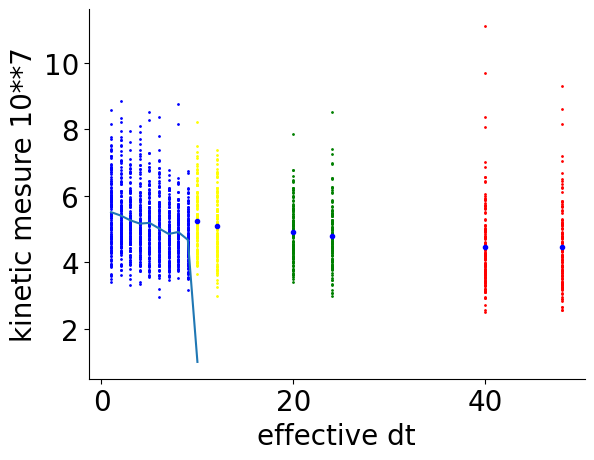

saved


In [22]:
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)# Calculate the mean and standard deviation
means = [np.mean(arr) for arr in [taho_n0_1000,taho_n0_2000, taho_n0_3000, taho_n0_4000, taho_n0_5000, taho_n0_6000, taho_n0_7000, taho_n0_8000, taho_n0_9000,10**7]]
means_n1 = [np.mean(arr) for arr in [taho_n1]]
means_n2 = [np.mean(arr) for arr in [taho_n2]]
means_n3 = [np.mean(arr) for arr in [taho_n3]]
# stds = [np.std(arr) for arr in [ws_n0_1000, ws_n0_2000, ws_n0_3000, ws_n0_4000, ws_n0_5000, ws_n0_6000, ws_n0_7000, ws_n0_8000]]
dt_values = [1, 2, 3, 4, 5, 6, 7, 8,9,10]
result = [x / 10**7 for x in means]
ax.plot(dt_values, result,"-")
# dt_values_n1 = [12]
# ax.plot(dt_values_n1, means_n1,"-",color="yellow")
# dt_values_n2 = [24]
# ax.plot(dt_values_n2, means_n2,"-",color="green")
# dt_values_n3 = [48]
# ax.plot(dt_values_n3, means_n3,"-",color="red")
# ax.scatter([0.5]*len(taho_n0_500),taho_n0_500,label="n=0_dt=500",color="blue",s=1)
result = [x / 10**7 for x in taho_n0_1000]
ax.scatter([1]*len(taho_n0_1000),result,label="n=0_dt=1000",color="blue",s=1)
result = [x / 10**7 for x in taho_n0_2000]
ax.scatter([2]*len(taho_n0_2000),result,label="n=0_dt=2000",color="blue",s=1)
result = [x / 10**7 for x in taho_n0_3000]
ax.scatter([3]*len(taho_n0_3000),result,label="n=0_dt=3000",color="blue",s=1)
result = [x / 10**7 for x in taho_n0_4000]
ax.scatter([4]*len(taho_n0_4000),result,label="n=0_dt=4000",color="blue",s=1)
result = [x / 10**7 for x in taho_n0_5000]
ax.scatter([5]*len(taho_n0_5000),result,label="n=0_dt=5000",color="blue",s=1)
result = [x / 10**7 for x in taho_n0_6000]
ax.scatter([6]*len(taho_n0_6000),result,label="n=0_dt=6000",color="blue",s=1)
result = [x / 10**7 for x in taho_n0_7000]
ax.scatter([7]*len(taho_n0_7000),result,label="n=0_dt=7000",color="blue",s=1)
result = [x / 10**7 for x in taho_n0_8000]
ax.scatter([8]*len(taho_n0_8000),result,label="n=0_dt=8000",color="blue",s=1)
result = [x / 10**7 for x in taho_n0_9000]
ax.scatter([9]*len(taho_n0_9000),result,label="n=0_dt=9000",color="blue",s=1)

result = [x / 10**7 for x in taho_n1]
plt.scatter([12]*len(taho_n1),result,label="n=1_dt=6000",color="yellow",s=1)
result = [x / 10**7 for x in taho_n1_5000]
plt.scatter([10]*len(taho_n1_5000),result,color="yellow",s=1)

result = [x / 10**7 for x in taho_n2]
plt.scatter([24]*len(taho_n2),result,label="n=2_dt=6000",color="green",s=1)
result = [x / 10**7 for x in taho_n2_5000]
plt.scatter([20]*len(taho_n2_5000),result,color="green",s=1)


result = [x / 10**7 for x in taho_n3]
plt.scatter([48]*len(taho_n3),result,label="n=3_dt=6000",color="red",s=1)

result = [x / 10**7 for x in taho_n3_5000]
plt.scatter([40]*len(taho_n3_5000),result,color="red",s=1)
# ytick_locs = [0] + [round(i, 2) for i in np.linspace(10**7, 10**8, 6)]
# ytick_labels = ['*' if loc == 10**7 else str(loc) for loc in ytick_locs]
# ax.set_yticks(ytick_locs)
# ax.set_yticklabels(ytick_labels)
# plt.tick_params(axis='both', which='major', labelsize=20)
dt_values_n1 = [12]
result = [x / 10**7 for x in means_n1]
ax.plot(dt_values_n1, result,".",color="blue")
dt_values_n2 = [24]
result = [x / 10**7 for x in means_n2]
ax.plot(dt_values_n2, result,".",color="blue")
dt_values_n3 = [48]
result = [x / 10**7 for x in means_n3]
ax.plot(dt_values_n3, result,".",color="blue")
ax.plot([40], np.mean(taho_n3_5000)/10**7,".",color="blue")
ax.plot([20], np.mean(taho_n2_5000)/10**7,".",color="blue")
ax.plot([10], np.mean(taho_n1_5000)/10**7,".",color="blue")

# plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=20)

# Plot for n=0
plt.xlabel("effective dt",fontsize=20)
plt.ylabel("kinetic mesure 10**7",fontsize=20)
plt.show()

#save the data
dift_for_fig_1_taho= {"taho_n0_1000":taho_n0_1000,"taho_n0_2000":taho_n0_2000,"taho_n0_3000":taho_n0_3000,"taho_n0_4000":taho_n0_4000,"taho_n0_5000":taho_n0_5000,"taho_n0_6000":taho_n0_6000,"taho_n0_7000":taho_n0_7000,"taho_n0_8000":taho_n0_8000,"taho_n0_9000":taho_n0_9000,"taho_n0_500":taho_n0_500,"taho_n1_6000":taho_n1,"taho_n2_6000":taho_n2,"taho_n3_6000":taho_n3,"taho_n1_5000":taho_n1_5000,"taho_n2_5000":taho_n2_5000,"taho_n3_5000":taho_n3_5000}
with open("taho_fig_5_npc_dift_for_fig_1_taho.pkl", 'wb') as f:
    pickle.dump(dift_for_fig_1_taho, f)
    print("saved")

In [23]:
print (means_n1,"",means_n2,"",means_n3)
print(means)

[50833371.428571425]  [47780571.428571425]  [44574171.428571425]
[55040914.28571428, 54020571.428571425, 52594285.71428572, 51590400.0, 51812750.0, 50150400.0, 48482500.0, 49064228.571428575, 46719192.85714286, 10000000.0]


/tmp/ipykernel_1705044/3041330708.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Blues')


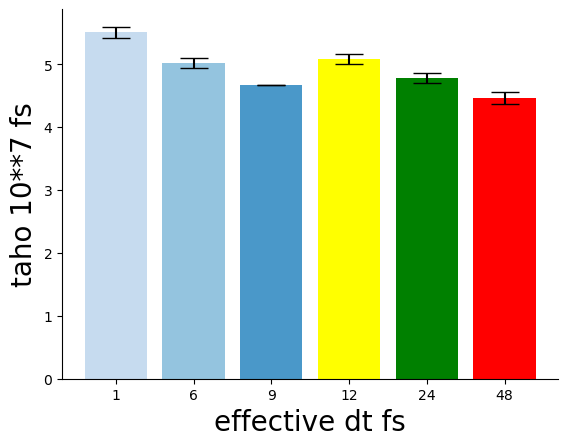

In [24]:

# Replace 'x_values' and 'y_values' with your actual data points
# 'error_values' should represent the error for each bar
colors = [1, 1.5, 2.5, 3.5]
cmap = plt.cm.get_cmap('Blues')
# Normalize the error values
norm = plt.Normalize(min(colors), max(colors))
# Create the bar plot with colored bars

x_values = ['1', '6', '9', '12', '24', '48']  # Example category labels
y_values = [np.mean(taho_n0_1000)/(10**7), np.mean(taho_n0_6000)/(10**7), np.mean(taho_n0_9000)/(10**7),np.mean(taho_n1)/(10**7),
            np.mean(taho_n2)/(10**7),np.mean(taho_n3)/(10**7)]
            # Example data
# print(y_values)
# Calculate the standard deviation of the sample

error_values = [calculate_sem(taho_n0_1000)/(10**7),calculate_sem(taho_n0_6000)/(10**7),calculate_sem(taho_n0_9000)/(10**7)/(10**7),
                calculate_sem(taho_n1)/(10**7),calculate_sem(taho_n2)/(10**7),calculate_sem(taho_n3)/(10**7)]  # Example error values

# Define bar color for each bar individually if needed
colors = [cmap(0.25),cmap(0.4),cmap(0.6), 'yellow','green', 'red']

# Create the bar graph
plt.bar(x_values, y_values, color=colors, yerr=error_values, capsize=10)
# Add titles and labels
# plt.title('Example Bar Graph with Error Bars')
plt.xlabel('effective dt fs',fontsize=20)
plt.ylabel('taho 10**7 fs',fontsize=20)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# plt.ylim(bottom=5000)
# plt.yscale('log')

# Show the graph
plt.show()

In [25]:
np.mean(np.log(taho_n0_500))

17.697836880244363

In [26]:
n_0_1000_all,n_0_2000_all,n_0_3000_all,n_0_4000_all,n_0_5000_all,n_0_6000_all,n_0_7000_all,n_0_8000_all,n_0_9000_all = [],[],[],[],[],[],[],[],[]
n_1_6000_all,n_2_6000_all,n_3_6000_all = [],[],[]
n_0_500_all = []
# for i in range (81):
#     file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_6000.0_.pkl".format(run_num=i)
#     with open(file_2, 'rb') as f:
#         x_n_00_6000= pickle.load(f)
#     n_0_6000_all.append(x_n_00_6000["location_of_all_diffuse_particles"])
for i in range (0,60):
    print(i)
    file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_{dt}.0_.pkl".format(run_num=i+1,dt=6000)
    with open(file_2, 'rb') as f:
        x_n_00_6000= pickle.load(f)
    n_0_6000_all.append(x_n_00_6000["location_of_all_diffuse_particles"])
    file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_1_{dt}.0_.pkl".format(run_num=i+1,dt=6000)
    with open(file_2, 'rb') as f:
        x_n_11_6000= pickle.load(f)
    n_1_6000_all.append(x_n_11_6000["location_of_all_diffuse_particles"])
    file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_2_{dt}.0_.pkl".format(run_num=i+1,dt=6000)
    with open(file_2, 'rb') as f:
        x_n_22_6000= pickle.load(f)
    n_2_6000_all.append(x_n_22_6000["location_of_all_diffuse_particles"])
    file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_3_{dt}.0_.pkl".format(run_num=i+1,dt=6000)
    with open(file_2, 'rb') as f:
        x_n_33_6000= pickle.load(f)
    n_3_6000_all.append(x_n_33_6000["location_of_all_diffuse_particles"])
    file_2 = file_list[i%20]
    with open(file_2, 'rb') as f:
        x_n_00_500= pickle.load(f)
    n_0_500_all.append(x_n_00_500["location_of_all_diffuse_particles"])


    #
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_1000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_00_1000= pickle.load(f)
    # n_0_1000_all.append(x_n_00_1000["location_of_all_diffuse_particles"])
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_2000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_00_2000= pickle.load(f)
    # n_0_2000_all.append(x_n_00_2000["location_of_all_diffuse_particles"])
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_3000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_00_3000= pickle.load(f)
    # n_0_3000_all.append(x_n_00_3000["location_of_all_diffuse_particles"])
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_4000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_00_4000= pickle.load(f)
    # n_0_4000_all.append(x_n_00_4000["location_of_all_diffuse_particles"])
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_5000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_00_5000= pickle.load(f)
    # n_0_5000_all.append(x_n_00_5000["location_of_all_diffuse_particles"])
    file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_6000.0_.pkl".format(run_num=i+1)
    with open(file_2, 'rb') as f:
        x_n_00_6000= pickle.load(f)
    n_0_6000_all.append(x_n_00_6000["location_of_all_diffuse_particles"])
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_7000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_00_7000= pickle.load(f)
    # n_0_7000_all.append(x_n_00_7000["location_of_all_diffuse_particles"])
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_8000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_00_8000= pickle.load(f)
    # n_0_8000_all.append(x_n_00_8000["location_of_all_diffuse_particles"])
    file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_9000.0_.pkl".format(run_num=i+1)
    with open(file_2, 'rb') as f:
        x_n_00_9000= pickle.load(f)
    n_0_9000_all.append(x_n_00_9000["location_of_all_diffuse_particles"])

















0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


In [27]:
# n_0_6000_all = np.concatenate(n_0_6000_all)
# n_3_6000_all = np.concatenate(n_3_6000_all)
# n_0_9000_all = np.concatenate(n_0_9000_all)
# n_0_2000_all = np.concatenate(n_0_2000_all)
# n_4_3000_all = np.concatenate(n_4_3000_all)
# n_0_500_all, n_0_1000_all, n_0_2000_all, n_0_3000_all, n_0_4000_all, n_0_5000_all, n_0_6000_all, n_0_7000_all, n_0_8000_all, n_0_9000_all = np.concatenate(n_0_500_all), np.concatenate(n_0_1000_all), np.concatenate(n_0_2000_all), np.concatenate(n_0_3000_all), np.concatenate(n_0_4000_all), np.concatenate(n_0_5000_all), np.concatenate(n_0_6000_all), np.concatenate(n_0_7000_all), np.concatenate(n_0_8000_all), np.concatenate(n_0_9000_all)

# n_1_6000_all = np.concatenate(n_1_6000_all)
# n_2_6000_all = np.concatenate(n_2_6000_all)
n_3_6000_all = np.concatenate(n_3_6000_all)
n_0_6000_all = np.concatenate(n_0_6000_all)
n_0_9000_all = np.concatenate(n_0_9000_all)

#bar plot of the wasserstein distance
# plt.bar([0,1,2,3],[np.mean(ws_n0),np.mean(ws_n1),np.mean(ws_n2),np.mean(ws_n3)],yerr=[np.std(ws_n0),np.std(ws_n1),np.std(ws_n2),np.std(ws_n3)])
# plt.xticks([0,1,2,3],["n=0","n=1","n=2","n=3"])
# plt.ylabel("Wasserstein distance")
# plt.show()
#
# print(np.mean(n_0_6000),np.std(n_0_6000))
# print(np.mean(n_1_6000),np.std(n_1_6000))
# print(np.mean(n_2_6000),np.std(n_2_6000))
# print(np.mean(n_3_6000),np.std(n_3_6000))
#
# #bar plot of the taho
# plt.bar([0,1,2,3],[np.mean(n_0_6000),np.mean(n_1_6000),np.mean(n_2_6000),np.mean(n_3_6000)],yerr=[np.std(n_0_6000),np.std(n_1_6000),np.std(n_2_6000),np.std(n_3_6000)])
# plt.xticks([0,1,2,3],["n=0","n=1","n=2","n=3"])
# plt.ylabel("Taho")
# plt.show()


/tmp/ipykernel_1705044/1586273255.py:53: RuntimeWarning: divide by zero encountered in log
  en = -np.log(sd) * 0.593


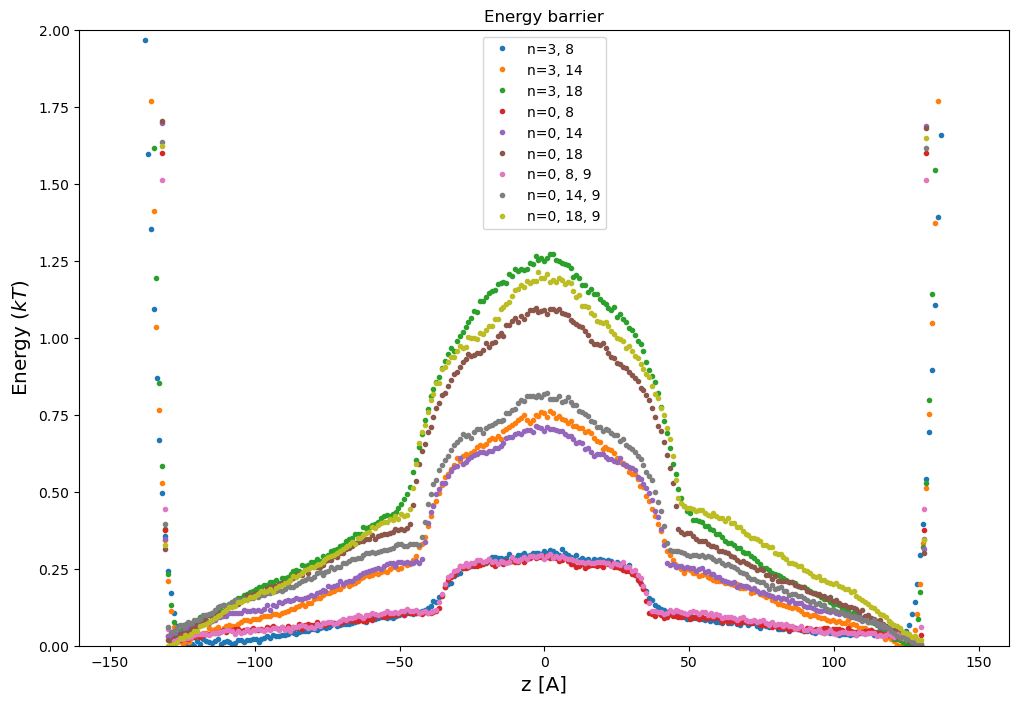

In [28]:
# def plot(data,mol_size):
#     x,y,z = data[:,0],data[:,1],data[:,2]
#     z_min = np.min(z)
#     z_max = np.max(z)
#     x_for_plot = np.linspace(np.floor(z_min),np.ceil(z_max),int(np.ceil(z_max)-np.floor(z_min)))
#     hist = np.histogram(z,bins=x_for_plot )[0]
#     x_for_plot = np.linspace(np.floor(z_min),np.ceil(z_max),len(hist))
#     print(min(hist))
#     sd = hist / hist.sum()
#     print(min(sd))
#     en = -np.log(sd) * 0.593
#     print(min(en))
#     en = en - np.min(en)
#     print(min(en))
#     plt.figure(figsize=(12, 8))
#     plt.plot(x_for_plot,en,".")
#     plt.xlabel("z [A]", fontsize='x-large')
#     plt.ylabel("Energy ($kT$)", fontsize='x-large')
#     if mol_size == mol_size_r_8:
#         plt.title("Energy barrier for n=3 Mol radius = {mol_size}[A]".format(mol_size=8))
#     elif mol_size == mol_size_r_14:
#         plt.title("Energy barrier for n=3 Mol radius = {mol_size}[A]".format(mol_size=14))
#     elif mol_size == mol_size_r_20:
#         plt.title("Energy barrier for n=3 Mol radius = {mol_size}[A]".format(mol_size=20))
#     #show only y = 2
#     plt.ylim(0,2)
#     plt.show()
# for mol_size in [mol_size_r_8,mol_size_r_14,mol_size_r_20]:
#     plot(data = get_cord_only_in_radius(n_3_6000_all[:,mol_size,:],radius=90)
#     ,mol_size=mol_size)
#
#
mol_size_r_8 = [i for i in range(1,5)]
mol_size_r_10 = [i for i in range(6,10)]
mol_size_r_12 = [i for i in range(11,15)]
mol_size_r_14 = [i for i in range(16,20)]
mol_size_r_16 = [i for i in range(21,25)]
mol_size_r_18 = [i for i in range(26,30)]
mol_size_r_20 = [i for i in range(31,35)]

def plot(datas, labels):
    plt.figure(figsize=(12, 8))

    for data, label in zip(datas, labels):
        x, y, z = data[:,0], data[:,1], data[:,2]
        z_min = np.min(z)
        z_max = np.max(z)
        x_for_plot = np.linspace(np.floor(z_min), np.ceil(z_max), int(np.ceil(z_max) - np.floor(z_min)))
        hist = np.histogram(z, bins=x_for_plot)[0]
        x_for_plot = np.linspace(np.floor(z_min), np.ceil(z_max), len(hist))

        sd = hist / hist.sum()
        en = -np.log(sd) * 0.593
        en = en - np.min(en)

        plt.plot(x_for_plot, en, ".", label=label)

    plt.xlabel("z [A]", fontsize='x-large')
    plt.ylabel("Energy ($kT$)", fontsize='x-large')

    plt.title("Energy barrier")


    plt.ylim(0, 2)
    plt.legend()
    plt.show()

lists_to_concatenate = [get_cord_only_in_radius(n_3_6000_all[:,index,:],radius=90) for index in mol_size_r_8]
n_3_8 = np.concatenate(lists_to_concatenate)
lists_to_concatenate = [get_cord_only_in_radius(n_3_6000_all[:,index,:],radius=90) for index in mol_size_r_14]
n_3_14 = np.concatenate(lists_to_concatenate)
lists_to_concatenate = [get_cord_only_in_radius(n_3_6000_all[:,index,:],radius=90) for index in mol_size_r_18]
n_3_20 = np.concatenate(lists_to_concatenate)

lists_to_concatenate = [get_cord_only_in_radius(n_0_6000_all[:,index,:],radius=90) for index in mol_size_r_8]
n_0_8 = np.concatenate(lists_to_concatenate)
lists_to_concatenate = [get_cord_only_in_radius(n_0_6000_all[:,index,:],radius=90) for index in mol_size_r_14]
n_0_14 = np.concatenate(lists_to_concatenate)
lists_to_concatenate = [get_cord_only_in_radius(n_0_6000_all[:,index,:],radius=90) for index in mol_size_r_18]
n_0_20 = np.concatenate(lists_to_concatenate)


lists_to_concatenate = [get_cord_only_in_radius(n_0_9000_all[:,index,:],radius=90) for index in mol_size_r_8]
n_0_8_9 = np.concatenate(lists_to_concatenate)
lists_to_concatenate = [get_cord_only_in_radius(n_0_9000_all[:,index,:],radius=90) for index in mol_size_r_14]
n_0_14_9 = np.concatenate(lists_to_concatenate)
lists_to_concatenate = [get_cord_only_in_radius(n_0_9000_all[:,index,:],radius=90) for index in mol_size_r_18]
n_0_20_9 = np.concatenate(lists_to_concatenate)
x_for_plot = [n_3_8, n_3_14, n_3_20, n_0_8, n_0_14, n_0_20, n_0_8_9, n_0_14_9, n_0_20_9]
labels = ["n=3, 8", "n=3, 14", "n=3, 18", "n=0, 8", "n=0, 14", "n=0, 18", "n=0, 8, 9", "n=0, 14, 9", "n=0, 18, 9"]
# x_for_plot = [get_cord_only_in_radius(n_3_6000_all[:,mol_size_r_8,:],radius=90), get_cord_only_in_radius(n_3_6000_all[:,mol_size_r_14,:],radius=90), get_cord_only_in_radius(n_3_6000_all[:,mol_size_r_20,:],radius=90),]+[get_cord_only_in_radius(n_2_6000_all[:,mol_size_r_8,:],radius=90), get_cord_only_in_radius(n_2_6000_all[:,mol_size_r_14,:],radius=90), get_cord_only_in_radius(n_2_6000_all[:,mol_size_r_20,:],radius=90)]+[get_cord_only_in_radius(n_1_6000_all[:,mol_size_r_8,:],radius=90), get_cord_only_in_radius(n_1_6000_all[:,mol_size_r_14,:],radius=90), get_cord_only_in_radius(n_1_6000_all[:,mol_size_r_20,:],radius=90)]+[get_cord_only_in_radius(n_0_6000_all[:,mol_size_r_8,:],radius=90), get_cord_only_in_radius(n_0_6000_all[:,mol_size_r_14,:],radius=90), get_cord_only_in_radius(n_0_6000_all[:,mol_size_r_20,:],radius=90)]
#
# labels = ["n=3, 8", "n=3, 14", "n=3, 20", "n=2, 8", "n=2, 14", "n=2, 20", "n=1, 8", "n=1, 14", "n=1, 20", "n=0, 8", "n=0, 14", "n=0, 20"]

plot(x_for_plot, labels)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79


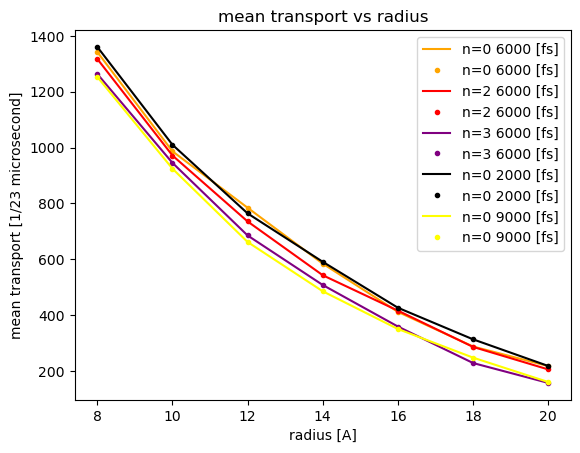

In [29]:

transport_n_0_9000  = []
transport_n_0_6000 = []
transport_n_1_6000 = []
transport_n_2_6000 = []
transport_n_3_6000 = []
transport_n_0_2000  = []
# transport_n_4_3000 = []
r=transport_n_3 = []
dir_name = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/"
for i in range (0,80):
    file_2=dir_name+"radius_v1_{run_num}_0_6000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_00_6000= pickle.load(f)
    # file_2 = "/cs/usr/reshem/Desktop/Link to MSBD_IMP/NPC_data_half_v6/radius_v1_{run_num}_1_6000.0_.pkl".format(run_num=i+1)
    file_2=dir_name+"radius_v1_{run_num}_1_6000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_11_6000= pickle.load(f)
    # file_2 = "/cs/usr/reshem/Desktop/Link to MSBD_IMP/NPC_data_half_v6/radius_v1_{run_num}_2_6000.0_.pkl".format(run_num=i+1)
    file_2=dir_name+"radius_v1_{run_num}_2_6000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_22_6000= pickle.load(f)
    # file_2 = "/cs/usr/reshem/Desktop/Link to MSBD_IMP/NPC_data_half_v6/radius_v1_{run_num}_3_6000.0_.pkl".format(run_num=i+1)
    file_2=dir_name+"radius_v1_{run_num}_3_6000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_33_6000= pickle.load(f)
    file_2=dir_name+"radius_v1_{run_num}_0_9000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_00_9000= pickle.load(f)
    file_2=dir_name+"radius_v1_{run_num}_0_2000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_00_2000= pickle.load(f)
    # file_2=dir_name+"radius_v1_{run_num}_4_3000.0_.pkl".format(run_num=i)
    # with open(file_2, 'rb') as f:
    #     x_n_44_3000= pickle.load(f)


    sim_time_00_6000 =x_n_00_6000["total_sim_time"]
    sim_time_00_9000 =x_n_00_9000["total_sim_time"]
    # sim_time_n_4_3000 =x_n_44_3000["total_sim_time"]
    sim_time_n_3_6000 =x_n_33_6000["total_sim_time"]
    # print("sim_time_00_6000",sim_time_00_6000)
    # print("sim_time_00_9000",sim_time_00_9000)
    # # print("sim_time_n_4_3000",sim_time_n_4_3000)
    # print("sim_time_n_3_6000",sim_time_n_3_6000)
    print(i)

    radius = sorted(x_n_00_6000["combined_dict"].keys())
    transport = [x_n_00_6000["combined_dict"][r]for r in radius]
    transport_n_0_6000.append(transport)

    # radius = sorted(x_n_00_9000["combined_dict"].keys())
    # transport = [x_n_00_9000["combined_dict"][r]for r in radius]
    # plot_transport_vs_radius(radius, transport," n=0 9000 [fs]")
    # transport_n_0_9000.append(transport)

    radius = sorted(x_n_11_6000["combined_dict"].keys())
    transport = [x_n_11_6000["combined_dict"][r]for r in radius]
    transport_n_1_6000.append(transport)

    radius = sorted(x_n_22_6000["combined_dict"].keys())
    transport = [x_n_22_6000["combined_dict"][r]for r in radius]
    transport_n_2_6000.append(transport)

    ratio = sim_time_00_6000 / sim_time_n_3_6000
    # print(ratio, "ratio")
    radius = sorted(x_n_33_6000["combined_dict"].keys())
    transport = [x_n_33_6000["combined_dict"][r]*ratio for r in radius]
    transport_n_3_6000.append(transport)

    radius = sorted(x_n_00_2000["combined_dict"].keys())
    transport = [x_n_00_2000["combined_dict"][r]for r in radius]
    transport_n_0_2000.append(transport)

    # ratio= sim_time_00_6000 / sim_time_n_4_3000
    # radius = sorted(x_n_44_3000["combined_dict"].keys())
    # transport = [x_n_44_3000["combined_dict"][r]*ratio for r in radius]
    # transport_n_4_3000.append(transport)

    ratio = sim_time_00_6000 / sim_time_00_9000
    radius = sorted(x_n_00_9000["combined_dict"].keys())
    transport = [x_n_00_9000["combined_dict"][r]*ratio for r in radius]
    transport_n_0_9000.append(transport)

#plot the mean values of the transport as a finction of the radius

all_transport_n_0_6000 = [np.mean(np.array(transport_n_0_6000)[:,i]) for i in range(7)]
all_transport_n_1_6000 = [np.mean(np.array(transport_n_1_6000)[:,i]) for i in range(7)]
all_transport_n_2_6000 = [np.mean(np.array(transport_n_2_6000)[:,i]) for i in range(7)]
all_transport_n_3_6000 = [np.mean(np.array(transport_n_3_6000)[:,i]) for i in range(7)]
all_transport_n_0_2000 = [np.mean(np.array(transport_n_0_2000)[:,i]) for i in range(7)]



# all_transport_n_4_3000 = [np.mean(np.array(transport_n_4_3000)[:,i]) for i in range(7)]
all_transport_n_0_9000 = [np.mean(np.array(transport_n_0_9000)[:,i]) for i in range(7)]


# plt.plot(radius,all_transport_n_0_9000,label="n=0 9000 [fs]")
plt.plot(radius,all_transport_n_0_6000,label="n=0 6000 [fs]",color="orange")
plt.plot(radius,all_transport_n_0_6000,".",label="n=0 6000 [fs]",color="orange")
# plt.plot(radius,all_transport_n_1_6000,label="n=1 6000 [fs]",color="green")
plt.plot(radius,all_transport_n_2_6000,label="n=2 6000 [fs]",color="red")
plt.plot(radius,all_transport_n_2_6000,".",label="n=2 6000 [fs]",color="red")
plt.plot(radius,all_transport_n_3_6000,label="n=3 6000 [fs]",color="purple")
plt.plot(radius,all_transport_n_3_6000,".",label="n=3 6000 [fs]",color="purple")
plt.plot(radius,all_transport_n_0_2000,label="n=0 2000 [fs]",color="black")
plt.plot(radius,all_transport_n_0_2000,".",label="n=0 2000 [fs]",color="black")
# plt.plot(radius,all_transport_n_4_3000,label="n=4 3000 [fs]",color="blue")
plt.plot(radius,all_transport_n_0_9000,label="n=0 9000 [fs]",color="yellow")
plt.plot(radius,all_transport_n_0_9000,".",label="n=0 9000 [fs]",color="yellow")

plt.legend()
plt.xlabel("radius [A]")
plt.ylabel("mean transport [1/23 microsecond]")
plt.title("mean transport vs radius")


plt.show()





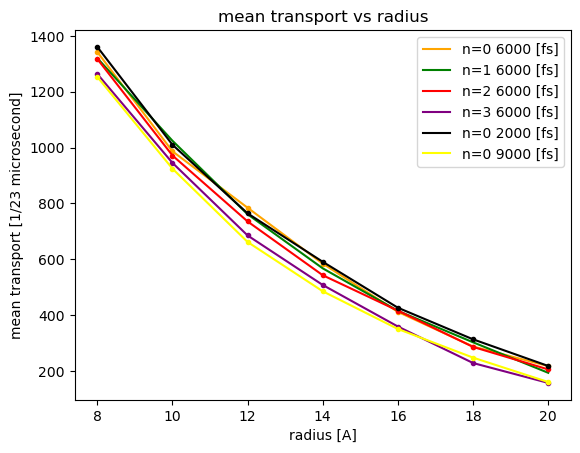

In [30]:

# plt.plot(radius,all_transport_n_0_9000,label="n=0 9000 [fs]")
plt.plot(radius,all_transport_n_0_6000,label="n=0 6000 [fs]",color="orange")
plt.plot(radius,all_transport_n_0_6000,".",color="orange")
plt.plot(radius,all_transport_n_1_6000,label="n=1 6000 [fs]",color="green")
plt.plot(radius,all_transport_n_2_6000,label="n=2 6000 [fs]",color="red")
plt.plot(radius,all_transport_n_2_6000,".",color="red")
plt.plot(radius,all_transport_n_3_6000,label="n=3 6000 [fs]",color="purple")
plt.plot(radius,all_transport_n_3_6000,".",color="purple")
plt.plot(radius,all_transport_n_0_2000,label="n=0 2000 [fs]",color="black")
plt.plot(radius,all_transport_n_0_2000,".",color="black")
# plt.plot(radius,all_transport_n_4_3000,label="n=4 3000 [fs]",color="blue")
plt.plot(radius,all_transport_n_0_9000,label="n=0 9000 [fs]",color="yellow")
plt.plot(radius,all_transport_n_0_9000,".",color="yellow")

plt.legend()
plt.xlabel("radius [A]")
plt.ylabel("mean transport [1/23 microsecond]")
plt.title("mean transport vs radius")


plt.show()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
[    0     0     0     2     2     5    14    35    85   162   358   698
  1244  2330  3536  5548  7999 11315 15007 19161 22915 26264 29298 31473
 33292 34353 34901 35198 34908 35235 34448 34792 34074 34307 34438 34693
 34361 33977 34499 34433 34245 34567 34737 34525 34356 34246 34382 34274
 34057 33793 34169 34573 34056 33987 33913 33963 33663 34032 33580 33749
 33640 33573 33311 33286 33059 33218 33187 32909 32844 32695 32518 32560
 32720 31980 32497 32285 31924 31694 31784 31863 31751 31459 31777 31502
 31063 30924 30691 30975 30949 30616 30463 30490 30404 30339 30374 30355
 30260 30503 30086 30197 29832 29707 29791 29644 29658 29781 29326 29349
 29085 28720 28502 27700 27762 27404 26884 25632 25273 24741 24127 23667
 23619 23136 22762 22595 22612 22505 220

/tmp/ipykernel_1705044/1866765063.py:204: RuntimeWarning: divide by zero encountered in log
  en = -np.log(sd) * 0.593


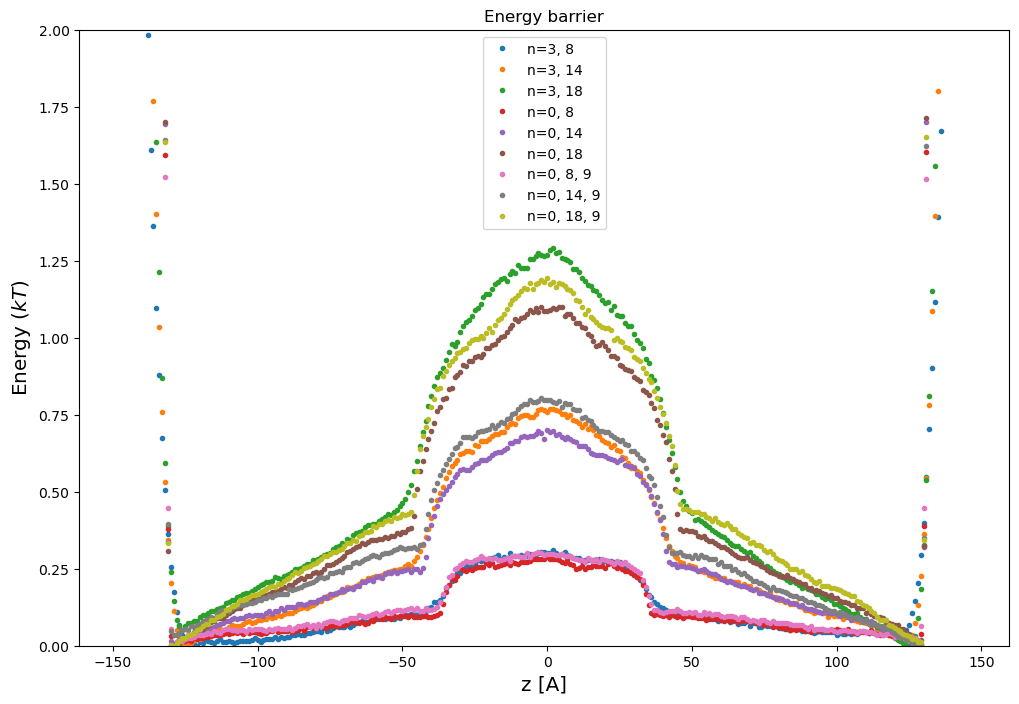

In [31]:
mol_size_r_8 = [i for i in range(1,5)]
mol_size_r_10 = [i for i in range(6,10)]
mol_size_r_12 = [i for i in range(11,15)]
mol_size_r_14 = [i for i in range(16,20)]
mol_size_r_16 = [i for i in range(21,25)]
mol_size_r_18 = [i for i in range(26,30)]
mol_size_r_20 = [i for i in range(31,35)]
n_3_6000_8,n_3_6000_14,n_3_6000_20,n_0_6000_8,n_0_6000_14,n_0_6000_20,n_0_9000_8,n_0_9000_14,n_0_9000_20 = [],[],[],[],[],[],[],[],[]
# sizes=[8,10,12,14,16,18,20]
# for j,mol_size in enumerate([mol_size_r_8,mol_size_r_10,mol_size_r_12,mol_size_r_14,mol_size_r_16,mol_size_r_18,mol_size_r_20]):
#     z_cord =2
#
#     # mol_size = mol_size_r_8
#     ws_n0,ws_n1,ws_n2,ws_n3 = [],[],[],[]
#     n_0_6000,n_0_9000,n_1_6000,n_2_6000,n_3_6000,n_0_mean,n_1_mean,n_2_mean,n_3_mean,n_4_mean = [],[],[],[],[],[],[],[],[],[]
for i in range (80):
    print(i)
    file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_6000.0_.pkl".format(run_num=i+1)
    with open(file_2, 'rb') as f:
        x_n_00_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_1_6000.0_.pkl".format(run_num=i+1)
    with open(file_2, 'rb') as f:
        x_n_11_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_2_6000.0_.pkl".format(run_num=i+1)
    with open(file_2, 'rb') as f:
        x_n_22_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_3_6000.0_.pkl".format(run_num=i+1)
    with open(file_2, 'rb') as f:
        x_n_33_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_9000.0_.pkl".format(run_num=i+1)
    with open(file_2, 'rb') as f:
        x_n_00_9000= pickle.load(f)["location_of_all_diffuse_particles"]
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_6000.0_.pkl".format(run_num=i+2)
    # with open(file_2, 'rb') as f:
    #     x_n_000_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_9000.0_.pkl".format(run_num=i+1)
    with open(file_2, 'rb') as f:
        x_n_00_9000= pickle.load(f)["location_of_all_diffuse_particles"]



    lists_to_concatenate = [get_cord_only_in_radius(x_n_33_6000[:,index,:],radius=90) for index in mol_size_r_8]
    data = np.concatenate(lists_to_concatenate)
    x, y, z = data[:,0], data[:,1], data[:,2]
        # Step 3: Clip the data
    clipped_data = np.clip(z, -150, 150)

    # Step 4: Define bin edges
    bin_edges = np.arange(-150, 152, 1)

    # Step 5: Create histogram
    hist_counts, hist_edges = np.histogram(clipped_data, bins=bin_edges)

    n_3_6000_8.append(hist_counts)

    lists_to_concatenate = [get_cord_only_in_radius(x_n_33_6000[:,index,:],radius=90) for index in mol_size_r_14]
    data = np.concatenate(lists_to_concatenate)
    x, y, z = data[:,0], data[:,1], data[:,2]

    clipped_data = np.clip(z, -150, 150)

    # Step 4: Define bin edges
    bin_edges = np.arange(-150, 152, 1)

    # Step 5: Create histogram
    hist_counts, hist_edges = np.histogram(clipped_data, bins=bin_edges)

    n_3_6000_14.append(hist_counts)
    # n_3_6000_14.append(np.histogram(z,bins=250)[0])

    lists_to_concatenate = [get_cord_only_in_radius(x_n_33_6000[:,index,:],radius=90) for index in mol_size_r_18]
    data = np.concatenate(lists_to_concatenate)
    x, y, z = data[:,0], data[:,1], data[:,2]
                # Step 3: Clip the data
    clipped_data = np.clip(z, -150, 150)

    # Step 4: Define bin edges
    bin_edges = np.arange(-150, 152, 1)

    # Step 5: Create histogram
    hist_counts, hist_edges = np.histogram(clipped_data, bins=bin_edges)

    n_3_6000_20.append(hist_counts)

    # n_3_6000_20.append(np.histogram(z,bins=250)[0])



    # counts, bin_edges = np.histogram(n_3_20, bins=250)
    #
    # # Plot the histogram using the counts with the 'weights' parameter
    # plt.hist(bin_edges[:-1], bins=bin_edges, weights=counts, alpha=0.7, color='blue', edgecolor='black')
    #
    # plt.xlabel('Value')
    # plt.ylabel('Frequency')
    # plt.title('Histogram of n_3_20 with 250 bins')
    #
    # # Show the plot
    # plt.show()


    lists_to_concatenate = [get_cord_only_in_radius(x_n_00_6000[:,index,:],radius=90) for index in mol_size_r_8]
    data = np.concatenate(lists_to_concatenate)
    x, y, z = data[:,0], data[:,1], data[:,2]
    # Step 3: Clip the data
    clipped_data = np.clip(z, -150, 150)

    # Step 4: Define bin edges
    bin_edges = np.arange(-150, 152, 1)  # Adjust the step for different bin width if necessary

    # Step 5: Create histogram
    hist_counts, hist_edges = np.histogram(clipped_data, bins=bin_edges)
    n_0_6000_8.append(hist_counts)

    lists_to_concatenate = [get_cord_only_in_radius(x_n_00_6000[:,index,:],radius=90) for index in mol_size_r_14]
    data = np.concatenate(lists_to_concatenate)
    x, y, z = data[:,0], data[:,1], data[:,2]
            # Step 3: Clip the data
    clipped_data = np.clip(z, -150, 150)

    # Step 4: Define bin edges
    bin_edges = np.arange(-150, 152, 1)

    # Step 5: Create histogram
    hist_counts, hist_edges = np.histogram(clipped_data, bins=bin_edges)

    n_0_6000_14.append(hist_counts)
    # n_0_6000_14.append(np.histogram(z,bins=250)[0])

    lists_to_concatenate = [get_cord_only_in_radius(x_n_00_6000[:,index,:],radius=90) for index in mol_size_r_18]
    data = np.concatenate(lists_to_concatenate)
    x, y, z = data[:,0], data[:,1], data[:,2]
                # Step 3: Clip the data
    clipped_data = np.clip(z, -150, 150)

    # Step 4: Define bin edges
    bin_edges = np.arange(-150, 152, 1)
    # Step 5: Create histogram
    hist_counts, hist_edges = np.histogram(clipped_data, bins=bin_edges)

    n_0_6000_20.append(hist_counts)
    # n_0_6000_20.append(np.histogram(z,bins=250)[0])


    lists_to_concatenate = [get_cord_only_in_radius(x_n_00_9000[:,index,:],radius=90) for index in mol_size_r_8]
    data = np.concatenate(lists_to_concatenate)
    x, y, z = data[:,0], data[:,1], data[:,2]
                # Step 3: Clip the data
    clipped_data = np.clip(z, -150, 150)

    # Step 4: Define bin edges
    bin_edges = np.arange(-150, 152, 1)

    # Step 5: Create histogram
    hist_counts, hist_edges = np.histogram(clipped_data, bins=bin_edges)

    n_0_9000_8.append(hist_counts)
    # n_0_9000_8.append(np.histogram(z,bins=250)[0])

    lists_to_concatenate = [get_cord_only_in_radius(x_n_00_9000[:,index,:],radius=90) for index in mol_size_r_14]
    data = np.concatenate(lists_to_concatenate)
    x, y, z = data[:,0], data[:,1], data[:,2]

                    # Step 3: Clip the data
    clipped_data = np.clip(z, -150, 150)

    # Step 4: Define bin edges
    bin_edges = np.arange(-150, 152, 1)

    # Step 5: Create histogram
    hist_counts, hist_edges = np.histogram(clipped_data, bins=bin_edges)

    n_0_9000_14.append(hist_counts)
    # n_0_9000_14.append(np.histogram(z,bins=250)[0])

    lists_to_concatenate = [get_cord_only_in_radius(x_n_00_9000[:,index,:],radius=90) for index in mol_size_r_18]
    data = np.concatenate(lists_to_concatenate)
    x, y, z = data[:,0], data[:,1], data[:,2]
                        # Step 3: Clip the data
    clipped_data = np.clip(z, -150, 150)

    # Step 4: Define bin edges
    bin_edges = np.arange(-150, 152, 1)

    # Step 5: Create histogram
    hist_counts, hist_edges = np.histogram(clipped_data, bins=bin_edges)

    n_0_9000_20.append(hist_counts)
    # n_0_9000_20.append(np.histogram(z,bins=250)[0])

    # n_0_6000.append(np.histogram(get_cord_only_in_radius(x_n_00_6000["location_of_all_diffuse_particles"][:,mol_size,:])[:,z_cord],bins=250)[0])


def plot(datas, labels):
    plt.figure(figsize=(12, 8))

    for data, label in zip(datas, labels):

        hist = np.sum(data, axis=0)
        print(hist)
        x_for_plot = np.linspace(-150, 150, len(hist))

        sd = hist / hist.sum()
        en = -np.log(sd) * 0.593
        en = en - np.min(en)

        plt.plot(x_for_plot, en, ".", label=label)
        # plt.plot(x_for_plot, hist, label=label)

    plt.xlabel("z [A]", fontsize='x-large')
    plt.ylabel("Energy ($kT$)", fontsize='x-large')

    plt.title("Energy barrier")


    plt.ylim(0, 2)
    plt.legend()
    plt.show()
        # n_0_6000.append(np.histogram(get_cord_only_in_radius(x_n_00_6000["location_of_all_diffuse_particles"][:,mol_size,:])[:,z_cord],bins=250)[0])
        #
        # n_1_6000.append(np.histogram(get_cord_only_in_radius(x_n_11_6000["location_of_all_diffuse_particles"][:,mol_size,:])[:,z_cord],bins=250)[0])
        # n_2_6000.append(np.histogram(get_cord_only_in_radius(x_n_22_6000["location_of_all_diffuse_particles"][:,mol_size,:])[:,z_cord],bins=250)[0])
        # n_3_6000.append(np.histogram(get_cord_only_in_radius(x_n_33_6000["location_of_all_diffuse_particles"][:,mol_size,:])[:,z_cord],bins=250)[0])



    #
    # # plt.hist(x_n_00_6000["location_of_all_diffuse_particles"][:,mol_size,z_cord],bins=100)
    # # plt.title("Mol radius = {mol_size}[A]".format(mol_size=sizes[j]))
    # # plt.show()
    # # plt.hist(x_n_33_6000["location_of_all_diffuse_particles"][:,mol_size,z_cord],bins=100)
    # # plt.title("Mol radius = {mol_size}[A]".format(mol_size=sizes[j]))
    # # plt.show()
    # #plot the avg of the histogram
    # plt.plot(np.mean(n_0_6000,axis=0),label="n=0")
    # plt.plot(np.mean(n_1_6000,axis=0),label="n=1")
    # plt.plot(np.mean(n_2_6000,axis=0),label="n=2")
    # plt.plot(np.mean(n_3_6000,axis=0),label="n=3")
    # plt.ylabel("Mean number of counts")
    # plt.xlabel("Z [A]")
    # plt.legend()
    #
    # #add std as a shaded area
    # # plt.fill_between(range(250),np.mean(n_0_6000,axis=0)-np.std(n_0_6000,axis=0),np.mean(n_0_6000,axis=0)+np.std(n_0_6000,axis=0),alpha=0.3)
    # # plt.fill_between(range(250),np.mean(n_1_6000,axis=0)-np.std(n_1_6000,axis=0),np.mean(n_1_6000,axis=0)+np.std(n_1_6000,axis=0),alpha=0.3)
    # # plt.fill_between(range(250),np.mean(n_2_6000,axis=0)-np.std(n_2_6000,axis=0),np.mean(n_2_6000,axis=0)+np.std(n_2_6000,axis=0),alpha=0.3)
    # # plt.fill_between(range(250),np.mean(n_3_6000,axis=0)-np.std(n_3_6000,axis=0),np.mean(n_3_6000,axis=0)+np.std(n_3_6000,axis=0),alpha=0.3)
    # plt.title("Mol radius = {mol_size}[A]".format(mol_size=sizes[j]))
    # plt.show()
x_for_plot = [n_3_6000_8, n_3_6000_14, n_3_6000_20, n_0_6000_8, n_0_6000_14, n_0_6000_20, n_0_9000_8, n_0_9000_14, n_0_9000_20]
labels = ["n=3, 8", "n=3, 14", "n=3, 18", "n=0, 8", "n=0, 14", "n=0, 18", "n=0, 8, 9", "n=0, 14, 9", "n=0, 18, 9"]


plot(x_for_plot, labels)

In [32]:
n_0_6000_all = []
n_3_6000_all = []
n_0_9000_all = []
n_0_2000_all = []
n_4_3000_all = []
n_0_3000_all = []
for i in range (81):
    file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_6000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_00_6000= pickle.load(f)
    n_0_6000_all.append(x_n_00_6000["location_of_all_diffuse_particles"])
    file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_3_6000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_00_6000= pickle.load(f)
    n_3_6000_all.append(x_n_00_6000["location_of_all_diffuse_particles"])
    file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_9000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_00_9000= pickle.load(f)
    n_0_9000_all.append(x_n_00_9000["location_of_all_diffuse_particles"])
    file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_2000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_00_2000= pickle.load(f)
    n_0_2000_all.append(x_n_00_2000["location_of_all_diffuse_particles"])
    file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_4_3000.0_.pkl".format(run_num=i)
    # with open(file_2, 'rb') as f:
    #     x_n_00_3000= pickle.load(f)
    # n_4_3000_all.append(x_n_00_3000["location_of_all_diffuse_particles"])
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_3_3000.0_.pkl".format(run_num=i)
    # with open(file_2, 'rb') as f:
    #     x_n_33_3000= pickle.load(f)
    # n_3_3000_all.append(x_n_33_3000["location_of_all_diffuse_particles"])
    # # with open(file_2, 'rb') as f:

    #     x_n_00_3000= pickle.load(f)
    # n_0_3000_all.append(x_n_00_3000["location_of_all_diffuse_particles"])


In [33]:
n_0_6000_all = np.concatenate(n_0_6000_all)
n_3_6000_all = np.concatenate(n_3_6000_all)
n_0_9000_all = np.concatenate(n_0_9000_all)
n_0_2000_all = np.concatenate(n_0_2000_all)
# n_4_3000_all = np.concatenate(n_4_3000_all)


In [34]:
n_0_6000_all.shape
mol_size_r_14

[16, 17, 18, 19]

In [35]:
# file = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_20_0_6000.0_.pkl"
# with open(file, 'rb') as f:
#     x_n_00_6000= pickle.load(f)
# for mol_size in [mol_size_r_8,mol_size_r_14,mol_size_r_20]:
#     # x,y,z,r = get_cord_x_y_z_r(x_n_00_6000["location_of_all_diffuse_particles"][:,mol_size,:])
#     x,y,z,r = get_cord_x_y_z_r(n_0_6000_all[:,mol_size,:])
#     print(f"Mol size is {8 if mol_size==1 else 20}")
#     print(f"Max x is {max(x)}")
#     print(f"Max y is {max(y)}")
#     print(f"Max z is {max(z)}")
#     print(f"Max r is {max(r)}")
#     print(f"Min x is {min(x)}")
#     print(f"Min y is {min(y)}")
#     print(f"Min z is {min(z)}")
#     print(f"Min r is {min(r)}")
#     for x0,y0,r0 in zip(x,y,r):
#         assert(np.isclose(np.sqrt(x0**2+y0**2), r0, atol=1e-08))
#     r_max = np.max(r)
#     z_max = np.max(z)
#     z_min = np.min(z)
#     assert(np.min(r)>=0)
#     # set r_edges to run from 0 to r_max rounded up to a multiple of 10, with intervals of 1
#     r_edges = np.linspace(0, np.ceil(r_max), int(np.ceil(r_max)+1))
#     # set z_edges to run from z_min to z_max rounded up to a multiple of 10, with intervals of 1
# #    z_edges = np.linspace(np.floor(z_min), np.ceil(z_max), int(np.ceil(z_max-z_min))+1)
# #     z_edges = np.linspace(-135, 135, 271)
#     z_edges = np.linspace(np.floor(z_min), np.ceil(z_max), int(np.ceil(z_max-z_min))+1)
#     # compute 2d historgram using r_edges and z_edges
#     hist, r_edges_new, z_edges_new = np.histogram2d(r, z, bins=[r_edges, z_edges])
#     assert(np.all(r_edges_new == r_edges))
#     assert(np.all(z_edges_new == z_edges))
#     # print("R edges are:")
#     # print(r_edges)
#     # print("Z edges are:")
#     # print(z_edges)
#     plt.figure(figsize=(12, 8))
#     plt.contourf(hist.T,
#                  levels=30, cmap='RdYlBu_r')
#     plt.xlabel("r [A]", fontsize='x-large')
#     xticks = range(0, len(r_edges), 10)
#     xticklabels = [int(r_edges[i]) for i in xticks]
#     plt.xticks(xticks, xticklabels)
#     plt.ylabel("z [A]", fontsize='x-large')
#     yticks = range(0, len(z_edges), 10)
#     yticklabels = [int(z_edges[i]) for i in yticks]
#     plt.yticks(yticks, yticklabels)
#     plt.colorbar().set_label(label='pdf1', size='x-large')
#     if mol_size == mol_size_r_8:
#         plt.title("n=0 Mol radius = {mol_size}[A]".format(mol_size=8))
#     elif mol_size == mol_size_r_14:
#         plt.title("n=0 Mol radius = {mol_size}[A]".format(mol_size=14))
#     elif mol_size == mol_size_r_20:
#         plt.title("n=0 Mol radius = {mol_size}[A]".format(mol_size=20))
#     plt.show()
#     #dived by r
#     # from r_edges create an array (185,270) where each row is the same as r_edges
#     r_edges_2d = np.tile(r_edges[1:], (len(z_edges)-1, 1)).T
#     hist_normalized_by_r = (hist+0.) / r_edges_2d
#     hist_normalized_by_r = (hist+1) / r_edges_2d
#     # hist_normalized_by_r = (hist+1) / (r_edges[1:])
#
#
#     sd = hist_normalized_by_r / hist_normalized_by_r.sum()
#     en = -np.log(sd) * 0.593
#     en = en - np.min(en)
#     plt.figure(figsize=(12, 8))
#     plt.contourf(en.T,
#                  levels=30, cmap='RdYlBu_r')
#     plt.xlabel("x [A]", fontsize='x-large')
#     xticks = range(0, len(r_edges), 10)
#     xticklabels = [int(r_edges[i]) for i in xticks]
#     plt.xticks(xticks, xticklabels)
#     plt.ylabel("z [A]", fontsize='x-large')
#     yticks = range(0, len(z_edges), 10)
#     yticklabels = [int(z_edges[i]) for i in yticks]
#     plt.yticks(yticks, yticklabels)
#     plt.colorbar().set_label(label='Energy ($kT$)', size='x-large')
#     plt.show()

In [36]:

# for mol_size in [mol_size_r_8,mol_size_r_14,mol_size_r_20]:
#     # x,y,z,r = get_cord_x_y_z_r(x_n_00_6000["location_of_all_diffuse_particles"][:,mol_size,:])
#     x,y,z,r = get_cord_x_y_z_r(n_3_6000_all[:,mol_size,:])
#     print(f"Mol size is {8 if mol_size==1 else 20}")
#     print(f"Max x is {max(x)}")
#     print(f"Max y is {max(y)}")
#     print(f"Max z is {max(z)}")
#     print(f"Max r is {max(r)}")
#     print(f"Min x is {min(x)}")
#     print(f"Min y is {min(y)}")
#     print(f"Min z is {min(z)}")
#     print(f"Min r is {min(r)}")
#     for x0,y0,r0 in zip(x,y,r):
#         assert(np.isclose(np.sqrt(x0**2+y0**2), r0, atol=1e-08))
#     r_max = np.max(r)
#     z_max = np.max(z)
#     z_min = np.min(z)
#     assert(np.min(r)>=0)
#     # set r_edges to run from 0 to r_max rounded up to a multiple of 10, with intervals of 1
#     r_edges = np.linspace(0, np.ceil(r_max), int(np.ceil(r_max)+1))
#     # set z_edges to run from z_min to z_max rounded up to a multiple of 10, with intervals of 1
# #    z_edges = np.linspace(np.floor(z_min), np.ceil(z_max), int(np.ceil(z_max-z_min))+1)
# #     z_edges = np.linspace(-135, 135, 271)
#     z_edges = np.linspace(np.floor(z_min), np.ceil(z_max), int(np.ceil(z_max-z_min))+1)
#
#     # compute 2d historgram using r_edges and z_edges
#     hist, r_edges_new, z_edges_new = np.histogram2d(r, z, bins=[r_edges, z_edges])
#     assert(np.all(r_edges_new == r_edges))
#     assert(np.all(z_edges_new == z_edges))
#     plt.figure(figsize=(12, 8))
#     plt.contourf(hist.T,
#                  levels=30, cmap='RdYlBu_r')
#     plt.xlabel("r [A]", fontsize='x-large')
#     xticks = range(0, len(r_edges), 10)
#     xticklabels = [int(r_edges[i]) for i in xticks]
#     plt.xticks(xticks, xticklabels)
#     plt.ylabel("z [A]", fontsize='x-large')
#     yticks = range(0, len(z_edges), 10)
#     yticklabels = [int(z_edges[i]) for i in yticks]
#     plt.yticks(yticks, yticklabels)
#     plt.colorbar().set_label(label='pdf1', size='x-large')
#     if mol_size == mol_size_r_8:
#         plt.title(" n=3 Mol radius = {mol_size}[A]".format(mol_size=8))
#     elif mol_size == mol_size_r_14:
#         plt.title("n=3 Mol radius = {mol_size}[A]".format(mol_size=14))
#     elif mol_size == mol_size_r_20:
#         plt.title("n=3 Mol radius = {mol_size}[A]".format(mol_size=20))
#     plt.show()
#     #dived by r
#     # from r_edges create an array (185,270) where each row is the same as r_edges
#     r_edges_2d = np.tile(r_edges[1:], (len(z_edges)-1, 1)).T
#     hist_normalized_by_r = (hist+0.) / r_edges_2d
#     hist_normalized_by_r = (hist+1) / r_edges_2d
#     # hist_normalized_by_r = (hist+1) / (r_edges[1:])
#
#
#     sd = hist_normalized_by_r / hist_normalized_by_r.sum()
#     en = -np.log(sd) * 0.593
#     en = en - np.min(en)
#     plt.figure(figsize=(12, 8))
#     plt.contourf(en.T,
#                  levels=30, cmap='RdYlBu_r')
#     plt.xlabel("x [A]", fontsize='x-large')
#     xticks = range(0, len(r_edges), 10)
#     xticklabels = [int(r_edges[i]) for i in xticks]
#     plt.xticks(xticks, xticklabels)
#     plt.ylabel("z [A]", fontsize='x-large')
#     yticks = range(0, len(z_edges), 10)
#     yticklabels = [int(z_edges[i]) for i in yticks]
#     plt.yticks(yticks, yticklabels)
#     plt.colorbar().set_label(label='Energy ($kT$)', size='x-large')
#     plt.show()

In [37]:

# def get_dg(en, r_edges, z_edges):
#     """ a his togram of x and z coordinates of particle in the system get the max energy of x 20 to 50 and z -20 to 20
#     """
#     #find the infexes that are in the value of 20 to 50 in r
#     x_20_50 = np.where((r_edges >= 20) & (r_edges <= 50))
#     #find the infexes that are in the value of -20 to 20 in z
#     z_20_50 = np.where((z_edges >= -20) & (z_edges <= 20))
#     #get en new from the indexes
#     en_new_npc = en[x_20_50[0][0]:x_20_50[0][-1], z_20_50[0][0]:z_20_50[0][-1]]
#
#     #find the infexes that are in the value of 80 to 120 in z
#     z_80_120 = np.where((z_edges >= 80) & (z_edges <= 120))
#     #get en new from the indexes
#     en_new_p = en[x_20_50[0][0]:x_20_50[0][-1], z_80_120[0][0]:z_80_120[0][-1]]
#
#     x_10_50 = np.where((r_edges >= 20) & (r_edges <= 50))
#
#     #get for each z value in z_20_50 sum over the values in that z and x_10_50
#
#     z_20_50 = np.where((z_edges >= -100) & (z_edges <= 100))
#
#     en_barrier= en[x_10_50[0][0]:x_10_50[0][-1], z_20_50[0][0]:z_20_50[0][-1]]
#     print(len(en_barrier))
#     sum_per_z = np.sum(en_barrier, axis=0)/len(en_barrier)
#     #plot the sum_per_z
#     z_edges = np.linspace(-100, 100, 199)
#
#     plt.plot(z_edges,sum_per_z,".")
#     # yticks = range(0, len(z_edges), 10)
#     # yticklabels = [int(z_edges[i]) for i in yticks]
#     print(z_edges)
#     #use the z_edges to plot the x_ticks convert 0 to 200 to -100 to 100
#     # xticks = range(0, len(z_edges), 20)
#     # xticklabels = [int(z_edges[i]) for i in xticks]
#     # plt.xticks(xticks, xticklabels)
#     #x labekl z in a
#     plt.xlabel("z [A]", fontsize='x-large')
#     plt.ylabel("Energy ($kT$)", fontsize='x-large')
#     plt.title("Energy barrier for n=3 Mol radius = {mol_size}[A]".format(mol_size=20))
#
#
#
#
#     plt.show()
#
#
#
#
#
#
#
#     # plt.figure(figsize=(12, 8))
#     # plt.contourf(en_new_npc.T,
#     #              levels=30, cmap='RdYlBu_r')
#     # plt.xlabel("x [A]", fontsize='x-large')
#     # xticks = range(0, len(r_edges), 10)
#     # xticklabels = [int(r_edges[i]) for i in xticks]
#     # plt.xticks(xticks, xticklabels)
#     # plt.ylabel("z [A]", fontsize='x-large')
#     # yticks = range(0, len(z_edges), 10)
#     # yticklabels = [int(z_edges[i]) for i in yticks]
#     # plt.yticks(yticks, yticklabels)
#     # plt.colorbar().set_label(label='Energy ($kT$)', size='x-large')
#     # plt.show()
#     return en_new_npc,en_new_p
# en_new_npc,en_new_p = get_dg(en,r_edges, z_edges)
# #print max energy that is not inf
# print(np.max(en_new_npc[np.isfinite(en_new_npc)]))
# print(np.min(en_new_p))

In [38]:
def plot(data,mol_size):
    x,y,z = data[:,0],data[:,1],data[:,2]
    z_min = np.min(z)
    z_max = np.max(z)
    x_for_plot = np.linspace(np.floor(z_min),np.ceil(z_max),int(np.ceil(z_max)-np.floor(z_min)))
    hist = np.histogram(z,bins=x_for_plot )[0]
    x_for_plot = np.linspace(np.floor(z_min),np.ceil(z_max),len(hist))
    print(min(hist))
    sd = hist / hist.sum()
    print(min(sd))
    en = -np.log(sd) * 0.593
    print(min(en))
    en = en - np.min(en)
    print(min(en))
    plt.figure(figsize=(12, 8))
    plt.plot(x_for_plot,en,".")
    plt.xlabel("z [A]", fontsize='x-large')
    plt.ylabel("Energy ($kT$)", fontsize='x-large')
    if mol_size == mol_size_r_8:
        plt.title("Energy barrier for n=3 Mol radius = {mol_size}[A]".format(mol_size=8))
    elif mol_size == mol_size_r_14:
        plt.title("Energy barrier for n=3 Mol radius = {mol_size}[A]".format(mol_size=14))
    elif mol_size == mol_size_r_20:
        plt.title("Energy barrier for n=3 Mol radius = {mol_size}[A]".format(mol_size=20))
    #show only y = 2
    plt.ylim(0,2)
    plt.show()
# for mol_size in [mol_size_r_8,mol_size_r_14,mol_size_r_20]:
#     plot(data = get_cord_only_in_radius(n_3_6000_all[:,mol_size,:],radius=90)
#     ,mol_size=mol_size)

In [39]:
def plot(data,mol_size):
    x,y,z = data[:,0],data[:,1],data[:,2]
    z_min = np.min(z)
    z_max = np.max(z)
    x_for_plot = np.linspace(np.floor(z_min),np.ceil(z_max),int(np.ceil(z_max)-np.floor(z_min)))
    hist = np.histogram(z,bins=x_for_plot )[0]
    x_for_plot = np.linspace(np.floor(z_min),np.ceil(z_max),len(hist))

    print(min(hist))
    sd = hist / hist.sum()
    print(min(sd))
    en = -np.log(sd) * 0.593
    print(min(en))
    en = en - np.min(en)
    print(min(en))
    plt.figure(figsize=(12, 8))
    plt.plot(x_for_plot,en,".")
    plt.xlabel("z [A]", fontsize='x-large')
    plt.ylabel("Energy ($kT$)", fontsize='x-large')
    if mol_size == mol_size_r_8:
        plt.title("Energy barrier for n=0 Mol radius = {mol_size}[A]".format(mol_size=8))
    elif mol_size == mol_size_r_14:
        plt.title("Energy barrier for n=0 Mol radius = {mol_size}[A]".format(mol_size=14))
    elif mol_size == mol_size_r_20:
        plt.title("Energy barrier for n=0 Mol radius = {mol_size}[A]".format(mol_size=20))
    plt.ylim(0,2)

    plt.show()
# for mol_size in [mol_size_r_8,mol_size_r_14,mol_size_r_20]:
#     plot(data = get_cord_only_in_radius(n_0_6000_all[:,mol_size,:],radius=90)
#     ,mol_size=mol_size)

In [40]:
# def plot(data,mol_size,n,basic_step_size):
#     x,y,z = data[:,0],data[:,1],data[:,2]
#     z_min = np.min(z)
#     z_max = np.max(z)
#     x_for_plot = np.linspace(np.floor(z_min),np.ceil(z_max),int(np.ceil(z_max)-np.floor(z_min)))
#     hist = np.histogram(z,bins=x_for_plot )[0]
#     x_for_plot = np.linspace(np.floor(z_min),np.ceil(z_max),len(hist))
#     print(min(hist))
#     sd = hist / hist.sum()
#     print(min(sd))
#     en = -np.log(sd) * 0.593
#     print(min(en))
#     en = en - np.min(en)
#     print(min(en))
#     plt.figure(figsize=(12, 8))
#     plt.plot(x_for_plot,en,".")
#     plt.xlabel("z [A]", fontsize='x-large')
#     plt.ylabel("Energy ($kT$)", fontsize='x-large')
#     if mol_size == mol_size_r_8:
#         plt.title("Energy barrier for dt={dt} n={n} Mol radius = {mol_size}[A]".format(mol_size=8,n=n,dt=basic_step_size))
#     elif mol_size == mol_size_r_14:
#         plt.title("Energy barrier for dt={dt} n={n} Mol radius = {mol_size}[A]".format(mol_size=14,n=n,dt=basic_step_size))
#     elif mol_size == mol_size_r_20:
#         plt.title("Energy barrier for dt={dt} n={n} Mol radius = {mol_size}[A]".format(mol_size=20,n=n,dt=basic_step_size))
#     #show only y = 2
#     plt.ylim(0,2)
#     plt.show()
# # for mol_size in [mol_size_r_8,mol_size_r_14,mol_size_r_20]:
# for mol_size in [mol_size_r_14]:
#     plot(data = get_cord_only_in_radius(n_3_6000_all[:,mol_size,:],radius=90)
#     ,mol_size=mol_size,n=3,basic_step_size=6000)
#     plot(data = get_cord_only_in_radius(n_0_2000_all[:,mol_size,:],radius=90)
#     ,mol_size=mol_size,n=0,basic_step_size=2000)
#     # plot(data = get_cord_only_in_radius(n_4_3000_all[:,mol_size,:],radius=90)
#     # ,mol_size=mol_size,n=4,basic_step_size=3000)
#     plot(data = get_cord_only_in_radius(n_0_9000_all[:,mol_size,:],radius=90)
#     ,mol_size=mol_size,n=0,basic_step_size=9000)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79


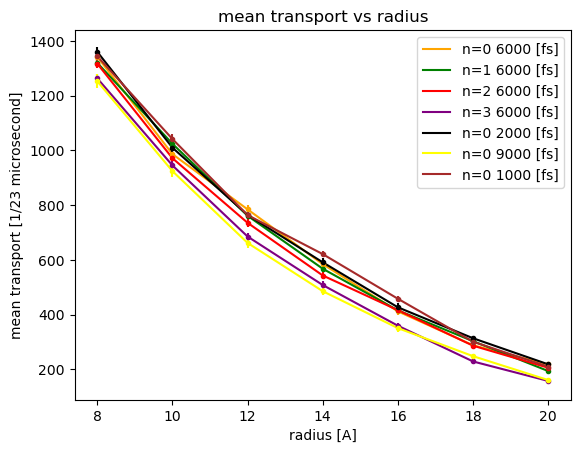

In [41]:

transport_n_0_9000  = []
transport_n_0_6000 = []
transport_n_1_6000 = []
transport_n_2_6000 = []
transport_n_3_6000 = []
transport_n_0_2000  = []
transport_n_0_1000  = []

# transport_n_4_3000 = []
r=transport_n_3 = []
dir_name = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/"
for i in range (0,80):
    file_2=dir_name+"radius_v1_{run_num}_0_6000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_00_6000= pickle.load(f)
    # file_2 = "/cs/usr/reshem/Desktop/Link to MSBD_IMP/NPC_data_half_v6/radius_v1_{run_num}_1_6000.0_.pkl".format(run_num=i+1)
    file_2=dir_name+"radius_v1_{run_num}_1_6000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_11_6000= pickle.load(f)
    # file_2 = "/cs/usr/reshem/Desktop/Link to MSBD_IMP/NPC_data_half_v6/radius_v1_{run_num}_2_6000.0_.pkl".format(run_num=i+1)
    file_2=dir_name+"radius_v1_{run_num}_2_6000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_22_6000= pickle.load(f)
    # file_2 = "/cs/usr/reshem/Desktop/Link to MSBD_IMP/NPC_data_half_v6/radius_v1_{run_num}_3_6000.0_.pkl".format(run_num=i+1)
    file_2=dir_name+"radius_v1_{run_num}_3_6000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_33_6000= pickle.load(f)
    file_2=dir_name+"radius_v1_{run_num}_0_9000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_00_9000= pickle.load(f)
    file_2=dir_name+"radius_v1_{run_num}_0_2000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_00_2000= pickle.load(f)
    file_2=dir_name+"radius_v1_{run_num}_0_1000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_00_1000= pickle.load(f)
    # file_2=dir_name+"radius_v1_{run_num}_4_3000.0_.pkl".format(run_num=i)
    # with open(file_2, 'rb') as f:
    #     x_n_44_3000= pickle.load(f)


    sim_time_00_6000 =x_n_00_6000["total_sim_time"]
    sim_time_00_9000 =x_n_00_9000["total_sim_time"]
    # sim_time_n_4_3000 =x_n_44_3000["total_sim_time"]
    sim_time_n_3_6000 =x_n_33_6000["total_sim_time"]
    sim_time_00_1000 = x_n_00_1000["total_sim_time"]
    # print("sim_time_00_6000",sim_time_00_6000)
    # print("sim_time_00_9000",sim_time_00_9000)
    # # print("sim_time_n_4_3000",sim_time_n_4_3000)
    # print("sim_time_n_3_6000",sim_time_n_3_6000)
    print(i)

    radius = sorted(x_n_00_6000["combined_dict"].keys())
    transport = [x_n_00_6000["combined_dict"][r]for r in radius]
    transport_n_0_6000.append(transport)

    # radius = sorted(x_n_00_9000["combined_dict"].keys())
    # transport = [x_n_00_9000["combined_dict"][r]for r in radius]
    # plot_transport_vs_radius(radius, transport," n=0 9000 [fs]")
    # transport_n_0_9000.append(transport)

    radius = sorted(x_n_11_6000["combined_dict"].keys())
    transport = [x_n_11_6000["combined_dict"][r]for r in radius]
    transport_n_1_6000.append(transport)

    radius = sorted(x_n_22_6000["combined_dict"].keys())
    transport = [x_n_22_6000["combined_dict"][r]for r in radius]
    transport_n_2_6000.append(transport)


    radius = sorted(x_n_33_6000["combined_dict"].keys())
    transport = [x_n_33_6000["combined_dict"][r]for r in radius]
    transport_n_3_6000.append(transport)

    radius = sorted(x_n_00_2000["combined_dict"].keys())
    transport = [x_n_00_2000["combined_dict"][r]for r in radius]
    transport_n_0_2000.append(transport)

    # ratio= sim_time_00_6000 / sim_time_n_4_3000
    # radius = sorted(x_n_44_3000["combined_dict"].keys())
    # transport = [x_n_44_3000["combined_dict"][r]*ratio for r in radius]
    # transport_n_4_3000.append(transport)

    ratio = sim_time_00_6000 / sim_time_00_9000
    radius = sorted(x_n_00_9000["combined_dict"].keys())
    transport = [x_n_00_9000["combined_dict"][r]*ratio for r in radius]
    transport_n_0_9000.append(transport)

    ratio = sim_time_00_6000 / sim_time_00_1000
    radius = sorted(x_n_00_1000["combined_dict"].keys())
    transport = [x_n_00_1000["combined_dict"][r]*ratio for r in radius]
    transport_n_0_1000.append(transport)

#plot the mean values of the transport as a finction of the radius

all_transport_n_0_6000 = [np.mean(np.array(transport_n_0_6000)[:,i]) for i in range(7)]
all_transport_n_1_6000 = [np.mean(np.array(transport_n_1_6000)[:,i]) for i in range(7)]
all_transport_n_2_6000 = [np.mean(np.array(transport_n_2_6000)[:,i]) for i in range(7)]
all_transport_n_3_6000 = [np.mean(np.array(transport_n_3_6000)[:,i]) for i in range(7)]
all_transport_n_0_2000 = [np.mean(np.array(transport_n_0_2000)[:,i]) for i in range(7)]
all_transport_n_0_1000 = [np.mean(np.array(transport_n_0_1000)[:,i]) for i in range(7)]



# all_transport_n_4_3000 = [np.mean(np.array(transport_n_4_3000)[:,i]) for i in range(7)]
all_transport_n_0_9000 = [np.mean(np.array(transport_n_0_9000)[:,i]) for i in range(7)]


# plt.plot(radius,all_transport_n_0_9000,label="n=0 9000 [fs]")
plt.plot(radius,all_transport_n_0_6000,label="n=0 6000 [fs]",color="orange")
plt.plot(radius,all_transport_n_1_6000,label="n=1 6000 [fs]",color="green")
plt.plot(radius,all_transport_n_2_6000,label="n=2 6000 [fs]",color="red")
plt.plot(radius,all_transport_n_3_6000,label="n=3 6000 [fs]",color="purple")
plt.plot(radius,all_transport_n_0_2000,label="n=0 2000 [fs]",color="black")
# plt.plot(radius,all_transport_n_4_3000,label="n=4 3000 [fs]",color="blue")
plt.plot(radius,all_transport_n_0_9000,label="n=0 9000 [fs]",color="yellow")
plt.plot(radius,all_transport_n_0_1000,label="n=0 1000 [fs]",color="brown")

plt.errorbar(radius,all_transport_n_0_6000,yerr=[standard_error_of_the_mean(np.array(transport_n_0_6000)[:,i]) for i in range(7)],fmt='.',color="orange")
plt.errorbar(radius,all_transport_n_1_6000,yerr=[standard_error_of_the_mean(np.array(transport_n_1_6000)[:,i]) for i in range(7)],fmt='.',color="green")
plt.errorbar(radius,all_transport_n_2_6000,yerr=[standard_error_of_the_mean(np.array(transport_n_2_6000)[:,i]) for i in range(7)],fmt='.',color="red")
plt.errorbar(radius,all_transport_n_3_6000,yerr=[standard_error_of_the_mean(np.array(transport_n_3_6000)[:,i]) for i in range(7)],fmt='.',color="purple")
plt.errorbar(radius,all_transport_n_0_2000,yerr=[standard_error_of_the_mean(np.array(transport_n_0_2000)[:,i]) for i in range(7)],fmt='.',color="black")
plt.errorbar(radius,all_transport_n_0_9000,yerr=[standard_error_of_the_mean(np.array(transport_n_0_9000)[:,i]) for i in range(7)],fmt='.',color="yellow")
plt.errorbar(radius,all_transport_n_0_1000,yerr=[standard_error_of_the_mean(np.array(transport_n_0_1000)[:,i]) for i in range(7)],fmt='.',color="brown")



plt.legend()
plt.xlabel("radius [A]")
plt.ylabel("mean transport [1/23 microsecond]")
plt.title("mean transport vs radius")


plt.show()





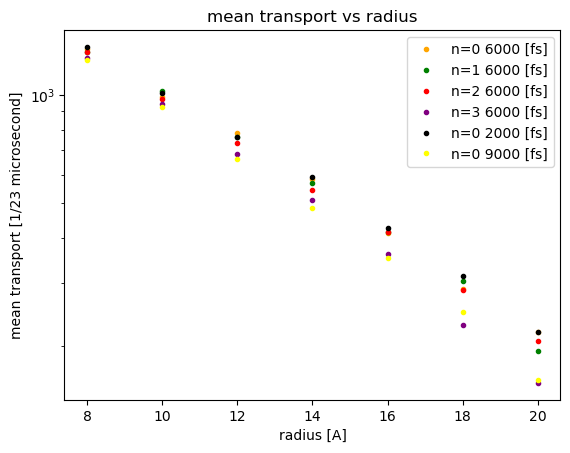

In [42]:
all_transport_n_0_6000 = [np.mean(np.array(transport_n_0_6000)[:,i]) for i in range(7)]
all_transport_n_1_6000 = [np.mean(np.array(transport_n_1_6000)[:,i]) for i in range(7)]
all_transport_n_2_6000 = [np.mean(np.array(transport_n_2_6000)[:,i]) for i in range(7)]
all_transport_n_3_6000 = [np.mean(np.array(transport_n_3_6000)[:,i]) for i in range(7)]
all_transport_n_0_2000 = [np.mean(np.array(transport_n_0_2000)[:,i]) for i in range(7)]



# all_transport_n_4_3000 = [np.mean(np.array(transport_n_4_3000)[:,i]) for i in range(7)]
all_transport_n_0_9000 = [np.mean(np.array(transport_n_0_9000)[:,i]) for i in range(7)]


# plt.plot(radius,all_transport_n_0_9000,label="n=0 9000 [fs]")
#plot as a dot
plt.plot(radius,all_transport_n_0_6000,".",label="n=0 6000 [fs]",color="orange")
plt.plot(radius,all_transport_n_1_6000,".",label="n=1 6000 [fs]",color="green")
plt.plot(radius,all_transport_n_2_6000,".",label="n=2 6000 [fs]",color="red")
plt.plot(radius,all_transport_n_3_6000,".",label="n=3 6000 [fs]",color="purple")
plt.plot(radius,all_transport_n_0_2000,".",label="n=0 2000 [fs]",color="black")
# plt.plot(radius,all_transport_n_4_3000,label="n=4 3000 [fs]",color="blue")
plt.plot(radius,all_transport_n_0_9000,".",label="n=0 9000 [fs]",color="yellow")

plt.legend()
plt.xlabel("radius [A]")
#plot t axis in log scale
plt.yscale("log")
plt.ylabel("mean transport [1/23 microsecond]")
plt.title("mean transport vs radius")


plt.show()

In [43]:
transport_n_0_6000 = []
transport_n_0_9000  = []
transport_n_0_500 = []
transport_n_0_1000 = []
transport_n_0_2000 = []
transport_n_0_3000 = []
transport_n_0_4000 = []
transport_n_0_5000 = []
transport_n_0_7000 = []
transport_n_0_8000 = []
r=transport_n_3 = []

def standard_error_of_the_mean(data):
    return np.std(data) / np.sqrt(np.size(data))

dir_name = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/"
for i in range (0,80):
    file_2=dir_name+"radius_v1_{run_num}_0_6000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_00_6000= pickle.load(f)
    file_2=dir_name+"radius_v1_{run_num}_0_9000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_00_9000= pickle.load(f)
    # file_2=dir_name+"radius_v1_{run_num}_0_500.0_.pkl".format(run_num=i)
    # with open(file_2, 'rb') as f:
    #     x_n_00_500= pickle.load(f)
    file_2=dir_name+"radius_v1_{run_num}_0_1000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_00_1000= pickle.load(f)
    file_2=dir_name+"radius_v1_{run_num}_0_2000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_00_2000= pickle.load(f)
    # file_2=dir_name+"radius_v1_{run_num}_0_3000.0_.pkl".format(run_num=i)
    # with open(file_2, 'rb') as f:
    #     x_n_00_3000= pickle.load(f)
    # file_2=dir_name+"radius_v1_{run_num}_0_4000.0_.pkl".format(run_num=i)
    # with open(file_2, 'rb') as f:
    #     x_n_00_4000= pickle.load(f)
    # file_2=dir_name+"radius_v1_{run_num}_0_5000.0_.pkl".format(run_num=i)
    # with open(file_2, 'rb') as f:
    #     x_n_00_5000= pickle.load(f)
    # file_2=dir_name+"radius_v1_{run_num}_0_7000.0_.pkl".format(run_num=i)
    # with open(file_2, 'rb') as f:
    #     x_n_00_7000= pickle.load(f)
    file_2=dir_name+"radius_v1_{run_num}_0_8000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_00_8000= pickle.load(f)



    sim_time_00_6000 = x_n_00_6000["total_sim_time"]
    sim_time_00_9000 = x_n_00_9000["total_sim_time"]
    # sim_time_00_500 = x_n_00_500["sim_time"]
    sim_time_00_1000 = x_n_00_1000["total_sim_time"]
    sim_time_00_2000 = x_n_00_2000["total_sim_time"]
    # sim_time_00_3000 = x_n_00_3000["total_sim_time"]
    # sim_time_00_4000 = x_n_00_4000["sim_time"]
    # sim_time_00_5000 = x_n_00_5000["sim_time"]
    # sim_time_00_7000 = x_n_00_7000["total_sim_time"]
    sim_time_00_8000 = x_n_00_8000["total_sim_time"]


    print(i)
    ratio = sim_time_00_6000 / sim_time_00_6000
    radius = sorted(x_n_00_6000["combined_dict"].keys())
    transport = [x_n_00_6000["combined_dict"][r]*ratio for r in radius]
    transport_n_0_6000.append(transport)

    ratio = sim_time_00_6000 / sim_time_00_9000
    radius = sorted(x_n_00_9000["combined_dict"].keys())
    transport = [x_n_00_9000["combined_dict"][r]*ratio for r in radius]
    transport_n_0_9000.append(transport)

    # ratio = sim_time_00_6000 / sim_time_00_500
    # radius = sorted(x_n_00_500["combined_dict"].keys())
    # transport = [x_n_00_500["combined_dict"][r]*ratio for r in radius]
    # transport_n_0_500.append(transport)

    ratio = sim_time_00_6000 / sim_time_00_1000
    radius = sorted(x_n_00_1000["combined_dict"].keys())
    transport = [x_n_00_1000["combined_dict"][r]*ratio for r in radius]
    transport_n_0_1000.append(transport)

    ratio = sim_time_00_6000 / sim_time_00_2000
    radius = sorted(x_n_00_2000["combined_dict"].keys())
    transport = [x_n_00_2000["combined_dict"][r]*ratio for r in radius]
    transport_n_0_2000.append(transport)

    # ratio = sim_time_00_6000 / sim_time_00_3000
    # radius = sorted(x_n_00_3000["combined_dict"].keys())
    # transport = [x_n_00_3000["combined_dict"][r]*ratio for r in radius]
    # transport_n_0_3000.append(transport)

    # ratio = sim_time_00_6000 / sim_time_00_4000
    # radius = sorted(x_n_00_4000["combined_dict"].keys())
    # transport = [x_n_00_4000["combined_dict"][r]*ratio for r in radius]
    # transport_n_0_4000.append(transport)
    #
    # ratio = sim_time_00_6000 / sim_time_00_5000
    # radius = sorted(x_n_00_5000["combined_dict"].keys())
    # transport = [x_n_00_5000["combined_dict"][r]*ratio for r in radius]
    # transport_n_0_5000.append(transport)
    #
    # ratio = sim_time_00_6000 / sim_time_00_7000
    # radius = sorted(x_n_00_7000["combined_dict"].keys())
    # transport = [x_n_00_7000["combined_dict"][r]*ratio for r in radius]
    # transport_n_0_7000.append(transport)

    ratio = sim_time_00_6000 / sim_time_00_8000
    radius = sorted(x_n_00_8000["combined_dict"].keys())
    transport = [x_n_00_8000["combined_dict"][r]*ratio for r in radius]
    transport_n_0_8000.append(transport)


#plot the mean values of the transport as a finction of the radius

all_transport_n_0_6000 = [np.mean(np.array(transport_n_0_6000)[:,i]) for i in range(7)]
all_transport_n_0_9000 = [np.mean(np.array(transport_n_0_9000)[:,i]) for i in range(7)]
# all_transport_n_0_500 = [np.mean(np.array(transport_n_0_500)[:,i]) for i in range(7)]
all_transport_n_0_1000 = [np.mean(np.array(transport_n_0_1000)[:,i]) for i in range(7)]
all_transport_n_0_2000 = [np.mean(np.array(transport_n_0_2000)[:,i]) for i in range(7)]
# all_transport_n_0_3000 = [np.mean(np.array(transport_n_0_3000)[:,i]) for i in range(7)]
# all_transport_n_0_4000 = [np.mean(np.array(transport_n_0_4000)[:,i]) for i in range(7)]
# all_transport_n_0_5000 = [np.mean(np.array(transport_n_0_5000)[:,i]) for i in range(7)]
# all_transport_n_0_7000 = [np.mean(np.array(transport_n_0_7000)[:,i]) for i in range(7)]
all_transport_n_0_8000 = [np.mean(np.array(transport_n_0_8000)[:,i]) for i in range(7)]

# all_transport_n_1_6000 = [np.mean(np.array(transport_n_1_6000)[:,i]) for i in range(7)]






# all_transport_n_4_3000 = [np.mean(np.array(transport_n_4_3000)[:,i]) for i in range(7)]
all_transport_n_0_9000 = [np.mean(np.array(transport_n_0_9000)[:,i]) for i in range(7)]


# plt.plot(radius,all_transport_n_0_9000,label="n=0 9000 [fs]")
plt.plot(radius,all_transport_n_0_6000,label="n=0 6000 [fs]",color="orange")
# plt.plot(radius,all_transport_n_0_500,label="n=0 500 [fs]",color="blue")
plt.plot(radius,all_transport_n_0_1000,label="n=0 1000 [fs]",color="green")
plt.plot(radius,all_transport_n_0_2000,label="n=0 2000 [fs]",color="red")
# plt.plot(radius,all_transport_n_0_3000,label="n=0 3000 [fs]",color="purple")
# plt.plot(radius,all_transport_n_0_4000,label="n=0 4000 [fs]",color="black")
# plt.plot(radius,all_transport_n_0_5000,label="n=0 5000 [fs]",color="yellow")
# plt.plot(radius,all_transport_n_0_7000,label="n=0 7000 [fs]",color="pink")
plt.plot(radius,all_transport_n_0_8000,label="n=0 8000 [fs]",color="brown")
# plt.plot(radius,all_transport_n_1_6000,label="n=1 6000 [fs]",color="green")
# plt.plot(radius,all_transport_n_2_6000,label="n=2 6000 [fs]",color="red")
# plt.plot(radius,all_transport_n_3_6000,label="n=3 6000 [fs]",color="purple")
# plt.plot(radius,all_transport_n_0_2000,label="n=0 2000 [fs]",color="black")
# # plt.plot(radius,all_transport_n_4_3000,label="n=4 3000 [fs]",color="blue")
plt.plot(radius,all_transport_n_0_9000,label="n=0 9000 [fs]",color="yellow")


plt.errorbar(radius,all_transport_n_0_6000,yerr=[standard_error_of_the_mean(np.array(transport_n_0_6000)[:,i]) for i in range(7)],fmt='.',color="orange")
# plt.errorbar(radius,all_transport_n_0_500,yerr=[standard_error_of_the_mean(np.array(transport_n_0_500)[:,i]) for i in range(7)],fmt='o',color="blue")
plt.errorbar(radius,all_transport_n_0_1000,yerr=[standard_error_of_the_mean(np.array(transport_n_0_1000)[:,i]) for i in range(7)],fmt='.',color="green")
plt.errorbar(radius,all_transport_n_0_2000,yerr=[standard_error_of_the_mean(np.array(transport_n_0_2000)[:,i]) for i in range(7)],fmt='.',color="red")
# plt.errorbar(radius,all_transport_n_0_3000,yerr=[standard_error_of_the_mean(np.array(transport_n_0_3000)[:,i]) for i in range(7)],fmt='o',color="purple")
# plt.errorbar(radius,all_transport_n_0_4000,yerr=[standard_error_of_the_mean(np.array(transport_n_0_4000)[:,i]) for i in range(7)],fmt='o',color="black")

# plt.errorbar(radius,all_transport_n_0_5000,yerr=[standard_error_of_the_mean(np.array(transport_n_0_5000)[:,i]) for i in range(7)],fmt='o',color="yellow")
# plt.errorbar(radius,all_transport_n_0_7000,yerr=[standard_error_of_the_mean(np.array(transport_n_0_7000)[:,i]) for i in range(7)],fmt='o',color="pink")
plt.errorbar(radius,all_transport_n_0_8000,yerr=[standard_error_of_the_mean(np.array(transport_n_0_8000)[:,i]) for i in range(7)],fmt='o',color="brown")
# plt.errorbar(radius,all_transport_n_1_6000,yerr=[standard_error_of_the_mean(np.array(transport_n_1_6000)[:,i]) for i in range(7)],fmt='o',color="green")

# plt.errorbar(radius,all_transport_n_2_6000,yerr=[standard_error_of_the_mean(np.array(transport_n_2_6000)[:,i]) for i in range(7)],fmt='o',color="red")
# plt.errorbar(radius,all_transport_n_3_6000,yerr=[standard_error_of_the_mean(np.array(transport_n_3_6000)[:,i]) for i in range(7)],fmt='o',color="purple")
# plt.errorbar(radius,all_transport_n_0_2000,yerr=[standard_error_of_the_mean(np.array(transport_n_0_2000)[:,i]) for i in range(7)],fmt='o',color="black")
# # plt.errorbar(radius,all_transport_n_4_3000,yerr=[standard_error_of_the_mean(np.array(transport_n_4_3000)[:,i]) for i in range(7)],fmt='o',color="blue")
plt.errorbar(radius,all_transport_n_0_9000,yerr=[standard_error_of_the_mean(np.array(transport_n_0_9000)[:,i]) for i in range(7)],fmt='o',color="yellow")

plt.legend()
plt.xlabel("radius [A]")
plt.ylabel("mean transport [1/23 microsecond]")
#y in log scale
plt.yscale("log")
plt.title("mean transport vs radius")


plt.show()



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79


In [44]:
dir_name = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/"
for i in range (0,20):
    for dt in [4000,5000,7000,2000,6000,5000]:
        for n in [2,3]:
            file_2=dir_name+"radius_v1_{run_num}_{n}_{dt}.0_.pkl".format(run_num=i,n=n,dt=dt)
            print(file_2)
            with open(file_2, 'rb') as f:
                x_n_00_6000= pickle.load(f)
    # file_2=dir_name+"radius_v1_{run_num}_0_{dt}.0_.pkl".format(run_num=i,dt=dt)
    # with open(file_2, 'rb') as f:
    #     x_n_00_6000= pickle.load(f)
    # file_2=dir_name+"radius_v1_{run_num}_1_3000.0_.pkl".format(run_num=i)
    # with open(file_2, 'rb') as f:
    #     x_n_00_6000= pickle.load(f)
    # file_2=dir_name+"radius_v1_{run_num}_2_3000.0_.pkl".format(run_num=i)
    # with open(file_2, 'rb') as f:
    #     x_n_00_6000= pickle.load(f)
    # file_2=dir_name+"radius_v1_{run_num}_3_3000.0_.pkl".format(run_num=i)
    # with open(file_2, 'rb') as f:
    #     x_n_00_6000= pickle.load(f)

/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_0_2_4000.0_.pkl
/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_0_3_4000.0_.pkl
/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_0_2_5000.0_.pkl
/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_0_3_5000.0_.pkl
/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_0_2_7000.0_.pkl
/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_0_3_7000.0_.pkl
/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_0_2_2000.0_.pkl
/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_0_3_2000.0_.pkl
/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_0_2_6000.0_.pkl
/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_0_3_6000.0_.pkl
/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_0_2_5000.0_.pkl
/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_0_3_5000.0_.pkl
/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_1_

In [45]:
def generate_color_gradients(color_list, num_steps):
    """
    Generates multiple shades for a given list of colors, with a specified number of gradient steps for each color.

    Parameters:
    - color_list: A list of matplotlib-recognizable color names or hexadecimal color codes.
    - num_steps: The number of gradient steps to generate for each color.

    Returns:
    - A dictionary where each key is the original color, and the value is a list of gradient steps for that color.
    """
    import matplotlib.colors as mcolors

    gradients_dict = {}
    for color in color_list:
        # Convert color to RGB
        rgb_color = mcolors.to_rgb(color)
        # Generate gradients
        gradients = [mcolors.to_hex((rgb_color[0] * (1 - step / (num_steps - 1)) + step / (num_steps - 1),
                                     rgb_color[1] * (1 - step / (num_steps - 1)) + step / (num_steps - 1),
                                     rgb_color[2] * (1 - step / (num_steps - 1)) + step / (num_steps - 1)))
                     for step in range(num_steps)]
        gradients_dict[color] = gradients
    return gradients_dict

# Example usage
color_list = ['blue', 'yellow','green','red']
num_steps = 2
gradient_steps = generate_color_gradients(color_list, num_steps)
[gradient_steps.values()]


[dict_values([['#0000ff', '#ffffff'], ['#ffff00', '#ffffff'], ['#008000', '#ffffff'], ['#ff0000', '#ffffff']])]

r_8


/tmp/ipykernel_1705044/812013389.py:13: RuntimeWarning: divide by zero encountered in log
  en = -np.log(sd) * 0.593


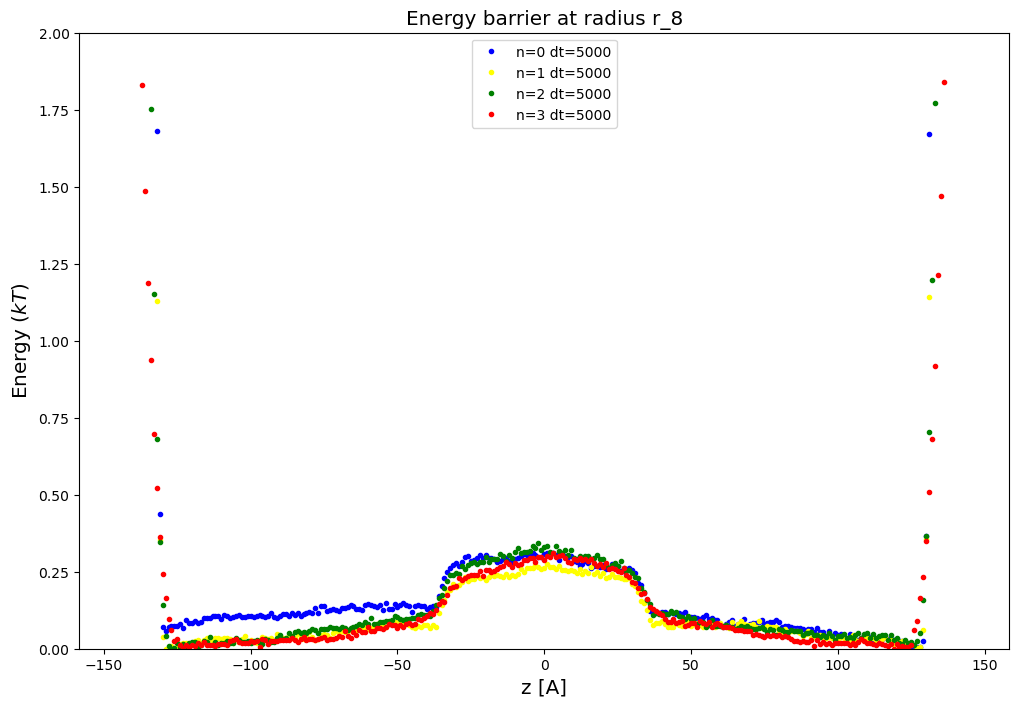

{'n=0 dt=5000': 0.3109780056743596, 'n=1 dt=5000': 0.275425062814072, 'n=2 dt=5000': 0.3419424542771501, 'n=3 dt=5000': 0.30939584224456684}
r_10


{'n=0 dt=5000': 0.4071236865585841, 'n=1 dt=5000': 0.4640973454244448, 'n=2 dt=5000': 0.44697116844497353, 'n=3 dt=5000': 0.4000532862733497}
r_12


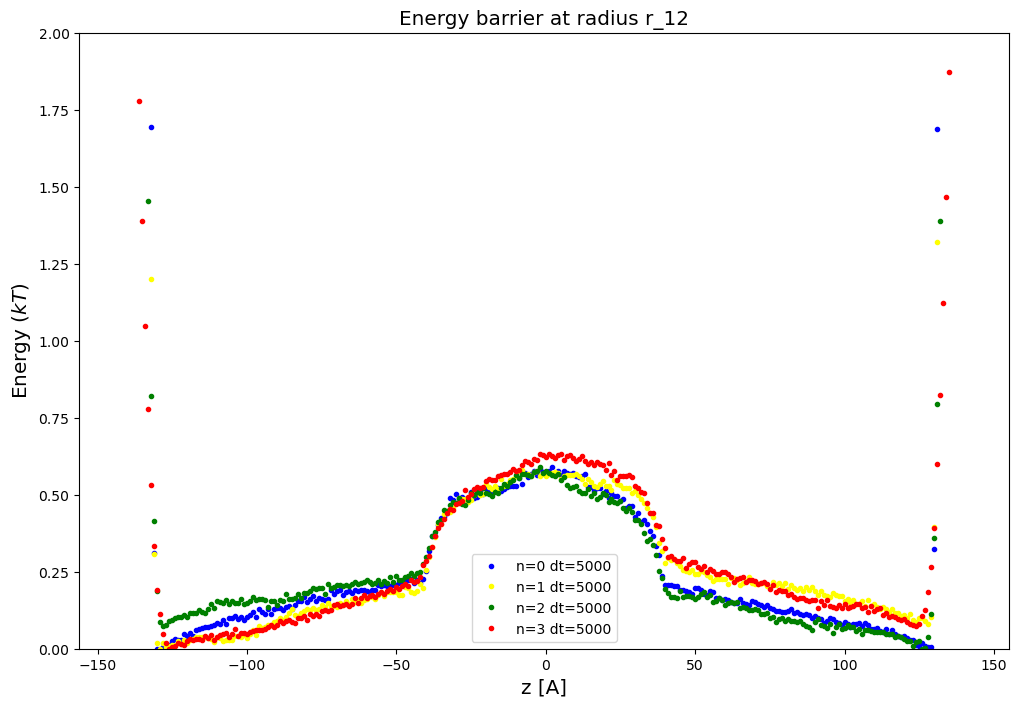

{'n=0 dt=5000': 0.5896435865307916, 'n=1 dt=5000': 0.5806396471670348, 'n=2 dt=5000': 0.5890792546584138, 'n=3 dt=5000': 0.6319274410670137}
r_14


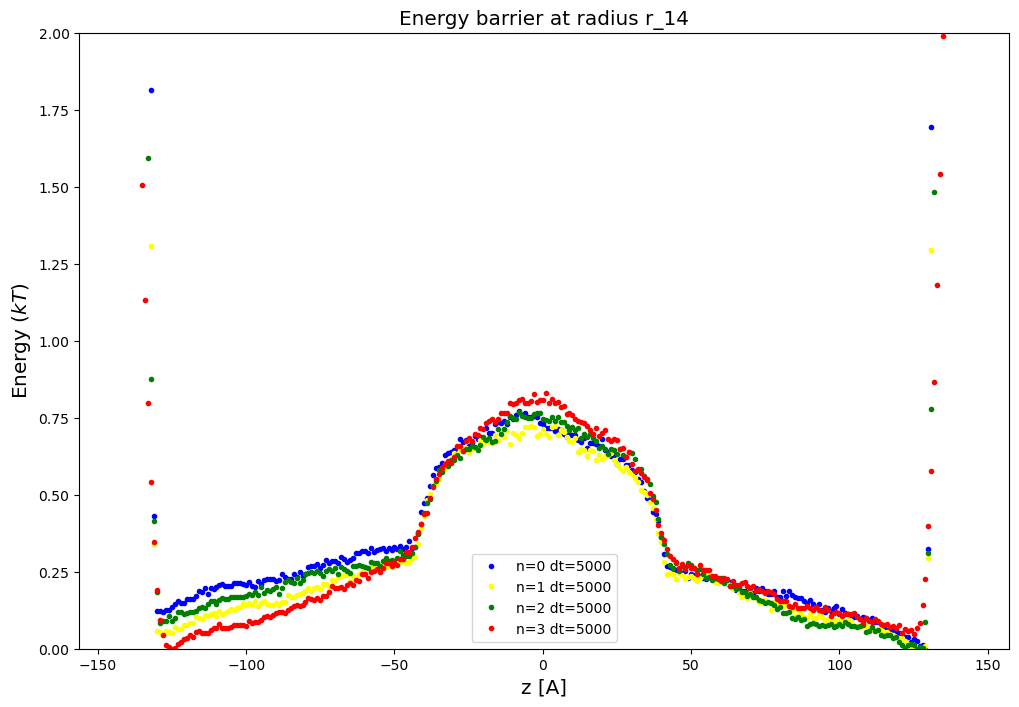

{'n=0 dt=5000': 0.7718450870614806, 'n=1 dt=5000': 0.724277816447036, 'n=2 dt=5000': 0.7693988771521951, 'n=3 dt=5000': 0.8293564622208796}
r_16


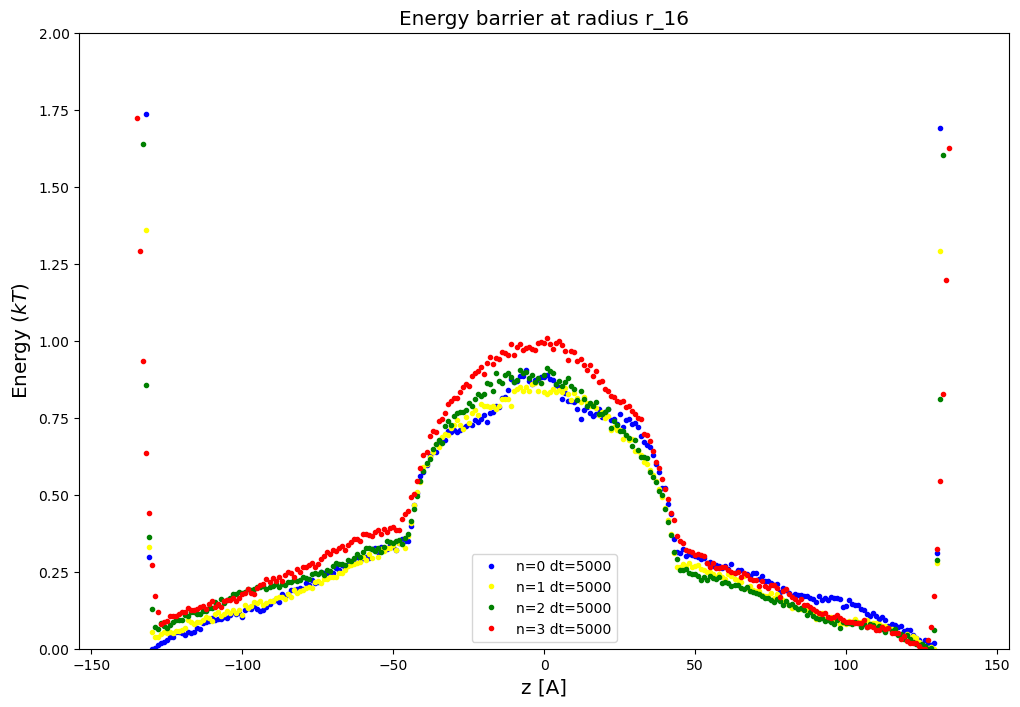

{'n=0 dt=5000': 0.9043582682586244, 'n=1 dt=5000': 0.864014440745366, 'n=2 dt=5000': 0.9101394279901212, 'n=3 dt=5000': 1.0093748750989118}
r_18


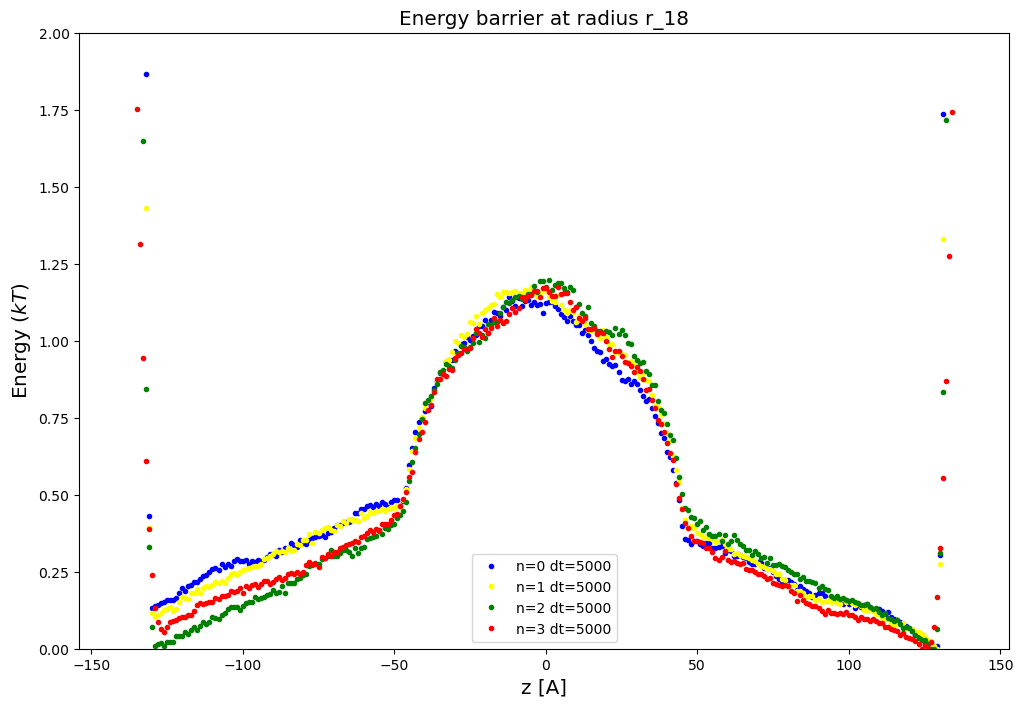

{'n=0 dt=5000': 1.1414391275957572, 'n=1 dt=5000': 1.1757497654521374, 'n=2 dt=5000': 1.1962323383979707, 'n=3 dt=5000': 1.1730207968037178}
r_20


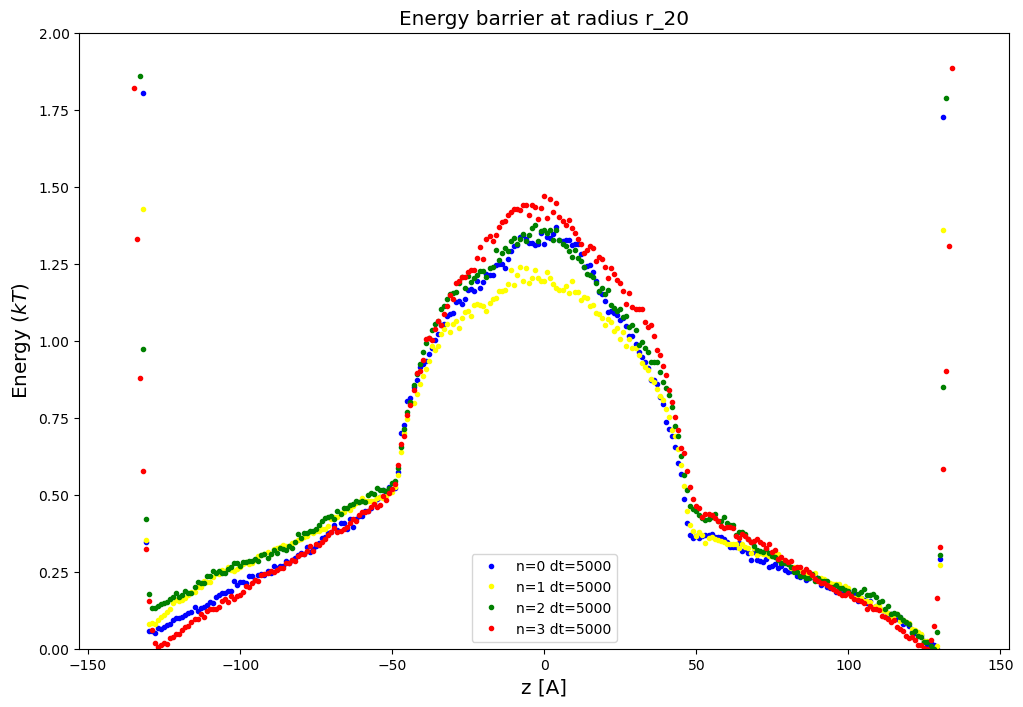

{'n=0 dt=5000': 1.3702465988158097, 'n=1 dt=5000': 1.2380482426910713, 'n=2 dt=5000': 1.3745037964219224, 'n=3 dt=5000': 1.4706591426016535}


In [46]:
import os
dict_index_to_radius_name = {0: "r_8", 6: "r_10", 11: "r_12", 16: "r_14", 21: "r_16", 26: "r_18", 31: "r_20"}
def plot(datas, labels,colors=None,title="Energy barrier"):
    plt.figure(figsize=(12, 8))
    max_ys = {}
    for i, (data, label) in enumerate(zip(datas, labels)):
        data,label = (data, label)
        hist = np.sum(data, axis=0)
        # print(hist)
        x_for_plot = np.linspace(-150, 150, len(hist))

        sd = hist / hist.sum()
        en = -np.log(sd) * 0.593
        en = en - np.min(en)

        relevant_indices = (x_for_plot >= -50) & (x_for_plot <= 50)
        max_y = np.max(en[relevant_indices])
        max_ys[label] = max_y
        if colors is not None:
            plt.plot(x_for_plot, en, ".", label=label, color=colors[i])
        else:
            plt.plot(x_for_plot, en, ".", label=label)
        # plt.plot(x_for_plot, hist, label=label)

    plt.xlabel("z [A]", fontsize='x-large')
    plt.ylabel("Energy ($kT$)", fontsize='x-large')

    plt.title(title, fontsize='x-large')


    plt.ylim(0, 2)
    plt.legend()
    plt.show()
    return max_ys

def process_and_generate_histogram(simulation_data, radius_indexes, radius_of_npc):
    # Step 1: Filter the data based on radius and concatenate
    lists_to_concatenate = [get_cord_only_in_radius(simulation_data[:,index,:], radius=radius_of_npc) for index in radius_indexes]
    data = np.concatenate(lists_to_concatenate)

    # Step 2: Separate the coordinates
    x, y, z = data[:,0], data[:,1], data[:,2]

    # Step 3: Clip the data
    clipped_data = np.clip(z, -150, 150)

    # Step 4: Define bin edges
    bin_edges = np.arange(-150, 152, 1)

    # Step 5: Create histogram
    hist_counts, hist_edges = np.histogram(clipped_data, bins=bin_edges)

    # Assuming n_3_6000_8 is intended to be the histogram counts
    return hist_counts

mol_size_r_8 = [i for i in range(0,5)]
mol_size_r_10 = [i for i in range(6,10)]
mol_size_r_12 = [i for i in range(11,15)]
mol_size_r_14 = [i for i in range(16,20)]
mol_size_r_16 = [i for i in range(21,25)]
mol_size_r_18 = [i for i in range(26,30)]
mol_size_r_20 = [i for i in range(31,35)]
n_3_6000_8,n_3_6000_14,n_3_6000_20,n_0_6000_8,n_0_6000_14,n_0_6000_20,n_0_9000_8,n_0_9000_14,n_0_9000_20 = [],[],[],[],[],[],[],[],[]
dts = [2000,5000,6000,7000]
dts = [5000]
ns=[0,1,2,3]
dict_of_data = {}
for run_num in range (20):
    for dt in dts:
        for n in ns:
            file_path = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_{n}_{dt}.0_.pkl".format(run_num=run_num,n=n,dt=dt)
            # if not os.path.exists(file_path):
            #     print ("file does not exist",file_path)
            with open(file_path, 'rb') as f:
                simulation_data= pickle.load(f)["location_of_all_diffuse_particles"]
            for mol_size_r in [mol_size_r_8,mol_size_r_10,mol_size_r_12,mol_size_r_14,mol_size_r_16,mol_size_r_18,mol_size_r_20]:
                hist_counts = process_and_generate_histogram(simulation_data, mol_size_r, radius_of_npc=90)
                #if the key exist

                if (n,dt,dict_index_to_radius_name[mol_size_r[0]]) in dict_of_data:
                    dict_of_data[(n,dt,dict_index_to_radius_name[mol_size_r[0]])].append(hist_counts)
                else:
                    dict_of_data[(n,dt,dict_index_to_radius_name[mol_size_r[0]])] = [hist_counts]


# [key for key in dict_of_data.keys() if key[2] == radius_name]
for radius_name in dict_index_to_radius_name.values():
    datas = []
    labels = []
    colors_to_plot =[]
    keys_with_the_rad = [key for key in dict_of_data.keys() if key[2] == radius_name]
    for key in keys_with_the_rad:
        data = dict_of_data[key]
        datas.append(data)
        label= "n={n} dt={dt}".format(n=key[0],dt=key[1])
        title = "Energy barrier at radius {radius_name}".format(radius_name=radius_name)
        labels.append(label)
        if key[0] == 0:
            colors_to_plot.append("blue")
        if key[0] == 1:
            colors_to_plot.append("yellow")
        if key[0] == 2:
            colors_to_plot.append("green")
        if key[0] == 3:
            colors_to_plot.append("red")
    print(radius_name)
    # print(colors_to_plot)
    print(plot(datas, labels,colors_to_plot,title))
    #for every mol_size in key plot the data

    # label= "n={n} dt={dt} mol_size={mol_size}".format(n=key[0],dt=key[1],mol_size=key[2])
    # data = dict_of_data[key]
    # plot([dict_of_data[key]],labels=[label])


# for key in dict_of_data.keys():
#     plt.plot(dict_of_data[key],label=key)
# plt.legend()
# plt.show()

    # print(i)
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_6000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_00_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_1_6000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_11_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_2_6000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_22_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_3_6000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_33_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_9000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_00_9000= pickle.load(f)["location_of_all_diffuse_particles"]
    # # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_6000.0_.pkl".format(run_num=i+2)
    # # with open(file_2, 'rb') as f:
    # #     x_n_000_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_9000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_00_9000= pickle.load(f)["location_of_all_diffuse_particles"]



r_8


/tmp/ipykernel_1705044/812013389.py:13: RuntimeWarning: divide by zero encountered in log
  en = -np.log(sd) * 0.593


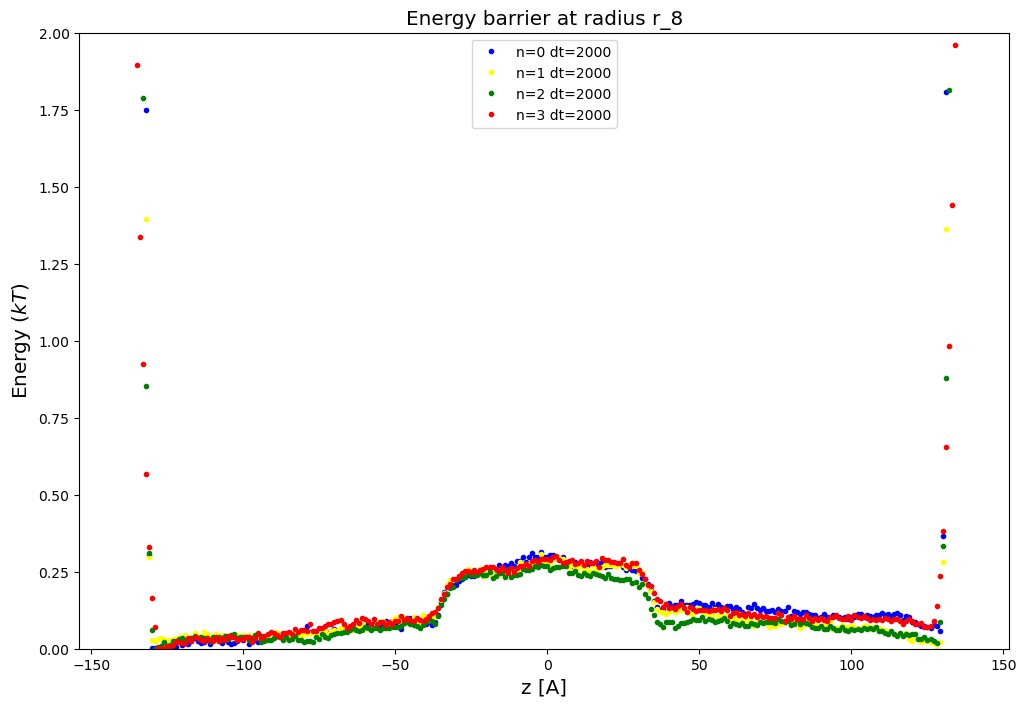

r_10


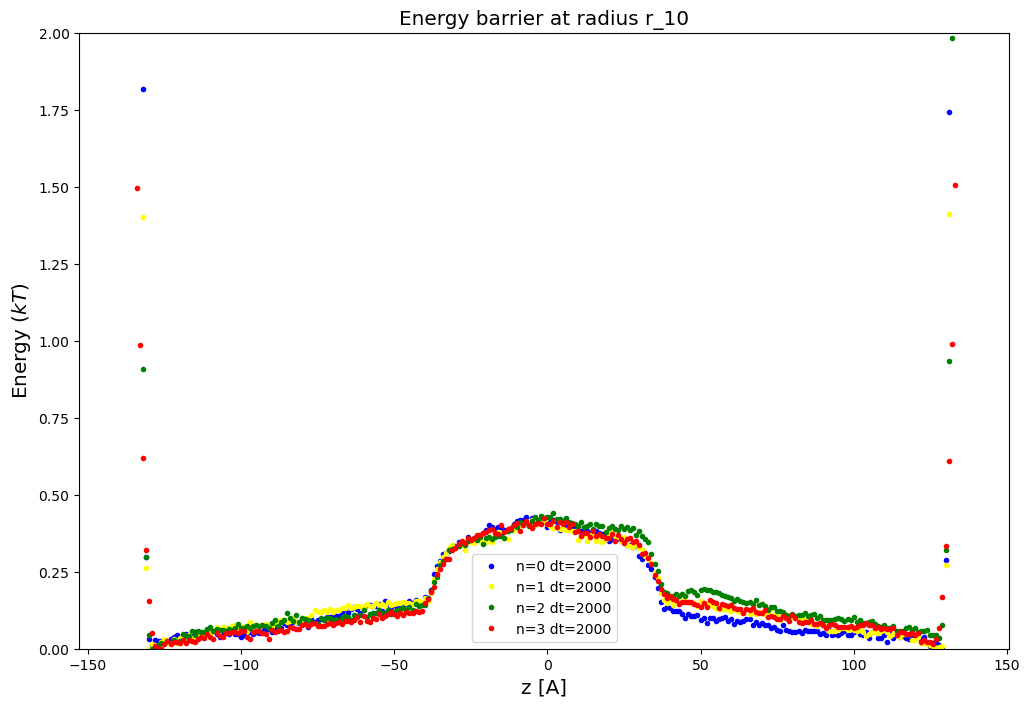

r_12


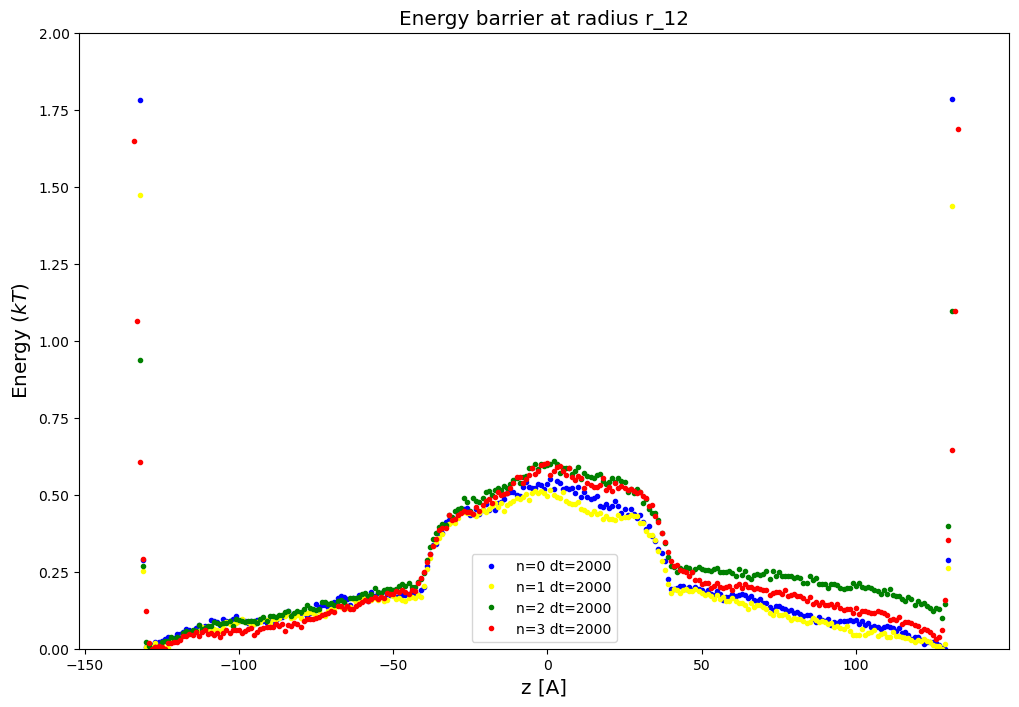

r_14


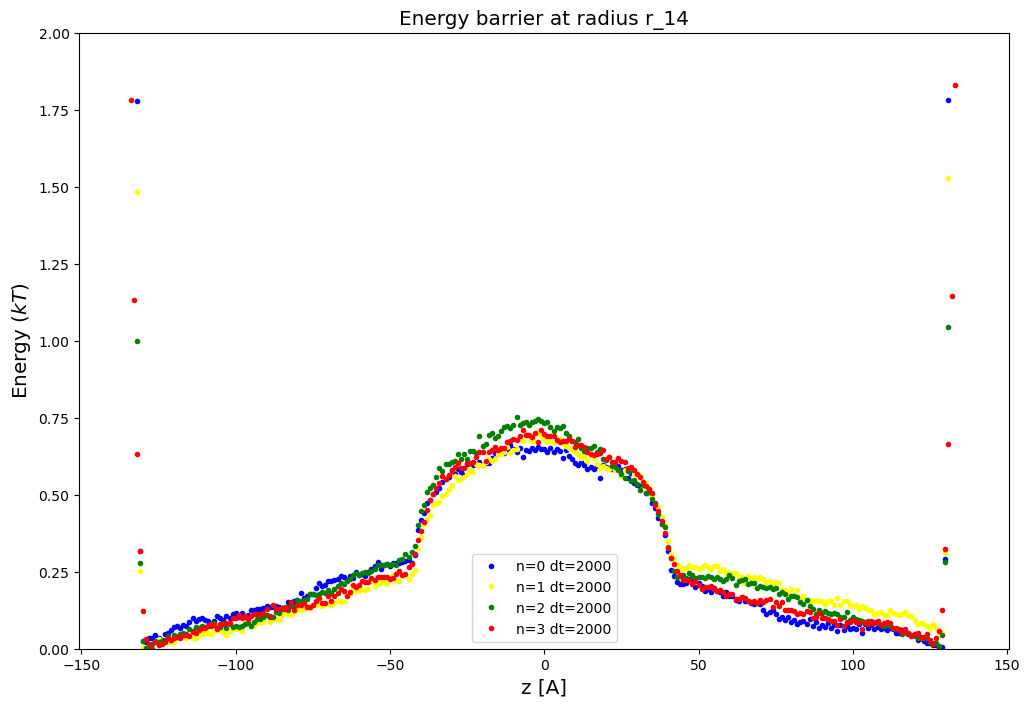

r_16


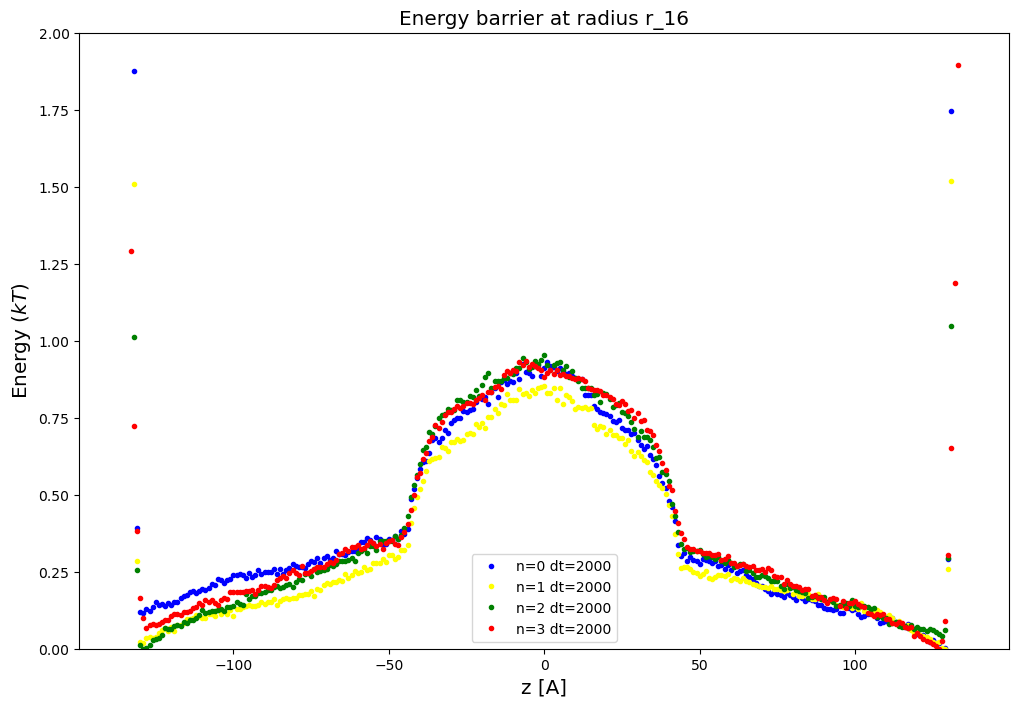

r_18


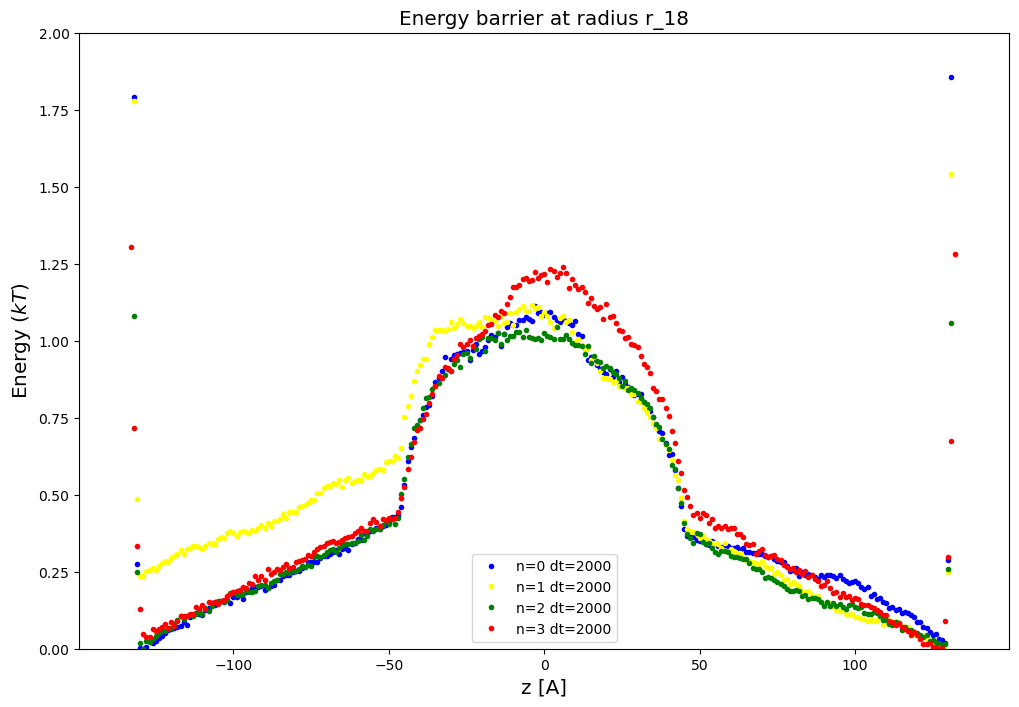

r_20


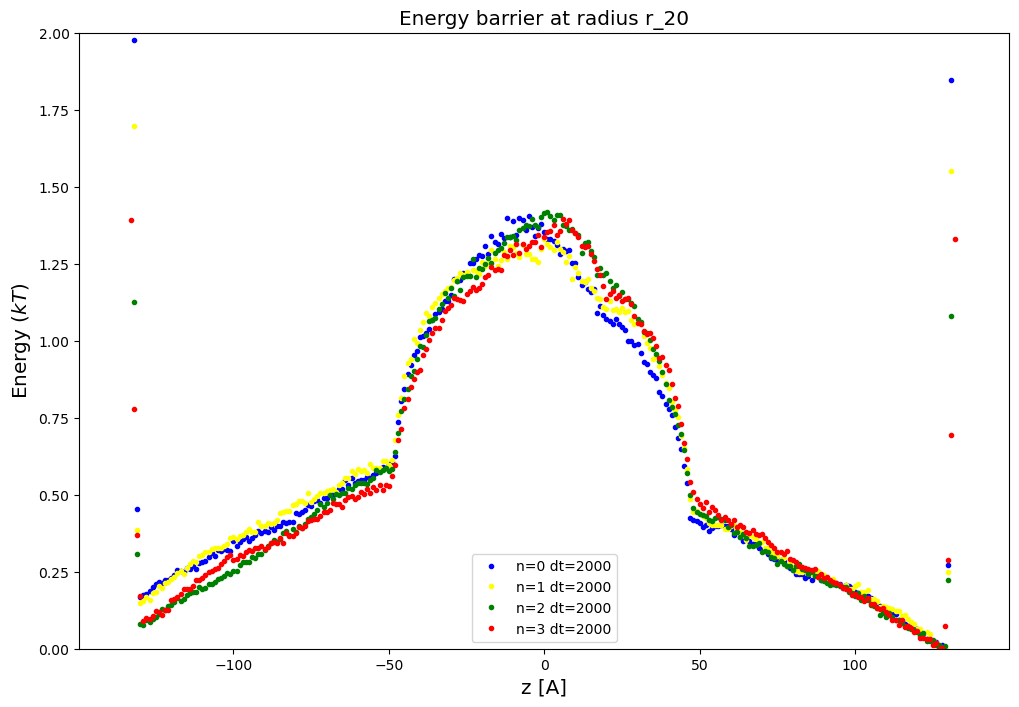

In [47]:

dts = [2000]
ns=[0,1,2,3]
dict_of_data = {}
for run_num in range (20):
    for dt in dts:
        for n in ns:
            file_path = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_{n}_{dt}.0_.pkl".format(run_num=run_num,n=n,dt=dt)
            # if not os.path.exists(file_path):
            #     print ("file does not exist",file_path)
            with open(file_path, 'rb') as f:
                simulation_data= pickle.load(f)["location_of_all_diffuse_particles"]
            for mol_size_r in [mol_size_r_8,mol_size_r_10,mol_size_r_12,mol_size_r_14,mol_size_r_16,mol_size_r_18,mol_size_r_20]:
                hist_counts = process_and_generate_histogram(simulation_data, mol_size_r, radius_of_npc=90)
                #if the key exist

                if (n,dt,dict_index_to_radius_name[mol_size_r[0]]) in dict_of_data:
                    dict_of_data[(n,dt,dict_index_to_radius_name[mol_size_r[0]])].append(hist_counts)
                else:
                    dict_of_data[(n,dt,dict_index_to_radius_name[mol_size_r[0]])] = [hist_counts]


# [key for key in dict_of_data.keys() if key[2] == radius_name]
for radius_name in dict_index_to_radius_name.values():
    datas = []
    labels = []
    colors_to_plot =[]
    keys_with_the_rad = [key for key in dict_of_data.keys() if key[2] == radius_name]
    for key in keys_with_the_rad:
        data = dict_of_data[key]
        datas.append(data)
        label= "n={n} dt={dt}".format(n=key[0],dt=key[1])
        title = "Energy barrier at radius {radius_name}".format(radius_name=radius_name)
        labels.append(label)
        if key[0] == 0:
            colors_to_plot.append("blue")
        if key[0] == 1:
            colors_to_plot.append("yellow")
        if key[0] == 2:
            colors_to_plot.append("green")
        if key[0] == 3:
            colors_to_plot.append("red")
    print(radius_name)
    # print(colors_to_plot)
    plot(datas, labels,colors_to_plot,title)
    #for every mol_size in key plot the data

    # label= "n={n} dt={dt} mol_size={mol_size}".format(n=key[0],dt=key[1],mol_size=key[2])
    # data = dict_of_data[key]
    # plot([dict_of_data[key]],labels=[label])


# for key in dict_of_data.keys():
#     plt.plot(dict_of_data[key],label=key)
# plt.legend()
# plt.show()

    # print(i)
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_6000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_00_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_1_6000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_11_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_2_6000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_22_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_3_6000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_33_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_9000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_00_9000= pickle.load(f)["location_of_all_diffuse_particles"]
    # # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_6000.0_.pkl".format(run_num=i+2)
    # # with open(file_2, 'rb') as f:
    # #     x_n_000_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_9000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_00_9000= pickle.load(f)["location_of_all_diffuse_particles"]



r_8


/tmp/ipykernel_1705044/812013389.py:13: RuntimeWarning: divide by zero encountered in log
  en = -np.log(sd) * 0.593


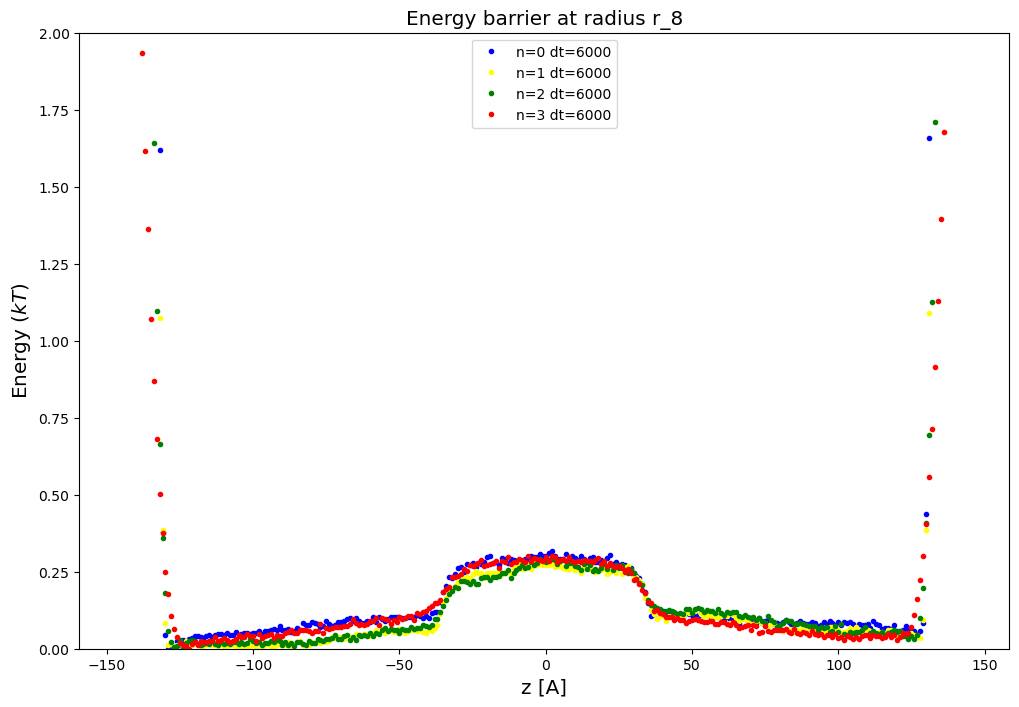

r_10


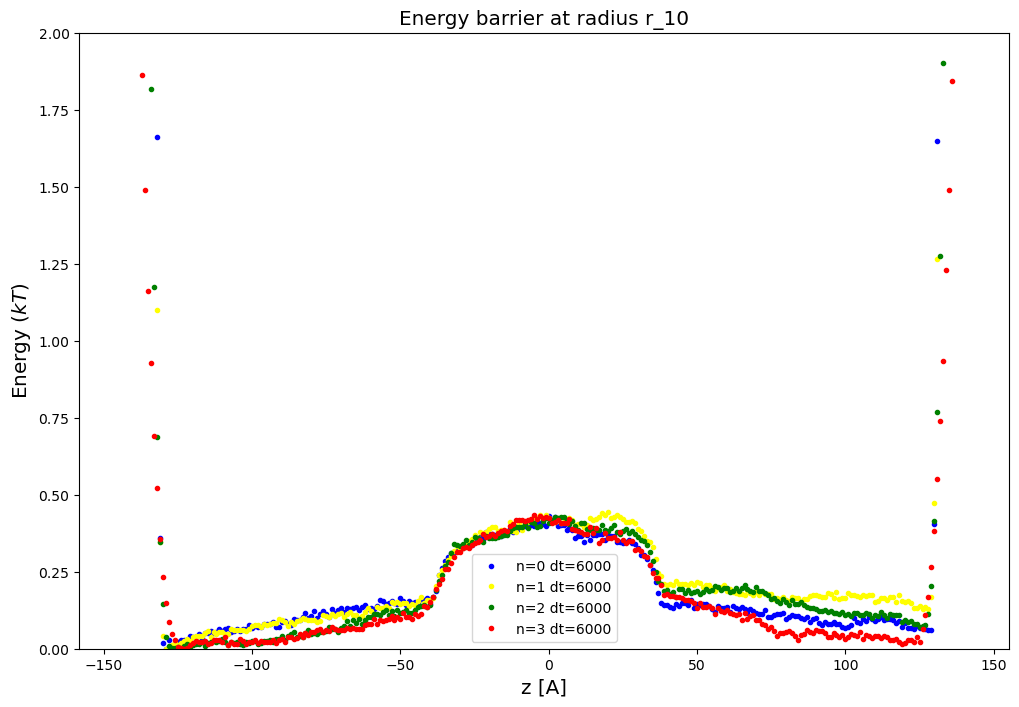

r_12


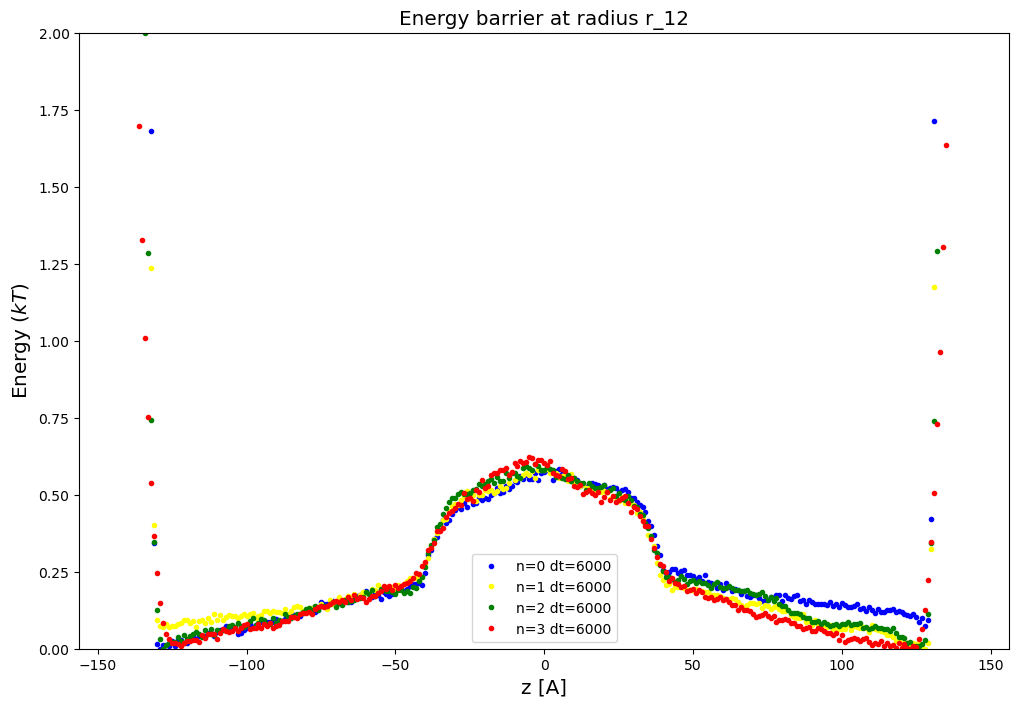

r_14


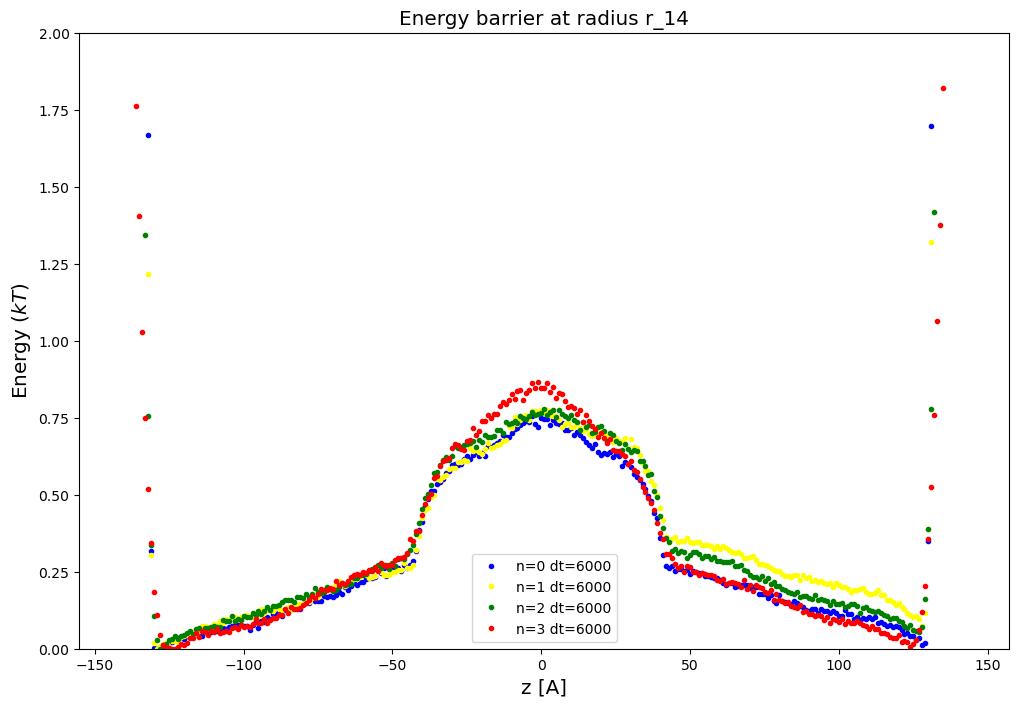

r_16


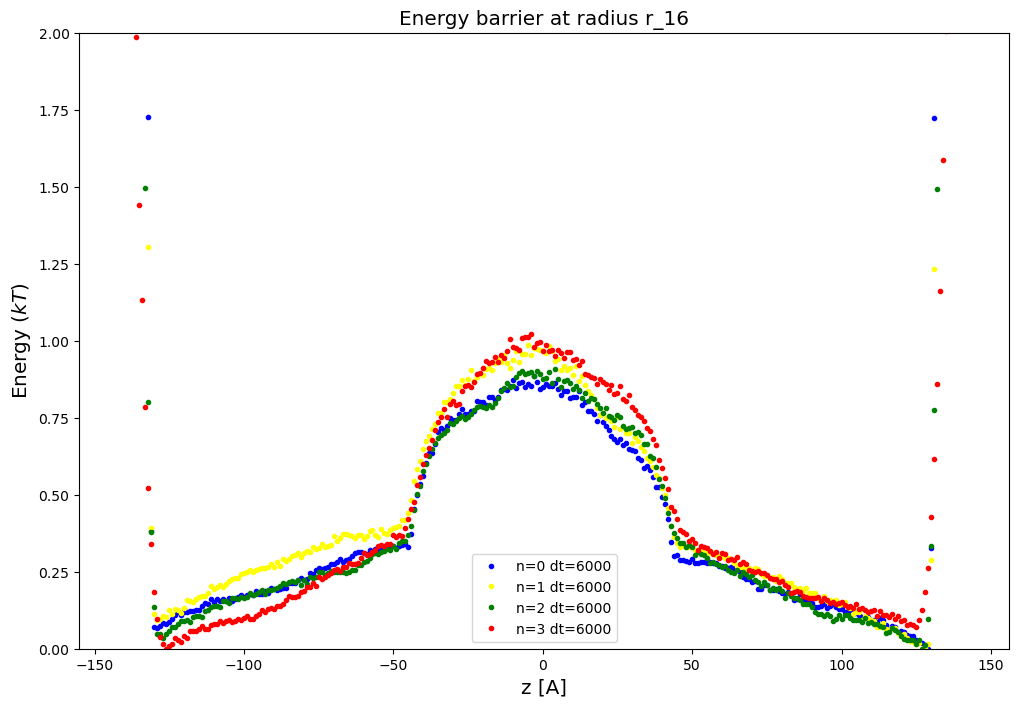

r_18


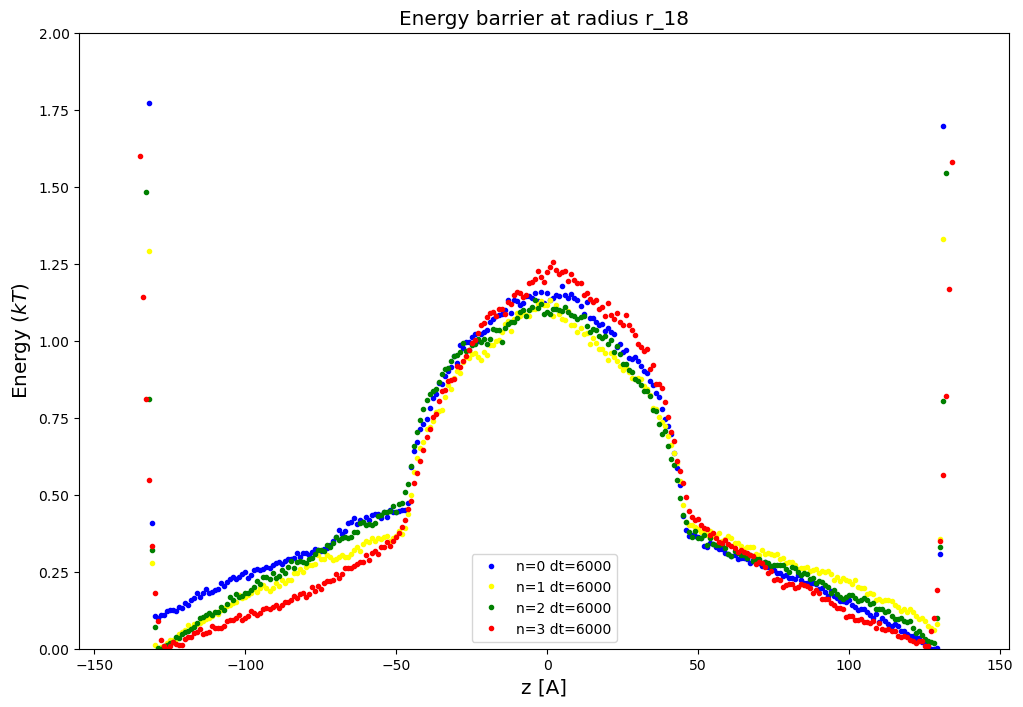

r_20


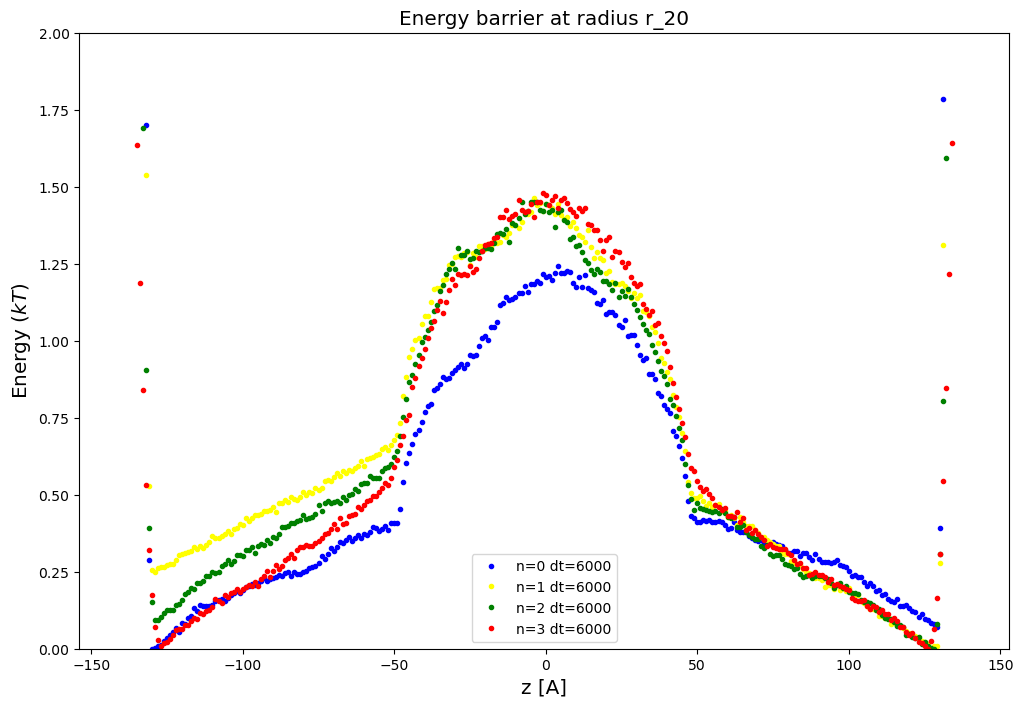

In [48]:

dts = [6000]
ns=[0,1,2,3]
dict_of_data = {}
for run_num in range (20):
    for dt in dts:
        for n in ns:
            file_path = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_{n}_{dt}.0_.pkl".format(run_num=run_num,n=n,dt=dt)
            # if not os.path.exists(file_path):
            #     print ("file does not exist",file_path)
            with open(file_path, 'rb') as f:
                simulation_data= pickle.load(f)["location_of_all_diffuse_particles"]
            for mol_size_r in [mol_size_r_8,mol_size_r_10,mol_size_r_12,mol_size_r_14,mol_size_r_16,mol_size_r_18,mol_size_r_20]:
                hist_counts = process_and_generate_histogram(simulation_data, mol_size_r, radius_of_npc=90)
                #if the key exist

                if (n,dt,dict_index_to_radius_name[mol_size_r[0]]) in dict_of_data:
                    dict_of_data[(n,dt,dict_index_to_radius_name[mol_size_r[0]])].append(hist_counts)
                else:
                    dict_of_data[(n,dt,dict_index_to_radius_name[mol_size_r[0]])] = [hist_counts]


# [key for key in dict_of_data.keys() if key[2] == radius_name]
for radius_name in dict_index_to_radius_name.values():
    datas = []
    labels = []
    colors_to_plot =[]
    keys_with_the_rad = [key for key in dict_of_data.keys() if key[2] == radius_name]
    for key in keys_with_the_rad:
        data = dict_of_data[key]
        datas.append(data)
        label= "n={n} dt={dt}".format(n=key[0],dt=key[1])
        title = "Energy barrier at radius {radius_name}".format(radius_name=radius_name)
        labels.append(label)
        if key[0] == 0:
            colors_to_plot.append("blue")
        if key[0] == 1:
            colors_to_plot.append("yellow")
        if key[0] == 2:
            colors_to_plot.append("green")
        if key[0] == 3:
            colors_to_plot.append("red")
    print(radius_name)
    # print(colors_to_plot)
    plot(datas, labels,colors_to_plot,title)
    #for every mol_size in key plot the data

    # label= "n={n} dt={dt} mol_size={mol_size}".format(n=key[0],dt=key[1],mol_size=key[2])
    # data = dict_of_data[key]
    # plot([dict_of_data[key]],labels=[label])


# for key in dict_of_data.keys():
#     plt.plot(dict_of_data[key],label=key)
# plt.legend()
# plt.show()

    # print(i)
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_6000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_00_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_1_6000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_11_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_2_6000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_22_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_3_6000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_33_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_9000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_00_9000= pickle.load(f)["location_of_all_diffuse_particles"]
    # # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_6000.0_.pkl".format(run_num=i+2)
    # # with open(file_2, 'rb') as f:
    # #     x_n_000_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_9000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_00_9000= pickle.load(f)["location_of_all_diffuse_particles"]



r_8


/tmp/ipykernel_1705044/812013389.py:13: RuntimeWarning: divide by zero encountered in log
  en = -np.log(sd) * 0.593


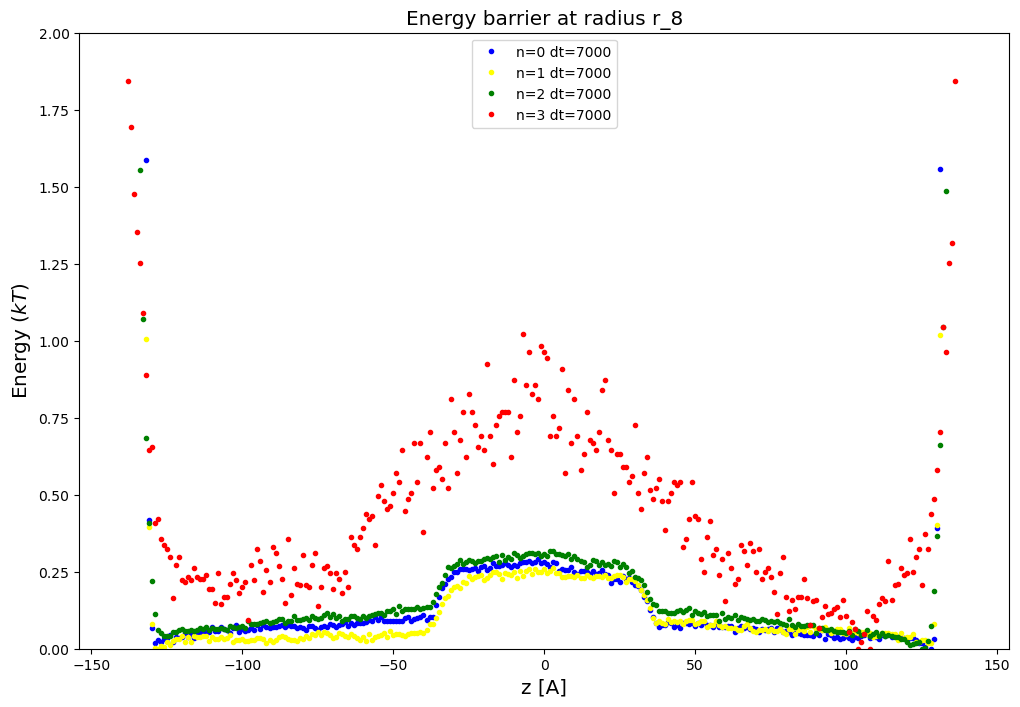

r_10


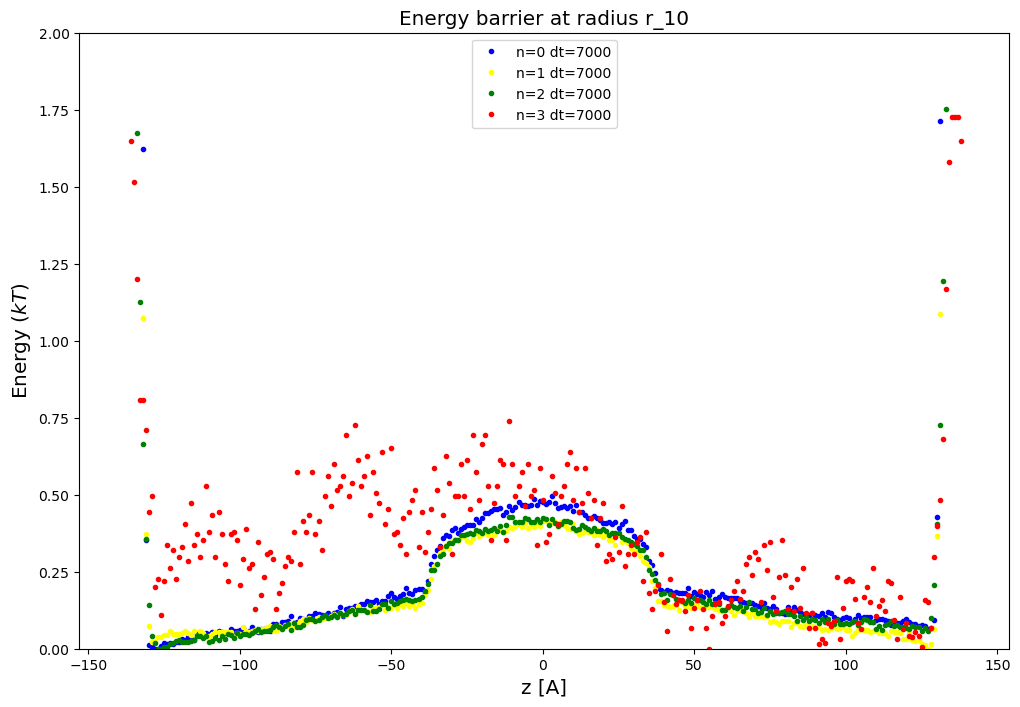

r_12


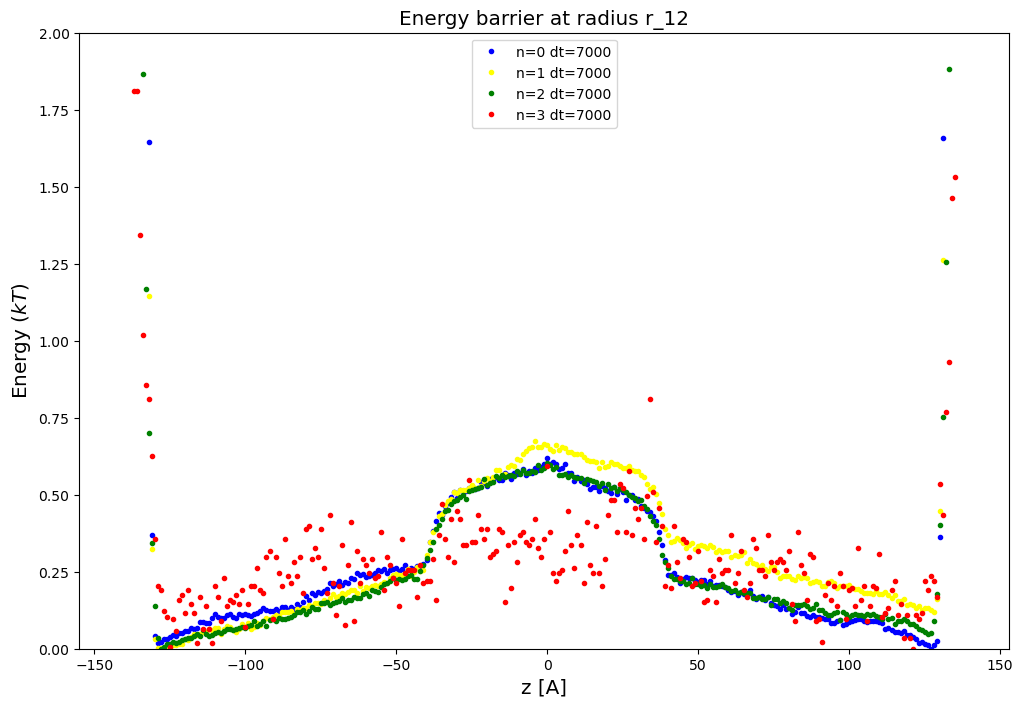

r_14


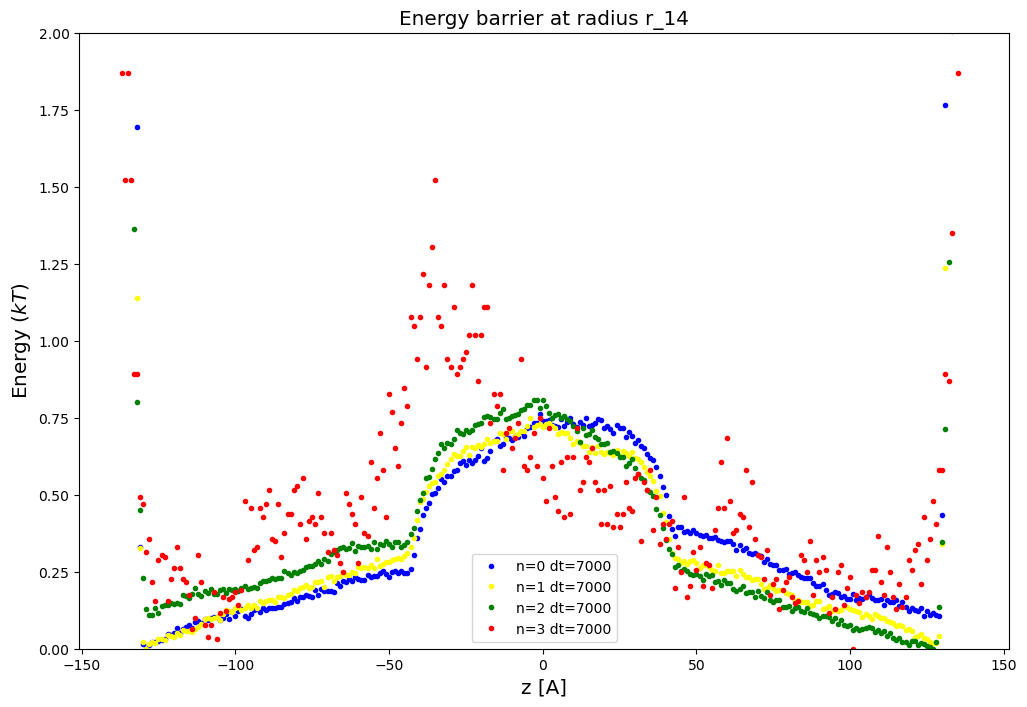

r_16


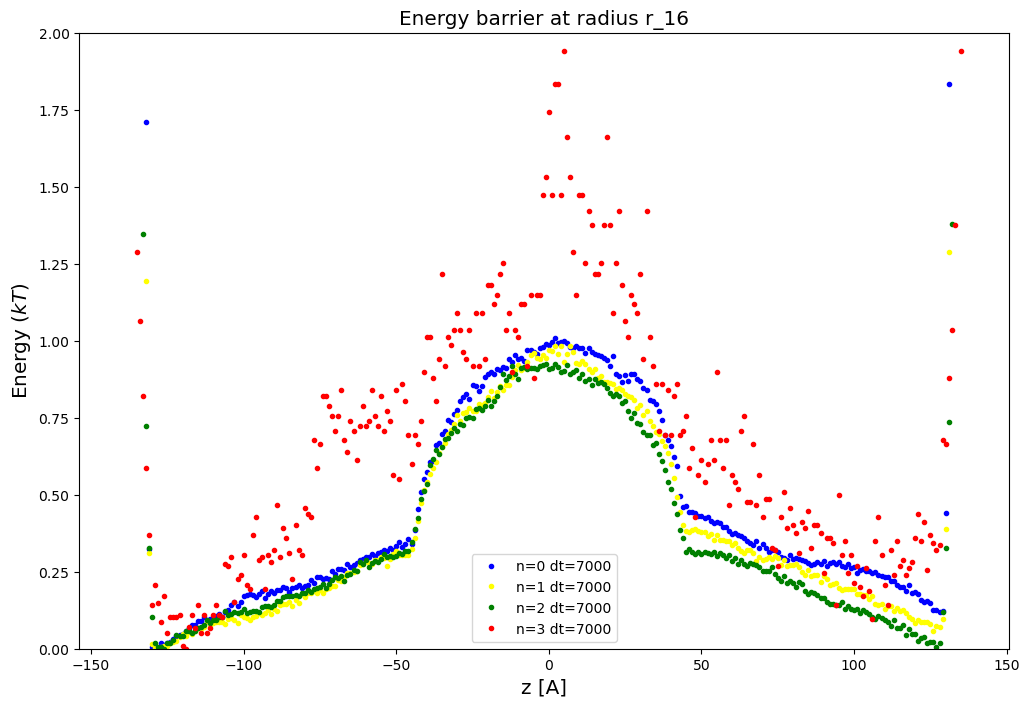

r_18


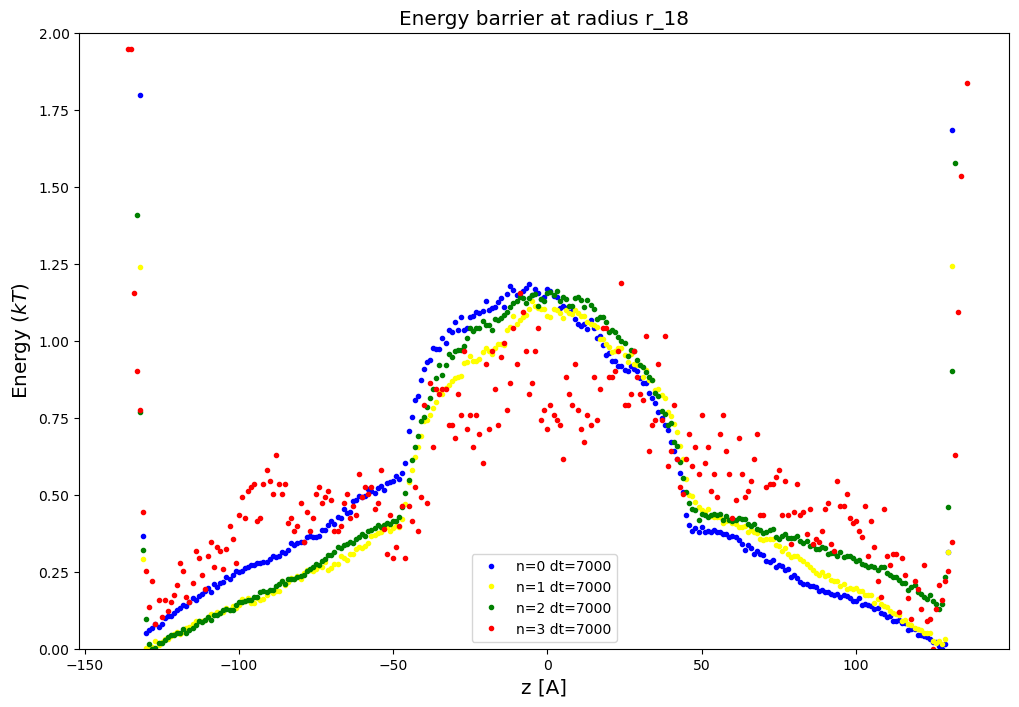

r_20


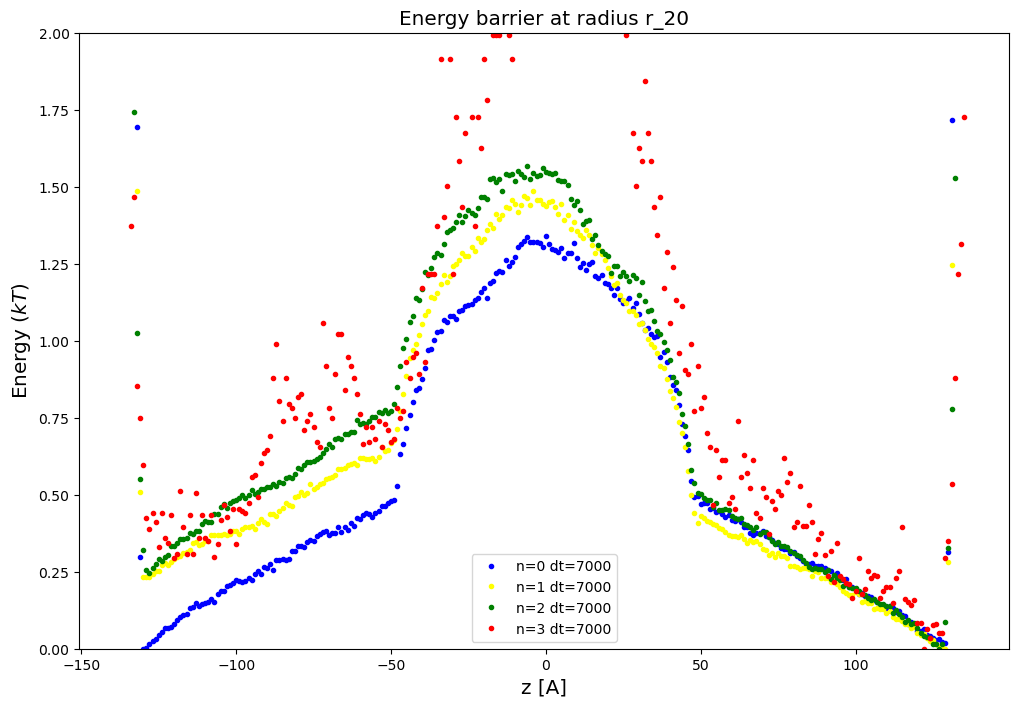

In [49]:

dts = [7000]
ns=[0,1,2,3]
dict_of_data = {}
for run_num in range (20):
    for dt in dts:
        for n in ns:
            file_path = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_{n}_{dt}.0_.pkl".format(run_num=run_num,n=n,dt=dt)
            # if not os.path.exists(file_path):
            #     print ("file does not exist",file_path)
            with open(file_path, 'rb') as f:
                simulation_data= pickle.load(f)["location_of_all_diffuse_particles"]
            for mol_size_r in [mol_size_r_8,mol_size_r_10,mol_size_r_12,mol_size_r_14,mol_size_r_16,mol_size_r_18,mol_size_r_20]:
                hist_counts = process_and_generate_histogram(simulation_data, mol_size_r, radius_of_npc=90)
                #if the key exist

                if (n,dt,dict_index_to_radius_name[mol_size_r[0]]) in dict_of_data:
                    dict_of_data[(n,dt,dict_index_to_radius_name[mol_size_r[0]])].append(hist_counts)
                else:
                    dict_of_data[(n,dt,dict_index_to_radius_name[mol_size_r[0]])] = [hist_counts]


# [key for key in dict_of_data.keys() if key[2] == radius_name]
for radius_name in dict_index_to_radius_name.values():
    datas = []
    labels = []
    colors_to_plot =[]
    keys_with_the_rad = [key for key in dict_of_data.keys() if key[2] == radius_name]
    for key in keys_with_the_rad:
        data = dict_of_data[key]
        datas.append(data)
        label= "n={n} dt={dt}".format(n=key[0],dt=key[1])
        title = "Energy barrier at radius {radius_name}".format(radius_name=radius_name)
        labels.append(label)
        if key[0] == 0:
            colors_to_plot.append("blue")
        if key[0] == 1:
            colors_to_plot.append("yellow")
        if key[0] == 2:
            colors_to_plot.append("green")
        if key[0] == 3:
            colors_to_plot.append("red")
    print(radius_name)
    # print(colors_to_plot)
    plot(datas, labels,colors_to_plot,title)
    #for every mol_size in key plot the data

    # label= "n={n} dt={dt} mol_size={mol_size}".format(n=key[0],dt=key[1],mol_size=key[2])
    # data = dict_of_data[key]
    # plot([dict_of_data[key]],labels=[label])


# for key in dict_of_data.keys():
#     plt.plot(dict_of_data[key],label=key)
# plt.legend()
# plt.show()

    # print(i)
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_6000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_00_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_1_6000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_11_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_2_6000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_22_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_3_6000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_33_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_9000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_00_9000= pickle.load(f)["location_of_all_diffuse_particles"]
    # # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_6000.0_.pkl".format(run_num=i+2)
    # # with open(file_2, 'rb') as f:
    # #     x_n_000_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_9000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_00_9000= pickle.load(f)["location_of_all_diffuse_particles"]



In [50]:
def standard_error_of_the_mean(data):
    return np.std(data, axis=0)/ np.sqrt(len(data))
def calc_barrier_energy(data, label,max_ys):

    hist = np.sum(data, axis=0)

    x_for_plot = np.linspace(-150, 150, len(hist))

    sd = hist / hist.sum()
    en = -np.log(sd) * 0.593
    en = en - np.min(en)
    #if there is nan
    # print(en)
    # print( -np.log(sem) * 0.593)

    relevant_indices = (x_for_plot >= -50) & (x_for_plot <= 50)
    max_y = np.max(en[relevant_indices])
    #if there is nan in en[relevant_indices] print
    if np.isnan(en[relevant_indices]).any():
        print("nan")
        max_y = 2
        max_ys[(label)] = max_y
        return max_ys
    # print(en[relevant_indices])
    # print(np.isnan(en[relevant_indices]).any())
    sem = standard_error_of_the_mean(data)
    # print(label)
    # print(sem[150])
    # print(hist[150])
    # print(np.std(data, axis=0))

    #if max max_y is inf  change to two
    if  np.inf in en[relevant_indices]:
        max_y = 2
    relevant_en = en[relevant_indices]
    max_ys[(label)] = max_y
    # sem = np.std(relevant_en) / np.sqrt(20)
    # print(sem)
    return max_ys

dts = [5000,2000,6000,7000]
ns=[0,1,2,3]
# ns=[0]
max_ys = {}
dict_of_data = {}
for run_num in range (20):
    print(run_num)
    for dt in dts:
        for n in ns:
            file_path = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_{n}_{dt}.0_.pkl".format(run_num=run_num,n=n,dt=dt)
            # if not os.path.exists(file_path):
            #     print ("file does not exist",file_path)
            with open(file_path, 'rb') as f:
                simulation_data= pickle.load(f)["location_of_all_diffuse_particles"]
            for mol_size_r in [mol_size_r_8,mol_size_r_10,mol_size_r_12,mol_size_r_14,mol_size_r_16,mol_size_r_18,mol_size_r_20]:
                hist_counts = process_and_generate_histogram(simulation_data, mol_size_r, radius_of_npc=90)
                #if the key exist

                if (n,dt,dict_index_to_radius_name[mol_size_r[0]]) in dict_of_data:
                    dict_of_data[(n,dt,dict_index_to_radius_name[mol_size_r[0]])].append(hist_counts)
                else:
                    dict_of_data[(n,dt,dict_index_to_radius_name[mol_size_r[0]])] = [hist_counts]
for key in dict_of_data.keys():
    data = dict_of_data[key]
    label= key
    calc_barrier_energy(data, label,max_ys)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


/tmp/ipykernel_1705044/3671654339.py:10: RuntimeWarning: divide by zero encountered in log
  en = -np.log(sd) * 0.593


In [51]:
max_ys

{(0, 5000, 'r_8'): 0.3109780056743596,
 (0, 5000, 'r_10'): 0.4071236865585841,
 (0, 5000, 'r_12'): 0.5896435865307916,
 (0, 5000, 'r_14'): 0.7718450870614806,
 (0, 5000, 'r_16'): 0.9043582682586244,
 (0, 5000, 'r_18'): 1.1414391275957572,
 (0, 5000, 'r_20'): 1.3702465988158097,
 (1, 5000, 'r_8'): 0.275425062814072,
 (1, 5000, 'r_10'): 0.4640973454244448,
 (1, 5000, 'r_12'): 0.5806396471670348,
 (1, 5000, 'r_14'): 0.724277816447036,
 (1, 5000, 'r_16'): 0.864014440745366,
 (1, 5000, 'r_18'): 1.1757497654521374,
 (1, 5000, 'r_20'): 1.2380482426910713,
 (2, 5000, 'r_8'): 0.3419424542771501,
 (2, 5000, 'r_10'): 0.44697116844497353,
 (2, 5000, 'r_12'): 0.5890792546584138,
 (2, 5000, 'r_14'): 0.7693988771521951,
 (2, 5000, 'r_16'): 0.9101394279901212,
 (2, 5000, 'r_18'): 1.1962323383979707,
 (2, 5000, 'r_20'): 1.3745037964219224,
 (3, 5000, 'r_8'): 0.30939584224456684,
 (3, 5000, 'r_10'): 0.4000532862733497,
 (3, 5000, 'r_12'): 0.6319274410670137,
 (3, 5000, 'r_14'): 0.8293564622208796,
 (3, 

{(0, 5000, 'r_8'): 0.3109780056743596, (0, 5000, 'r_10'): 0.4071236865585841, (0, 5000, 'r_12'): 0.5896435865307916, (0, 5000, 'r_14'): 0.7718450870614806, (0, 5000, 'r_16'): 0.9043582682586244, (0, 5000, 'r_18'): 1.1414391275957572, (0, 5000, 'r_20'): 1.3702465988158097, (1, 5000, 'r_8'): 0.275425062814072, (1, 5000, 'r_10'): 0.4640973454244448, (1, 5000, 'r_12'): 0.5806396471670348, (1, 5000, 'r_14'): 0.724277816447036, (1, 5000, 'r_16'): 0.864014440745366, (1, 5000, 'r_18'): 1.1757497654521374, (1, 5000, 'r_20'): 1.2380482426910713, (2, 5000, 'r_8'): 0.3419424542771501, (2, 5000, 'r_10'): 0.44697116844497353, (2, 5000, 'r_12'): 0.5890792546584138, (2, 5000, 'r_14'): 0.7693988771521951, (2, 5000, 'r_16'): 0.9101394279901212, (2, 5000, 'r_18'): 1.1962323383979707, (2, 5000, 'r_20'): 1.3745037964219224, (3, 5000, 'r_8'): 0.30939584224456684, (3, 5000, 'r_10'): 0.4000532862733497, (3, 5000, 'r_12'): 0.6319274410670137, (3, 5000, 'r_14'): 0.8293564622208796, (3, 5000, 'r_16'): 1.00937487

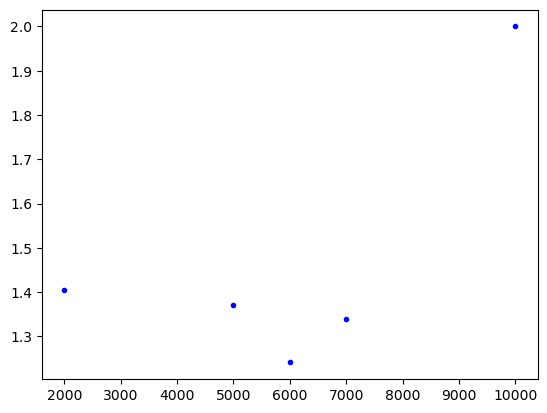

/tmp/ipykernel_1705044/3055371930.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(tick_labels)


[Text(0, 0.0, '0.00'),
 Text(0, 0.25, '0.25'),
 Text(0, 0.5, '0.50'),
 Text(0, 0.75, '0.75'),
 Text(0, 1.0, '1.00'),
 Text(0, 1.25, '1.25'),
 Text(0, 1.5, '1.50'),
 Text(0, 1.75, '1.75'),
 Text(0, 2.0, '*'),
 Text(0, 2.25, '2.25')]

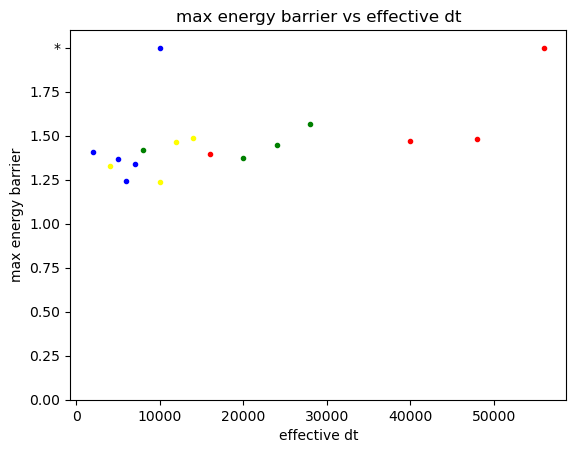

In [52]:
print(max_ys)
n_0, n_1, n_2, n_3 = {},{},{},{}
for radius_name in dict_index_to_radius_name.values():
    keys_with_the_rad = [key for key in max_ys.keys() if key[2] == radius_name]
    for key in keys_with_the_rad:
        effctive_dt = int(key[1])*2**int(key[0])
        if key[0] == 0:
            n_0[effctive_dt] = max_ys[key]
        if key[0] == 1:
            n_1[effctive_dt] = max_ys[key]
        if key[0] == 2:
            n_2[effctive_dt] = max_ys[key]
        if key[0] == 3:
            n_3[effctive_dt] = max_ys[key]
#plot n_0 as blue
n_0[10000] = 2
plt.plot(n_0.keys(),n_0.values(),".",label="n=0",color="blue")
plt.show()
# Assuming your plot setup is as shown
plt.plot(n_0.keys(), n_0.values(), ".", label="n=0", color="blue")
plt.plot(n_1.keys(), n_1.values(), ".", label="n=1", color="yellow")
plt.plot(n_2.keys(), n_2.values(), ".", label="n=2", color="green")
plt.plot(n_3.keys(), n_3.values(), ".", label="n=3", color="red")
plt.xlabel("effective dt")
plt.ylabel("max energy barrier")
plt.title("max energy barrier vs effective dt")
plt.ylim(0, 2.1)

# Add these lines to replace the tick mark at y=2 with an asterisk
current_ticks = plt.gca().get_yticks()
tick_labels = ['*' if '{:.2f}'.format(y) == '2.00' else '{:.2f}'.format(y) for y in current_ticks]
plt.gca().set_yticklabels(tick_labels)

# [key for key in max_ys.keys() if key[2] == radius_name]


In [53]:
dts = [9000,8000,3000,1000,5000,2000,6000,7000]
dts = [2000,6000,7000]
ns=[0,1,2,3]
# ns=[0]
max_ys = {}
dict_of_data = {}
for run_num in range (20):
    print(i)
    for dt in dts:
        for n in ns:
            file_path = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_{n}_{dt}.0_.pkl".format(run_num=run_num,n=n,dt=dt)
            # if not os.path.exists(file_path):
            #     print ("file does not exist",file_path)
            with open(file_path, 'rb') as f:
                simulation_data= pickle.load(f)["location_of_all_diffuse_particles"]
            for mol_size_r in [mol_size_r_8,mol_size_r_10,mol_size_r_12,mol_size_r_14,mol_size_r_16,mol_size_r_18,mol_size_r_20]:
                hist_counts = process_and_generate_histogram(simulation_data, mol_size_r, radius_of_npc=90)
                #if the key exist

                if (n,dt,dict_index_to_radius_name[mol_size_r[0]]) in dict_of_data:
                    dict_of_data[(n,dt,dict_index_to_radius_name[mol_size_r[0]])].append(hist_counts)
                else:
                    dict_of_data[(n,dt,dict_index_to_radius_name[mol_size_r[0]])] = [hist_counts]
for key in dict_of_data.keys():
    data = dict_of_data[key]
    label= key
    max_ys = calc_barrier_energy(data, label,max_ys)


19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19


/tmp/ipykernel_1705044/3671654339.py:10: RuntimeWarning: divide by zero encountered in log
  en = -np.log(sd) * 0.593


/tmp/ipykernel_1705044/1305942077.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(tick_labels)


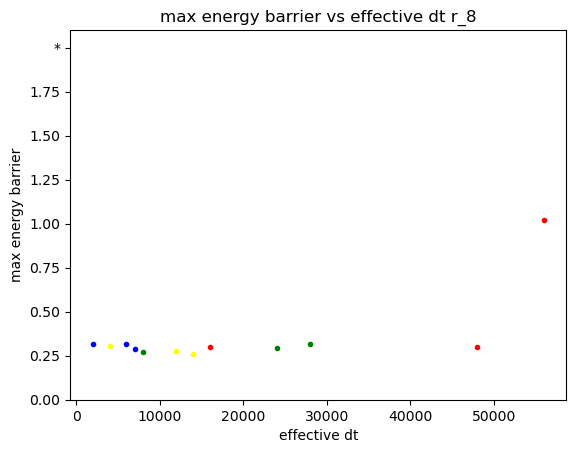

/tmp/ipykernel_1705044/1305942077.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(tick_labels)


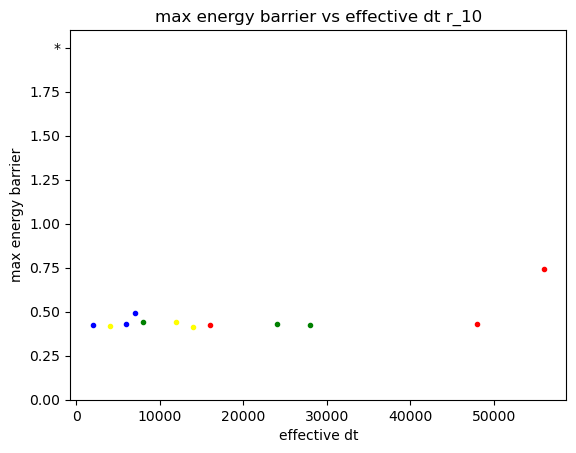

/tmp/ipykernel_1705044/1305942077.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(tick_labels)


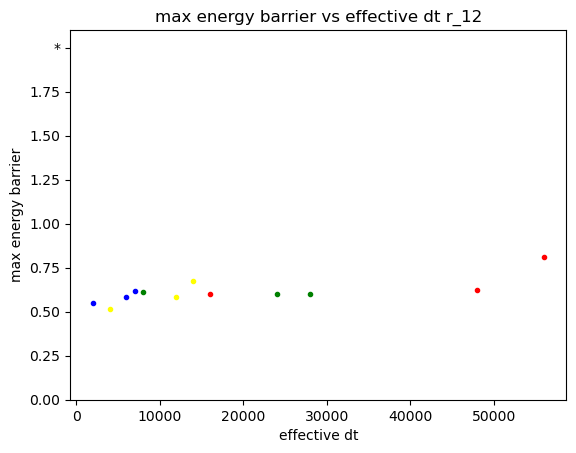

/tmp/ipykernel_1705044/1305942077.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(tick_labels)


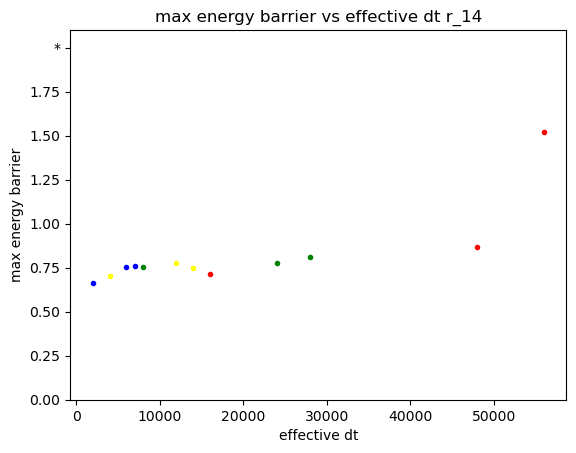

/tmp/ipykernel_1705044/1305942077.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(tick_labels)


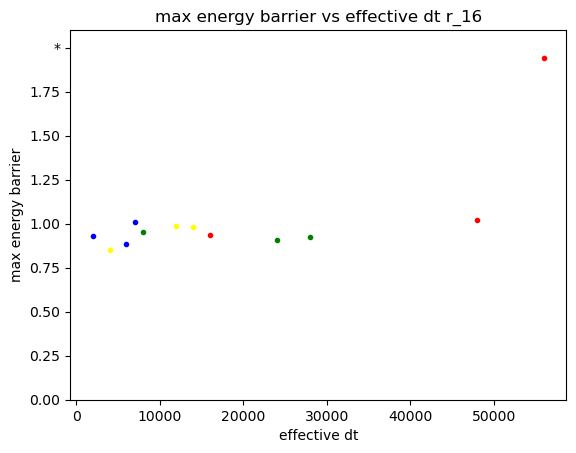

/tmp/ipykernel_1705044/1305942077.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(tick_labels)


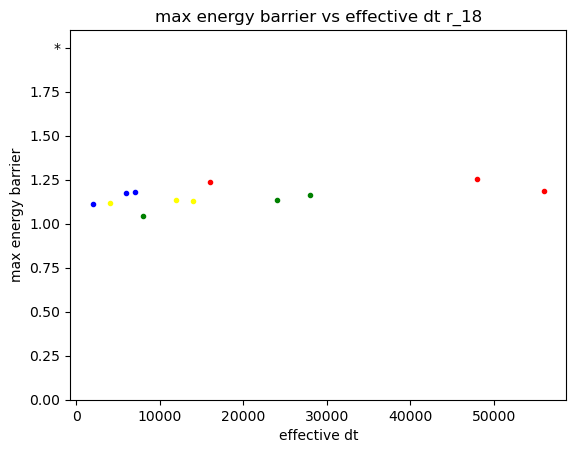

/tmp/ipykernel_1705044/1305942077.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(tick_labels)


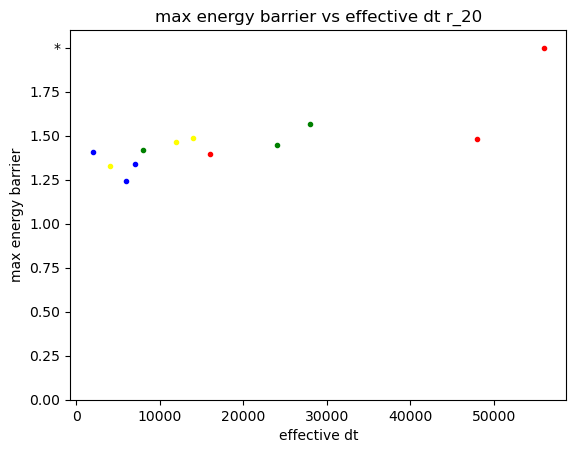

In [54]:
n_0, n_1, n_2, n_3 = {},{},{},{}
for radius_name in dict_index_to_radius_name.values():
    keys_with_the_rad = [key for key in max_ys.keys() if key[2] == radius_name]
    for key in keys_with_the_rad:
        effctive_dt = int(key[1])*2**int(key[0])
        if key[0] == 0:
            n_0[effctive_dt] = max_ys[key]
        if key[0] == 1:
            n_1[effctive_dt] = max_ys[key]
        if key[0] == 2:
            n_2[effctive_dt] = max_ys[key]
        if key[0] == 3:
            n_3[effctive_dt] = max_ys[key]
    #plot n_0 as blue
    plt.plot(n_0.keys(), n_0.values(), ".", label="n=0", color="blue")
    plt.plot(n_1.keys(), n_1.values(), ".", label="n=1", color="yellow")
    plt.plot(n_2.keys(), n_2.values(), ".", label="n=2", color="green")
    plt.plot(n_3.keys(), n_3.values(), ".", label="n=3", color="red")
    plt.xlabel("effective dt")
    plt.ylabel("max energy barrier")
    plt.title("max energy barrier vs effective dt " + radius_name)
    plt.ylim(0, 2.1)

    # Add these lines to replace the tick mark at y=2 with an asterisk
    current_ticks = plt.gca().get_yticks()
    tick_labels = ['*' if '{:.2f}'.format(y) == '2.00' else '{:.2f}'.format(y) for y in current_ticks]
    plt.gca().set_yticklabels(tick_labels)
    plt.show()


skipping 1 1000
skipping 2 1000
skipping 3 1000
skipping 1 9000
skipping 2 9000
skipping 3 9000
skipping 1 1000
skipping 2 1000
skipping 3 1000
skipping 1 9000
skipping 2 9000
skipping 3 9000
skipping 1 1000
skipping 2 1000
skipping 3 1000
skipping 1 9000
skipping 2 9000
skipping 3 9000
skipping 1 1000
skipping 2 1000
skipping 3 1000
skipping 1 9000
skipping 2 9000
skipping 3 9000
skipping 1 1000
skipping 2 1000
skipping 3 1000
skipping 1 9000
skipping 2 9000
skipping 3 9000
skipping 1 1000
skipping 2 1000
skipping 3 1000
skipping 1 9000
skipping 2 9000
skipping 3 9000
skipping 1 1000
skipping 2 1000
skipping 3 1000
skipping 1 9000
skipping 2 9000
skipping 3 9000
skipping 1 1000
skipping 2 1000
skipping 3 1000
skipping 1 9000
skipping 2 9000
skipping 3 9000
skipping 1 1000
skipping 2 1000
skipping 3 1000
skipping 1 9000
skipping 2 9000
skipping 3 9000
skipping 1 1000
skipping 2 1000
skipping 3 1000
skipping 1 9000
skipping 2 9000
skipping 3 9000
skipping 1 1000
skipping 2 1000
skipping

/tmp/ipykernel_1705044/812013389.py:13: RuntimeWarning: divide by zero encountered in log
  en = -np.log(sd) * 0.593


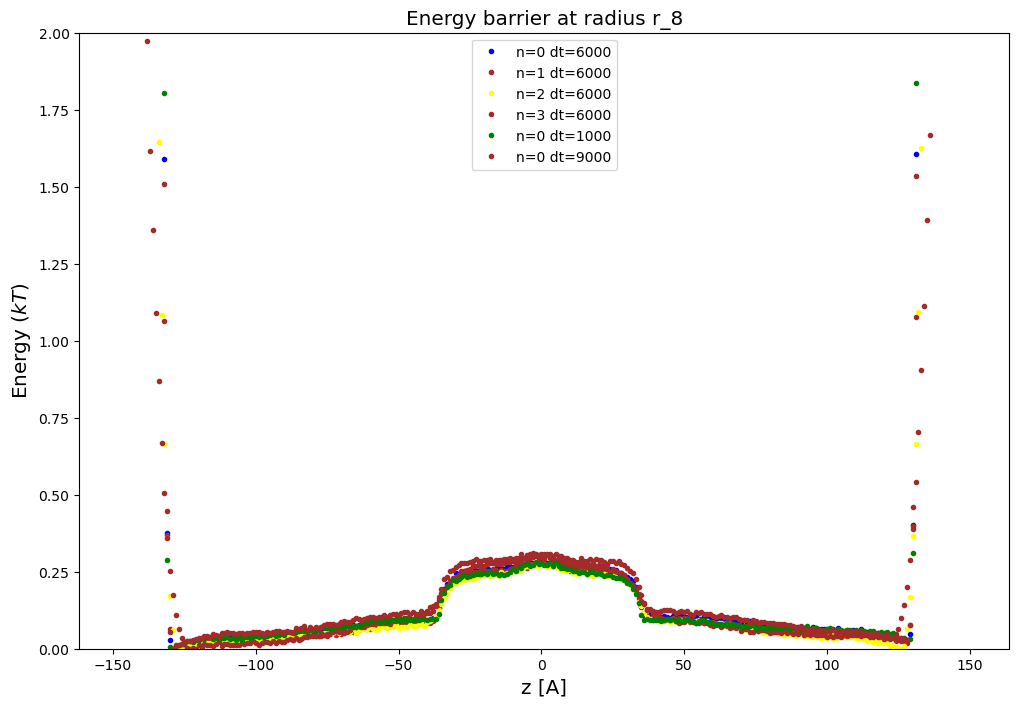

r_10


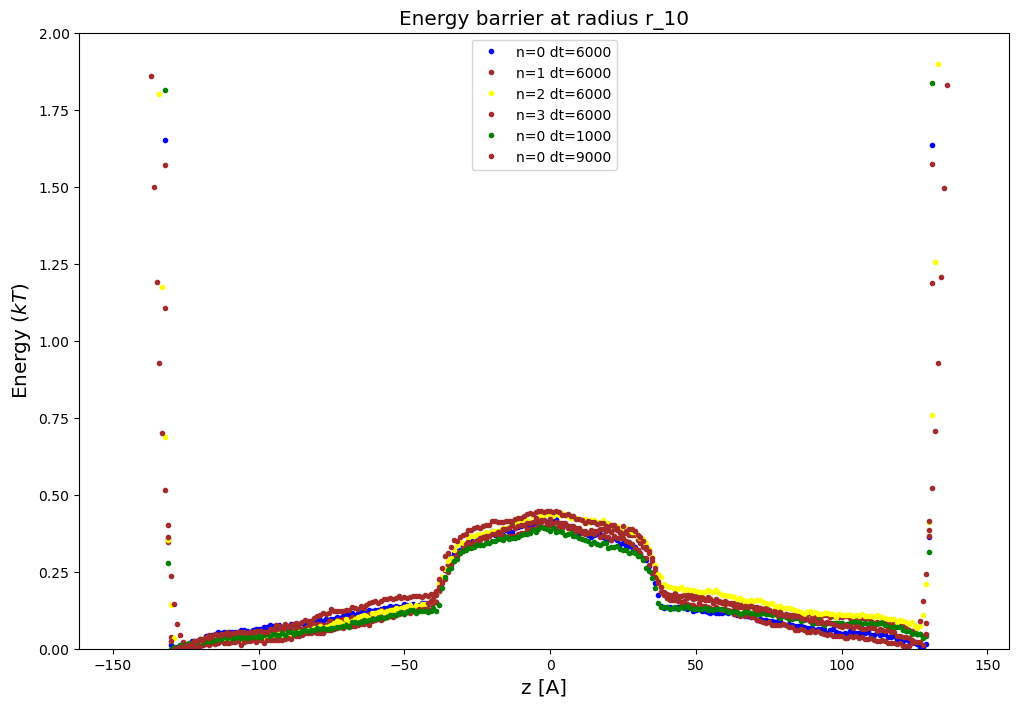

r_12


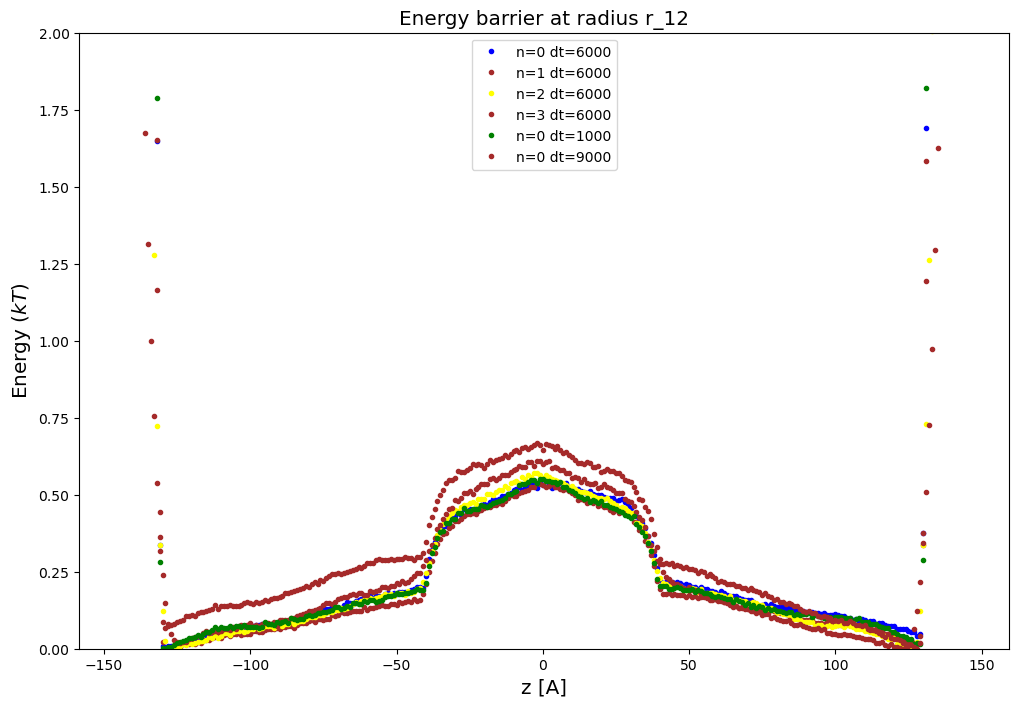

r_14


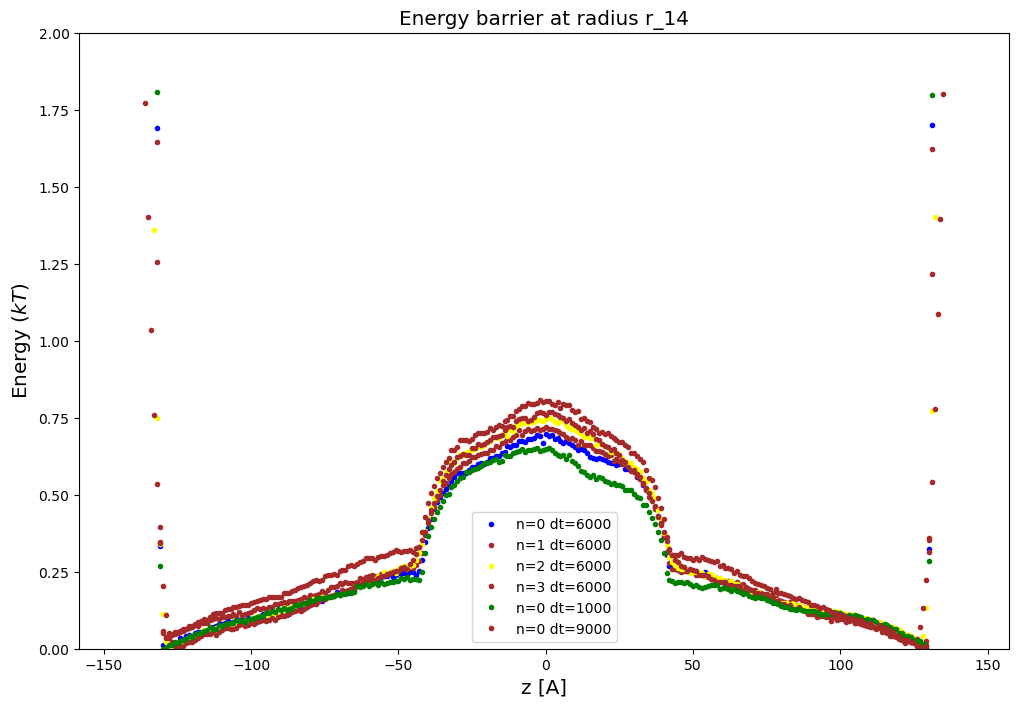

r_16


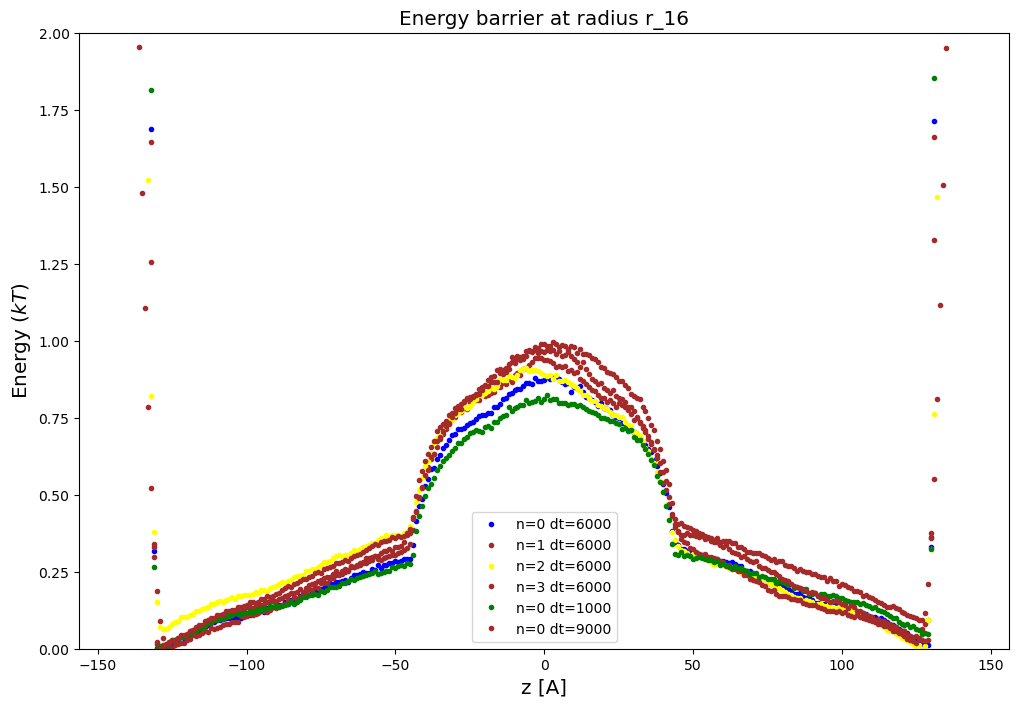

r_18


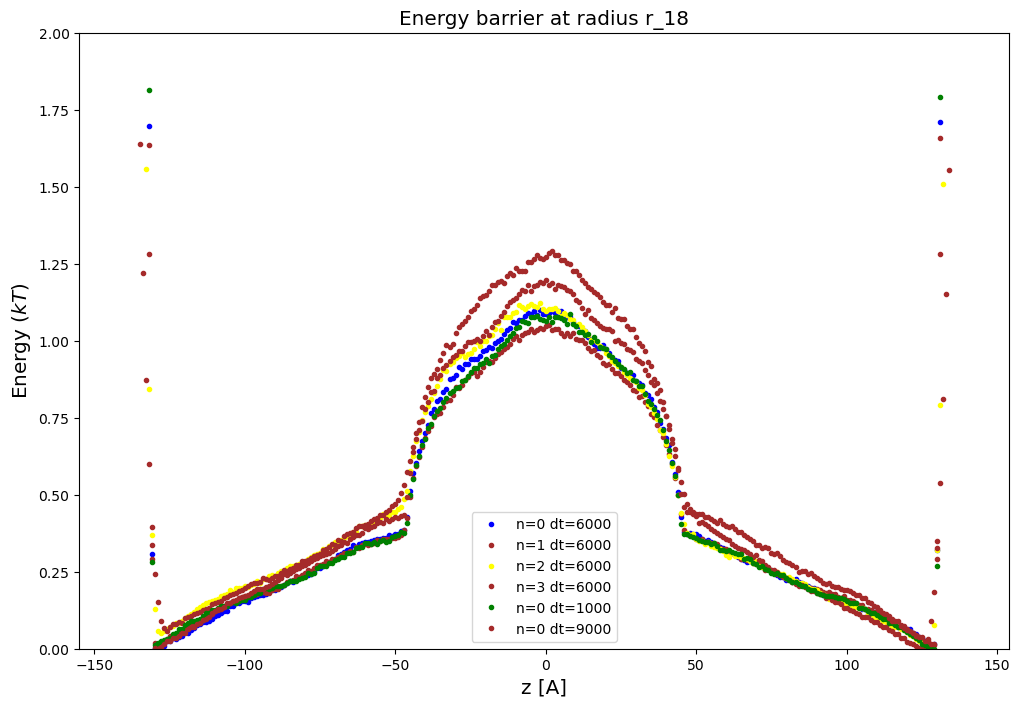

r_20


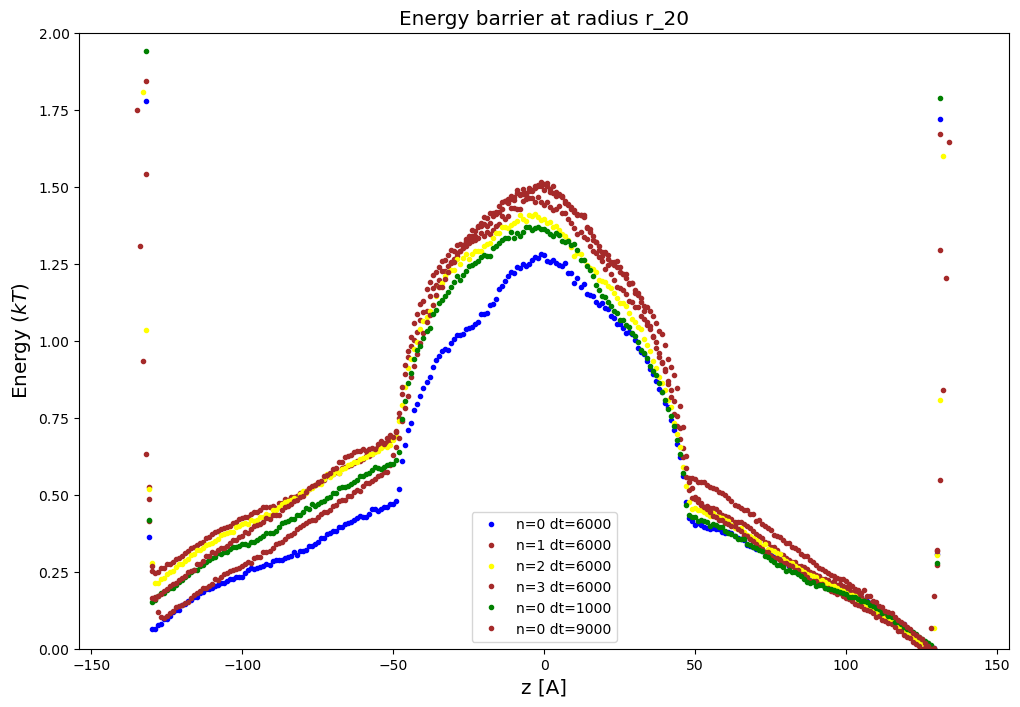

In [55]:

dts = [6000,1000,9000]
ns=[0,1,2,3]
dict_of_data = {}
for run_num in range (80):
    for dt in dts:
        for n in ns:
            if n !=0 and dt != 6000:
                print("skipping",n,dt)
                continue
            file_path = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_{n}_{dt}.0_.pkl".format(run_num=run_num,n=n,dt=dt)
            # if not os.path.exists(file_path):
            #     print ("file does not exist",file_path)
            with open(file_path, 'rb') as f:
                simulation_data= pickle.load(f)["location_of_all_diffuse_particles"]
            for mol_size_r in [mol_size_r_8,mol_size_r_10,mol_size_r_12,mol_size_r_14,mol_size_r_16,mol_size_r_18,mol_size_r_20]:
                hist_counts = process_and_generate_histogram(simulation_data, mol_size_r, radius_of_npc=90)
                #if the key exist

                if (n,dt,dict_index_to_radius_name[mol_size_r[0]]) in dict_of_data:
                    dict_of_data[(n,dt,dict_index_to_radius_name[mol_size_r[0]])].append(hist_counts)
                else:
                    dict_of_data[(n,dt,dict_index_to_radius_name[mol_size_r[0]])] = [hist_counts]


# [key for key in dict_of_data.keys() if key[2] == radius_name]
for radius_name in dict_index_to_radius_name.values():
    datas = []
    labels = []
    colors_to_plot =[]
    keys_with_the_rad = [key for key in dict_of_data.keys() if key[2] == radius_name]
    for key in keys_with_the_rad:
        data = dict_of_data[key]
        datas.append(data)
        label= "n={n} dt={dt}".format(n=key[0],dt=key[1])
        title = "Energy barrier at radius {radius_name}".format(radius_name=radius_name)
        labels.append(label)
        if key[0] == 0 and key[1]==6000:
            colors_to_plot.append("blue")
        if key[0] == 1:
            colors_to_plot.append("yellow")
        if key[0] == 2:
            colors_to_plot.append("green")
        if key[0] == 3:
            colors_to_plot.append("red")
        if key[0] == 0 and key[1]==1000:
            colors_to_plot.append("light blue")
        else:
            colors_to_plot.append("brown")
    print(radius_name)
    # print(colors_to_plot)
    plot(datas, labels,colors_to_plot,title)
    #for every mol_size in key plot the data

    # label= "n={n} dt={dt} mol_size={mol_size}".format(n=key[0],dt=key[1],mol_size=key[2])
    # data = dict_of_data[key]
    # plot([dict_of_data[key]],labels=[label])


# for key in dict_of_data.keys():
#     plt.plot(dict_of_data[key],label=key)
# plt.legend()
# plt.show()

    # print(i)
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_6000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_00_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_1_6000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_11_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_2_6000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_22_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_3_6000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_33_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_9000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_00_9000= pickle.load(f)["location_of_all_diffuse_particles"]
    # # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_6000.0_.pkl".format(run_num=i+2)
    # # with open(file_2, 'rb') as f:
    # #     x_n_000_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_9000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_00_9000= pickle.load(f)["location_of_all_diffuse_particles"]



In [56]:
dict_of_data.keys()



dict_keys([(0, 6000, 'r_8'), (0, 6000, 'r_10'), (0, 6000, 'r_12'), (0, 6000, 'r_14'), (0, 6000, 'r_16'), (0, 6000, 'r_18'), (0, 6000, 'r_20'), (1, 6000, 'r_8'), (1, 6000, 'r_10'), (1, 6000, 'r_12'), (1, 6000, 'r_14'), (1, 6000, 'r_16'), (1, 6000, 'r_18'), (1, 6000, 'r_20'), (2, 6000, 'r_8'), (2, 6000, 'r_10'), (2, 6000, 'r_12'), (2, 6000, 'r_14'), (2, 6000, 'r_16'), (2, 6000, 'r_18'), (2, 6000, 'r_20'), (3, 6000, 'r_8'), (3, 6000, 'r_10'), (3, 6000, 'r_12'), (3, 6000, 'r_14'), (3, 6000, 'r_16'), (3, 6000, 'r_18'), (3, 6000, 'r_20'), (0, 1000, 'r_8'), (0, 1000, 'r_10'), (0, 1000, 'r_12'), (0, 1000, 'r_14'), (0, 1000, 'r_16'), (0, 1000, 'r_18'), (0, 1000, 'r_20'), (0, 9000, 'r_8'), (0, 9000, 'r_10'), (0, 9000, 'r_12'), (0, 9000, 'r_14'), (0, 9000, 'r_16'), (0, 9000, 'r_18'), (0, 9000, 'r_20')])

r_8


/tmp/ipykernel_1705044/812013389.py:13: RuntimeWarning: divide by zero encountered in log
  en = -np.log(sd) * 0.593


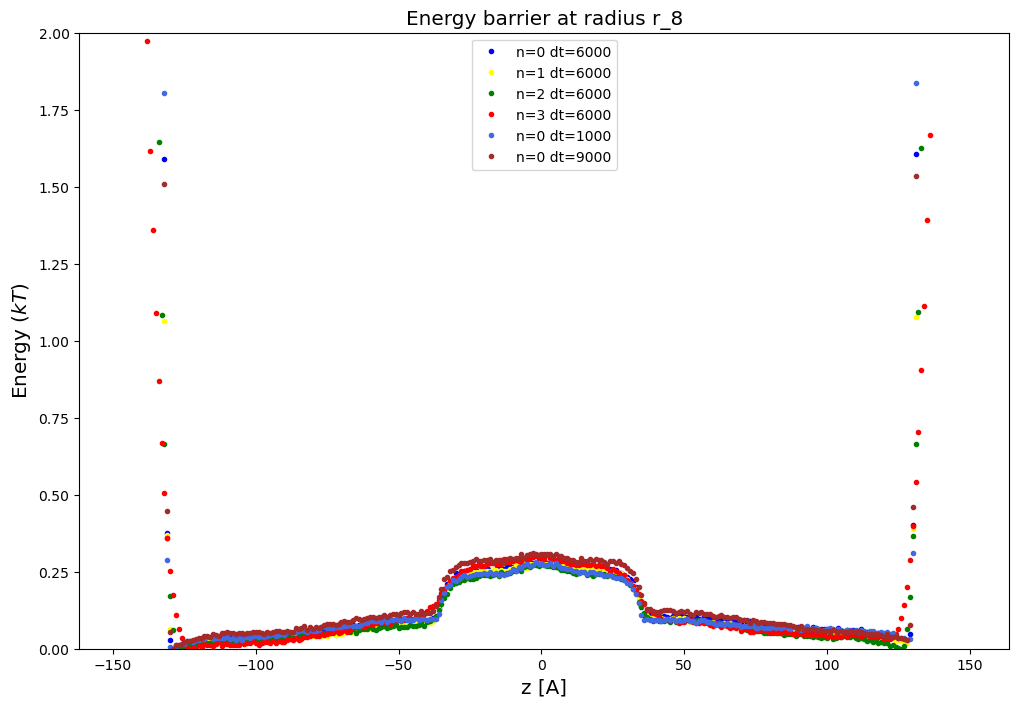

r_10


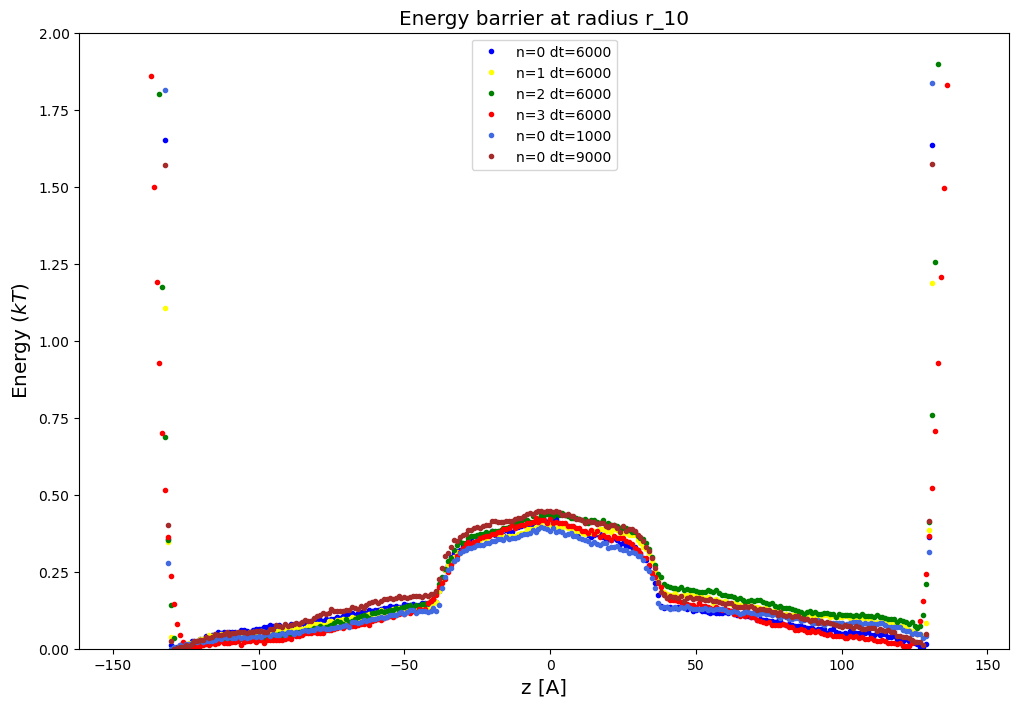

r_12


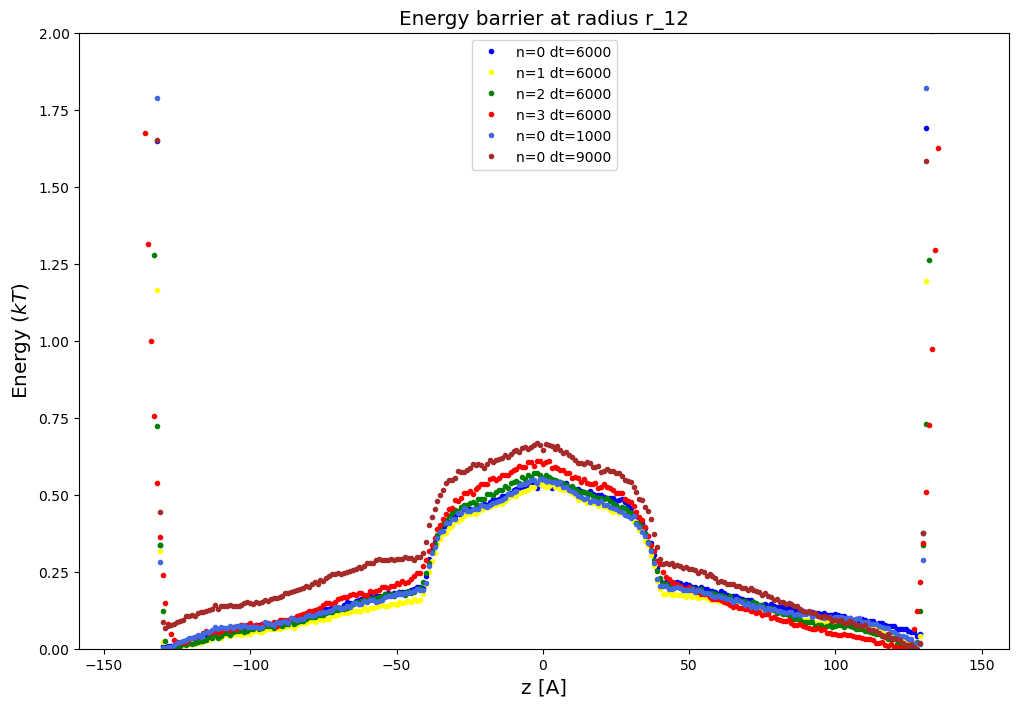

r_14


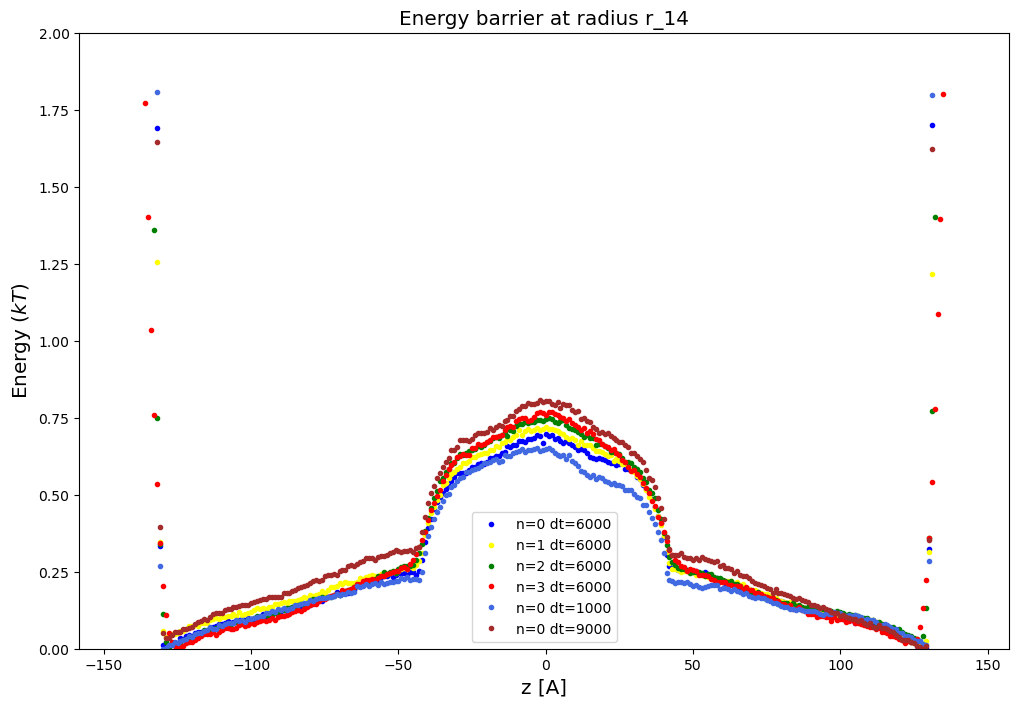

r_16


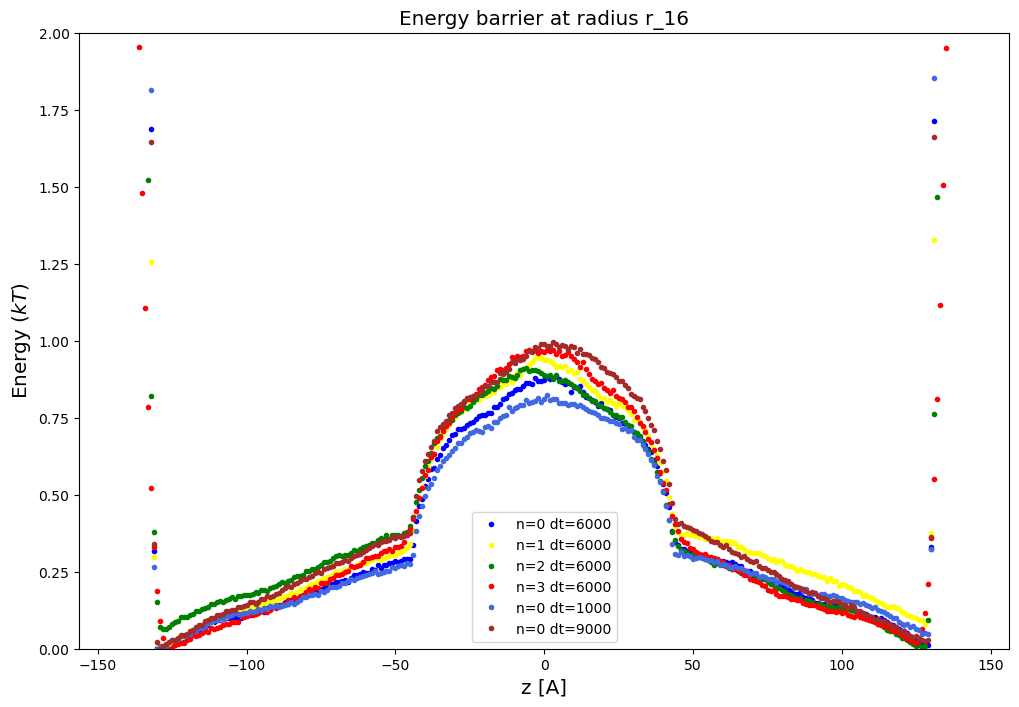

r_18


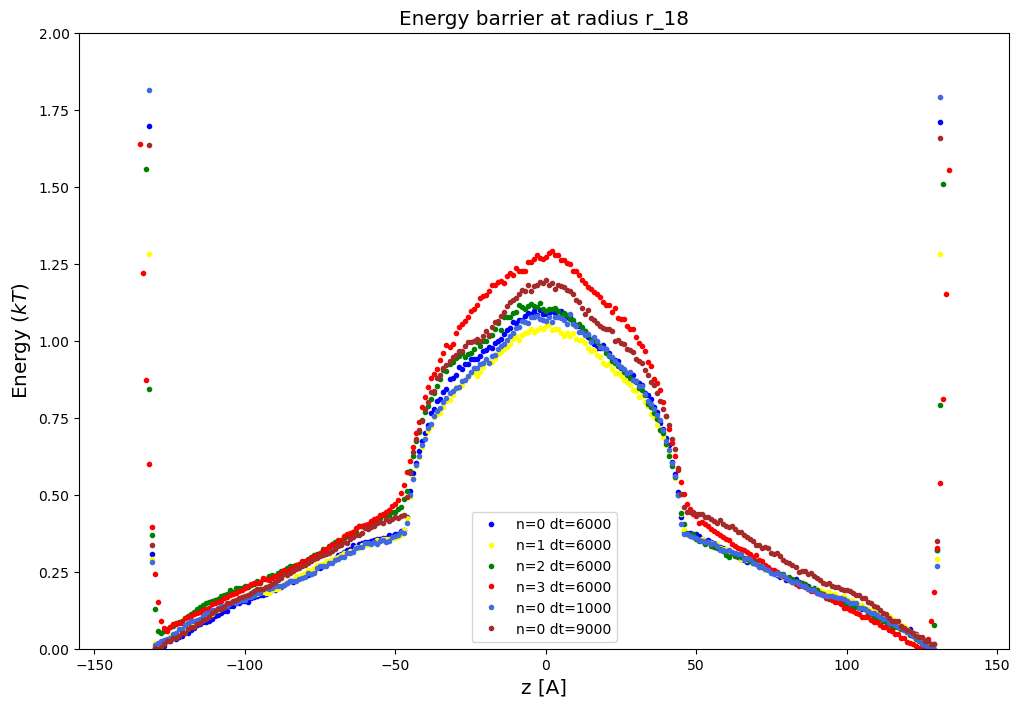

r_20


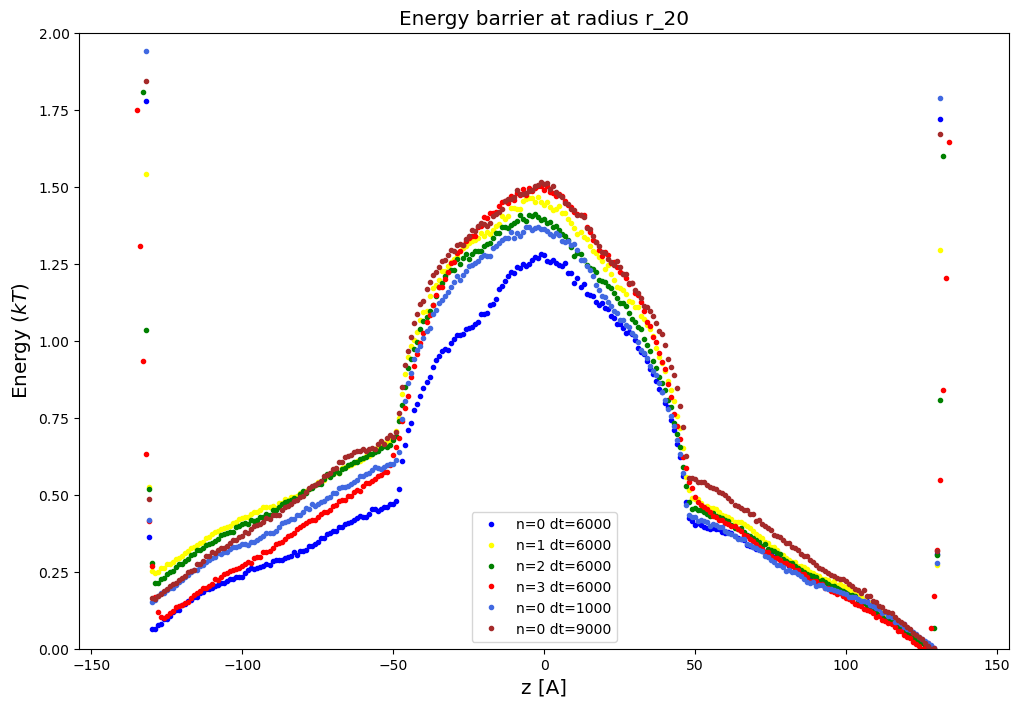

In [57]:
for radius_name in dict_index_to_radius_name.values():
    datas = []
    labels = []
    colors_to_plot =[]
    keys_with_the_rad = [key for key in dict_of_data.keys() if key[2] == radius_name]
    for key in keys_with_the_rad:
        data = dict_of_data[key]
        datas.append(data)
        label= "n={n} dt={dt}".format(n=key[0],dt=key[1])
        title = "Energy barrier at radius {radius_name}".format(radius_name=radius_name)
        labels.append(label)
        if key[0] == 0 and key[1] == 6000:
            colors_to_plot.append("blue")
        if key[0] == 1:
            colors_to_plot.append("yellow")
        if key[0] == 2:
            colors_to_plot.append("green")
        if key[0] == 3:
            colors_to_plot.append("red")
        if key[0] == 0 and key[1] == 1000:
            colors_to_plot.append("royalblue")
        else:
            colors_to_plot.append("brown")
    print(radius_name)
    # print(colors_to_plot)
    # print(len(datas))
    colors_to_plot = ["blue","yellow","green","red","royalblue","brown"]
    plot(datas, labels,colors_to_plot,title)

In [58]:
key[1] ==9000

True

In [59]:

transport_n_0_9000  = []
transport_n_0_6000 = []
transport_n_1_6000 = []
transport_n_2_6000 = []
transport_n_3_6000 = []
transport_n_0_2000  = []
transport_n_0_1000  = []
transport_n_3_5000  = []
transport_n_0_8000 = []
transport_n_0_7000 = []

# transport_n_4_3000 = []
r=transport_n_3 = []
dir_name = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/"
for i in range (0,80):
    file_2=dir_name+"radius_v1_{run_num}_0_6000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_00_6000= pickle.load(f)
    # file_2 = "/cs/usr/reshem/Desktop/Link to MSBD_IMP/NPC_data_half_v6/radius_v1_{run_num}_1_6000.0_.pkl".format(run_num=i+1)
    file_2=dir_name+"radius_v1_{run_num}_1_6000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_11_6000= pickle.load(f)
    # file_2 = "/cs/usr/reshem/Desktop/Link to MSBD_IMP/NPC_data_half_v6/radius_v1_{run_num}_2_6000.0_.pkl".format(run_num=i+1)
    file_2=dir_name+"radius_v1_{run_num}_2_6000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_22_6000= pickle.load(f)
    # file_2 = "/cs/usr/reshem/Desktop/Link to MSBD_IMP/NPC_data_half_v6/radius_v1_{run_num}_3_6000.0_.pkl".format(run_num=i+1)
    file_2=dir_name+"radius_v1_{run_num}_3_6000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_33_6000= pickle.load(f)
    file_2=dir_name+"radius_v1_{run_num}_0_9000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_00_9000= pickle.load(f)
    file_2=dir_name+"radius_v1_{run_num}_0_2000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_00_2000= pickle.load(f)
    file_2=dir_name+"radius_v1_{run_num}_0_1000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_00_1000= pickle.load(f)
    file_2=dir_name+"radius_v1_{run_num}_3_5000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_33_5000= pickle.load(f)
    file_2=dir_name+"radius_v1_{run_num}_0_8000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_00_8000= pickle.load(f)
    file_2=dir_name+"radius_v1_{run_num}_0_7000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_00_7000= pickle.load(f)
    # file_2=dir_name+"radius_v1_{run_num}_4_3000.0_.pkl".format(run_num=i)
    # with open(file_2, 'rb') as f:
    #     x_n_44_3000= pickle.load(f)


    sim_time_00_6000 =x_n_00_6000["total_sim_time"]
    sim_time_00_9000 =x_n_00_9000["total_sim_time"]
    # sim_time_n_4_3000 =x_n_44_3000["total_sim_time"]
    sim_time_n_3_6000 =x_n_33_6000["total_sim_time"]
    sim_time_00_1000 = x_n_00_1000["total_sim_time"]
    sim_time_33_5000 = x_n_33_5000["total_sim_time"]
    sim_time_00_7000 = x_n_00_7000["total_sim_time"]
    sim_time_00_8000 = x_n_00_8000["total_sim_time"]
    # print("sim_time_00_6000",sim_time_00_6000)
    # print("sim_time_00_9000",sim_time_00_9000)
    # # print("sim_time_n_4_3000",sim_time_n_4_3000)
    # print("sim_time_n_3_6000",sim_time_n_3_6000)
    print(i)

    radius = sorted(x_n_00_6000["combined_dict"].keys())
    transport = [x_n_00_6000["combined_dict"][r]for r in radius]
    transport_n_0_6000.append(transport)

    # radius = sorted(x_n_00_9000["combined_dict"].keys())
    # transport = [x_n_00_9000["combined_dict"][r]for r in radius]
    # plot_transport_vs_radius(radius, transport," n=0 9000 [fs]")
    # transport_n_0_9000.append(transport)

    radius = sorted(x_n_11_6000["combined_dict"].keys())
    transport = [x_n_11_6000["combined_dict"][r]for r in radius]
    transport_n_1_6000.append(transport)

    radius = sorted(x_n_22_6000["combined_dict"].keys())
    transport = [x_n_22_6000["combined_dict"][r]for r in radius]
    transport_n_2_6000.append(transport)


    radius = sorted(x_n_33_6000["combined_dict"].keys())
    transport = [x_n_33_6000["combined_dict"][r]for r in radius]
    transport_n_3_6000.append(transport)

    radius = sorted(x_n_00_2000["combined_dict"].keys())
    transport = [x_n_00_2000["combined_dict"][r]for r in radius]
    transport_n_0_2000.append(transport)

    # ratio= sim_time_00_6000 / sim_time_n_4_3000
    # radius = sorted(x_n_44_3000["combined_dict"].keys())
    # transport = [x_n_44_3000["combined_dict"][r]*ratio for r in radius]
    # transport_n_4_3000.append(transport)

    ratio = sim_time_00_6000 / sim_time_00_9000
    radius = sorted(x_n_00_9000["combined_dict"].keys())
    transport = [x_n_00_9000["combined_dict"][r]*ratio for r in radius]
    transport_n_0_9000.append(transport)

    ratio = sim_time_00_6000 / sim_time_00_1000
    radius = sorted(x_n_00_1000["combined_dict"].keys())
    transport = [x_n_00_1000["combined_dict"][r]*ratio for r in radius]
    transport_n_0_1000.append(transport)

    ratio = sim_time_00_6000 / sim_time_33_5000
    radius = sorted(x_n_33_5000["combined_dict"].keys())
    transport = [x_n_33_5000["combined_dict"][r]*ratio for r in radius]
    transport_n_3_5000.append(transport)

    ratio = sim_time_00_6000 / sim_time_00_8000

    radius = sorted(x_n_00_8000["combined_dict"].keys())
    transport = [x_n_00_8000["combined_dict"][r]*ratio for r in radius]
    transport_n_0_8000.append(transport)

    ratio = sim_time_00_6000 / sim_time_00_7000

    radius = sorted(x_n_00_7000["combined_dict"].keys())
    transport = [x_n_00_7000["combined_dict"][r]*ratio for r in radius]
    transport_n_0_7000.append(transport)



#plot the mean values of the transport as a finction of the radius

all_transport_n_0_6000 = [np.mean(np.array(transport_n_0_6000)[:,i]) for i in range(7)]
all_transport_n_1_6000 = [np.mean(np.array(transport_n_1_6000)[:,i]) for i in range(7)]
all_transport_n_2_6000 = [np.mean(np.array(transport_n_2_6000)[:,i]) for i in range(7)]
all_transport_n_3_6000 = [np.mean(np.array(transport_n_3_6000)[:,i]) for i in range(7)]
all_transport_n_0_2000 = [np.mean(np.array(transport_n_0_2000)[:,i]) for i in range(7)]
all_transport_n_0_1000 = [np.mean(np.array(transport_n_0_1000)[:,i]) for i in range(7)]
all_transport_n_0_8000 = [np.mean(np.array(transport_n_0_8000)[:,i]) for i in range(7)]
all_transport_n_0_7000 = [np.mean(np.array(transport_n_0_7000)[:,i]) for i in range(7)]




# all_transport_n_4_3000 = [np.mean(np.array(transport_n_4_3000)[:,i]) for i in range(7)]
all_transport_n_0_9000 = [np.mean(np.array(transport_n_0_9000)[:,i]) for i in range(7)]


# plt.plot(radius,all_transport_n_0_9000,label="n=0 9000 [fs]")





0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79


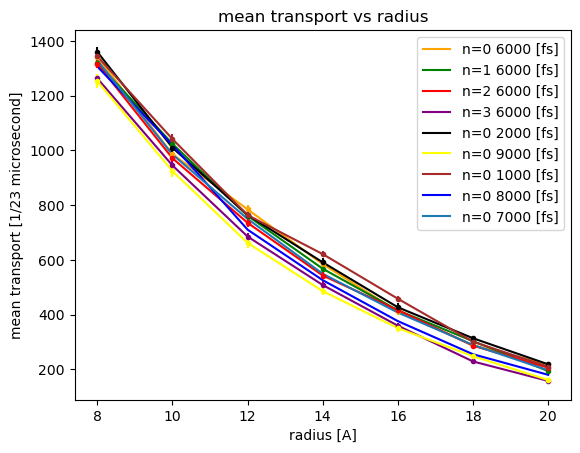

In [60]:
plt.plot(radius,all_transport_n_0_6000,label="n=0 6000 [fs]",color="orange")
plt.plot(radius,all_transport_n_1_6000,label="n=1 6000 [fs]",color="green")
plt.plot(radius,all_transport_n_2_6000,label="n=2 6000 [fs]",color="red")
plt.plot(radius,all_transport_n_3_6000,label="n=3 6000 [fs]",color="purple")
plt.plot(radius,all_transport_n_0_2000,label="n=0 2000 [fs]",color="black")
# plt.plot(radius,all_transport_n_4_3000,label="n=4 3000 [fs]",color="blue")
plt.plot(radius,all_transport_n_0_9000,label="n=0 9000 [fs]",color="yellow")
plt.plot(radius,all_transport_n_0_1000,label="n=0 1000 [fs]",color="brown")
# plt.plot(radius,all_transport_n_3_5000,label="n=3 5000 [fs]",color="purple")
plt.plot(radius,all_transport_n_0_8000,label="n=0 8000 [fs]",color="blue")
plt.plot(radius,all_transport_n_0_7000,label="n=0 7000 [fs]")

plt.errorbar(radius,all_transport_n_0_6000,yerr=[standard_error_of_the_mean(np.array(transport_n_0_6000)[:,i]) for i in range(7)],fmt='.',color="orange")
plt.errorbar(radius,all_transport_n_1_6000,yerr=[standard_error_of_the_mean(np.array(transport_n_1_6000)[:,i]) for i in range(7)],fmt='.',color="green")
plt.errorbar(radius,all_transport_n_2_6000,yerr=[standard_error_of_the_mean(np.array(transport_n_2_6000)[:,i]) for i in range(7)],fmt='.',color="red")
plt.errorbar(radius,all_transport_n_3_6000,yerr=[standard_error_of_the_mean(np.array(transport_n_3_6000)[:,i]) for i in range(7)],fmt='.',color="purple")
plt.errorbar(radius,all_transport_n_0_2000,yerr=[standard_error_of_the_mean(np.array(transport_n_0_2000)[:,i]) for i in range(7)],fmt='.',color="black")
plt.errorbar(radius,all_transport_n_0_9000,yerr=[standard_error_of_the_mean(np.array(transport_n_0_9000)[:,i]) for i in range(7)],fmt='.',color="yellow")
plt.errorbar(radius,all_transport_n_0_1000,yerr=[standard_error_of_the_mean(np.array(transport_n_0_1000)[:,i]) for i in range(7)],fmt='.',color="brown")



plt.legend()
plt.xlabel("radius [A]")
plt.ylabel("mean transport [1/23 microsecond]")
plt.title("mean transport vs radius")


plt.show()
# sim_time_00_6000 / sim_time_33_5000

In [61]:
# log_all_transport_n_3_5000 = np.log(all_transport_n_3_5000)
# log_all_transport_n_0_6000 = np.log(all_transport_n_0_2000)
# log_all_transport_n_3_6000 = np.log(all_transport_n_3_6000)
# plt.plot(radius, log_all_transport_n_3_5000,  label="n=3 5000 [fs]", color="purple")
# plt.plot(radius, log_all_transport_n_0_6000,  label="n=0 6000 [fs]", color="orange")
# plt.plot(radius, log_all_transport_n_3_6000,  label="n=3 6000 [fs]", color="red")

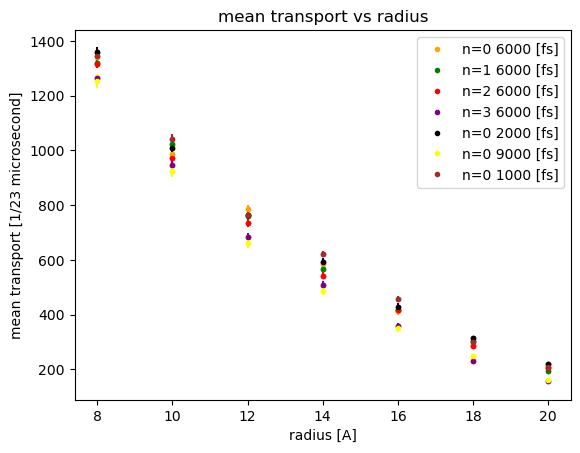

In [62]:
# plt.plot(radius,all_transport_n_0_9000,label="n=0 9000 [fs]")
plt.plot(radius,all_transport_n_0_6000,".",label="n=0 6000 [fs]",color="orange")
plt.plot(radius,all_transport_n_1_6000,".",label="n=1 6000 [fs]",color="green")
plt.plot(radius,all_transport_n_2_6000,".",label="n=2 6000 [fs]",color="red")
plt.plot(radius,all_transport_n_3_6000,".",label="n=3 6000 [fs]",color="purple")
plt.plot(radius,all_transport_n_0_2000,".",label="n=0 2000 [fs]",color="black")
# plt.plot(radius,all_transport_n_4_3000,label="n=4 3000 [fs]",color="blue")
plt.plot(radius,all_transport_n_0_9000,".",label="n=0 9000 [fs]",color="yellow")
plt.plot(radius,all_transport_n_0_1000,".",label="n=0 1000 [fs]",color="brown")

plt.errorbar(radius,all_transport_n_0_6000,yerr=[standard_error_of_the_mean(np.array(transport_n_0_6000)[:,i]) for i in range(7)],fmt='.',color="orange")
plt.errorbar(radius,all_transport_n_1_6000,yerr=[standard_error_of_the_mean(np.array(transport_n_1_6000)[:,i]) for i in range(7)],fmt='.',color="green")
plt.errorbar(radius,all_transport_n_2_6000,yerr=[standard_error_of_the_mean(np.array(transport_n_2_6000)[:,i]) for i in range(7)],fmt='.',color="red")
plt.errorbar(radius,all_transport_n_3_6000,yerr=[standard_error_of_the_mean(np.array(transport_n_3_6000)[:,i]) for i in range(7)],fmt='.',color="purple")
plt.errorbar(radius,all_transport_n_0_2000,yerr=[standard_error_of_the_mean(np.array(transport_n_0_2000)[:,i]) for i in range(7)],fmt='.',color="black")
plt.errorbar(radius,all_transport_n_0_9000,yerr=[standard_error_of_the_mean(np.array(transport_n_0_9000)[:,i]) for i in range(7)],fmt='.',color="yellow")
plt.errorbar(radius,all_transport_n_0_1000,yerr=[standard_error_of_the_mean(np.array(transport_n_0_1000)[:,i]) for i in range(7)],fmt='.',color="brown")



plt.legend()
plt.xlabel("radius [A]")
plt.ylabel("mean transport [1/23 microsecond]")
plt.title("mean transport vs radius")


plt.show()



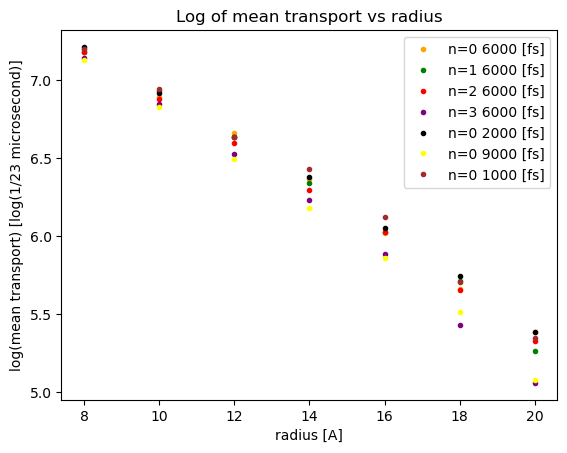

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the logarithm of the transport values
log_all_transport_n_0_6000 = np.log(all_transport_n_0_6000)
log_all_transport_n_1_6000 = np.log(all_transport_n_1_6000)
log_all_transport_n_2_6000 = np.log(all_transport_n_2_6000)
log_all_transport_n_3_6000 = np.log(all_transport_n_3_6000)
log_all_transport_n_0_2000 = np.log(all_transport_n_0_2000)
log_all_transport_n_0_9000 = np.log(all_transport_n_0_9000)
log_all_transport_n_0_1000 = np.log(all_transport_n_0_1000)

# Plot the logarithmically transformed values
plt.plot(radius, log_all_transport_n_0_6000, ".", label="n=0 6000 [fs]", color="orange")
plt.plot(radius, log_all_transport_n_1_6000, ".", label="n=1 6000 [fs]", color="green")
plt.plot(radius, log_all_transport_n_2_6000, ".", label="n=2 6000 [fs]", color="red")
plt.plot(radius, log_all_transport_n_3_6000, ".", label="n=3 6000 [fs]", color="purple")
plt.plot(radius, log_all_transport_n_0_2000, ".", label="n=0 2000 [fs]", color="black")
plt.plot(radius, log_all_transport_n_0_9000, ".", label="n=0 9000 [fs]", color="yellow")
plt.plot(radius, log_all_transport_n_0_1000, ".", label="n=0 1000 [fs]", color="brown")

plt.legend()
plt.xlabel("radius [A]")
plt.ylabel("log(mean transport) [log(1/23 microsecond)]")
plt.title("Log of mean transport vs radius")

plt.show()


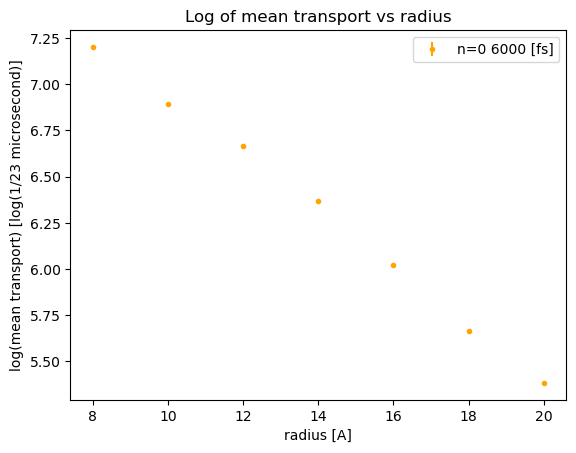

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate SEM or retrieve it; placeholder for illustration
def standard_error_of_the_mean(data):
    return np.std(data, ddof=1) / np.sqrt(len(data))

# Function to adjust SEM for log scale
def adjust_sem_for_log(values, sem):
    """Adjust SEM for values that will be plotted on a log scale."""
    # Protect against division by zero or negative values
    values = np.array(values)
    valid_values = values > 0
    adjusted_sem = np.zeros_like(values)
    adjusted_sem[valid_values] = sem[valid_values] / values[valid_values]
    return adjusted_sem

# Assuming 'radius' and 'all_transport_n_*_*' are your data arrays

# Calculate SEM for each dataset; this is a placeholder and should be replaced with your actual SEM calculation
# For illustration, using a dummy SEM value
dummy_sem = 0.1  # Placeholder SEM value, replace with your SEM calculations

# Convert mean transport values and SEM to logarithmic scale
log_all_transport_n_0_6000 = np.log(all_transport_n_0_6000)
log_sem_n_0_6000 = adjust_sem_for_log(all_transport_n_0_6000, np.full_like(all_transport_n_0_6000, dummy_sem))

# Repeat for other datasets...
# Make sure to calculate and adjust the SEM for each dataset as needed

# Plotting log-transformed values with adjusted SEM
plt.errorbar(radius, log_all_transport_n_0_6000, yerr=log_sem_n_0_6000, fmt='.', color="orange", label="n=0 6000 [fs]")
# Repeat errorbar plots for other datasets...

plt.legend()
plt.xlabel("radius [A]")
plt.ylabel("log(mean transport) [log(1/23 microsecond)]")
plt.title("Log of mean transport vs radius")

plt.show()


r_8


/tmp/ipykernel_1705044/812013389.py:13: RuntimeWarning: divide by zero encountered in log
  en = -np.log(sd) * 0.593


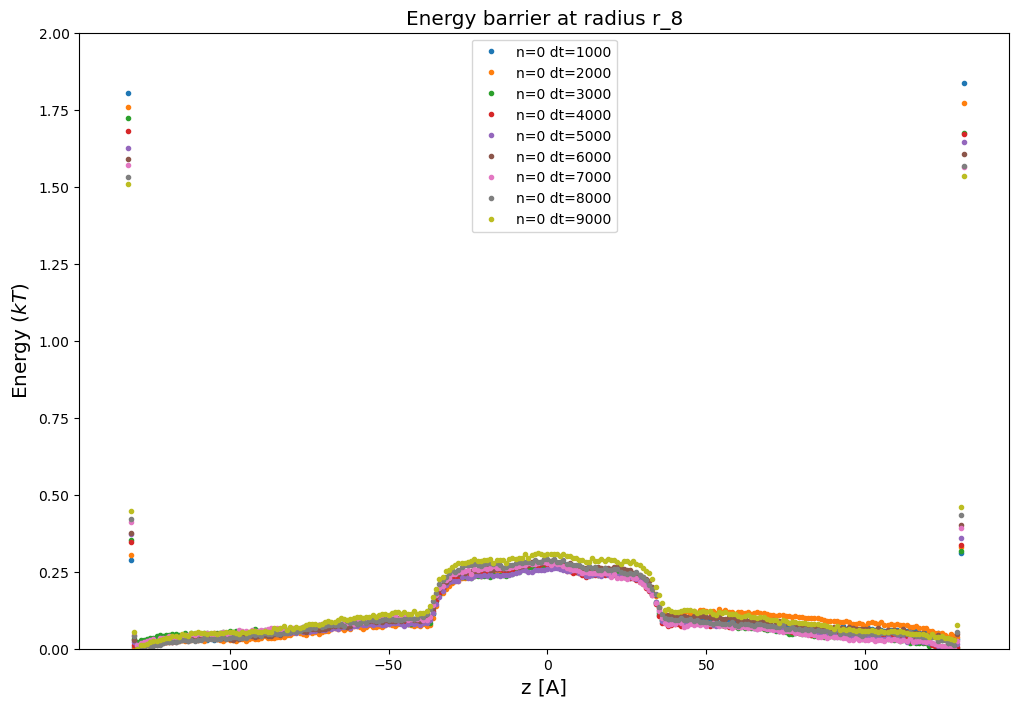

r_10


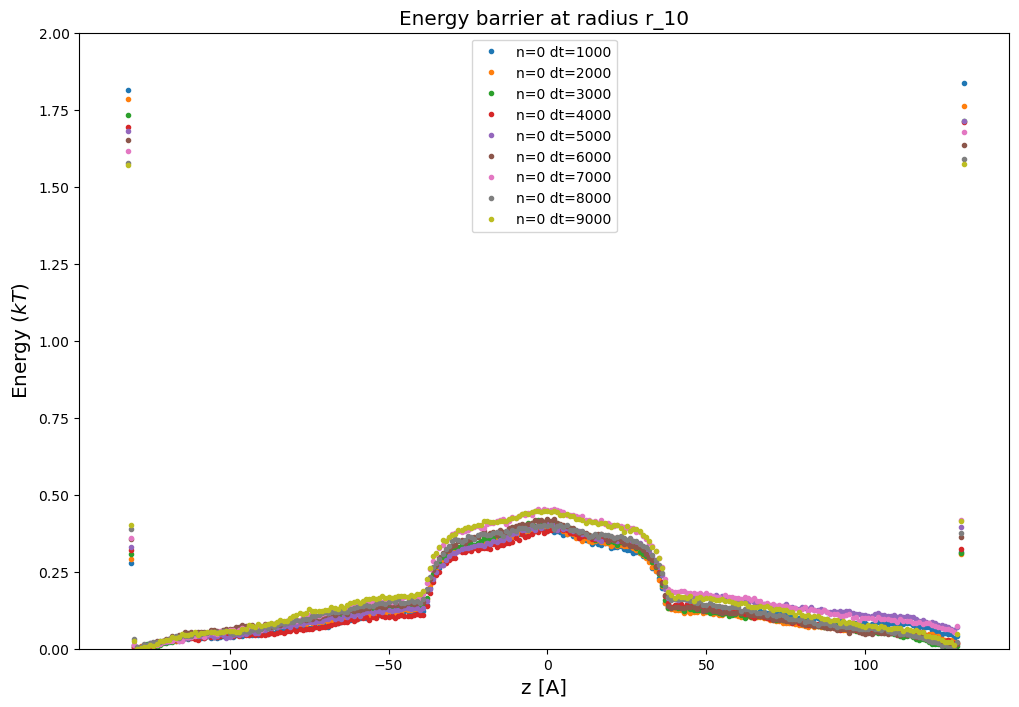

r_12


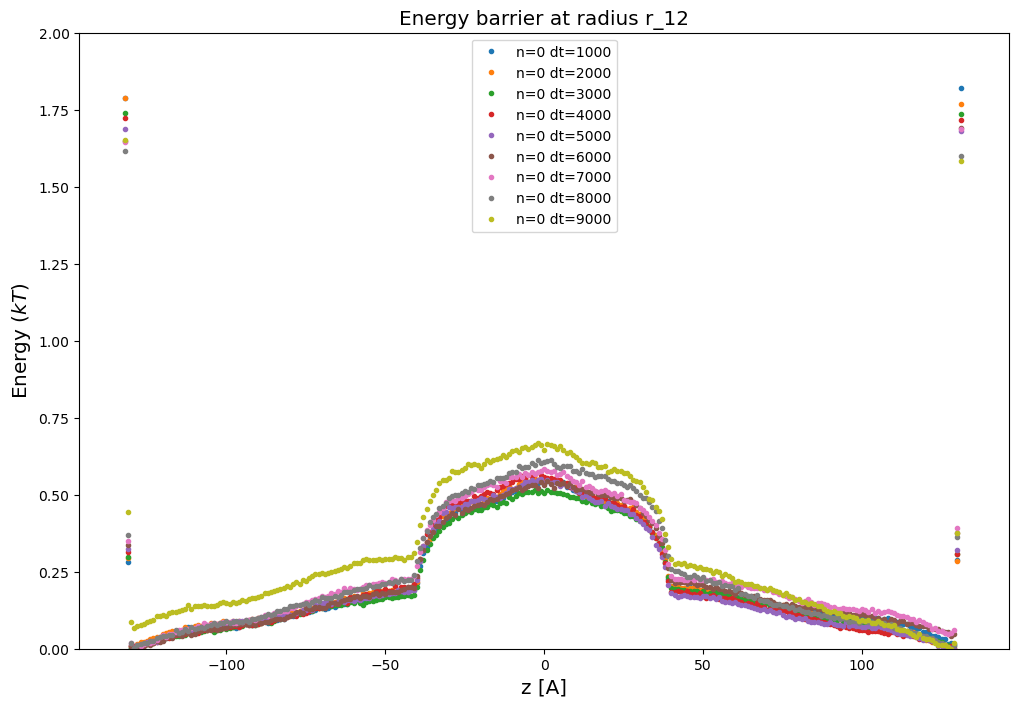

r_14


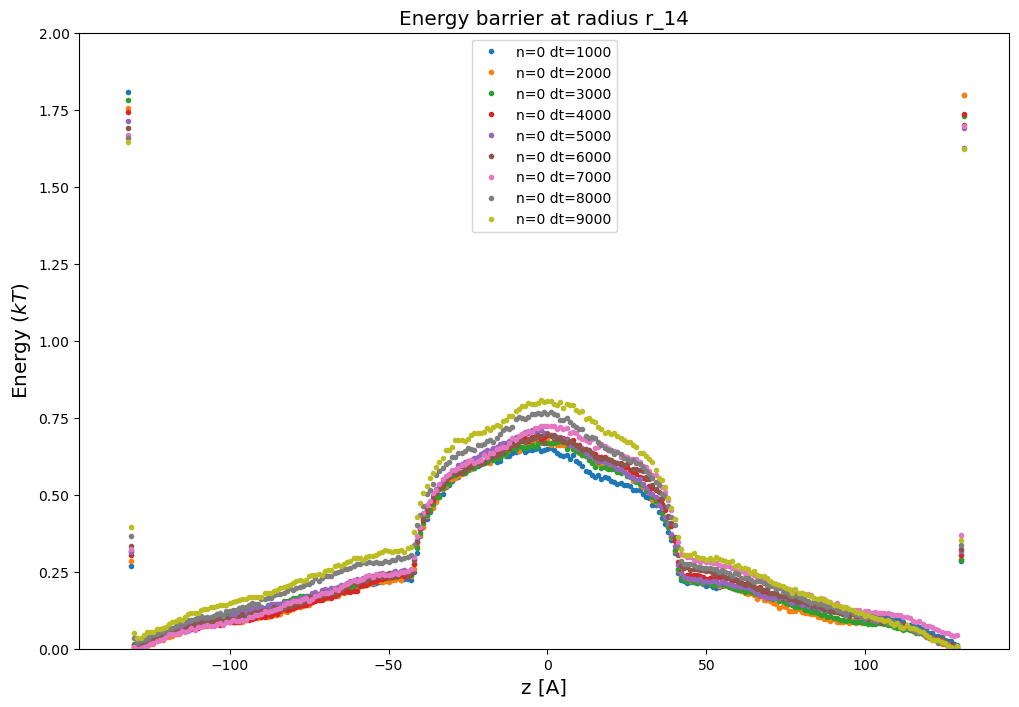

r_16


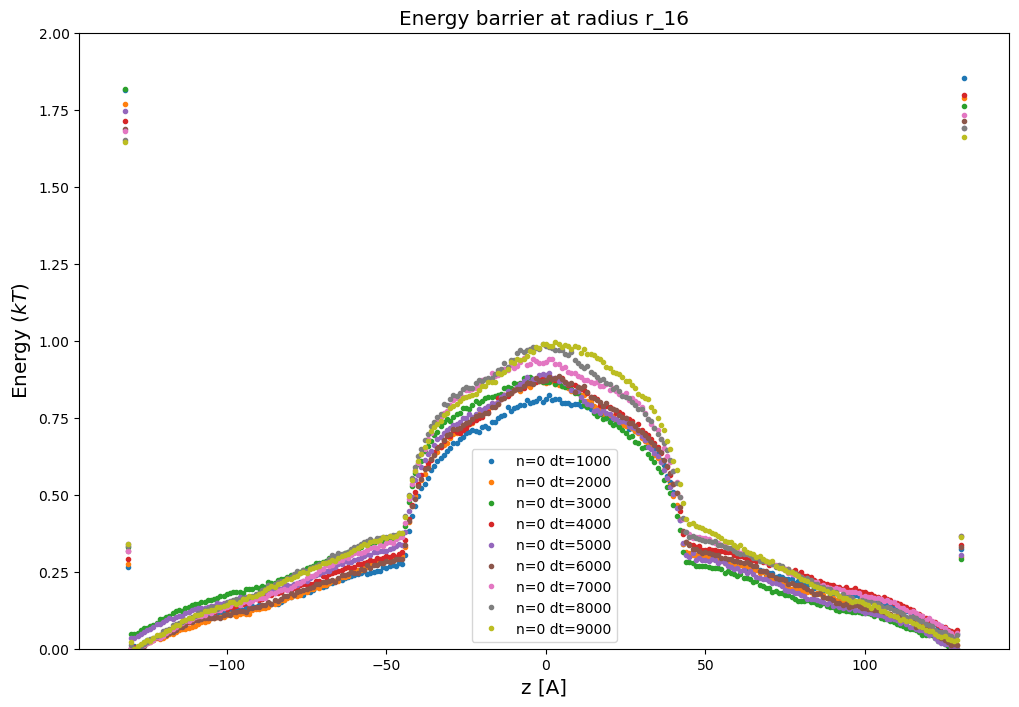

r_18


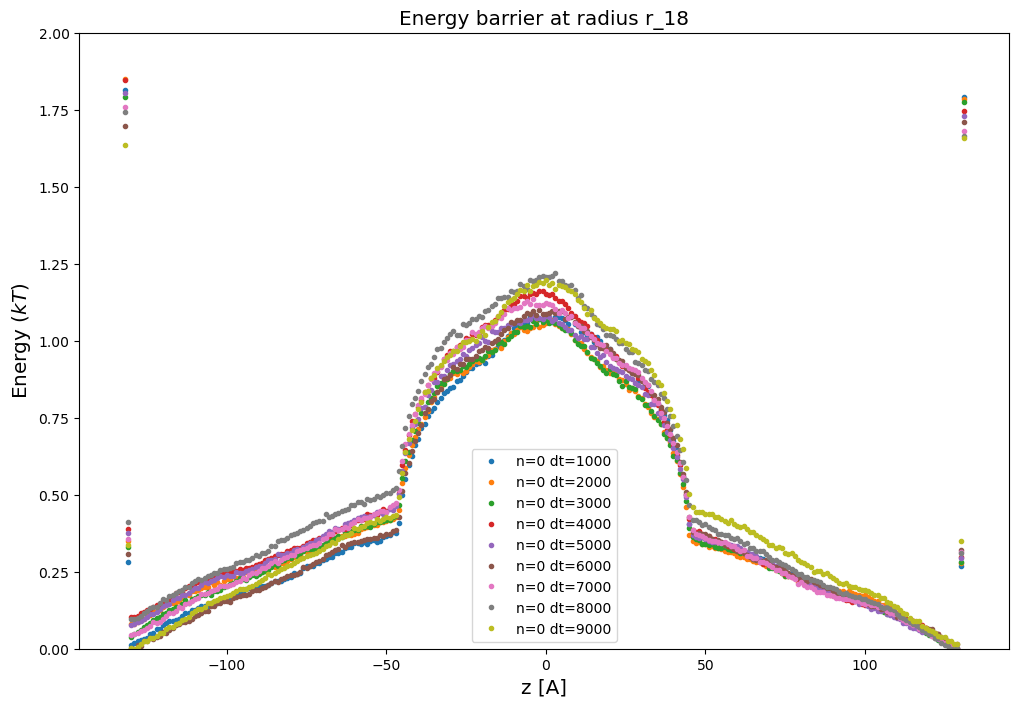

r_20


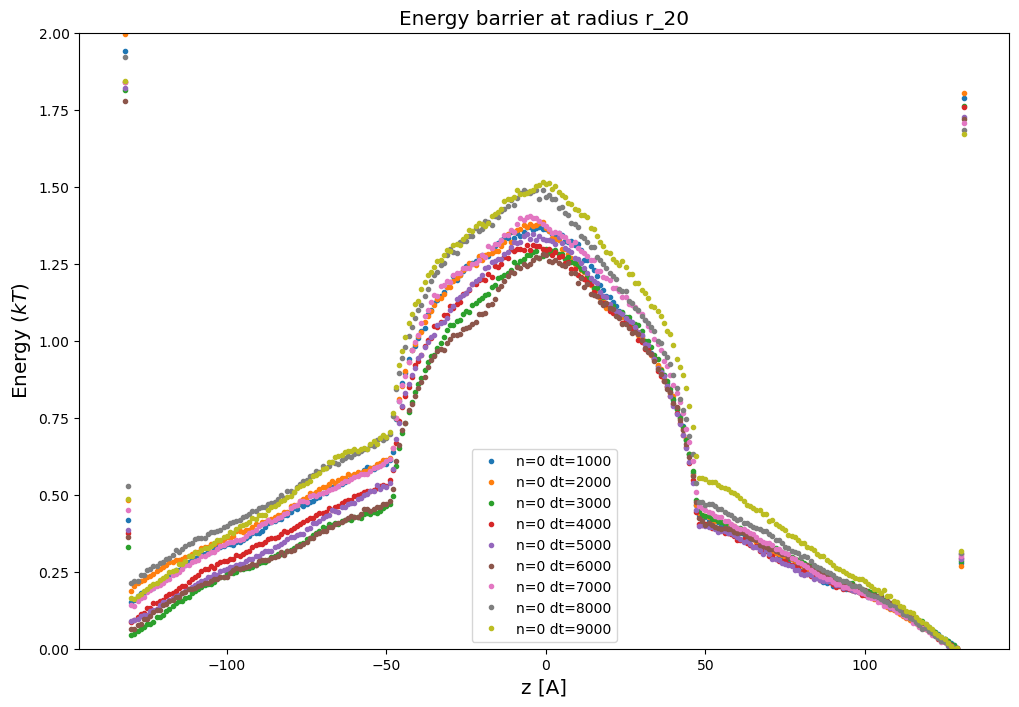

In [65]:

dts = [1000,2000,3000,4000,5000,6000,7000,8000,9000]
ns=[0]
dict_of_data = {}
for run_num in range (80):
    for dt in dts:
        for n in ns:
            # if n !=0 and dt != 6000:
            #     print("skipping",n,dt)
            #     continue
            file_path = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_{n}_{dt}.0_.pkl".format(run_num=run_num,n=n,dt=dt)
            # if not os.path.exists(file_path):
            #     print ("file does not exist",file_path)
            with open(file_path, 'rb') as f:
                simulation_data= pickle.load(f)["location_of_all_diffuse_particles"]
            for mol_size_r in [mol_size_r_8,mol_size_r_10,mol_size_r_12,mol_size_r_14,mol_size_r_16,mol_size_r_18,mol_size_r_20]:
                hist_counts = process_and_generate_histogram(simulation_data, mol_size_r, radius_of_npc=90)
                #if the key exist

                if (n,dt,dict_index_to_radius_name[mol_size_r[0]]) in dict_of_data:
                    dict_of_data[(n,dt,dict_index_to_radius_name[mol_size_r[0]])].append(hist_counts)
                else:
                    dict_of_data[(n,dt,dict_index_to_radius_name[mol_size_r[0]])] = [hist_counts]


# [key for key in dict_of_data.keys() if key[2] == radius_name]
for radius_name in dict_index_to_radius_name.values():
    datas = []
    labels = []
    colors_to_plot =[]
    keys_with_the_rad = [key for key in dict_of_data.keys() if key[2] == radius_name]
    for key in keys_with_the_rad:
        data = dict_of_data[key]
        datas.append(data)
        label= "n={n} dt={dt}".format(n=key[0],dt=key[1])
        title = "Energy barrier at radius {radius_name}".format(radius_name=radius_name)
        labels.append(label)
        if key[0] == 0 and key[1]==6000:
            colors_to_plot.append("blue")
        if key[0] == 1:
            colors_to_plot.append("yellow")
        if key[0] == 2:
            colors_to_plot.append("green")
        if key[0] == 3:
            colors_to_plot.append("red")
        if key[0] == 0 and key[1]==1000:
            colors_to_plot.append("light blue")
        else:
            colors_to_plot.append("brown")
    print(radius_name)
    # print(colors_to_plot)
    plot(datas, labels,None,title)
    #for every mol_size in key plot the data

    # label= "n={n} dt={dt} mol_size={mol_size}".format(n=key[0],dt=key[1],mol_size=key[2])
    # data = dict_of_data[key]
    # plot([dict_of_data[key]],labels=[label])


# for key in dict_of_data.keys():
#     plt.plot(dict_of_data[key],label=key)
# plt.legend()
# plt.show()

    # print(i)
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_6000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_00_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_1_6000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_11_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_2_6000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_22_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_3_6000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_33_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_9000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_00_9000= pickle.load(f)["location_of_all_diffuse_particles"]
    # # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_6000.0_.pkl".format(run_num=i+2)
    # # with open(file_2, 'rb') as f:
    # #     x_n_000_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_9000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_00_9000= pickle.load(f)["location_of_all_diffuse_particles"]



r_8


/tmp/ipykernel_1705044/812013389.py:13: RuntimeWarning: divide by zero encountered in log
  en = -np.log(sd) * 0.593


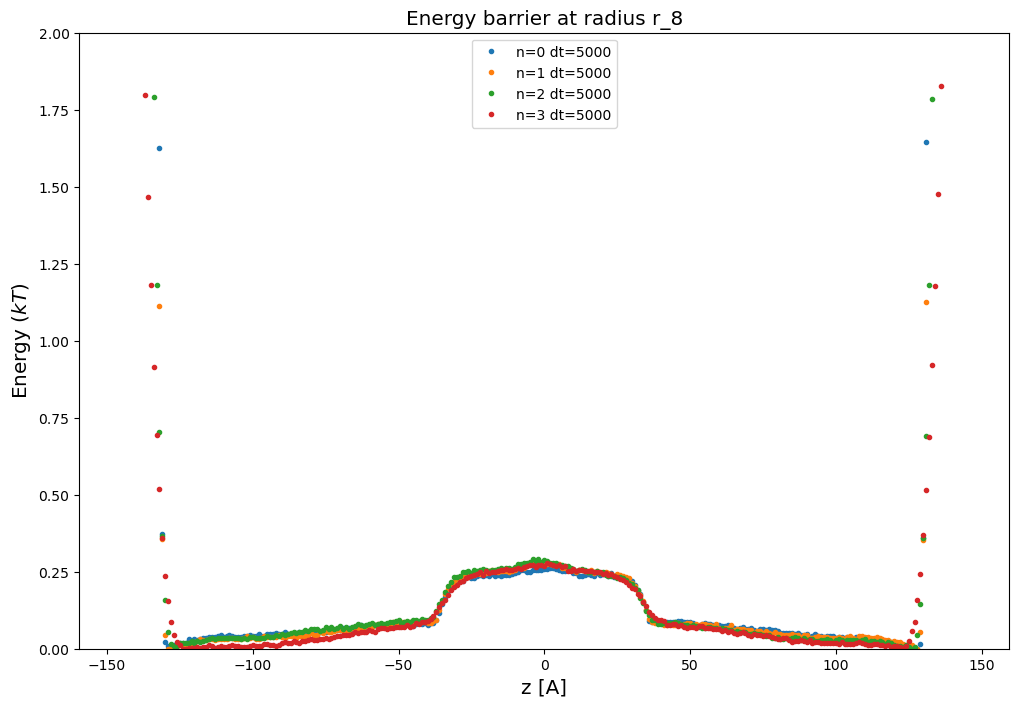

r_10


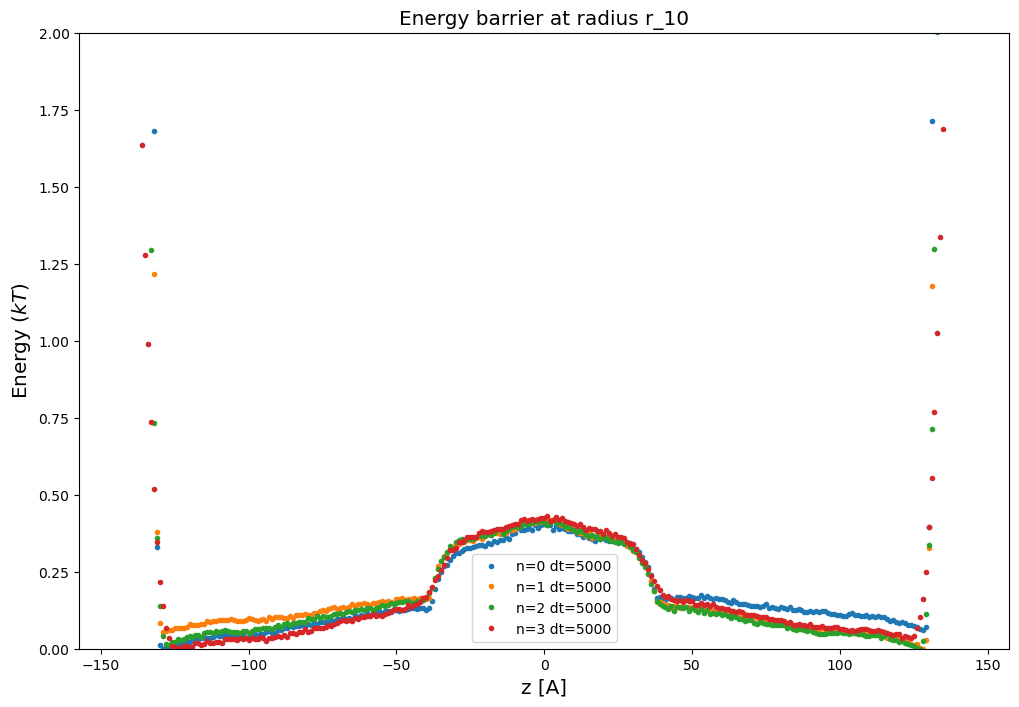

r_12


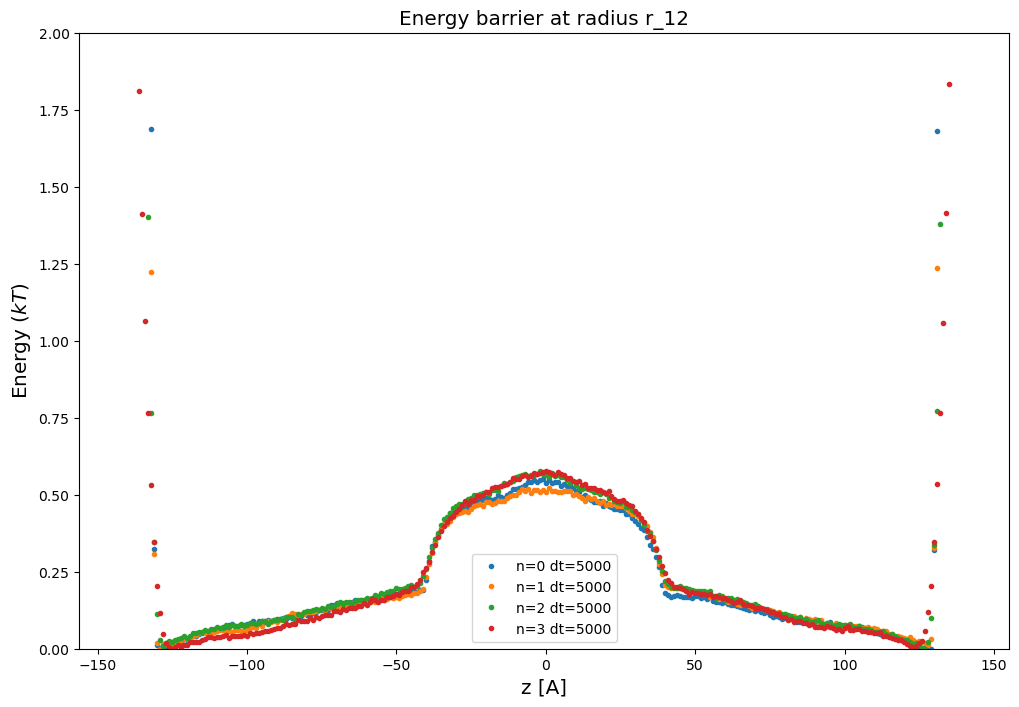

r_14


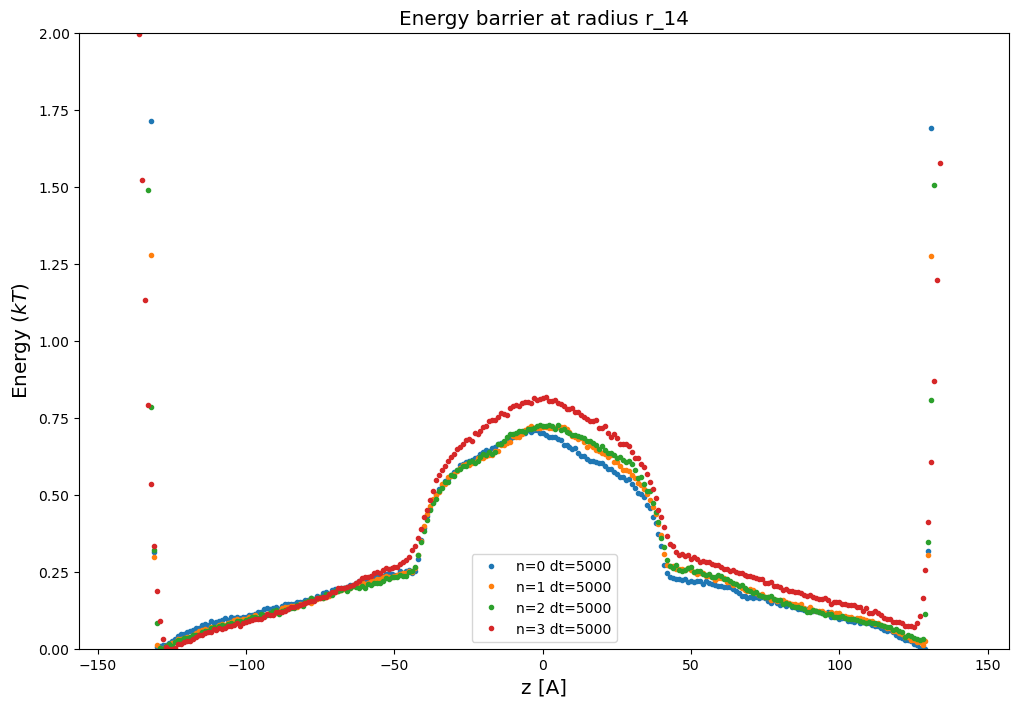

r_16


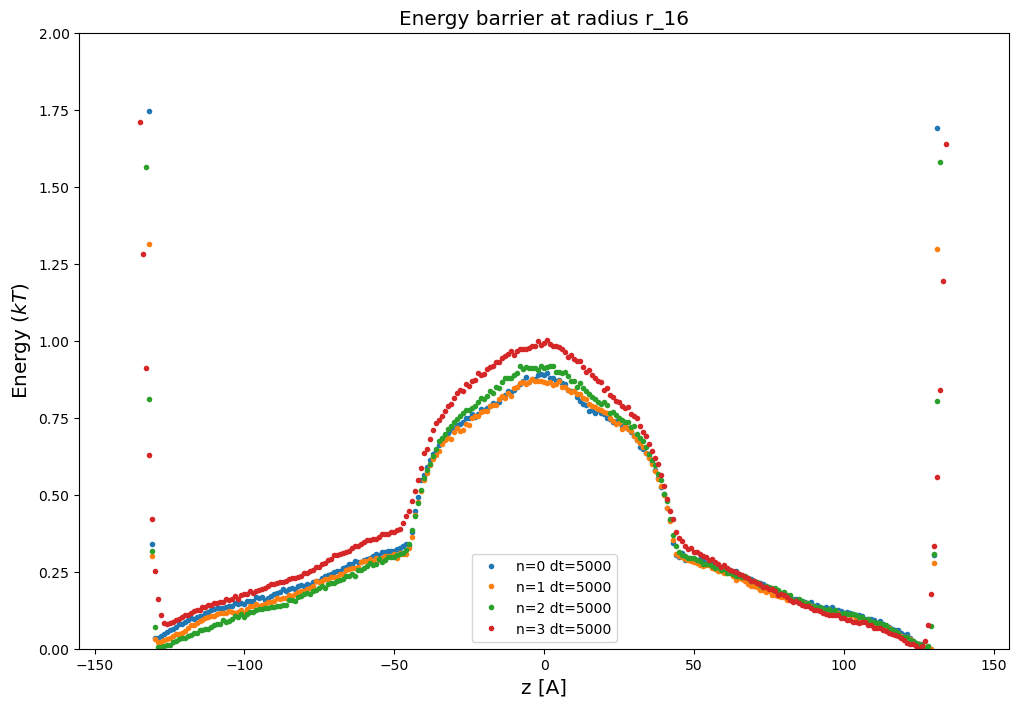

r_18


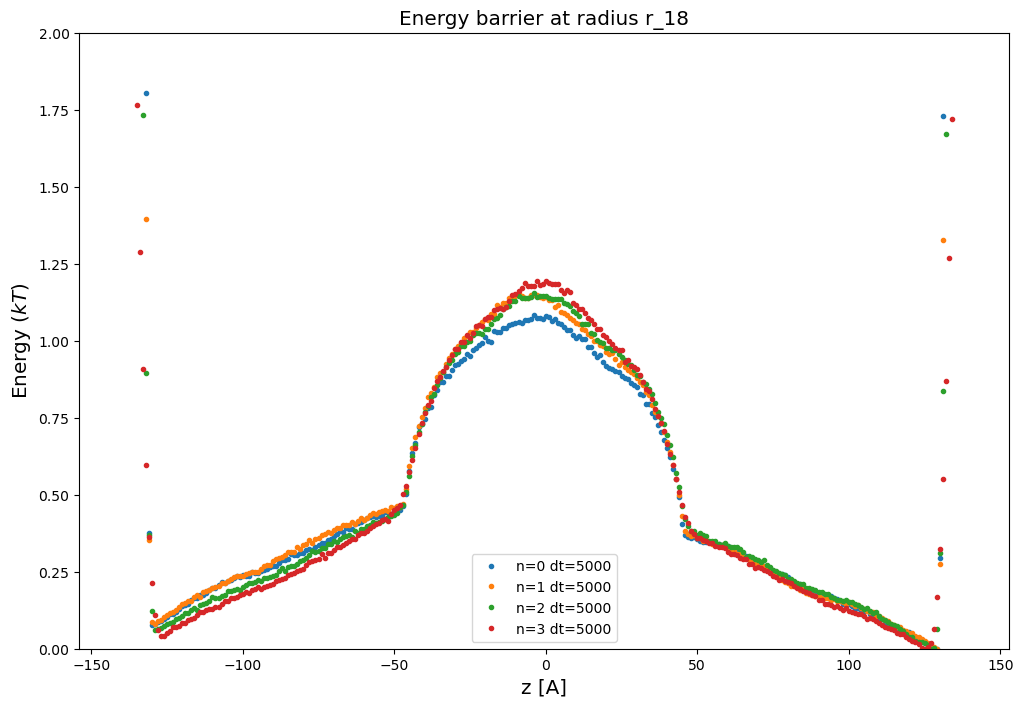

r_20


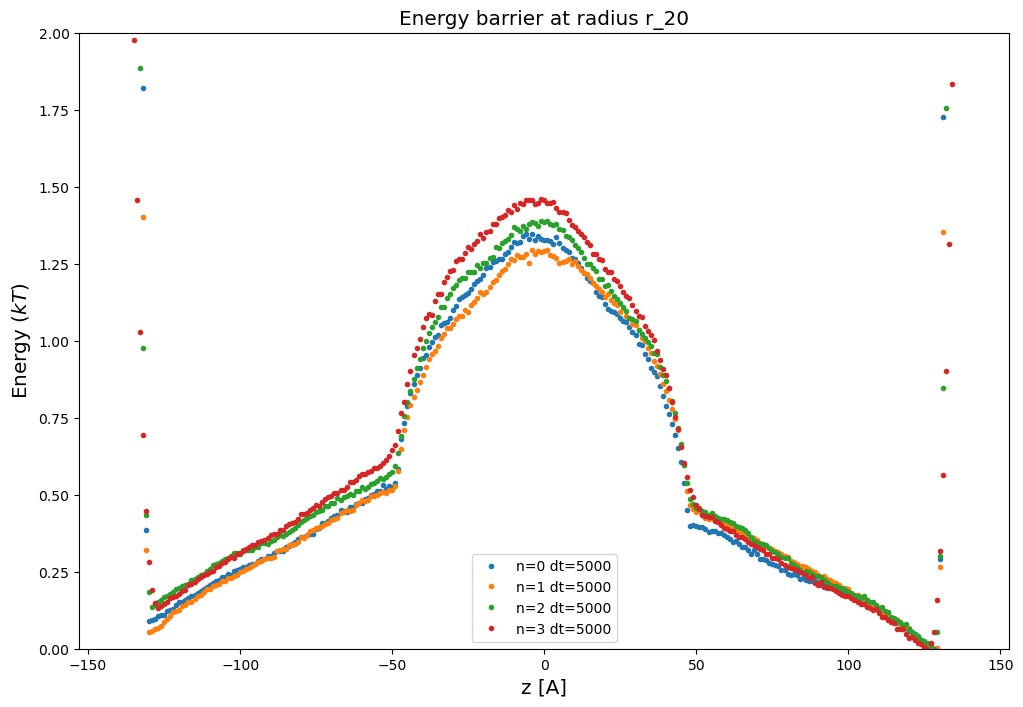

In [66]:

dts = [5000]
ns=[0,1,2,3]
dict_of_data = {}
for run_num in range (80):
    for dt in dts:
        for n in ns:
            # if n !=0 and dt != 6000:
            #     print("skipping",n,dt)
            #     continue
            file_path = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_{n}_{dt}.0_.pkl".format(run_num=run_num,n=n,dt=dt)
            # if not os.path.exists(file_path):
            #     print ("file does not exist",file_path)
            with open(file_path, 'rb') as f:
                simulation_data= pickle.load(f)["location_of_all_diffuse_particles"]
            for mol_size_r in [mol_size_r_8,mol_size_r_10,mol_size_r_12,mol_size_r_14,mol_size_r_16,mol_size_r_18,mol_size_r_20]:
                hist_counts = process_and_generate_histogram(simulation_data, mol_size_r, radius_of_npc=90)
                #if the key exist

                if (n,dt,dict_index_to_radius_name[mol_size_r[0]]) in dict_of_data:
                    dict_of_data[(n,dt,dict_index_to_radius_name[mol_size_r[0]])].append(hist_counts)
                else:
                    dict_of_data[(n,dt,dict_index_to_radius_name[mol_size_r[0]])] = [hist_counts]


# [key for key in dict_of_data.keys() if key[2] == radius_name]
for radius_name in dict_index_to_radius_name.values():
    datas = []
    labels = []
    colors_to_plot =[]
    keys_with_the_rad = [key for key in dict_of_data.keys() if key[2] == radius_name]
    for key in keys_with_the_rad:
        data = dict_of_data[key]
        datas.append(data)
        label= "n={n} dt={dt}".format(n=key[0],dt=key[1])
        title = "Energy barrier at radius {radius_name}".format(radius_name=radius_name)
        labels.append(label)
        if key[0] == 0 and key[1]==6000:
            colors_to_plot.append("blue")
        if key[0] == 1:
            colors_to_plot.append("yellow")
        if key[0] == 2:
            colors_to_plot.append("green")
        if key[0] == 3:
            colors_to_plot.append("red")
        if key[0] == 0 and key[1]==1000:
            colors_to_plot.append("light blue")
        else:
            colors_to_plot.append("brown")
    print(radius_name)
    # print(colors_to_plot)
    plot(datas, labels,None,title)
    #for every mol_size in key plot the data

    # label= "n={n} dt={dt} mol_size={mol_size}".format(n=key[0],dt=key[1],mol_size=key[2])
    # data = dict_of_data[key]
    # plot([dict_of_data[key]],labels=[label])


# for key in dict_of_data.keys():
#     plt.plot(dict_of_data[key],label=key)
# plt.legend()
# plt.show()

    # print(i)
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_6000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_00_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_1_6000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_11_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_2_6000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_22_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_3_6000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_33_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_9000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_00_9000= pickle.load(f)["location_of_all_diffuse_particles"]
    # # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_6000.0_.pkl".format(run_num=i+2)
    # # with open(file_2, 'rb') as f:
    # #     x_n_000_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_9000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_00_9000= pickle.load(f)["location_of_all_diffuse_particles"]



r_8


/tmp/ipykernel_1705044/812013389.py:13: RuntimeWarning: divide by zero encountered in log
  en = -np.log(sd) * 0.593


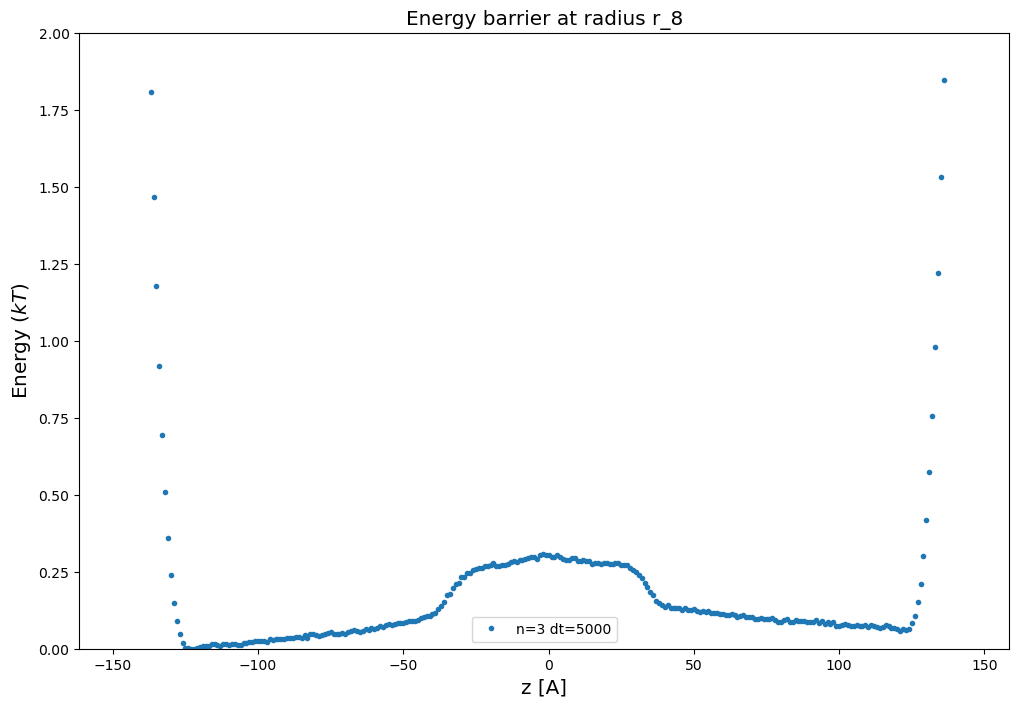

r_10


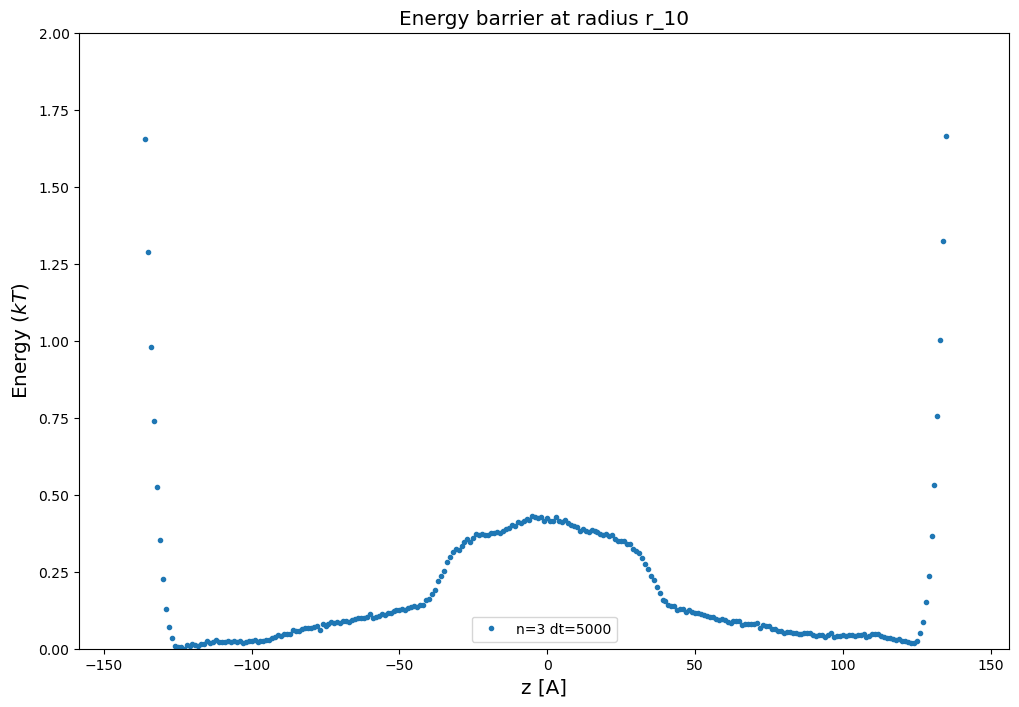

r_12


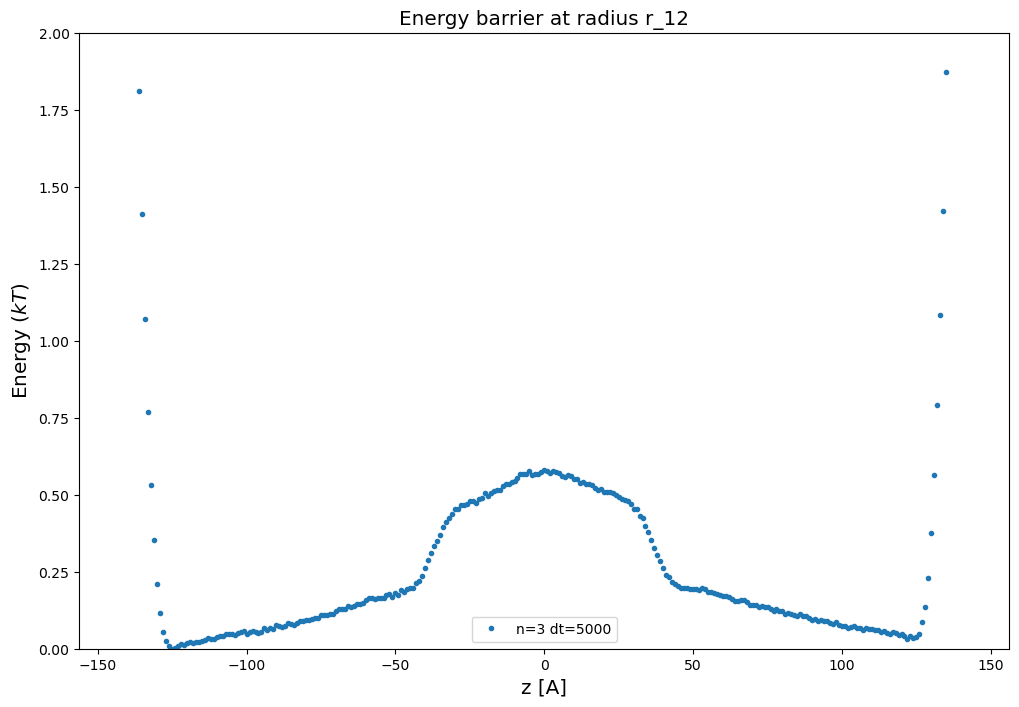

r_14


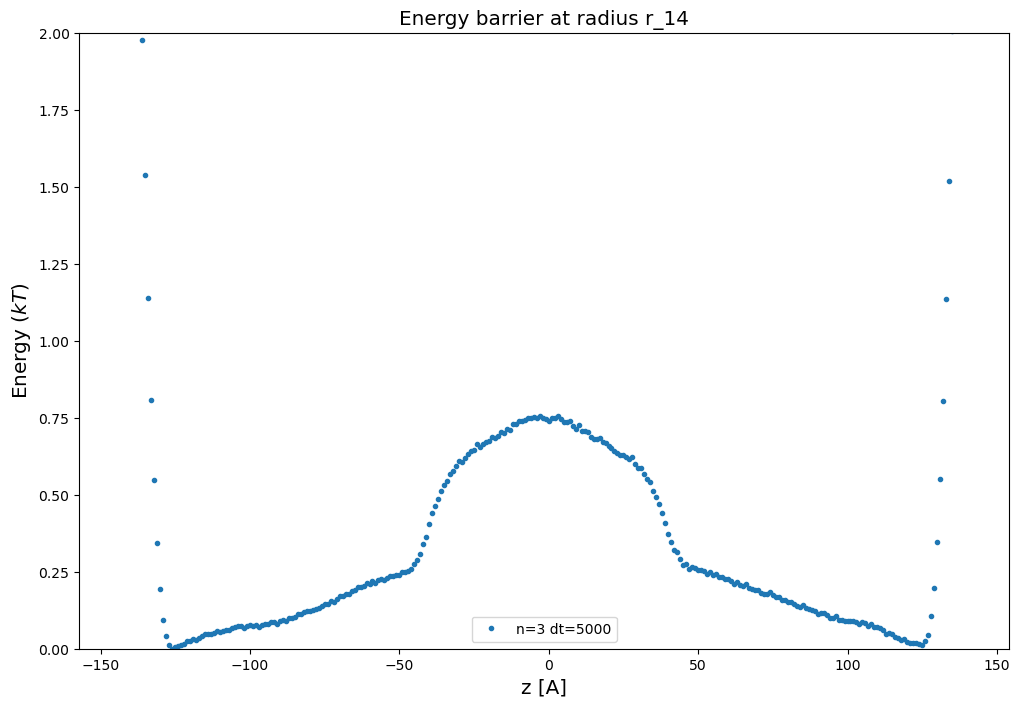

r_16


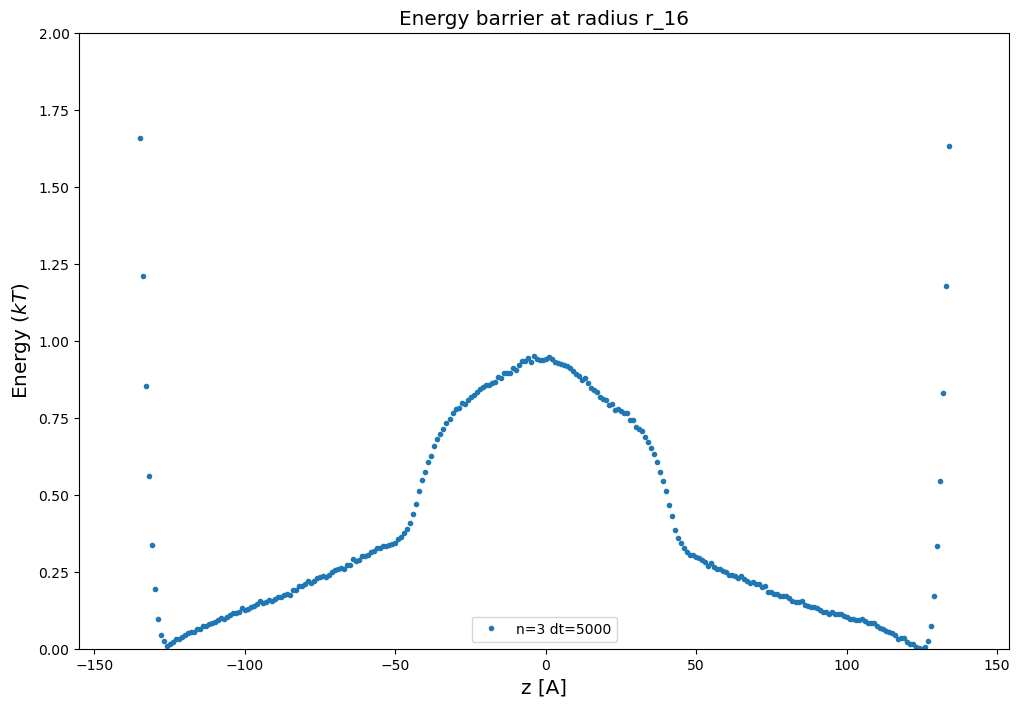

r_18


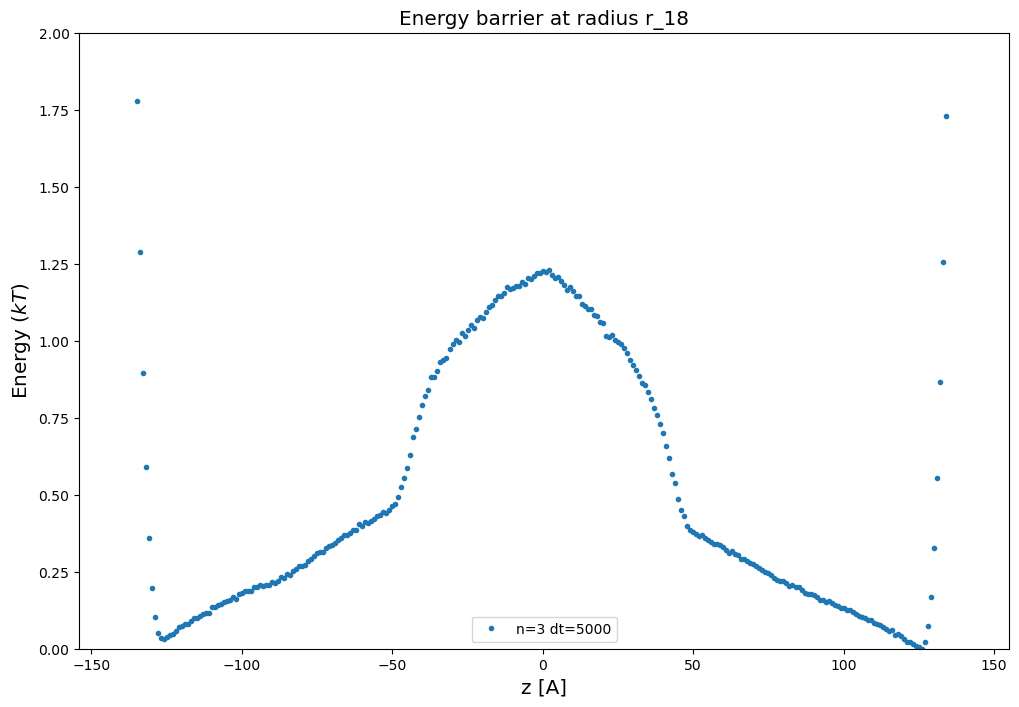

r_20


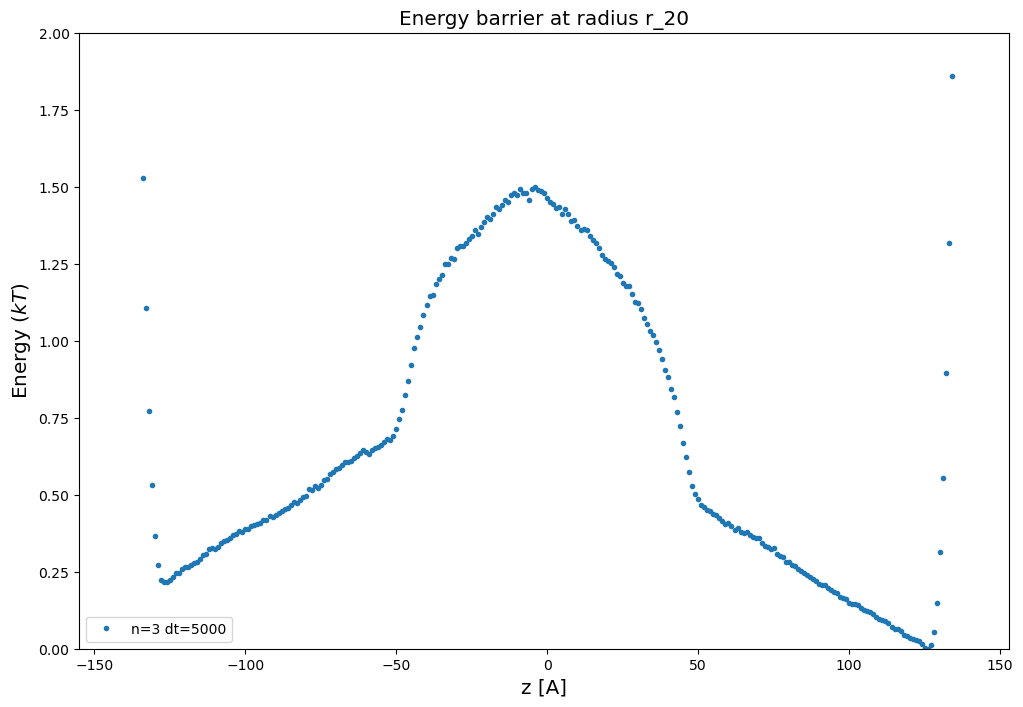

In [67]:

dts = [5000]
ns=[3]
dict_of_data = {}
for run_num in range (80):
    for dt in dts:
        for n in ns:
            # if n !=0 and dt != 6000:
            #     print("skipping",n,dt)
            #     continue
            file_path = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v8/radius_v1_{run_num}_{n}_{dt}.0_.pkl".format(run_num=run_num,n=n,dt=dt)
            # if not os.path.exists(file_path):
            #     print ("file does not exist",file_path)
            with open(file_path, 'rb') as f:
                simulation_data= pickle.load(f)["location_of_all_diffuse_particles"]
            for mol_size_r in [mol_size_r_8,mol_size_r_10,mol_size_r_12,mol_size_r_14,mol_size_r_16,mol_size_r_18,mol_size_r_20]:
                hist_counts = process_and_generate_histogram(simulation_data, mol_size_r, radius_of_npc=90)
                #if the key exist

                if (n,dt,dict_index_to_radius_name[mol_size_r[0]]) in dict_of_data:
                    dict_of_data[(n,dt,dict_index_to_radius_name[mol_size_r[0]])].append(hist_counts)
                else:
                    dict_of_data[(n,dt,dict_index_to_radius_name[mol_size_r[0]])] = [hist_counts]


# [key for key in dict_of_data.keys() if key[2] == radius_name]
for radius_name in dict_index_to_radius_name.values():
    datas = []
    labels = []
    colors_to_plot =[]
    keys_with_the_rad = [key for key in dict_of_data.keys() if key[2] == radius_name]
    for key in keys_with_the_rad:
        data = dict_of_data[key]
        datas.append(data)
        label= "n={n} dt={dt}".format(n=key[0],dt=key[1])
        title = "Energy barrier at radius {radius_name}".format(radius_name=radius_name)
        labels.append(label)
        if key[0] == 0 and key[1]==6000:
            colors_to_plot.append("blue")
        if key[0] == 1:
            colors_to_plot.append("yellow")
        if key[0] == 2:
            colors_to_plot.append("green")
        if key[0] == 3:
            colors_to_plot.append("red")
        if key[0] == 0 and key[1]==1000:
            colors_to_plot.append("light blue")
        else:
            colors_to_plot.append("brown")
    print(radius_name)
    # print(colors_to_plot)
    plot(datas, labels,None,title)
    #for every mol_size in key plot the data

    # label= "n={n} dt={dt} mol_size={mol_size}".format(n=key[0],dt=key[1],mol_size=key[2])
    # data = dict_of_data[key]
    # plot([dict_of_data[key]],labels=[label])


# for key in dict_of_data.keys():
#     plt.plot(dict_of_data[key],label=key)
# plt.legend()
# plt.show()

    # print(i)
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_6000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_00_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_1_6000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_11_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_2_6000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_22_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_3_6000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_33_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_9000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_00_9000= pickle.load(f)["location_of_all_diffuse_particles"]
    # # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_6000.0_.pkl".format(run_num=i+2)
    # # with open(file_2, 'rb') as f:
    # #     x_n_000_6000= pickle.load(f)["location_of_all_diffuse_particles"]
    # file_2 = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_0_9000.0_.pkl".format(run_num=i+1)
    # with open(file_2, 'rb') as f:
    #     x_n_00_9000= pickle.load(f)["location_of_all_diffuse_particles"]



In [68]:





#plot the mean values of the transport as a finction of the radius


all_transport_n_3_5000 = [np.mean(np.array(transport_n_3_5000)[:,i]) for i in range(7)]





# all_transport_n_4_3000 = [np.mean(np.array(transport_n_4_3000)[:,i]) for i in range(7)]
# all_transport_n_0_9000 = [np.mean(np.array(transport_n_0_9000)[:,i]) for i in range(7)]


# plt.plot(radius,all_transport_n_0_9000,label="n=0 9000 [fs]")





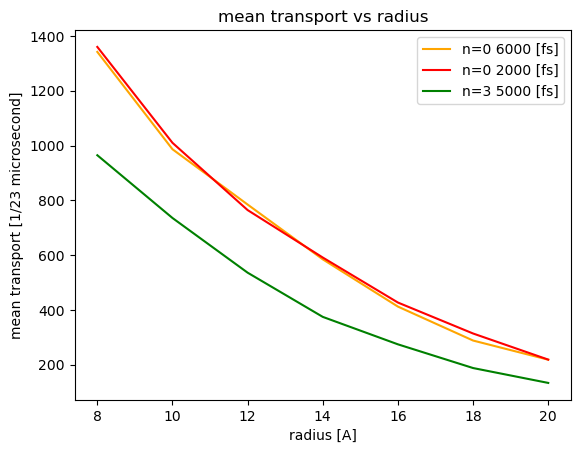

In [69]:
plt.plot(radius,all_transport_n_0_6000,label="n=0 6000 [fs]",color="orange")
plt.plot(radius,all_transport_n_0_2000,label="n=0 2000 [fs]",color="red")
plt.plot(radius,all_transport_n_3_5000,label="n=3 5000 [fs]",color="green")
plt.xlabel("radius [A]")
plt.ylabel("mean transport [1/23 microsecond]")
plt.title("mean transport vs radius")
plt.legend()

In [70]:


transport_n_0_1000,transport_n_0_2000,transport_n_0_3000, transport_n_0_4000, transport_n_0_5000, transport_n_0_6000, transport_n_0_7000, transport_n_0_8000, transport_n_0_9000 = [],[],[],[],[],[],[],[],[]
# transport_n_4_3000 = []
r=transport_n_3 = []

dir_name = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/"
for i in range (0,80):
    print(i)
    file_2=dir_name+"radius_v1_{run_num}_0_1000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_00_1000= pickle.load(f)
    file_2=dir_name+"radius_v1_{run_num}_0_2000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_00_2000= pickle.load(f)
    file_2=dir_name+"radius_v1_{run_num}_0_3000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_00_3000= pickle.load(f)
    file_2=dir_name+"radius_v1_{run_num}_0_4000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_00_4000= pickle.load(f)
    file_2=dir_name+"radius_v1_{run_num}_0_5000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_00_5000= pickle.load(f)
    file_2=dir_name+"radius_v1_{run_num}_0_6000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_00_6000= pickle.load(f)
    file_2=dir_name+"radius_v1_{run_num}_0_7000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_00_7000= pickle.load(f)
    file_2=dir_name+"radius_v1_{run_num}_0_8000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_00_8000= pickle.load(f)
    file_2=dir_name+"radius_v1_{run_num}_0_9000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_00_9000= pickle.load(f)

    sim_time_00_1000 = x_n_00_1000["total_sim_time"]
    sim_time_00_2000 = x_n_00_2000["total_sim_time"]
    sim_time_00_3000 = x_n_00_3000["total_sim_time"]
    sim_time_00_4000 = x_n_00_4000["total_sim_time"]
    sim_time_00_5000 = x_n_00_5000["total_sim_time"]
    sim_time_00_6000 =x_n_00_6000["total_sim_time"]
    sim_time_00_7000 = x_n_00_7000["total_sim_time"]
    sim_time_00_8000 = x_n_00_8000["total_sim_time"]
    sim_time_00_9000 = x_n_00_9000["total_sim_time"]



    ratio = sim_time_00_6000 / sim_time_00_1000
    radius = sorted(x_n_00_1000["combined_dict"].keys())
    transport = [x_n_00_1000["combined_dict"][r]*ratio for r in radius]
    transport_n_0_1000.append(transport)

    ratio = sim_time_00_6000 / sim_time_00_2000
    radius = sorted(x_n_00_2000["combined_dict"].keys())
    transport = [x_n_00_2000["combined_dict"][r]*ratio for r in radius]
    transport_n_0_2000.append(transport)

    ratio = sim_time_00_6000 / sim_time_00_3000
    radius = sorted(x_n_00_3000["combined_dict"].keys())
    transport = [x_n_00_3000["combined_dict"][r]*ratio for r in radius]
    transport_n_0_3000.append(transport)

    ratio = sim_time_00_6000 / sim_time_00_4000
    radius = sorted(x_n_00_4000["combined_dict"].keys())
    transport = [x_n_00_4000["combined_dict"][r]*ratio for r in radius]
    transport_n_0_4000.append(transport)

    ratio = sim_time_00_6000 / sim_time_00_5000
    radius = sorted(x_n_00_5000["combined_dict"].keys())
    transport = [x_n_00_5000["combined_dict"][r]*ratio for r in radius]
    transport_n_0_5000.append(transport)

    ratio = sim_time_00_6000 / sim_time_00_6000
    radius = sorted(x_n_00_6000["combined_dict"].keys())
    transport = [x_n_00_6000["combined_dict"][r]*ratio for r in radius]
    transport_n_0_6000.append(transport)

    ratio = sim_time_00_6000 / sim_time_00_7000
    radius = sorted(x_n_00_7000["combined_dict"].keys())
    transport = [x_n_00_7000["combined_dict"][r]*ratio for r in radius]
    transport_n_0_7000.append(transport)

    ratio = sim_time_00_6000 / sim_time_00_8000
    radius = sorted(x_n_00_8000["combined_dict"].keys())
    transport = [x_n_00_8000["combined_dict"][r]*ratio for r in radius]
    transport_n_0_8000.append(transport)

    ratio = sim_time_00_6000 / sim_time_00_9000
    radius = sorted(x_n_00_9000["combined_dict"].keys())
    transport = [x_n_00_9000["combined_dict"][r]*ratio for r in radius]
    transport_n_0_9000.append(transport)






# dir_name = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v8/"
# for i in range (0,80):
#     file_2=dir_name+"radius_v1_{run_num}_3_5000.0_.pkl".format(run_num=i)
#     with open(file_2, 'rb') as f:
#         x_n_33_5000= pickle.load(f)
#
#     # file_2=dir_name+"radius_v1_{run_num}_4_3000.0_.pkl".format(run_num=i)
#     # with open(file_2, 'rb') as f:
#     #     x_n_44_3000= pickle.load(f)
#
#     print(x_n_00_6000.keys())
#     sim_time_33_5000 = x_n_33_5000["total_sim_time"]
#     ratio = sim_time_00_6000 / sim_time_33_5000*2
#     radius = sorted(x_n_00_6000["combined_dict"].keys())
#     transport = [x_n_00_6000["combined_dict"][r]*ratio for r in radius]
#     transport_n_3_5000.append(transport)

#plot the mean values of the transport as a finction of the radius

all_transport_n_0_1000 = [np.mean(np.array(transport_n_0_1000)[:,i]) for i in range(7)]
all_transport_n_0_2000 = [np.mean(np.array(transport_n_0_2000)[:,i]) for i in range(7)]
all_transport_n_0_3000 = [np.mean(np.array(transport_n_0_3000)[:,i]) for i in range(7)]
all_transport_n_0_4000 = [np.mean(np.array(transport_n_0_4000)[:,i]) for i in range(7)]
all_transport_n_0_5000 = [np.mean(np.array(transport_n_0_5000)[:,i]) for i in range(7)]
all_transport_n_0_6000 = [np.mean(np.array(transport_n_0_6000)[:,i]) for i in range(7)]
all_transport_n_0_7000 = [np.mean(np.array(transport_n_0_7000)[:,i]) for i in range(7)]
all_transport_n_0_8000 = [np.mean(np.array(transport_n_0_8000)[:,i]) for i in range(7)]
all_transport_n_0_9000 = [np.mean(np.array(transport_n_0_9000)[:,i]) for i in range(7)]




# all_transport_n_4_3000 = [np.mean(np.array(transport_n_4_3000)[:,i]) for i in range(7)]
# all_transport_n_0_9000 = [np.mean(np.array(transport_n_0_9000)[:,i]) for i in range(7)]


# plt.plot(radius,all_transport_n_0_9000,label="n=0 9000 [fs]")





0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79


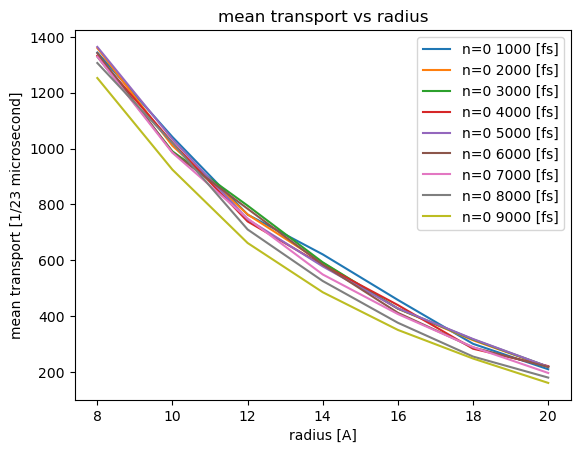

In [71]:
plt.plot(radius,all_transport_n_0_1000,label="n=0 1000 [fs]")
plt.plot(radius,all_transport_n_0_2000,label="n=0 2000 [fs]")
plt.plot(radius,all_transport_n_0_3000,label="n=0 3000 [fs]")
plt.plot(radius,all_transport_n_0_4000,label="n=0 4000 [fs]")
plt.plot(radius,all_transport_n_0_5000,label="n=0 5000 [fs]")
plt.plot(radius,all_transport_n_0_6000,label="n=0 6000 [fs]")
plt.plot(radius,all_transport_n_0_7000,label="n=0 7000 [fs]")
plt.plot(radius,all_transport_n_0_8000,label="n=0 8000 [fs]")
plt.plot(radius,all_transport_n_0_9000,label="n=0 9000 [fs]")
plt.xlabel("radius [A]")
plt.ylabel("mean transport [1/23 microsecond]")
plt.title("mean transport vs radius")
plt.legend()

In [72]:

transport_n_0_9000  = []
transport_n_0_6000 = []
transport_n_1_6000 = []
transport_n_2_6000 = []
transport_n_3_6000 = []
transport_n_0_2000  = []
transport_n_0_1000  = []
transport_n_3_5000  = []
transport_n_0_8000 = []
transport_n_0_7000 = []

# transport_n_4_3000 = []
r=transport_n_3 = []
dir_name = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/"
for i in range (0,80):
    file_2=dir_name+"radius_v1_{run_num}_0_6000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_00_6000= pickle.load(f)
    # file_2 = "/cs/usr/reshem/Desktop/Link to MSBD_IMP/NPC_data_half_v6/radius_v1_{run_num}_1_6000.0_.pkl".format(run_num=i+1)
    file_2=dir_name+"radius_v1_{run_num}_1_6000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_11_6000= pickle.load(f)
    # file_2 = "/cs/usr/reshem/Desktop/Link to MSBD_IMP/NPC_data_half_v6/radius_v1_{run_num}_2_6000.0_.pkl".format(run_num=i+1)
    file_2=dir_name+"radius_v1_{run_num}_2_6000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_22_6000= pickle.load(f)
    # file_2 = "/cs/usr/reshem/Desktop/Link to MSBD_IMP/NPC_data_half_v6/radius_v1_{run_num}_3_6000.0_.pkl".format(run_num=i+1)
    file_2=dir_name+"radius_v1_{run_num}_3_6000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_33_6000= pickle.load(f)
    file_2=dir_name+"radius_v1_{run_num}_0_9000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_00_9000= pickle.load(f)
    file_2=dir_name+"radius_v1_{run_num}_0_2000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_00_2000= pickle.load(f)
    file_2=dir_name+"radius_v1_{run_num}_0_1000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_00_1000= pickle.load(f)
    # file_2=dir_name+"radius_v1_{run_num}_3_5000.0_.pkl".format(run_num=i)
    # with open(file_2, 'rb') as f:
    #     x_n_33_5000= pickle.load(f)
    file_2=dir_name+"radius_v1_{run_num}_0_8000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_00_8000= pickle.load(f)
    file_2=dir_name+"radius_v1_{run_num}_0_7000.0_.pkl".format(run_num=i)
    with open(file_2, 'rb') as f:
        x_n_00_7000= pickle.load(f)
    # file_2=dir_name+"radius_v1_{run_num}_4_3000.0_.pkl".format(run_num=i)
    # with open(file_2, 'rb') as f:
    #     x_n_44_3000= pickle.load(f)


    sim_time_00_6000 =x_n_00_6000["total_sim_time"]
    sim_time_00_9000 =x_n_00_9000["total_sim_time"]
    # sim_time_n_4_3000 =x_n_44_3000["total_sim_time"]
    sim_time_n_3_6000 =x_n_33_6000["total_sim_time"]
    sim_time_00_1000 = x_n_00_1000["total_sim_time"]
    sim_time_33_5000 = x_n_33_5000["total_sim_time"]
    sim_time_00_7000 = x_n_00_7000["total_sim_time"]
    sim_time_00_8000 = x_n_00_8000["total_sim_time"]
    # print("sim_time_00_6000",sim_time_00_6000)
    # print("sim_time_00_9000",sim_time_00_9000)
    # # print("sim_time_n_4_3000",sim_time_n_4_3000)
    # print("sim_time_n_3_6000",sim_time_n_3_6000)
    print(i)

    radius = sorted(x_n_00_6000["combined_dict"].keys())
    transport = [x_n_00_6000["combined_dict"][r]for r in radius]
    transport_n_0_6000.append(transport)

    # radius = sorted(x_n_00_9000["combined_dict"].keys())
    # transport = [x_n_00_9000["combined_dict"][r]for r in radius]
    # plot_transport_vs_radius(radius, transport," n=0 9000 [fs]")
    # transport_n_0_9000.append(transport)

    radius = sorted(x_n_11_6000["combined_dict"].keys())
    transport = [x_n_11_6000["combined_dict"][r]for r in radius]
    transport_n_1_6000.append(transport)

    radius = sorted(x_n_22_6000["combined_dict"].keys())
    transport = [x_n_22_6000["combined_dict"][r]for r in radius]
    transport_n_2_6000.append(transport)


    radius = sorted(x_n_33_6000["combined_dict"].keys())
    transport = [x_n_33_6000["combined_dict"][r]for r in radius]
    transport_n_3_6000.append(transport)

    radius = sorted(x_n_00_2000["combined_dict"].keys())
    transport = [x_n_00_2000["combined_dict"][r]for r in radius]
    transport_n_0_2000.append(transport)

    # ratio= sim_time_00_6000 / sim_time_n_4_3000
    # radius = sorted(x_n_44_3000["combined_dict"].keys())
    # transport = [x_n_44_3000["combined_dict"][r]*ratio for r in radius]
    # transport_n_4_3000.append(transport)

    ratio = sim_time_00_6000 / sim_time_00_9000
    radius = sorted(x_n_00_9000["combined_dict"].keys())
    transport = [x_n_00_9000["combined_dict"][r]*ratio for r in radius]
    transport_n_0_9000.append(transport)

    ratio = sim_time_00_6000 / sim_time_00_1000
    radius = sorted(x_n_00_1000["combined_dict"].keys())
    transport = [x_n_00_1000["combined_dict"][r]*ratio for r in radius]
    transport_n_0_1000.append(transport)

    ratio = sim_time_00_6000 / sim_time_33_5000
    radius = sorted(x_n_33_5000["combined_dict"].keys())
    transport = [x_n_33_5000["combined_dict"][r]*ratio for r in radius]
    transport_n_3_5000.append(transport)

    ratio = sim_time_00_6000 / sim_time_00_8000

    radius = sorted(x_n_00_8000["combined_dict"].keys())
    transport = [x_n_00_8000["combined_dict"][r]*ratio for r in radius]
    transport_n_0_8000.append(transport)

    ratio = sim_time_00_6000 / sim_time_00_7000

    radius = sorted(x_n_00_7000["combined_dict"].keys())
    transport = [x_n_00_7000["combined_dict"][r]*ratio for r in radius]
    transport_n_0_7000.append(transport)



#plot the mean values of the transport as a finction of the radius

all_transport_n_0_6000 = [np.mean(np.array(transport_n_0_6000)[:,i]) for i in range(7)]
all_transport_n_1_6000 = [np.mean(np.array(transport_n_1_6000)[:,i]) for i in range(7)]
all_transport_n_2_6000 = [np.mean(np.array(transport_n_2_6000)[:,i]) for i in range(7)]
all_transport_n_3_6000 = [np.mean(np.array(transport_n_3_6000)[:,i]) for i in range(7)]
all_transport_n_0_2000 = [np.mean(np.array(transport_n_0_2000)[:,i]) for i in range(7)]
all_transport_n_0_1000 = [np.mean(np.array(transport_n_0_1000)[:,i]) for i in range(7)]
all_transport_n_0_8000 = [np.mean(np.array(transport_n_0_8000)[:,i]) for i in range(7)]
all_transport_n_0_7000 = [np.mean(np.array(transport_n_0_7000)[:,i]) for i in range(7)]




# all_transport_n_4_3000 = [np.mean(np.array(transport_n_4_3000)[:,i]) for i in range(7)]
all_transport_n_0_9000 = [np.mean(np.array(transport_n_0_9000)[:,i]) for i in range(7)]


# plt.plot(radius,all_transport_n_0_9000,label="n=0 9000 [fs]")


# dir_name = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v8/"
# for i in range (0,80):
#     file_2=dir_name+"radius_v1_{run_num}_3_5000.0_.pkl".format(run_num=i)
#     with open(file_2, 'rb') as f:
#         x_n_33_5000= pickle.load(f)
#
#     # file_2=dir_name+"radius_v1_{run_num}_4_3000.0_.pkl".format(run_num=i)
#     # with open(file_2, 'rb') as f:
#     #     x_n_44_3000= pickle.load(f)
#
#     print(x_n_00_6000.keys())
#     sim_time_33_5000 = x_n_33_5000["total_sim_time"]
#     ratio = sim_time_00_6000 / sim_time_33_5000*2
#     radius = sorted(x_n_00_6000["combined_dict"].keys())
#     transport = [x_n_00_6000["combined_dict"][r]*ratio for r in radius]
#     transport_n_3_5000.append(transport)
#
# all_transport_n_3_5000 = [np.mean(np.array(transport_n_3_5000)[:,i]) for i in range(7)]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79


/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v8/radius_v1_0_3_5000.0_.pkl
/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v8/radius_v1_1_3_5000.0_.pkl
/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v8/radius_v1_2_3_5000.0_.pkl
/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v8/radius_v1_3_3_5000.0_.pkl
/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v8/radius_v1_4_3_5000.0_.pkl
/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v8/radius_v1_5_3_5000.0_.pkl
/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v8/radius_v1_6_3_5000.0_.pkl
/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v8/radius_v1_7_3_5000.0_.pkl
/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v8/radius_v1_8_3_5000.0_.pkl
/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v8/radius_v1_9_3_5000.0_.pkl
/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v8/radius_v1_10_3_5000.0_.pkl
/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v8/radius_v1_11_3_5000.0_.pkl
/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v8/radius_v1_

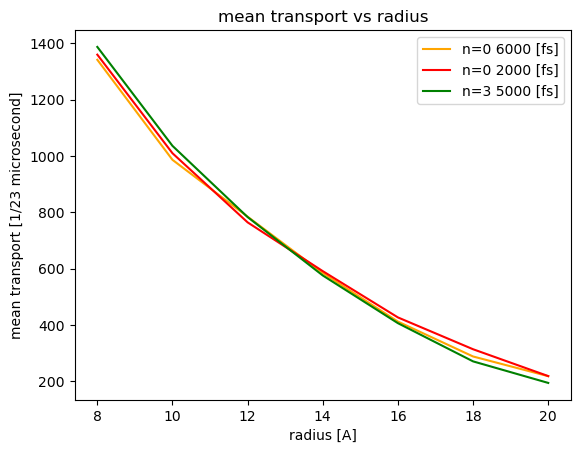

In [73]:
dir_name = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v8/"
transport_n_3_5000 =[]
for i in range (0,80):
    file_2=dir_name+"radius_v1_{run_num}_3_5000.0_.pkl".format(run_num=i)
    print(file_2)
    with open(file_2, 'rb') as f:
        x_n_33_5000= pickle.load(f)

    # file_2=dir_name+"radius_v1_{run_num}_4_3000.0_.pkl".format(run_num=i)
    # with open(file_2, 'rb') as f:
    #     x_n_44_3000= pickle.load(f)

    # print(x_n_33_5000["total_sim_time"])
    sim_time_33_5000 = x_n_33_5000["total_sim_time"]
    ratio = sim_time_00_6000 / sim_time_33_5000 * 2
    # print(ratio)
    radius = sorted(x_n_33_5000["combined_dict"].keys())
    transport = [x_n_33_5000["combined_dict"][r]*ratio for r in radius]
    # print(transport)
    transport_n_3_5000.append(transport)

all_transport_n_3_5000 = [np.mean(np.array(transport_n_3_5000)[:,i]) for i in range(7)]
# print(all_transport_n_3_5000)
plt.plot(radius,all_transport_n_0_6000,label="n=0 6000 [fs]",color="orange")
plt.plot(radius,all_transport_n_0_2000,label="n=0 2000 [fs]",color="red")
plt.plot(radius,all_transport_n_3_5000,label="n=3 5000 [fs]",color="green")
plt.xlabel("radius [A]")
plt.ylabel("mean transport [1/23 microsecond]")
plt.title("mean transport vs radius")
plt.legend()

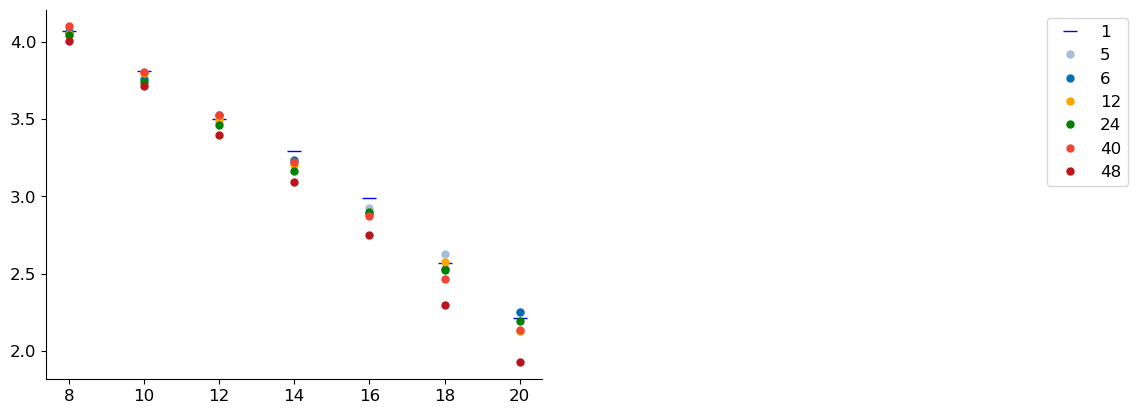

In [149]:
# plt.plot(radius,all_transport_n_0_6000,label="n=0 6000 [fs]")
# plt.plot(radius,all_transport_n_1_6000,label="n=1 6000 [fs]")
# plt.plot(radius,all_transport_n_2_6000,label="n=2 6000 [fs]")
# plt.plot(radius,all_transport_n_3_6000,label="n=3 6000 [fs]")
# plt.plot(radius,all_transport_n_0_2000,label="n=0 2000 [fs]")
# plt.plot(radius,all_transport_n_3_5000,label="n=3 5000 [fs]")
# plt.xlabel("radius [A]")
# plt.ylabel("mean transport [1/23 microsecond]")
# plt.title("mean transport vs radius")
# plt.legend()
# # Calculate the logarithm of the transport values
# log_all_transport_n_0_6000 = np.log(all_transport_n_0_6000)
# log_all_transport_n_1_6000 = np.log(all_transport_n_1_6000)
# log_all_transport_n_2_6000 = np.log(all_transport_n_2_6000)
# log_all_transport_n_3_6000 = np.log(all_transport_n_3_6000)
# log_all_transport_n_0_2000 = np.log(all_transport_n_0_2000)
# log_all_transport_n_0_9000 = np.log(all_transport_n_0_9000)
# log_all_transport_n_0_1000 = np.log(all_transport_n_0_1000)

# Plot the logarithmically transformed values
# all_transport_n_3_5000 = [np.mean(np.array(transport_n_3_5000)[:,i]) for i in range(7)]
colors = [
    "#fff7fb", "#ece7f2", "#d0d1e6", "#a6bddb",
    "#74a9cf", "#3690c0", "#0570b0", "#045a8d", "#023858"
]# Plot the logarithmically transformed values

log_all_transport_n_0_6000 = np.log(np.array(all_transport_n_0_6000)/23)
log_all_transport_n_1_6000 = np.log(np.array(all_transport_n_1_6000)/23)
log_all_transport_n_2_6000 = np.log(np.array(all_transport_n_2_6000)/23)
log_all_transport_n_3_6000 = np.log(np.array(all_transport_n_3_6000)/23)
log_all_transport_n_0_2000 = np.log(np.array(all_transport_n_0_2000)/23)
log_all_transport_n_0_5000 = np.log(np.array(all_transport_n_0_5000)/23)
log_all_transport_n_0_1000 = np.log(np.array(all_transport_n_0_1000)/23)
log_all_transport_n_3_5000 = np.log(np.array(all_transport_n_3_5000)/23)
# plt.plot(radius, log_all_transport_n_0_6000, ".", label="n=0 6000 [fs]", color="orange")
# plt.plot(radius, log_all_transport_n_1_6000, ".", label="n=1 6000 [fs]", color="green")
# plt.plot(radius, log_all_transport_n_2_6000, ".", label="n=2 6000 [fs]", color="red")
plt.plot(radius, log_all_transport_n_0_1000, "_", label="1", color="blue",markersize=10)
plt.plot(radius, log_all_transport_n_0_5000, ".", label="5", color=colors[3],markersize=10)
plt.plot(radius, log_all_transport_n_0_6000, ".", label="6",color=colors[6],markersize=10)
# plt.plot(radius, log_all_transport_n_0_1000, ".", label="n=0 1000 [fs]", color="brown")
plt.plot(radius, log_all_transport_n_1_6000, ".", label="12", color="orange",markersize=10)
plt.plot(radius, log_all_transport_n_2_6000, ".", label="24", color="green",markersize=10)
plt.plot(radius, log_all_transport_n_3_5000, ".", label="40", color=plt.cm.Reds(0.6),markersize=10)
plt.plot(radius, log_all_transport_n_3_6000, ".", label="48", color=plt.cm.Reds(0.8),markersize=10)
axis= [8,10,12,14,16,18,20]
plt.xticks(axis)
plt.rcParams.update({'font.size': 12,
                     'xtick.labelsize' : 12,
                     'ytick.labelsize' : 12})
plt.legend(loc='upper left', bbox_to_anchor=(2, 1))
# plt.xlabel("radius [A]")
# plt.ylabel("log(mean transport) [( microsecond)]")
# plt.title("Log of mean transport vs radius")
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)# Calculate the mean and standard deviation
plt.show()


In [75]:
len(transport_n_3_5000)

80

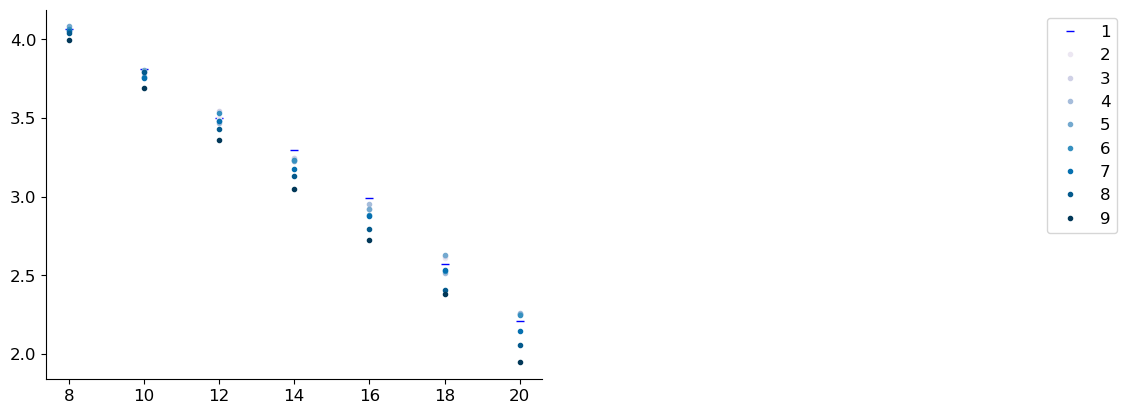

In [142]:
log_all_transport_n_0_1000= np.log(np.array(all_transport_n_0_1000)/23)
log_all_transport_n_0_2000= np.log(np.array(all_transport_n_0_2000)/23)
log_all_transport_n_0_3000= np.log(np.array(all_transport_n_0_3000)/23)
log_all_transport_n_0_4000= np.log(np.array(all_transport_n_0_4000)/23)
log_all_transport_n_0_5000= np.log(np.array(all_transport_n_0_5000)/23)
log_all_transport_n_0_6000= np.log(np.array(all_transport_n_0_6000)/23)
log_all_transport_n_0_7000= np.log(np.array(all_transport_n_0_7000)/23)
log_all_transport_n_0_8000= np.log(np.array(all_transport_n_0_8000)/23)
log_all_transport_n_0_9000= np.log(np.array(all_transport_n_0_9000)/23)
# log_all_transport_n_0_2000= np.log(all_transport_n_0_2000)
# log_all_transport_n_0_3000= np.log(all_transport_n_0_3000)
# log_all_transport_n_0_4000= np.log(all_transport_n_0_4000)
# log_all_transport_n_0_5000= np.log(all_transport_n_0_5000)
# log_all_transport_n_0_6000= np.log(all_transport_n_0_6000)
# log_all_transport_n_0_7000= np.log(all_transport_n_0_7000)
# log_all_transport_n_0_8000= np.log(all_transport_n_0_8000)
# log_all_transport_n_0_9000= np.log(all_transport_n_0_9000)
# log_all_transport_n_4_3000= np.log(all_transport_n_4_3000)
colors = [
    "#fff7fb", "#ece7f2", "#d0d1e6", "#a6bddb",
    "#74a9cf", "#3690c0", "#0570b0", "#045a8d", "#023858"
]# Plot the logarithmically transformed values
plt.plot(radius, log_all_transport_n_0_1000, "_", label="1", color="blue")
plt.plot(radius, log_all_transport_n_0_2000, ".", label="2", color=colors[1])
plt.plot(radius, log_all_transport_n_0_3000, ".", label="3", color=colors[2])
plt.plot(radius, log_all_transport_n_0_4000, ".", label="4", color=colors[3])
plt.plot(radius, log_all_transport_n_0_5000, ".", label="5", color=colors[4])
plt.plot(radius, log_all_transport_n_0_6000, ".", label="6", color=colors[5])
plt.plot(radius, log_all_transport_n_0_7000, ".", label="7", color=colors[6])
plt.plot(radius, log_all_transport_n_0_8000, ".", label="8", color=colors[7])
plt.plot(radius, log_all_transport_n_0_9000, ".", label="9", color=colors[8])
# plt.rcParams.update({'font.size': 18,
#                      'xtick.labelsize' : 18,
#                      'ytick.labelsize' : 18})
axis= [8,10,12,14,16,18,20]
plt.xticks(axis)
plt.legend(loc='upper left', bbox_to_anchor=(2, 1))
# plt.xlabel("radius [A]")
# plt.ylabel("log(mean transport) [ microsecond]")
# plt.title("Log of mean transport vs radius")
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)# Calculate the mean and standard deviation
plt.show()

In [77]:
dts = [1000,2000,3000,4000,5000,6000,7000,8000,9000]
# ns=[0,1,2,3]
ns=[0]
max_ys = {}
dict_of_data = {}
for run_num in range (80):
    print(i)
    for dt in dts:
        for n in ns:
            file_path = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_{n}_{dt}.0_.pkl".format(run_num=run_num,n=n,dt=dt)
            # if not os.path.exists(file_path):
            #     print ("file does not exist",file_path)
            with open(file_path, 'rb') as f:
                simulation_data= pickle.load(f)["location_of_all_diffuse_particles"]
            for mol_size_r in [mol_size_r_8,mol_size_r_10,mol_size_r_12,mol_size_r_14,mol_size_r_16,mol_size_r_18,mol_size_r_20]:
                hist_counts = process_and_generate_histogram(simulation_data, mol_size_r, radius_of_npc=90)
                #if the key exist

                if (n,dt,dict_index_to_radius_name[mol_size_r[0]]) in dict_of_data:
                    dict_of_data[(n,dt,dict_index_to_radius_name[mol_size_r[0]])].append(hist_counts)
                else:
                    dict_of_data[(n,dt,dict_index_to_radius_name[mol_size_r[0]])] = [hist_counts]
dts=[6000]
ns=[0,1,2,3]
for run_num in range (80):
    print(i)
    for dt in dts:
        for n in ns:
            file_path = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v7/radius_v1_{run_num}_{n}_{dt}.0_.pkl".format(run_num=run_num,n=n,dt=dt)
            # if not os.path.exists(file_path):
            #     print ("file does not exist",file_path)
            with open(file_path, 'rb') as f:
                simulation_data= pickle.load(f)["location_of_all_diffuse_particles"]
            for mol_size_r in [mol_size_r_8,mol_size_r_10,mol_size_r_12,mol_size_r_14,mol_size_r_16,mol_size_r_18,mol_size_r_20]:
                hist_counts = process_and_generate_histogram(simulation_data, mol_size_r, radius_of_npc=90)
                #if the key exist

                if (n,dt,dict_index_to_radius_name[mol_size_r[0]]) in dict_of_data:
                    dict_of_data[(n,dt,dict_index_to_radius_name[mol_size_r[0]])].append(hist_counts)
                else:
                    dict_of_data[(n,dt,dict_index_to_radius_name[mol_size_r[0]])] = [hist_counts]

dts=[5000]
ns=[3]
for run_num in range (80):
    print(i)
    for dt in dts:
        for n in ns:
            file_path = "/cs/labs/ravehb/reshem/BD/MSBD_IMP/NPC_data_half_v8/radius_v1_{run_num}_{n}_{dt}.0_.pkl".format(run_num=run_num,n=n,dt=dt)
            # if not os.path.exists(file_path):
            #     print ("file does not exist",file_path)
            with open(file_path, 'rb') as f:
                simulation_data= pickle.load(f)["location_of_all_diffuse_particles"]
            for mol_size_r in [mol_size_r_8,mol_size_r_10,mol_size_r_12,mol_size_r_14,mol_size_r_16,mol_size_r_18,mol_size_r_20]:
                hist_counts = process_and_generate_histogram(simulation_data, mol_size_r, radius_of_npc=90)
                #if the key exist

                if (n,dt,dict_index_to_radius_name[mol_size_r[0]]) in dict_of_data:
                    dict_of_data[(n,dt,dict_index_to_radius_name[mol_size_r[0]])].append(hist_counts)
                else:
                    dict_of_data[(n,dt,dict_index_to_radius_name[mol_size_r[0]])] = [hist_counts]



for key in dict_of_data.keys():
    data = dict_of_data[key]
    label= key
    max_ys = calc_barrier_energy(data, label,max_ys)


79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79


/tmp/ipykernel_1705044/3671654339.py:10: RuntimeWarning: divide by zero encountered in log
  en = -np.log(sd) * 0.593


/tmp/ipykernel_1705044/717922476.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(tick_labels)
/tmp/ipykernel_1705044/717922476.py:94: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks().astype(int))
/tmp/ipykernel_1705044/717922476.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(tick_labels)
/tmp/ipykernel_1705044/717922476.py:94: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks().astype(int))
/tmp/ipykernel_1705044/717922476.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or 

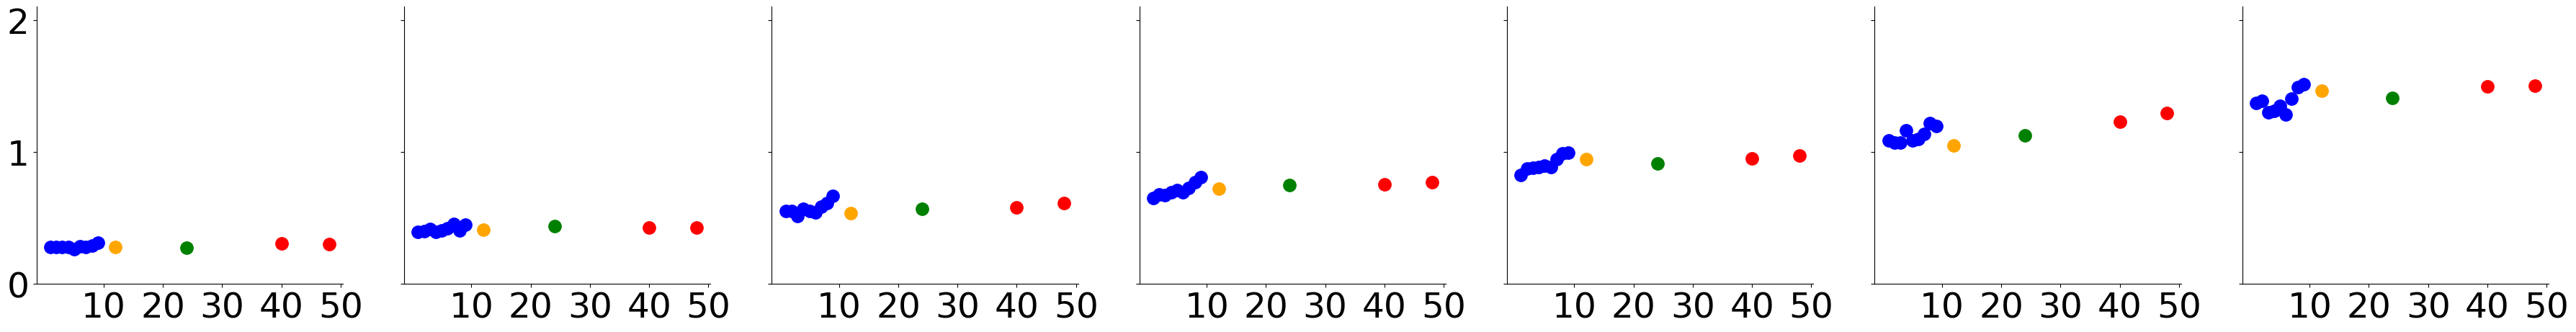

In [187]:
emp_list_r=['r_8','r_10','r_12','r_14','r_16','r_18','r_20']
#
#
# plt.rcParams.update(plt.rcParamsDefault)
#
# fig, axes = plt.subplots(nrows=1, ncols=len(emp_list_r), figsize=(45, 5), sharex=True, sharey=True)
# print(axes.shape)
# for i,cond in enumerate(emp_list_r):
#     # if cond == 'all_beta':
#     #     adata_tmp = adata_beta_stz[adata_beta_stz.obs['groups_named_broad_cond'].isin(temp_list_r[0:-1])]
#     # else:
#     #     adata_tmp = adata_beta_stz[adata_beta_stz.obs['groups_named_broad_cond'].isin([cond])]
#
#     ax = axes[i]
#     scatter = ax.scatter(adata_tmp.obs['var_position'], adata_tmp.obs['conf_position'], c=gene_expression_values_ins1.toarray(),s=5,cmap='RdYlBu',vmin=4.5,vmax=6)
#
#     # if i == 0 :
#         # ax.set_ylabel('confidence rank',fontsize=20)
#
#     # if i == len(temp_list_r)-1:
#     #     cbar = plt.colorbar(scatter, ax=ax)
#     #     cbar.ax.tick_params(labelsize=20)
#     #     #show less thiks on the color bar
#     #     # cbar.locator = ticker.MaxNLocator(nbins=5)
#     #     # cbar.update_ticks()
#     #     cbar.set_ticks([4.5, 5,5.5, 6])  # Set specific ticks on the colorbar
#
#     ax.tick_params(axis='both', labelsize=35)
#
#     # ax.set_title(f'{cond}',fontsize=20)
#
#
#     #change tikers font size
#     # for tick in ax.xaxis.get_major_ticks():
#     #     tick.label.set_fontsize(20)
#     print(i)
#     ax.spines['right'].set_visible(False)
#     ax.spines['top'].set_visible(False)
#     # ax.axhline(y=0, color='black', linestyle='-', linewidth=2)
#     # ax.axvline(x=0, color='black', linestyle='-', linewidth=2)
#
#     # ax.spines['left'].set_visible(True)
#     # ax.spines['bottom'].set_visible(True)
#
#
#
# plt.savefig(f'figures/a_v3.png',dpi=600)
# plt.savefig(f'figures/a_v3.svg',dpi=600,format='svg')
# # plt.savefig(f'figures/a_high_res.png',dpi=100)
# plt.savefig(f'figures/temp.png',dpi=300)
# # plt.savefig(f'figures/a_v3.svg',dpi=600,format='svg')
# plt.show()

#
# plt.rcParams.update(plt.rcParamsDefault)

plt.rcParams.update({'font.size': 18,
                     'xtick.labelsize' : 35,
                     'ytick.labelsize' : 35})

fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(45, 5), sharex=True, sharey=True)
n_0, n_1, n_2, n_3 = {},{},{},{}
for i,radius_name in enumerate(dict_index_to_radius_name.values()):
    keys_with_the_rad = [key for key in max_ys.keys() if key[2] == radius_name]
    for key in keys_with_the_rad:
        effctive_dt = int(key[1])*2**int(key[0])
        if key[0] == 0:
            n_0[effctive_dt] = max_ys[key]
        if key[0] == 1:
            n_1[effctive_dt] = max_ys[key]
        if key[0] == 2:
            n_2[effctive_dt] = max_ys[key]
        if key[0] == 3:
            n_3[effctive_dt] = max_ys[key]
    #plot n_0 as blue
    ax = axes[i]
    ax.plot(np.array(list(n_0.keys()))/1000, n_0.values(), ".", label="n=0", color="blue",markersize=25)
    ax.plot(np.array(list(n_1.keys()))/1000, n_1.values(), ".", label="n=1", color="orange",markersize=25)
    ax.plot(np.array(list(n_2.keys()))/1000, n_2.values(), ".", label="n=2", color="green",markersize=25)
    ax.plot(np.array(list(n_3.keys()))/1000, n_3.values(), ".", label="n=3", color="red",markersize=25)
    # plt.xlabel("effective dt")
    # plt.ylabel("max energy barrier")
    # ax.title("max energy barrier vs effective dt " + str(radius_name))
    # ax.set_title(radius_name,fontsize=20)
    plt.ylim(0, 2.1)
    xaxis=[10,20,30,40,50]
    plt.xticks(xaxis)
    # Add these lines to replace the tick mark at y=2 with an asterisk
    current_ticks = plt.gca().get_yticks()
    # ax.set_yticklabels(ax.get_yticks().astype(int))

    # tick_labels = ['*' if '{:.2f}'.format(y) == '2.10' else '{:.2f}'.format(y) for y in current_ticks]
    plt.gca().set_yticklabels(tick_labels)
    ax.set_yticklabels(ax.get_yticks().astype(int))

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # plt.plot(n_0.keys(), n_0.values(), ".", label="n=0", color="blue")
    # plt.plot(n_1.keys(), n_1.values(), ".", label="n=1", color="yellow")
    # plt.plot(n_2.keys(), n_2.values(), ".", label="n=2", color="green")
    # plt.plot(n_3.keys(), n_3.values(), ".", label="n=3", color="red")
    # plt.show()
plt.show()

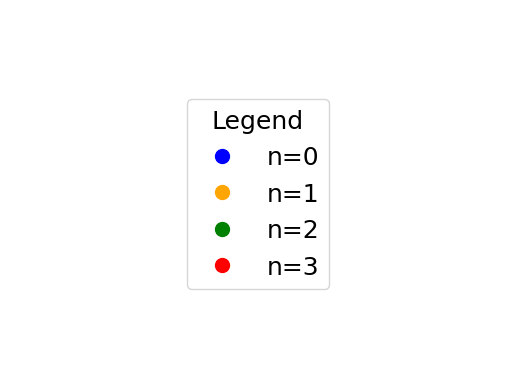

In [181]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Define legend entries with dots only
legend_elements = [
    Line2D([0], [0], color="blue", marker="o", markersize=10, linestyle="None", label="n=0"),
    Line2D([0], [0], color="orange", marker="o", markersize=10, linestyle="None", label="n=1"),
    Line2D([0], [0], color="green", marker="o", markersize=10, linestyle="None", label="n=2"),
    Line2D([0], [0], color="red", marker="o", markersize=10, linestyle="None", label="n=3")
]

# Create a figure for the legend
fig, ax = plt.subplots()
ax.legend(handles=legend_elements, loc="center", title="Legend")
ax.axis("off")  # Remove axes for a clean legend-only view

# Show the legend
plt.show()



r_8


/tmp/ipykernel_1705044/3561854248.py:11: RuntimeWarning: divide by zero encountered in log
  en = -np.log(sd) * 0.593


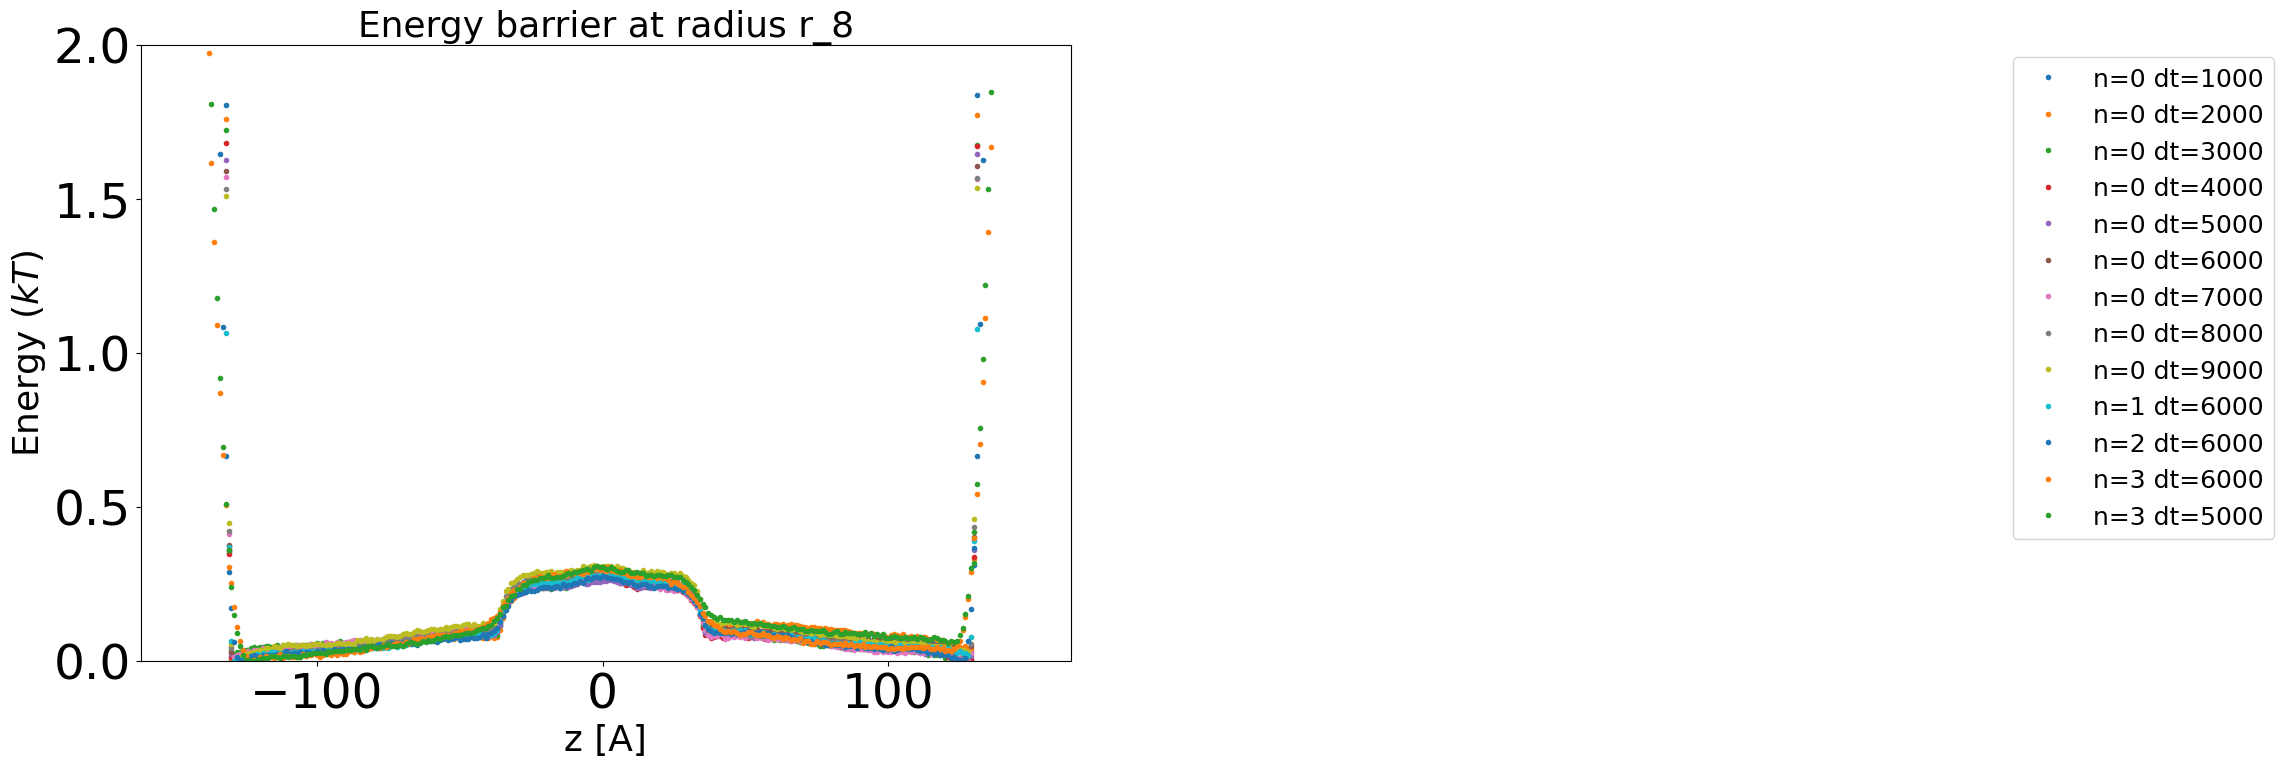

r_10


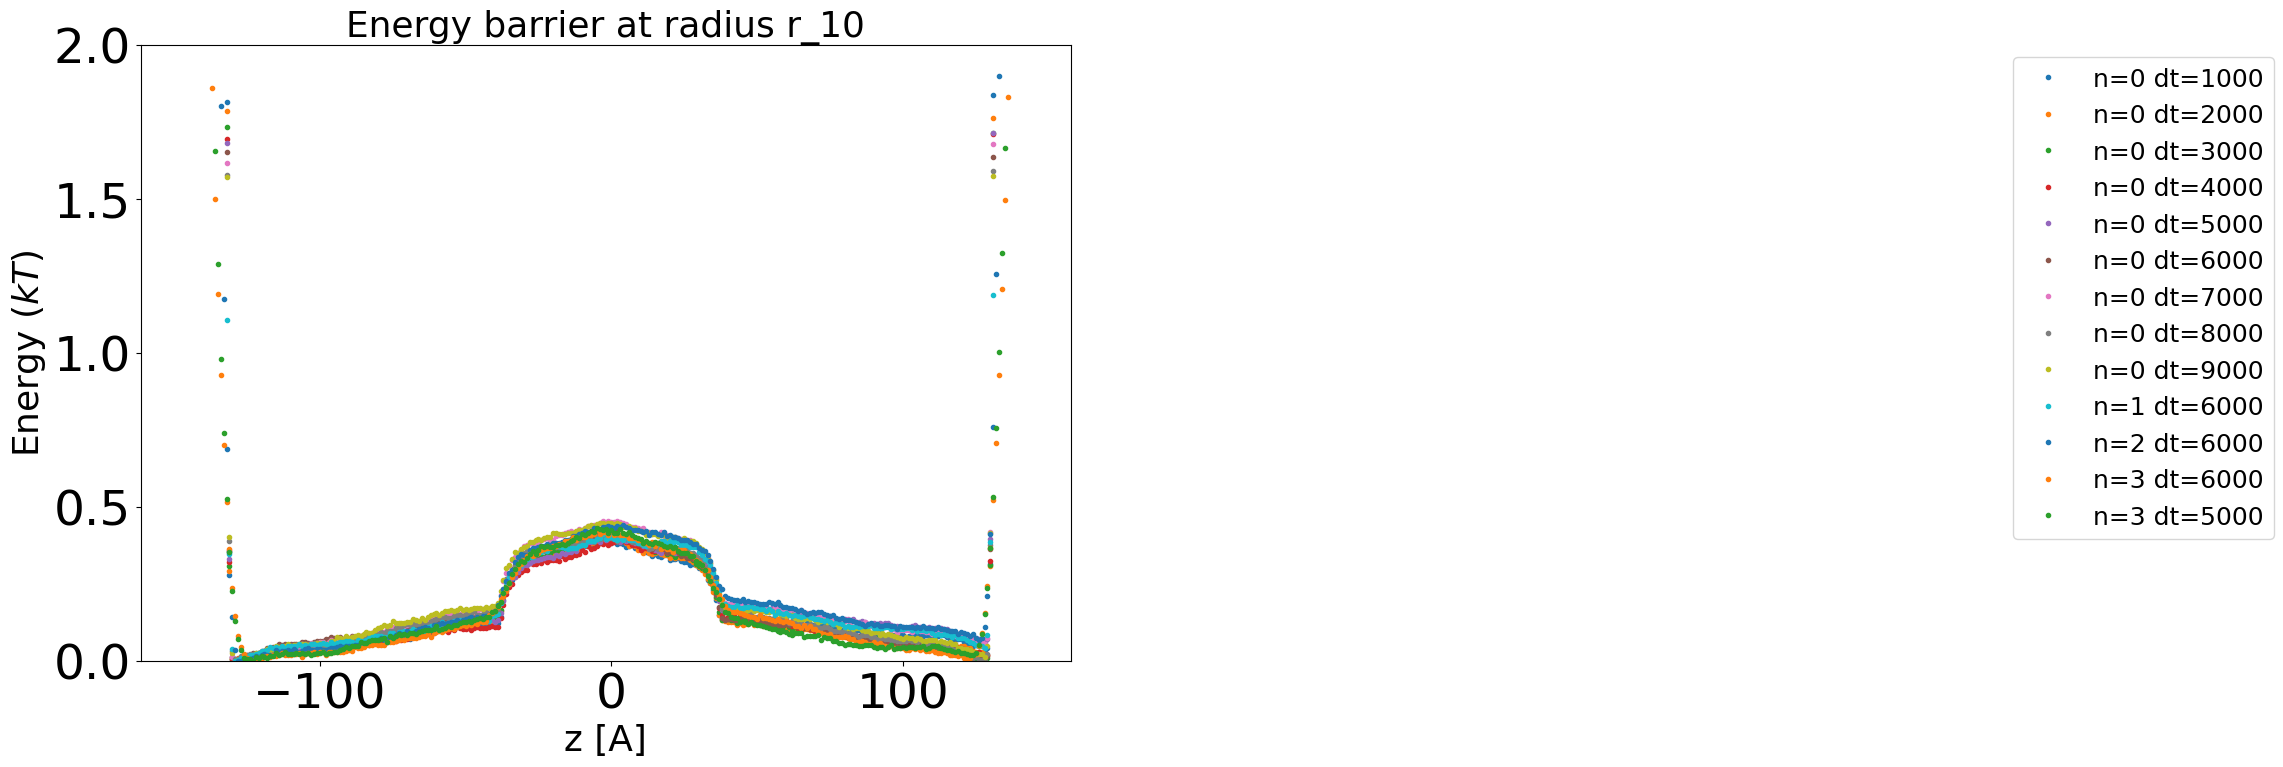

r_12


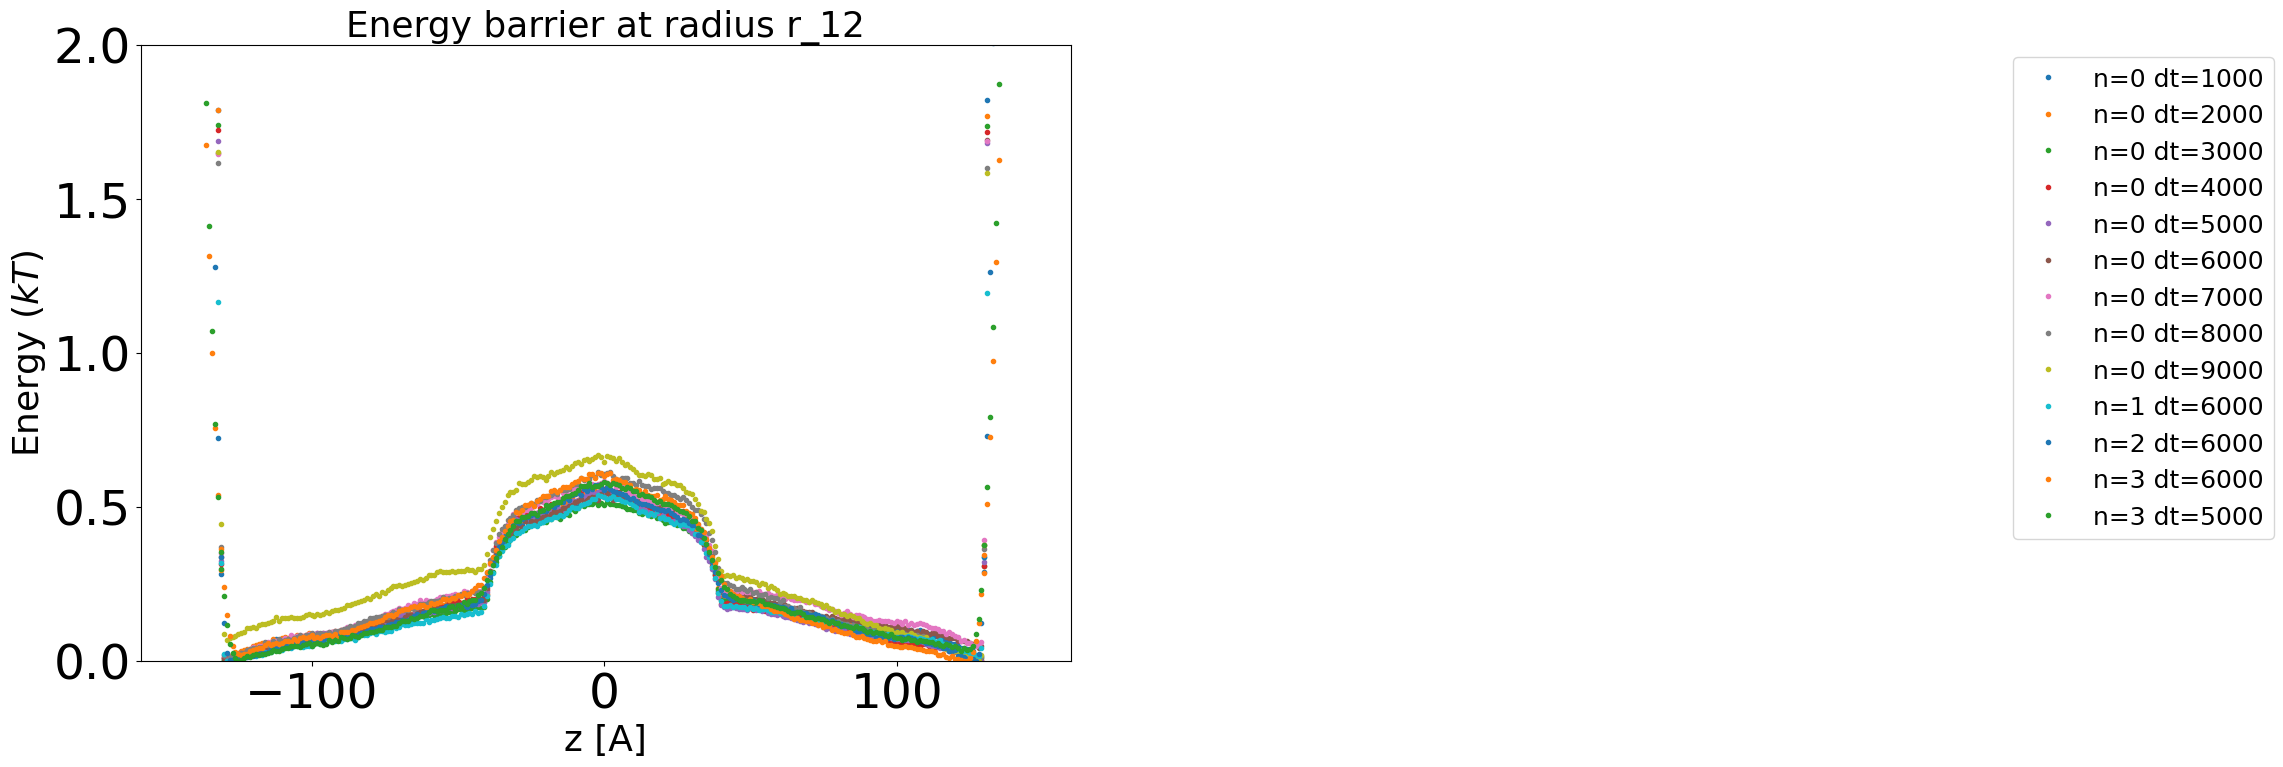

r_14


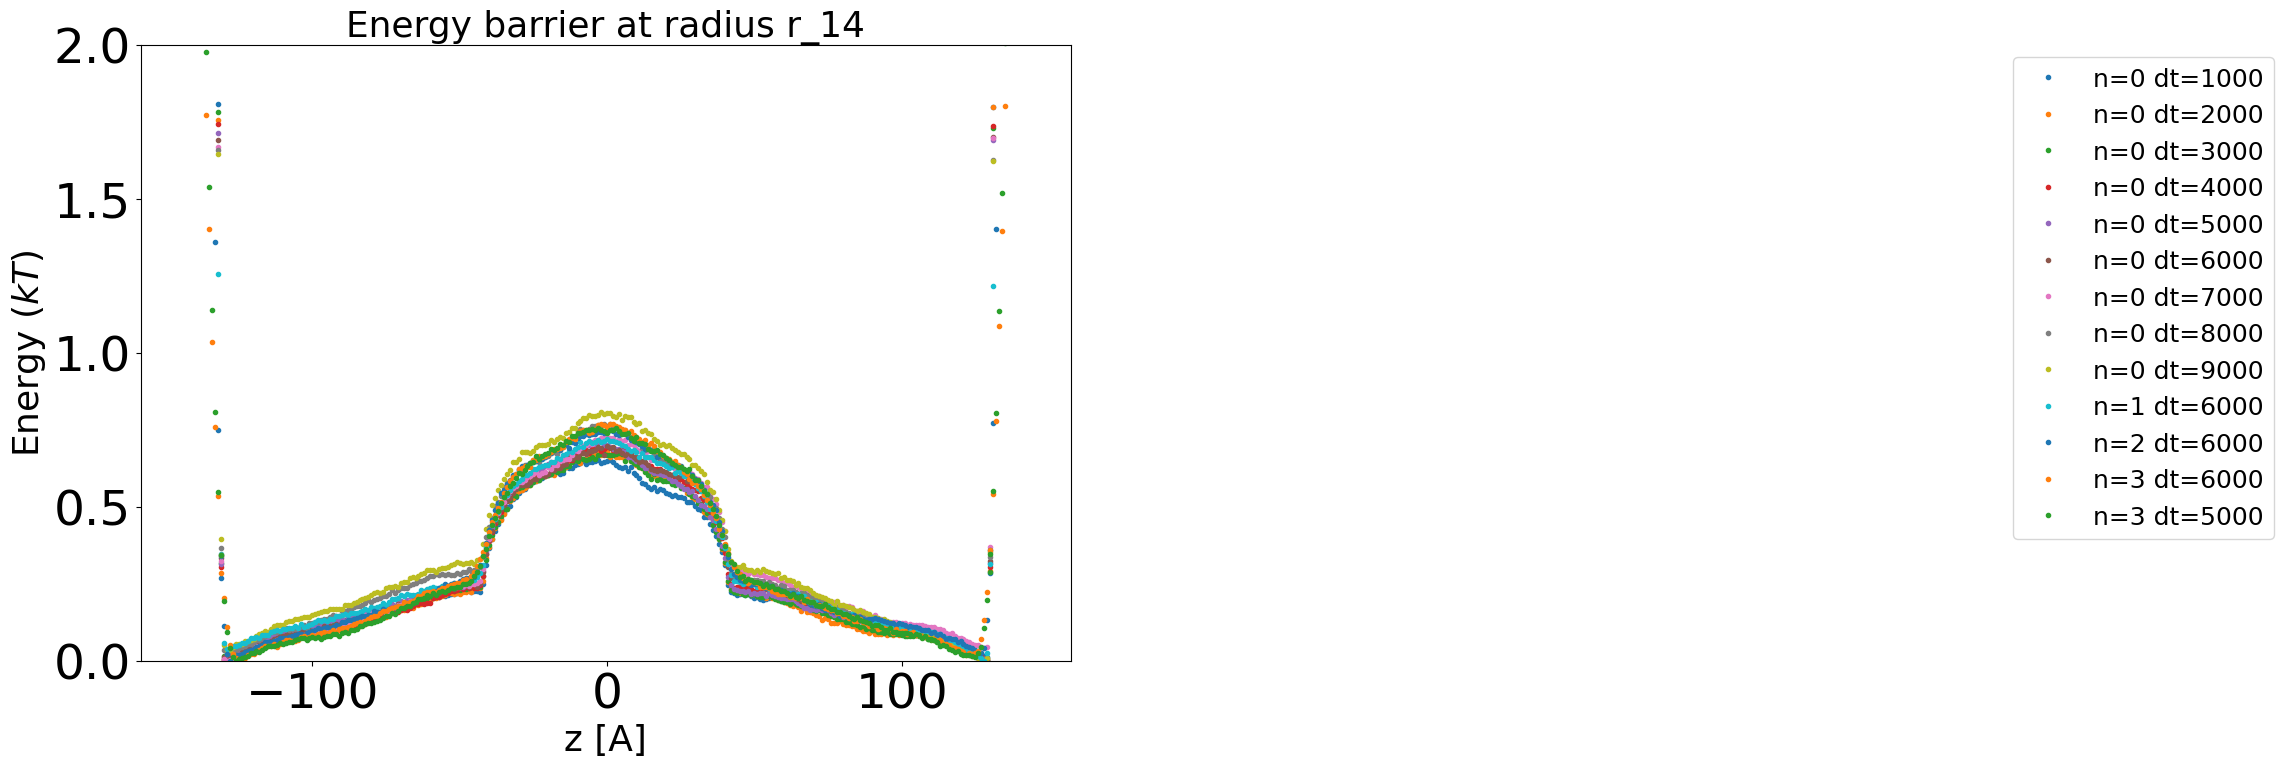

r_16


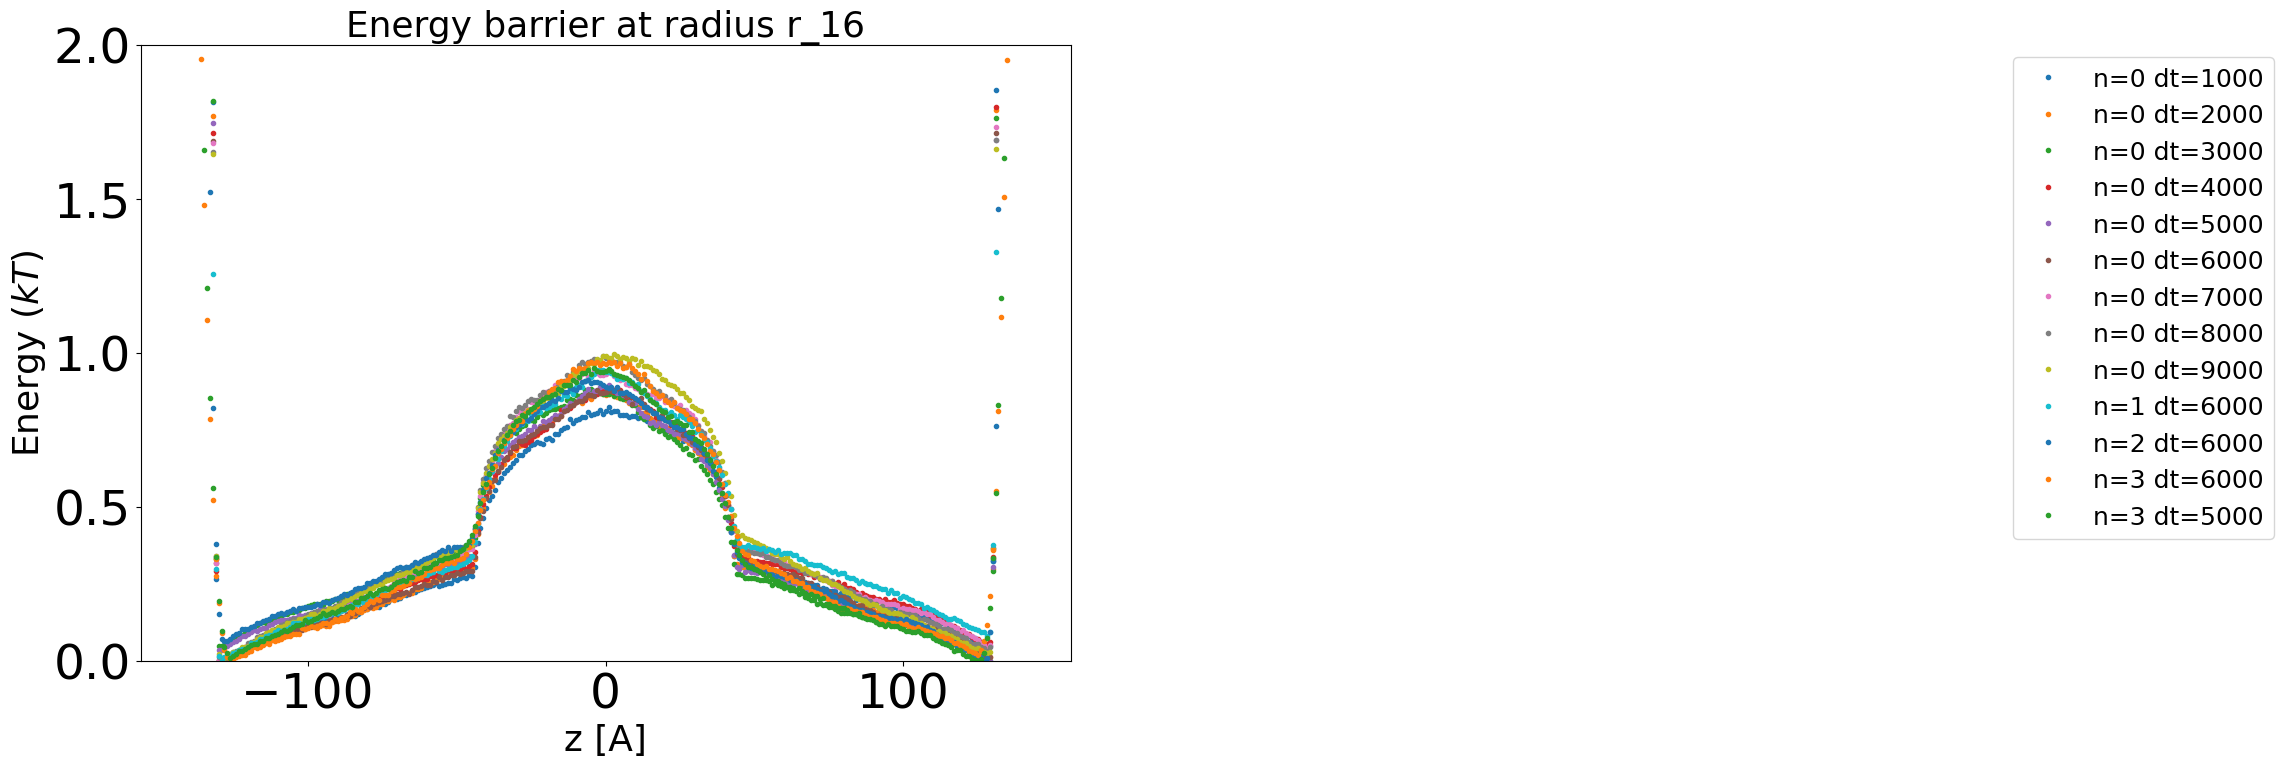

r_18


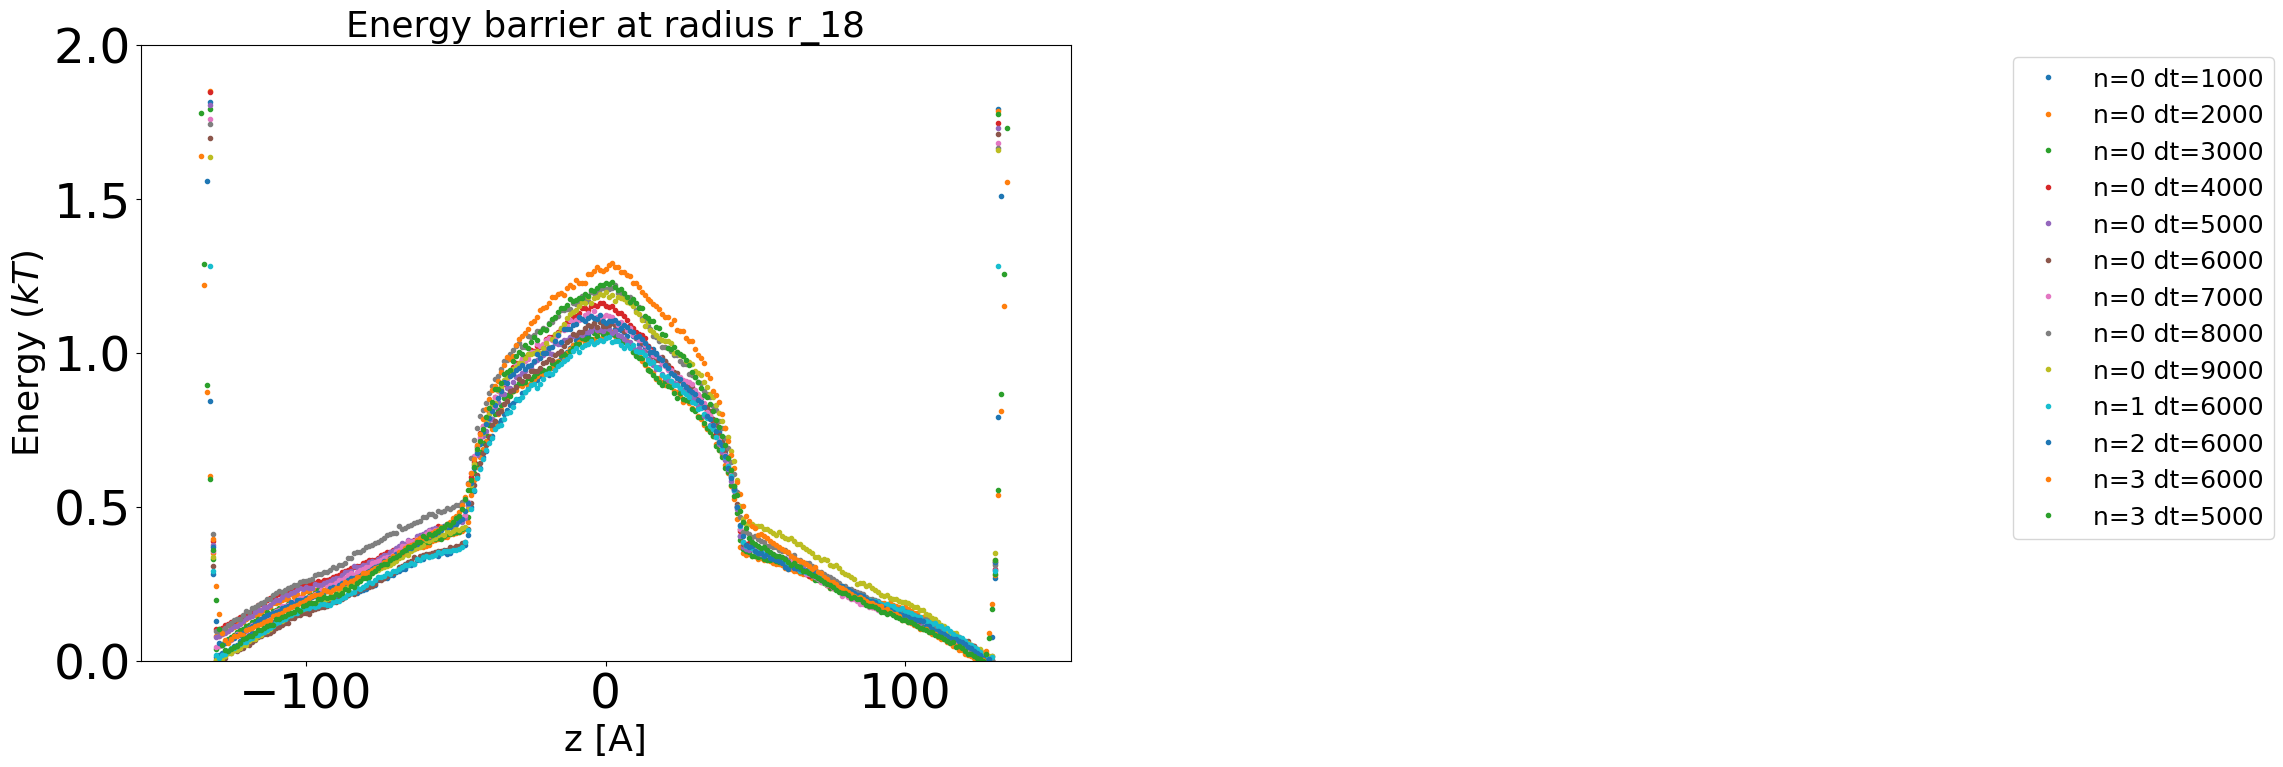

r_20


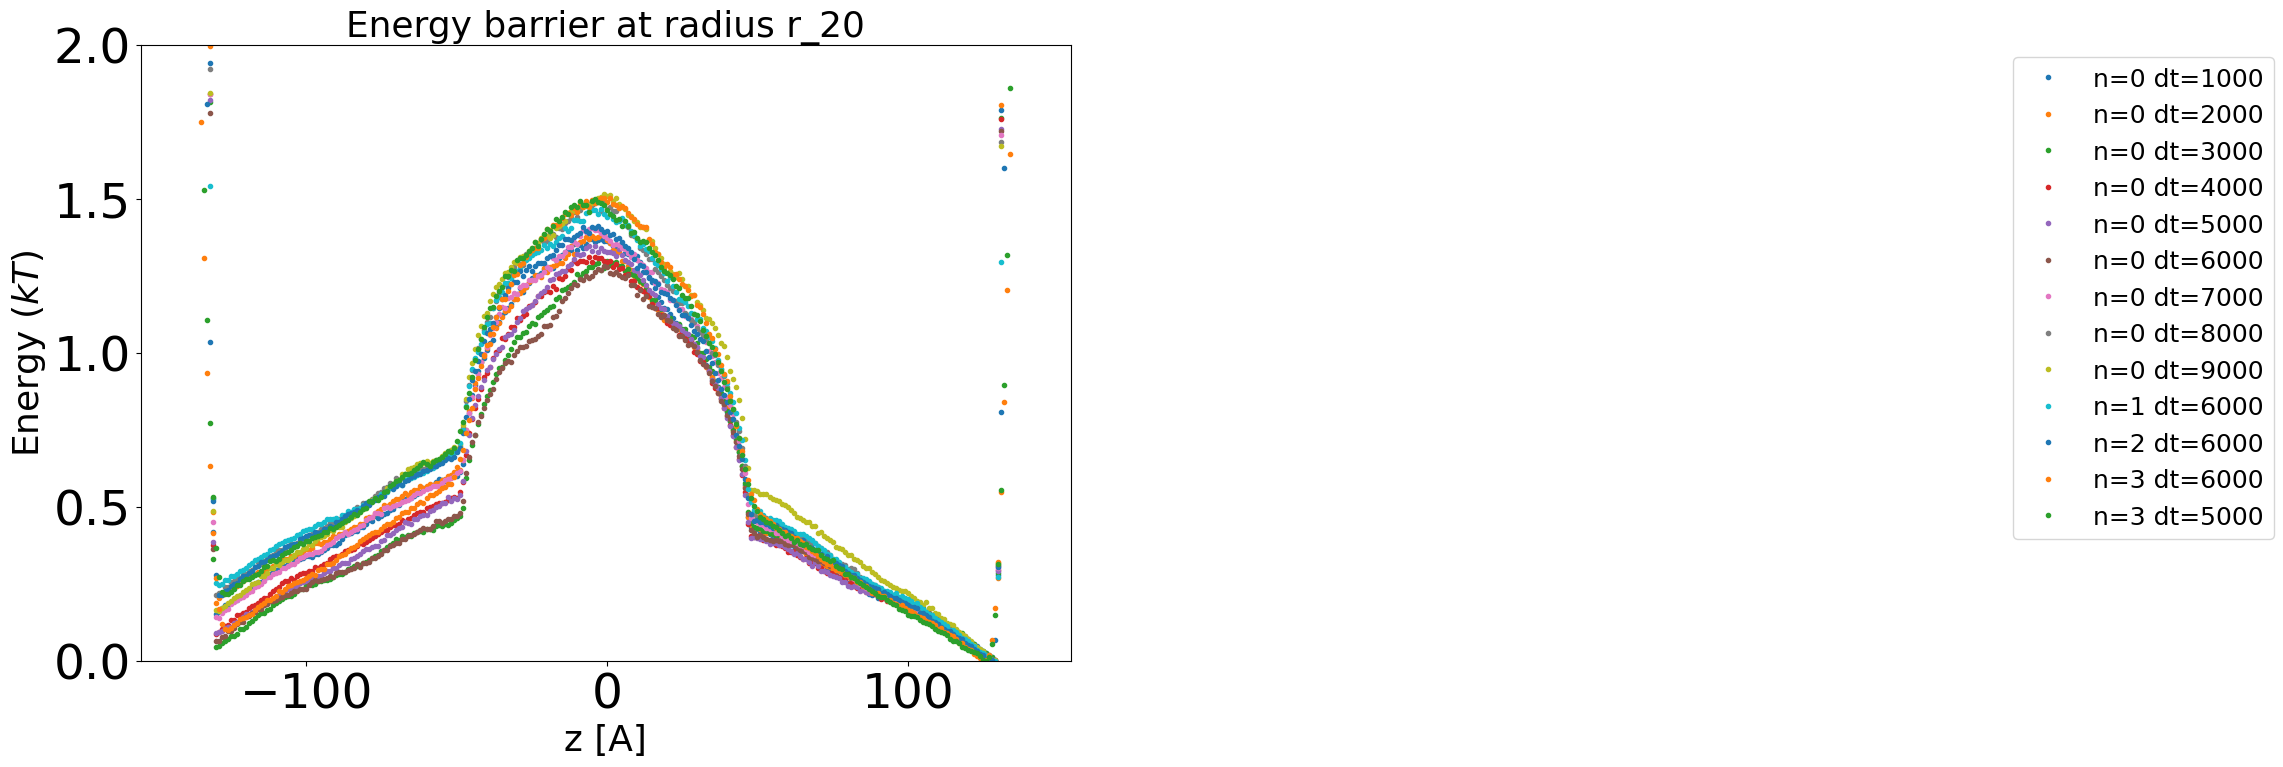

In [157]:
def plot(datas, labels,colors=None,title="Energy barrier"):
    plt.figure(figsize=(12, 8))
    max_ys = {}
    for i, (data, label) in enumerate(zip(datas, labels)):
        data,label = (data, label)
        hist = np.sum(data, axis=0)
        # print(hist)
        x_for_plot = np.linspace(-150, 150, len(hist))

        sd = hist / hist.sum()
        en = -np.log(sd) * 0.593
        en = en - np.min(en)

        relevant_indices = (x_for_plot >= -50) & (x_for_plot <= 50)
        max_y = np.max(en[relevant_indices])
        max_ys[label] = max_y
        if colors is not None:
            plt.plot(x_for_plot, en, ".", label=label, color=colors[i])
        else:
            plt.plot(x_for_plot, en, ".", label=label)
        # plt.plot(x_for_plot, hist, label=label)

    plt.xlabel("z [A]", fontsize='x-large')
    plt.ylabel("Energy ($kT$)", fontsize='x-large')

    plt.title(title, fontsize='x-large')


    plt.ylim(0, 2)
    plt.legend()
    plt.legend(loc='upper left', bbox_to_anchor=(2, 1))
    plt.show()
    return max_ys

for radius_name in dict_index_to_radius_name.values():
    datas = []
    labels = []
    colors_to_plot =[]
    keys_with_the_rad = [key for key in dict_of_data.keys() if key[2] == radius_name]
    for key in keys_with_the_rad:
        data = dict_of_data[key]
        datas.append(data)
        label= "n={n} dt={dt}".format(n=key[0],dt=key[1])
        title = "Energy barrier at radius {radius_name}".format(radius_name=radius_name)
        labels.append(label)
        if key[0] == 0 and key[1]==6000:
            colors_to_plot.append("blue")
        if key[0] == 1:
            colors_to_plot.append("yellow")
        if key[0] == 2:
            colors_to_plot.append("green")
        if key[0] == 3:
            colors_to_plot.append("red")
        if key[0] == 0 and key[1]==1000:
            colors_to_plot.append("light blue")
        else:
            colors_to_plot.append("brown")
    print(radius_name)
    # print(colors_to_plot)
    plot(datas, labels,None,title)

1
2
3
3
r_8
1
2
3
3
r_10
1
2
3
3
r_12
1
2
3
3
r_14
1
2
3
3
r_16


/tmp/ipykernel_1705044/8903803.py:10: RuntimeWarning: divide by zero encountered in log
  en = -np.log(sd) * 0.593
/tmp/ipykernel_1705044/8903803.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontsize=35)
/tmp/ipykernel_1705044/8903803.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=35)
/tmp/ipykernel_1705044/8903803.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_1705044/8903803.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='up

1
2
3
3
r_18
1
2
3
3
r_20


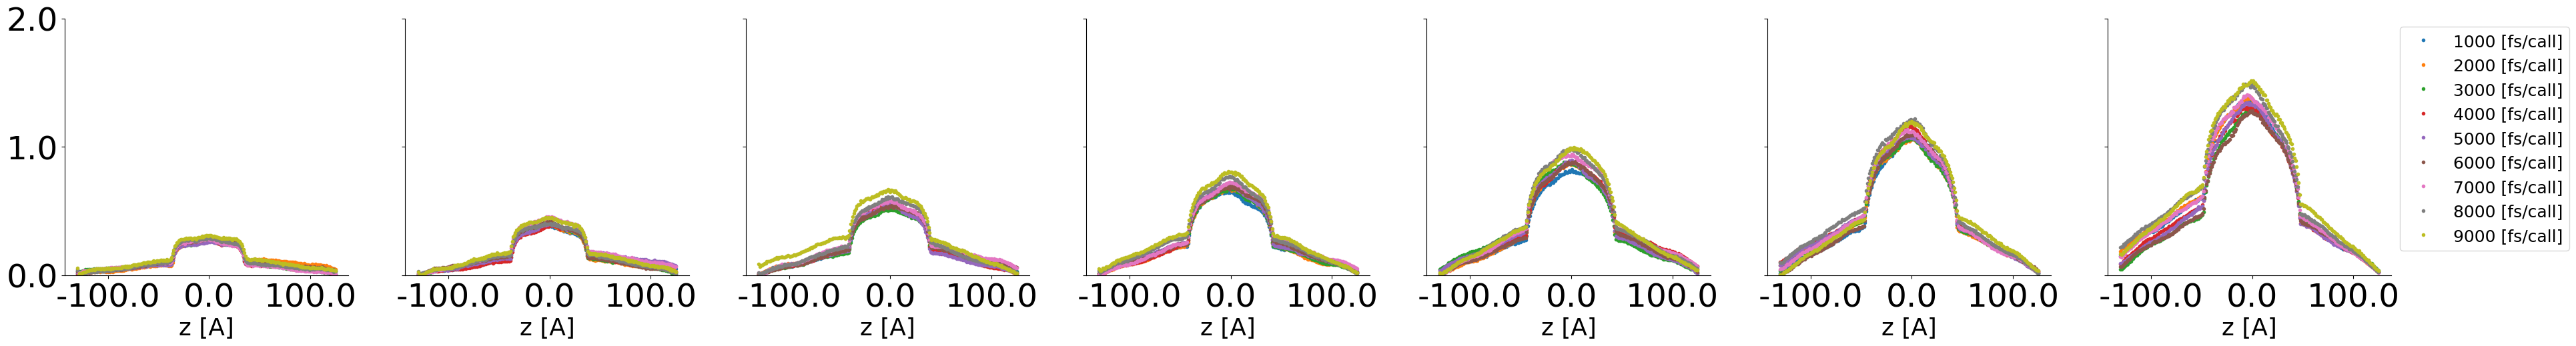

In [158]:
def plot(ax,datas, labels,colors=None,title="Energy barrier"):
    max_ys = {}
    for i, (data, label) in enumerate(zip(datas, labels)):
        data,label = (data, label)
        hist = np.sum(data, axis=0)
        # print(hist)
        x_for_plot = np.linspace(-150, 150, len(hist))

        sd = hist / hist.sum()
        en = -np.log(sd) * 0.593
        en = en - np.min(en)

        relevant_indices = (x_for_plot >= -50) & (x_for_plot <= 50)
        max_y = np.max(en[relevant_indices])
        max_ys[label] = max_y
        if colors is not None:
            ax.plot(x_for_plot[25:-25], en[25:-25], ".", label=label, color=colors[i])
        else:
            ax.plot(x_for_plot[20:-25], en[20:-25], ".", label=label)
        # plt.plot(x_for_plot, hist, label=label)

    ax.set_xlabel("z [A]", fontsize='x-large')
    ax.set_xticklabels(ax.get_xticks(), fontsize=35)
    ax.set_yticklabels(ax.get_yticks(), fontsize=35)
    # ax.set_ylabel("Energy ($kT$)", fontsize='x-large')

    ax.set_title(title)


    plt.ylim(0, 2)
    plt.legend()
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    # plt.show()
    # return max_ys
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(45, 5), sharex=True, sharey=True)
n_0, n_1, n_2, n_3 = {},{},{},{}
for i,radius_name in enumerate(dict_index_to_radius_name.values()):
    datas = []
    labels = []
    colors_to_plot =[]
    #plot n_0 as blue
    ax = axes[i]
    datas = []
    labels = []
    colors_to_plot =[]
    keys_with_the_rad = [key for key in dict_of_data.keys() if key[2] == radius_name]
    for key in keys_with_the_rad:
        if key[0] != 0 :
            print(key[0])
            continue
        # if key[0] == 1:
        data = dict_of_data[key]
        datas.append(data)
        # label= "n={n} dt={dt}".format(n=key[0],dt=key[1])
        label= "{eff} [fs/call]".format(eff = key[1]*2**key[0])
        title = "Energy barrier at radius {radius_name}".format(radius_name=radius_name)
        title = ""
        labels.append(label)
        if key[0] != 0 :
            continue
        # if key[0] == 1:
        #     colors_to_plot.append("yellow")
        # if key[0] == 2:
        #     colors_to_plot.append("green")
        # if key[0] == 3:
        #     colors_to_plot.append("red")
        if key[0] == 0 and key[1]==1000:
            colors_to_plot.append("light blue")
        else:
            colors_to_plot.append("brown")
    print(radius_name)
    # print(colors_to_plot)
    plot(ax,datas, labels,None,title)
plt.show()
#pickle save
# dict_of_data_fig_7_a = {"raw_energy_data":dict_of_data,"max_ys":max_ys}
# with open('dict_of_data_fig_7_a.pkl', 'wb') as f:


In [159]:
# colors = [cmap(0.25),cmap(0.4),cmap(0.6), 'yellow','green', 'red']


/tmp/ipykernel_1705044/1911690180.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Blues')
/tmp/ipykernel_1705044/1911690180.py:11: RuntimeWarning: divide by zero encountered in log
  en = -np.log(sd) * 0.593
/tmp/ipykernel_1705044/1911690180.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontsize=35)
/tmp/ipykernel_1705044/1911690180.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=35)
/tmp/ipykernel_1705044/1911690180.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an 

(0, 1000, 'r_8') 1
0
0
0
(0, 6000, 'r_8') 6
0
0
0
(1, 6000, 'r_8') 12
(2, 6000, 'r_8') 24
(3, 5000, 'r_8') 40
(3, 6000, 'r_8') 48
r_8
(0, 1000, 'r_10') 1
0
0
0
(0, 6000, 'r_10') 6
0
0
0
(1, 6000, 'r_10') 12
(2, 6000, 'r_10') 24
(3, 5000, 'r_10') 40
(3, 6000, 'r_10') 48
r_10
(0, 1000, 'r_12') 1
0
0
0
(0, 6000, 'r_12') 6
0
0
0
(1, 6000, 'r_12') 12
(2, 6000, 'r_12') 24
(3, 5000, 'r_12') 40
(3, 6000, 'r_12') 48
r_12
(0, 1000, 'r_14') 1
0
0
0
(0, 6000, 'r_14') 6
0
0
0
(1, 6000, 'r_14') 12
(2, 6000, 'r_14') 24
(3, 5000, 'r_14') 40
(3, 6000, 'r_14') 48
r_14
(0, 1000, 'r_16') 1
0
0
0
(0, 6000, 'r_16') 6
0
0
0
(1, 6000, 'r_16') 12
(2, 6000, 'r_16') 24
(3, 5000, 'r_16') 40
(3, 6000, 'r_16') 48
r_16
(0, 1000, 'r_18') 1
0
0
0
(0, 6000, 'r_18') 6
0
0
0
(1, 6000, 'r_18') 12
(2, 6000, 'r_18') 24
(3, 5000, 'r_18') 40
(3, 6000, 'r_18') 48
r_18
(0, 1000, 'r_20') 1
0
0
0
(0, 6000, 'r_20') 6
0
0
0
(1, 6000, 'r_20') 12
(2, 6000, 'r_20') 24
(3, 5000, 'r_20') 40
(3, 6000, 'r_20') 48
r_20


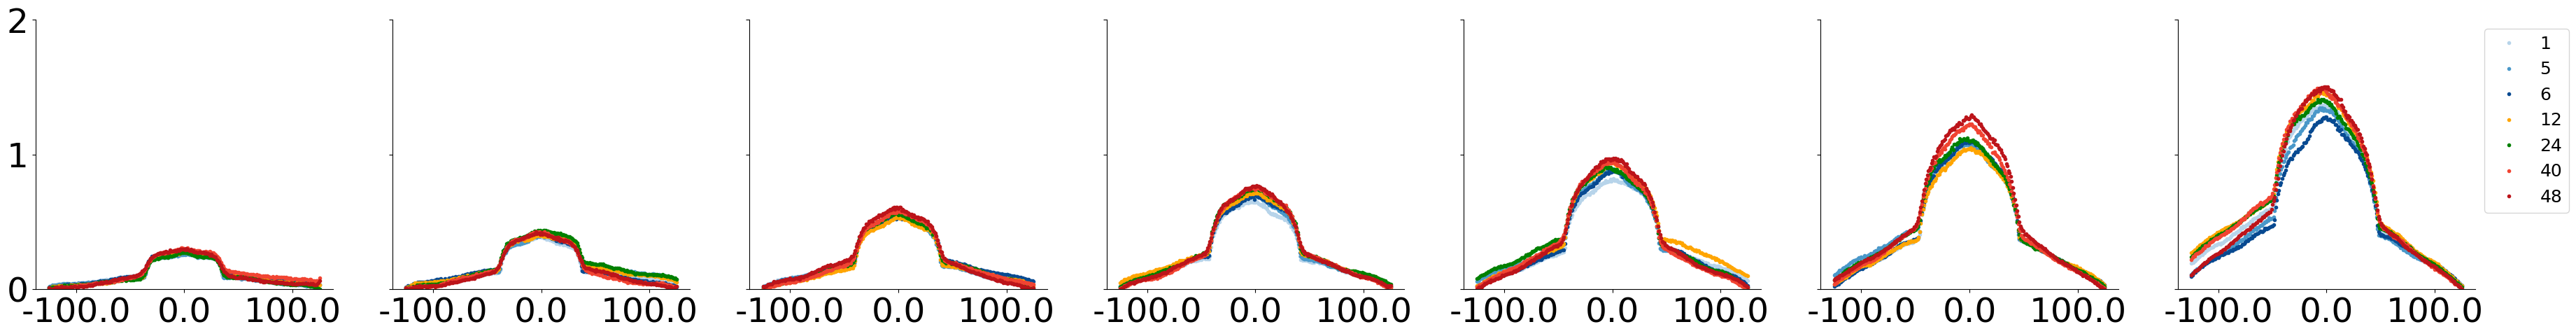

In [179]:
cmap = plt.cm.get_cmap('Blues')
def plot(ax,datas, labels,colors=None,title="Energy barrier"):
    max_ys = {}
    for i, (data, label) in enumerate(zip(datas, labels)):
        data,label = (data, label)
        hist = np.sum(data, axis=0)
        # print(hist)
        x_for_plot = np.linspace(-150, 150, len(hist))

        sd = hist / hist.sum()
        en = -np.log(sd) * 0.593
        en = en - np.min(en)

        relevant_indices = (x_for_plot >= -50) & (x_for_plot <= 50)
        max_y = np.max(en[relevant_indices])
        max_ys[label] = max_y
        if colors is not None:
            ax.plot(x_for_plot[25:-25], en[25:-25], ".", label=label, color=colors[i])
        else:
            ax.plot(x_for_plot[20:-25], en[20:-25], ".", label=label)
        # plt.plot(x_for_plot, hist, label=label)

    # ax.set_xlabel("z [A]", fontsize='x-large')
    ax.set_xticklabels(ax.get_xticks(), fontsize=35)
    ax.set_yticklabels(ax.get_yticks(), fontsize=35)
    # ax.set_ylabel("Energy ($kT$)", fontsize='x-large')

    ax.set_title(title)


    plt.ylim(0, 2)
    plt.legend()
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xticklabels(ax.get_xticks(), fontsize=35)
    ax.set_yticklabels(ax.get_yticks(), fontsize=35)
    # Ensure x-ticks and y-ticks are integers

    # # Remove decimal points from the tick labels
    # ax.set_xticklabels(ax.get_xticks().astype(int))
    ax.set_yticklabels(ax.get_yticks().astype(int))
    # plt.show()
    # return max_ys
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(45, 5), sharex=True, sharey=True)
n_0, n_1, n_2, n_3 = {},{},{},{}
for i,radius_name in enumerate(dict_index_to_radius_name.values()):
    datas = []
    labels = []
    colors_to_plot =[]
    #plot n_0 as blue
    ax = axes[i]
    datas = []
    labels = []
    colors_to_plot =[]
    keys_with_the_rad = sorted([key for key in dict_of_data.keys() if key[2] == radius_name])
    for key in keys_with_the_rad:
        if key[0] == 0 and key[1] not in [6000,1000,5000]:
            print(key[0])
            continue
        # if key[0] == 1:
        data = dict_of_data[key]
        datas.append(data)
        label= "n={n} dt={dt}".format(n=key[0],dt=key[1])
        label= "{eff} [fs/call]".format(eff = key[1]*2**key[0])
        label = "{eff}".format(eff = int(key[1]*2**key[0]/1000))
        if label == "5000 [fs/call]":
            print("dsasdasd")
            print(key)
        title = "Energy barrier at radius {radius_name}".format(radius_name=radius_name)
        title = ""
        labels.append(label)
        # if key[0] == 0 :
        #     if key[1] not in  [6000,1000]:
        #         colors_to_plot.append("blue")
        # if key[0] == 1:
        #     colors_to_plot.append("yellow")
        # if key[0] == 2:
        #     colors_to_plot.append("green")
        # if key[0] == 3:
        #     colors_to_plot.append("red")
        if key[0] == 0 and key[1]==1000:
            colors_to_plot.append(cmap(0.2))
        if key[0] == 0 and key[1]==6000:
            colors_to_plot.append(cmap(1))
        if key[0] == 0 and key[1]==5000:
            # print("dsasdasd")
            # print(1/0)
            colors_to_plot.append(cmap(0.6))
        else:
            print(key,label)
            colors_to_plot.append("yellow")
    print(radius_name)
    # print(colors_to_plot)
    colors = [cmap(0.3),cmap(0.6),cmap(0.9),"orange","green",plt.cm.Reds(0.6),plt.cm.Reds(0.8)]
    plot(ax,datas, labels,colors,title)
plt.show()


In [124]:
colors_to_plot

[(0.8141176470588235, 0.883921568627451, 0.9498039215686275, 1.0),
 'yellow',
 (0.2909803921568628, 0.5945098039215686, 0.7890196078431373, 1.0),
 (0.9655517108804306, 0.9823452518262207, 0.9990157631680123, 1.0),
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow']